# R Notebook: CMIP5 Dry Spell Length Distributions, 2071-2100

Dry state, spell length for PRISM data.

Uses R to do some analysis

Add in the part to make a DataFrame with our best fit negative binomial parameters and then to output this to a spreadsheet

## Parameters and Library Loading

In [1]:
oldw <- getOption("warn")

In [2]:
options(warn = -1)

In [3]:
library(feather)
library(dplyr)
library(fitdistrplus)
library(vcd)
library(dgof)
library(xlsx)
library(r2excel)
library(moments)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: survival
Loading required package: npsurv
Loading required package: lsei
Loading required package: grid

Attaching package: 'dgof'

The following object is masked from 'package:stats':

    ks.test



**Note:** We only want to mask package:stats ks.test with that from package:dgof when working with discrete distributions.

In [4]:
setwd("\\\\augustine.space.swri.edu\\jdrive\\Groundwater\\R8937_Stochastic_CC_Recharge\\Data\\R\\Working\\CMIP5_2071_DryDays")

Now specify some parameters - just file names

In [5]:
feLODPath <- "DryDays_LOCA_2071-2100.feather"

In [6]:
feBCDPath <- "DryDays_BCCA_2071-2100.feather"

## Initial Load and Process of DataFrame

In [7]:
dfLODry <- read_feather(feLODPath)
ddates <- as.Date( ISOdate( dfLODry$Year, dfLODry$Month, dfLODry$Day ) )
dfLODry["Date"] <- ddates

In [8]:
str(dfLODry)

Classes 'tbl_df', 'tbl' and 'data.frame':	12228591 obs. of  8 variables:
 $ MGrid_Id : chr  "M10_1" "M10_1" "M10_1" "M10_1" ...
 $ Grid_Id  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Mod_Id   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ Year     : num  2071 2071 2071 2071 2071 ...
 $ Month    : num  1 1 1 1 1 1 2 2 2 3 ...
 $ Day      : num  1 5 8 16 23 31 6 20 25 1 ...
 $ Dry_Count: num  2 2 6 5 7 4 9 4 2 3 ...
 $ Date     : Date, format: "2071-01-01" "2071-01-05" ...


In [9]:
head(dfLODry)

MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count,Date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
M10_1,1,10,2071,1,1,2,2071-01-01
M10_1,1,10,2071,1,5,2,2071-01-05
M10_1,1,10,2071,1,8,6,2071-01-08
M10_1,1,10,2071,1,16,5,2071-01-16
M10_1,1,10,2071,1,23,7,2071-01-23
M10_1,1,10,2071,1,31,4,2071-01-31


In [10]:
dfBCDry <- read_feather(feBCDPath)
ddates <- as.Date( ISOdate( dfBCDry$Year, dfBCDry$Month, dfBCDry$Day ) )
dfBCDry["Date"] <- ddates

In [11]:
str(dfBCDry)

Classes 'tbl_df', 'tbl' and 'data.frame':	8766139 obs. of  8 variables:
 $ MGrid_Id : chr  "M100_169" "M100_169" "M100_169" "M100_169" ...
 $ Grid_Id  : int  169 169 169 169 169 169 169 169 169 169 ...
 $ Mod_Id   : int  100 100 100 100 100 100 100 100 100 100 ...
 $ Year     : num  2071 2071 2071 2071 2071 ...
 $ Month    : num  1 1 1 2 2 2 2 3 3 3 ...
 $ Day      : num  1 14 22 5 8 17 25 4 8 16 ...
 $ Dry_Count: num  11 7 13 2 7 5 5 2 4 2 ...
 $ Date     : Date, format: "2071-01-01" "2071-01-14" ...


In [12]:
head(dfBCDry)

MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count,Date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
M100_169,169,100,2071,1,1,11,2071-01-01
M100_169,169,100,2071,1,14,7,2071-01-14
M100_169,169,100,2071,1,22,13,2071-01-22
M100_169,169,100,2071,2,5,2,2071-02-05
M100_169,169,100,2071,2,8,7,2071-02-08
M100_169,169,100,2071,2,17,5,2071-02-17


First filter for each month with all Grid_Id

In [13]:
dLOJan <- dfLODry %>% filter( Month == 1 )
dLOFeb <- dfLODry %>% filter( Month == 2 )
dLOMar <- dfLODry %>% filter( Month == 3 )
dLOApr <- dfLODry %>% filter( Month == 4 )
dLOMay <- dfLODry %>% filter( Month == 5 )
dLOJun <- dfLODry %>% filter( Month == 6 )
dLOJul <- dfLODry %>% filter( Month == 7 )
dLOAug <- dfLODry %>% filter( Month == 8 )
dLOSep <- dfLODry %>% filter( Month == 9 )
dLOOct <- dfLODry %>% filter( Month == 10 )
dLONov <- dfLODry %>% filter( Month == 11 )
dLODec <- dfLODry %>% filter( Month == 12 )

In [14]:
dBCJan <- dfBCDry %>% filter( Month == 1 )
dBCFeb <- dfBCDry %>% filter( Month == 2 )
dBCMar <- dfBCDry %>% filter( Month == 3 )
dBCApr <- dfBCDry %>% filter( Month == 4 )
dBCMay <- dfBCDry %>% filter( Month == 5 )
dBCJun <- dfBCDry %>% filter( Month == 6 )
dBCJul <- dfBCDry %>% filter( Month == 7 )
dBCAug <- dfBCDry %>% filter( Month == 8 )
dBCSep <- dfBCDry %>% filter( Month == 9 )
dBCOct <- dfBCDry %>% filter( Month == 10 )
dBCNov <- dfBCDry %>% filter( Month == 11 )
dBCDec <- dfBCDry %>% filter( Month == 12 )

Set-up a dataframe to store the basic summary statistics. Eventually will write this to Excel.

In [15]:
MonLOSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            skew=rep(NA,12), kurt=rep(NA,12), perc0=rep(NA,12), perc10=rep(NA,12), 
                            perc20=rep(NA,12), perc30=rep(NA,12), perc40=rep(NA,12), 
                            perc50=rep(NA,12), perc60=rep(NA,12), perc70=rep(NA,12), 
                            perc80=rep(NA,12), perc90=rep(NA,12), perc100=rep(NA,12), 
                            stringsAsFactors=FALSE )

In [16]:
pvec <- seq(0,1,0.1)

In [17]:
NumDeciles = length( pvec )
cat("Number of deciles: ", NumDeciles)

Number of deciles:  11

Now look at summary stats for the dry day counts for each month

In [18]:
summary( dLOJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   8.871  12.000 173.000 

In [19]:
oQuants = quantile( dLOJan$Dry_Count, pvec )

In [20]:
MonLOSumStatDF[1, ] <-list( 1, mean(dLOJan$Dry_Count), median(dLOJan$Dry_Count), 
                          max(dLOJan$Dry_Count), min(dLOJan$Dry_Count), sd(dLOJan$Dry_Count),
                          var(dLOJan$Dry_Count), skewness(dLOJan$Dry_Count), 
                          kurtosis(dLOJan$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [21]:
summary( dLOFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.901  10.000 146.000 

In [22]:
oQuants = quantile( dLOFeb$Dry_Count, pvec )

In [23]:
MonLOSumStatDF[2, ] <-list( 2, mean(dLOFeb$Dry_Count), median(dLOFeb$Dry_Count), 
                          max(dLOFeb$Dry_Count), min(dLOFeb$Dry_Count), sd(dLOFeb$Dry_Count),
                          var(dLOFeb$Dry_Count), skewness(dLOFeb$Dry_Count), 
                          kurtosis(dLOFeb$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [24]:
summary( dLOMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.687  10.000 118.000 

In [25]:
oQuants = quantile( dLOMar$Dry_Count, pvec )

In [26]:
MonLOSumStatDF[3, ] <-list( 3, mean(dLOMar$Dry_Count), median(dLOMar$Dry_Count), 
                          max(dLOMar$Dry_Count), min(dLOMar$Dry_Count), sd(dLOMar$Dry_Count),
                          var(dLOMar$Dry_Count), skewness(dLOMar$Dry_Count), 
                          kurtosis(dLOMar$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [27]:
summary( dLOApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00    5.61    8.00   73.00 

In [28]:
oQuants = quantile( dLOApr$Dry_Count, pvec )

In [29]:
MonLOSumStatDF[4, ] <-list( 4, mean(dLOApr$Dry_Count), median(dLOApr$Dry_Count), 
                          max(dLOApr$Dry_Count), min(dLOApr$Dry_Count), sd(dLOApr$Dry_Count),
                          var(dLOApr$Dry_Count), skewness(dLOApr$Dry_Count), 
                          kurtosis(dLOApr$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [30]:
summary( dLOMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.772   6.000  97.000 

In [31]:
oQuants = quantile( dLOMay$Dry_Count, pvec )

In [32]:
MonLOSumStatDF[5, ] <-list( 5, mean(dLOMay$Dry_Count), median(dLOMay$Dry_Count), 
                          max(dLOMay$Dry_Count), min(dLOMay$Dry_Count), sd(dLOMay$Dry_Count),
                          var(dLOMay$Dry_Count), skewness(dLOMay$Dry_Count), 
                          kurtosis(dLOMay$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [33]:
summary( dLOJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   6.362   8.000  97.000 

In [34]:
oQuants = quantile( dLOJun$Dry_Count, pvec )

In [35]:
MonLOSumStatDF[6, ] <-list( 6, mean(dLOJun$Dry_Count), median(dLOJun$Dry_Count), 
                          max(dLOJun$Dry_Count), min(dLOJun$Dry_Count), sd(dLOJun$Dry_Count),
                          var(dLOJun$Dry_Count), skewness(dLOJun$Dry_Count), 
                          kurtosis(dLOJun$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [36]:
summary( dLOJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.636  10.000  82.000 

In [37]:
oQuants = quantile( dLOJul$Dry_Count, pvec )

In [38]:
MonLOSumStatDF[7, ] <-list( 7, mean(dLOJul$Dry_Count), median(dLOJul$Dry_Count), 
                          max(dLOJul$Dry_Count), min(dLOJul$Dry_Count), sd(dLOJul$Dry_Count),
                          var(dLOJul$Dry_Count), skewness(dLOJul$Dry_Count), 
                          kurtosis(dLOJul$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [39]:
summary( dLOAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.012  10.000 105.000 

In [40]:
oQuants = quantile( dLOAug$Dry_Count, pvec )

In [41]:
MonLOSumStatDF[8, ] <-list( 8, mean(dLOAug$Dry_Count), median(dLOAug$Dry_Count), 
                          max(dLOAug$Dry_Count), min(dLOAug$Dry_Count), sd(dLOAug$Dry_Count),
                          var(dLOAug$Dry_Count), skewness(dLOAug$Dry_Count), 
                          kurtosis(dLOAug$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [42]:
summary( dLOSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   5.583   7.000 177.000 

In [43]:
oQuants = quantile( dLOSep$Dry_Count, pvec )

In [44]:
MonLOSumStatDF[9, ] <-list( 9, mean(dLOSep$Dry_Count), median(dLOSep$Dry_Count), 
                          max(dLOSep$Dry_Count), min(dLOSep$Dry_Count), sd(dLOSep$Dry_Count),
                          var(dLOSep$Dry_Count), skewness(dLOSep$Dry_Count), 
                          kurtosis(dLOSep$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [45]:
summary( dLOOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00    7.25    9.00  169.00 

In [46]:
oQuants = quantile( dLOOct$Dry_Count, pvec )

In [47]:
MonLOSumStatDF[10, ] <-list( 10, mean(dLOOct$Dry_Count), median(dLOOct$Dry_Count), 
                          max(dLOOct$Dry_Count), min(dLOOct$Dry_Count), sd(dLOOct$Dry_Count),
                          var(dLOOct$Dry_Count), skewness(dLOOct$Dry_Count), 
                          kurtosis(dLOOct$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [48]:
summary( dLONov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.589  10.000 187.000 

In [49]:
oQuants = quantile( dLONov$Dry_Count, pvec )

In [50]:
MonLOSumStatDF[11, ] <-list( 11, mean(dLONov$Dry_Count), median(dLONov$Dry_Count), 
                          max(dLONov$Dry_Count), min(dLONov$Dry_Count), sd(dLONov$Dry_Count),
                          var(dLONov$Dry_Count), skewness(dLONov$Dry_Count), 
                          kurtosis(dLONov$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [51]:
summary( dLODec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   8.698  11.000 130.000 

In [52]:
oQuants = quantile( dLODec$Dry_Count, pvec )

In [53]:
MonLOSumStatDF[12, ] <-list( 12, mean(dLODec$Dry_Count), median(dLODec$Dry_Count), 
                          max(dLODec$Dry_Count), min(dLODec$Dry_Count), sd(dLODec$Dry_Count),
                          var(dLODec$Dry_Count), skewness(dLODec$Dry_Count), 
                          kurtosis(dLODec$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [54]:
print( MonLOSumStatDF, quote=FALSE, row.names=FALSE )

 month     mean median max min    stdev      var     skew      kurt perc0
     1 8.870689      6 173   1 9.164323 83.98482 2.469237 13.141752     1
     2 7.900725      5 146   1 8.727953 76.17716 2.774290 14.217564     1
     3 7.687056      5 118   1 7.607031 57.86693 2.172325  9.602407     1
     4 5.609954      4  73   1 5.422035 29.39846 2.374644 12.112867     1
     5 4.771671      3  97   1 5.279373 27.87178 3.604702 27.224408     1
     6 6.362480      3  97   1 8.204988 67.32183 3.283162 18.724337     1
     7 7.636244      5  82   1 8.809667 77.61023 2.621019 12.303944     1
     8 7.011906      5 105   1 7.025690 49.36031 1.952853  8.269244     1
     9 5.583111      3 177   1 6.411601 41.10862 3.475818 27.856100     1
    10 7.250290      4 169   1 8.432115 71.10056 3.752241 33.891233     1
    11 7.588856      5 187   1 9.004893 81.08809 3.215463 20.373293     1
    12 8.698143      5 130   1 9.711983 94.32261 2.523793 11.962078     1
 perc10 perc20 perc30 perc40 perc50 pe

BCCA

In [55]:
MonBCSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            skew=rep(NA,12), kurt=rep(NA,12), perc0=rep(NA,12), perc10=rep(NA,12), 
                            perc20=rep(NA,12), perc30=rep(NA,12), perc40=rep(NA,12), 
                            perc50=rep(NA,12), perc60=rep(NA,12), perc70=rep(NA,12), 
                            perc80=rep(NA,12), perc90=rep(NA,12), perc100=rep(NA,12), 
                            stringsAsFactors=FALSE )

Now look at summary stats for the dry day counts for each month

In [56]:
summary( dBCJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.707   8.000  81.000 

In [57]:
oQuants = quantile( dBCJan$Dry_Count, pvec )

In [58]:
MonBCSumStatDF[1, ] <-list( 1, mean(dBCJan$Dry_Count), median(dBCJan$Dry_Count), 
                          max(dBCJan$Dry_Count), min(dBCJan$Dry_Count), sd(dBCJan$Dry_Count),
                          var(dBCJan$Dry_Count), skewness(dBCJan$Dry_Count), 
                          kurtosis(dBCJan$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [59]:
summary( dBCFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.102   7.000  65.000 

In [60]:
oQuants = quantile( dBCFeb$Dry_Count, pvec )

In [61]:
MonBCSumStatDF[2, ] <-list( 2, mean(dBCFeb$Dry_Count), median(dBCFeb$Dry_Count), 
                          max(dBCFeb$Dry_Count), min(dBCFeb$Dry_Count), sd(dBCFeb$Dry_Count),
                          var(dBCFeb$Dry_Count), skewness(dBCFeb$Dry_Count), 
                          kurtosis(dBCFeb$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [62]:
summary( dBCMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.773   6.000  68.000 

In [63]:
oQuants = quantile( dBCMar$Dry_Count, pvec )

In [64]:
MonBCSumStatDF[3, ] <-list( 3, mean(dBCMar$Dry_Count), median(dBCMar$Dry_Count), 
                          max(dBCMar$Dry_Count), min(dBCMar$Dry_Count), sd(dBCMar$Dry_Count),
                          var(dBCMar$Dry_Count), skewness(dBCMar$Dry_Count), 
                          kurtosis(dBCMar$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [65]:
summary( dBCApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   3.772   5.000  53.000 

In [66]:
oQuants = quantile( dBCApr$Dry_Count, pvec )

In [67]:
MonBCSumStatDF[4, ] <-list( 4, mean(dBCApr$Dry_Count), median(dBCApr$Dry_Count), 
                          max(dBCApr$Dry_Count), min(dBCApr$Dry_Count), sd(dBCApr$Dry_Count),
                          var(dBCApr$Dry_Count), skewness(dBCApr$Dry_Count), 
                          kurtosis(dBCApr$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [68]:
summary( dBCMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.929   4.000  65.000 

In [69]:
oQuants = quantile( dBCMay$Dry_Count, pvec )

In [70]:
MonBCSumStatDF[5, ] <-list( 5, mean(dBCMay$Dry_Count), median(dBCMay$Dry_Count), 
                          max(dBCMay$Dry_Count), min(dBCMay$Dry_Count), sd(dBCMay$Dry_Count),
                          var(dBCMay$Dry_Count), skewness(dBCMay$Dry_Count), 
                          kurtosis(dBCMay$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [71]:
summary( dBCJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.402   4.000  53.000 

In [72]:
oQuants = quantile( dBCJun$Dry_Count, pvec )

In [73]:
MonBCSumStatDF[6, ] <-list( 6, mean(dBCJun$Dry_Count), median(dBCJun$Dry_Count), 
                          max(dBCJun$Dry_Count), min(dBCJun$Dry_Count), sd(dBCJun$Dry_Count),
                          var(dBCJun$Dry_Count), skewness(dBCJun$Dry_Count), 
                          kurtosis(dBCJun$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [74]:
summary( dBCJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.382   4.000  54.000 

In [75]:
oQuants = quantile( dBCJul$Dry_Count, pvec )

In [76]:
MonBCSumStatDF[7, ] <-list( 7, mean(dBCJul$Dry_Count), median(dBCJul$Dry_Count), 
                          max(dBCJul$Dry_Count), min(dBCJul$Dry_Count), sd(dBCJul$Dry_Count),
                          var(dBCJul$Dry_Count), skewness(dBCJul$Dry_Count), 
                          kurtosis(dBCJul$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [77]:
summary( dBCAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.032   4.000  44.000 

In [78]:
oQuants = quantile( dBCAug$Dry_Count, pvec )

In [79]:
MonBCSumStatDF[8, ] <-list( 8, mean(dBCAug$Dry_Count), median(dBCAug$Dry_Count), 
                          max(dBCAug$Dry_Count), min(dBCAug$Dry_Count), sd(dBCAug$Dry_Count),
                          var(dBCAug$Dry_Count), skewness(dBCAug$Dry_Count), 
                          kurtosis(dBCAug$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [80]:
summary( dBCSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.268   4.000  90.000 

In [81]:
oQuants = quantile( dBCSep$Dry_Count, pvec )

In [82]:
MonBCSumStatDF[9, ] <-list( 9, mean(dBCSep$Dry_Count), median(dBCSep$Dry_Count), 
                          max(dBCSep$Dry_Count), min(dBCSep$Dry_Count), sd(dBCSep$Dry_Count),
                          var(dBCSep$Dry_Count), skewness(dBCSep$Dry_Count), 
                          kurtosis(dBCSep$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [83]:
summary( dBCOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.973   6.000 113.000 

In [84]:
oQuants = quantile( dBCOct$Dry_Count, pvec )

In [85]:
MonBCSumStatDF[10, ] <-list( 10, mean(dBCOct$Dry_Count), median(dBCOct$Dry_Count), 
                          max(dBCOct$Dry_Count), min(dBCOct$Dry_Count), sd(dBCOct$Dry_Count),
                          var(dBCOct$Dry_Count), skewness(dBCOct$Dry_Count), 
                          kurtosis(dBCOct$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [86]:
summary( dBCNov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00    5.97    8.00   90.00 

In [87]:
oQuants = quantile( dBCNov$Dry_Count, pvec )

In [88]:
MonBCSumStatDF[11, ] <-list( 11, mean(dBCNov$Dry_Count), median(dBCNov$Dry_Count), 
                          max(dBCNov$Dry_Count), min(dBCNov$Dry_Count), sd(dBCNov$Dry_Count),
                          var(dBCNov$Dry_Count), skewness(dBCNov$Dry_Count), 
                          kurtosis(dBCNov$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [89]:
summary( dBCDec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.157   8.000  92.000 

In [90]:
oQuants = quantile( dBCDec$Dry_Count, pvec )

In [91]:
MonBCSumStatDF[12, ] <-list( 12, mean(dBCDec$Dry_Count), median(dBCDec$Dry_Count), 
                          max(dBCDec$Dry_Count), min(dBCDec$Dry_Count), sd(dBCDec$Dry_Count),
                          var(dBCDec$Dry_Count), skewness(dBCDec$Dry_Count), 
                          kurtosis(dBCDec$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [92]:
print( MonBCSumStatDF, quote=FALSE, row.names=FALSE )

 month     mean median max min    stdev       var     skew     kurt perc0
     1 5.707018      4  81   1 5.586622 31.210350 2.378406 11.96083     1
     2 5.102432      4  65   1 4.947653 24.479273 2.531358 13.01047     1
     3 4.772517      3  68   1 4.479178 20.063034 2.290390 10.98225     1
     4 3.772460      3  53   1 3.436404 11.808872 2.246445 10.66899     1
     5 2.929108      2  65   1 2.690568  7.239155 2.694771 15.58873     1
     6 3.402497      2  53   1 3.367604 11.340759 2.805883 15.41574     1
     7 3.382122      2  54   1 3.274044 10.719365 2.611181 13.72110     1
     8 3.031854      2  44   1 2.771039  7.678660 2.496654 12.72340     1
     9 3.268013      2  90   1 3.522853 12.410492 3.566351 25.33226     1
    10 4.972710      3 113   1 5.359686 28.726237 2.791972 16.20823     1
    11 5.969654      4  90   1 6.268838 39.298329 2.651546 14.25593     1
    12 6.157277      4  92   1 6.282081 39.464546 2.449668 12.12395     1
 perc10 perc20 perc30 perc40 perc50 pe

## Month Distribution Fits

Start out by making distributions using all of the grid cells

There are 4 steps in fitting distributions (Ricci, 2005):

1. Model/function choice: hypothesize families of distributions;
2. Estimate parameters;
3. Evaluate quality of fit;
4. Goodness of fit statistical tests.

We will use the negative binomial distribution, **nbinom**, for the wet and dry day spell length distributions so #1 is taken care of and we can start with #2.

### Basic Plotting and Analysis

Basic plotting and analysis is to look at discrete histograms, empirial CDFs, and Q-Q plots with theoretical negative binomial distributions for each month. This is to ensure that everything looks exceptable.

Use another value tracking DataFrame here to keep track of sample distribution and theoretical, fitted distribution properties.

In [93]:
LOMonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                           sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                           pvalue=rep(NA,12), stringsAsFactors=FALSE )

In [94]:
BCMonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                           sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                           pvalue=rep(NA,12), stringsAsFactors=FALSE )

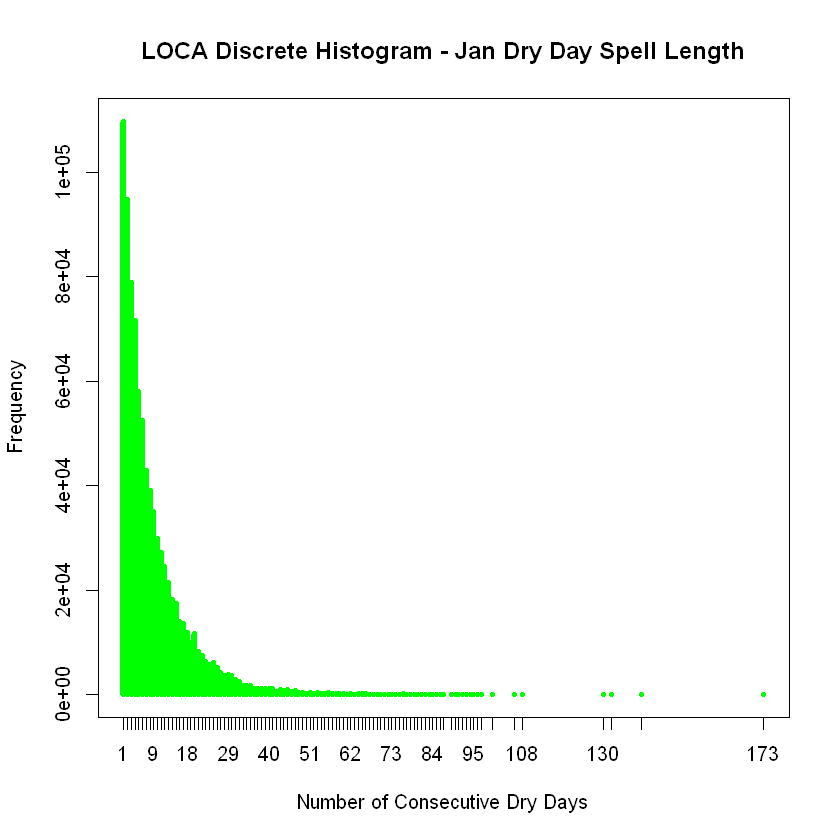

In [95]:
# our case is discrete so use this command
plot( table( dLOJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jan Dry Day Spell Length", 
      col="green" )

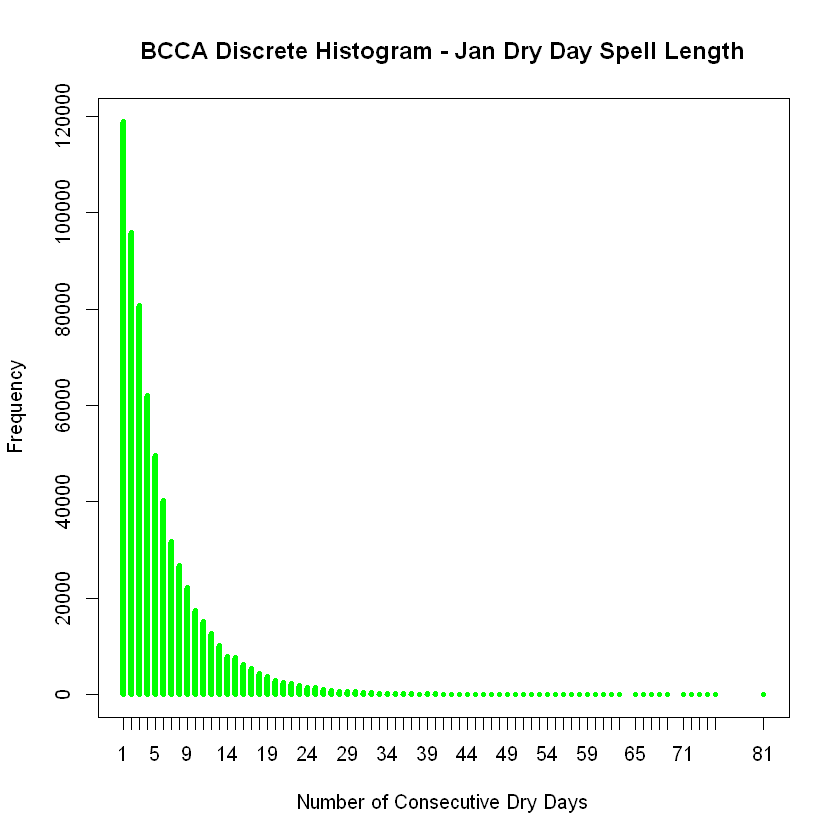

In [96]:
plot( table( dBCJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jan Dry Day Spell Length", 
      col="green" )

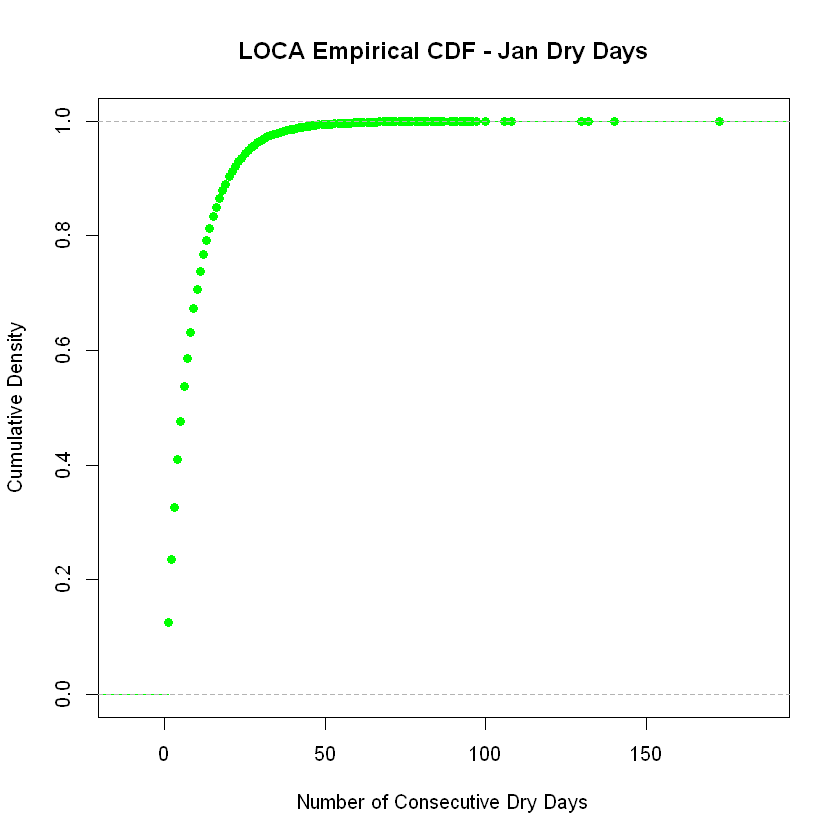

In [97]:
plot(ecdf(dLOJan$Dry_Count), main="LOCA Empirical CDF - Jan Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

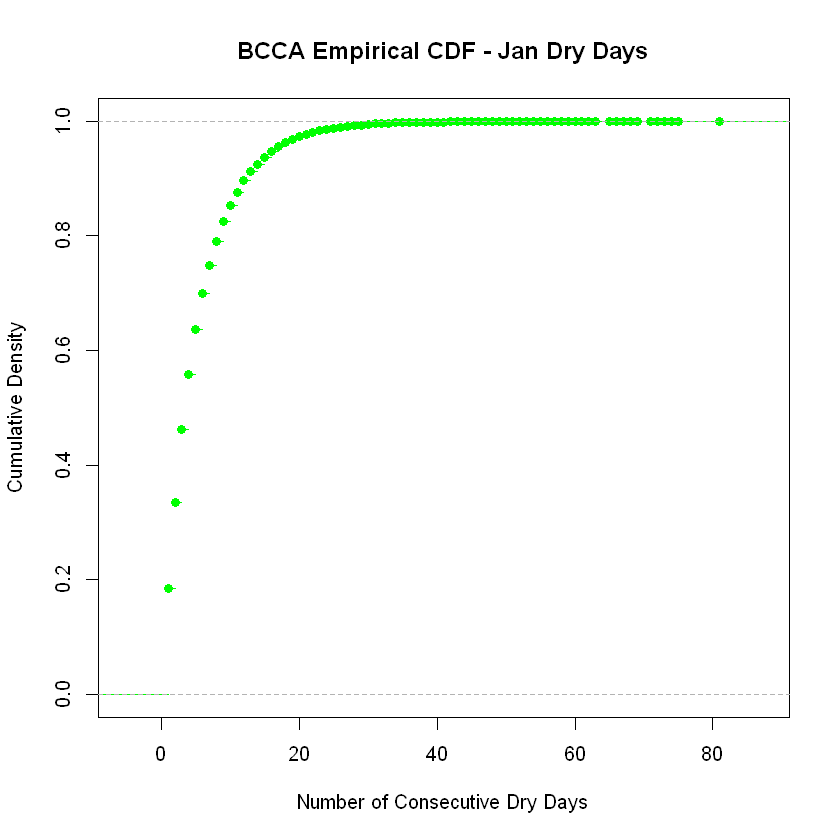

In [98]:
plot(ecdf(dBCJan$Dry_Count), main="BCCA Empirical CDF - Jan Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

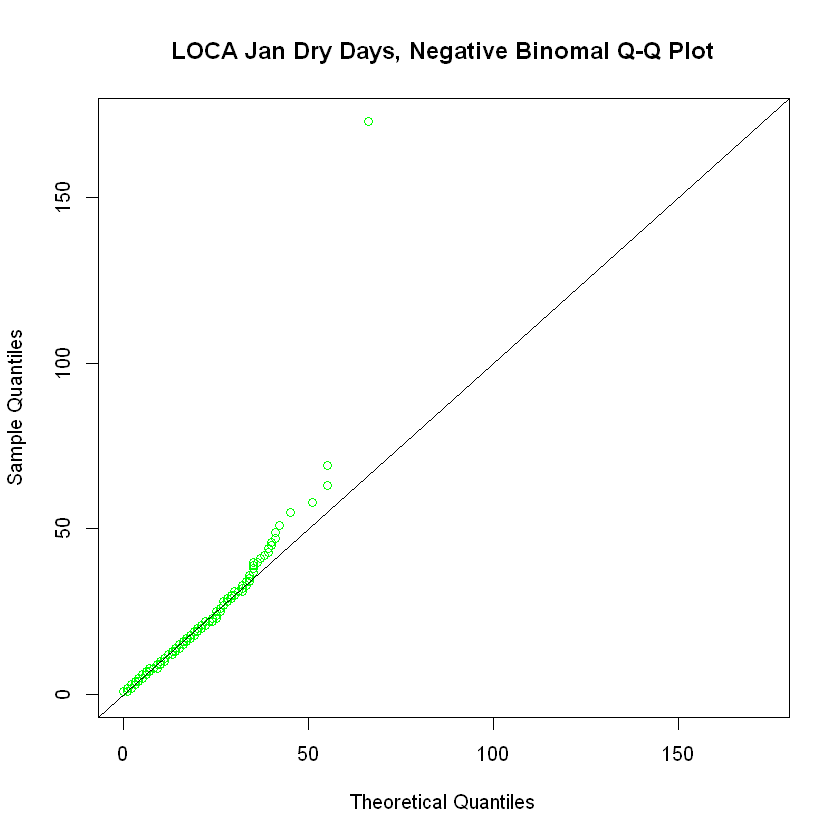

In [99]:
dLOJanMax <- max( dLOJan$Dry_Count )
dLOJanMean <- mean( dLOJan$Dry_Count )
dLOJanVar <- var( dLOJan$Dry_Count )
dLOJanBNr <- dLOJanMean^2 / (dLOJanVar - dLOJanMean)
dLOJanTstNB <- rnbinom( 1000, mu=dLOJanMean, size=dLOJanBNr )
qqplot( dLOJanTstNB, dLOJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jan Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJanMax), ylim=c(0,dLOJanMax) )
abline( 0, 1)

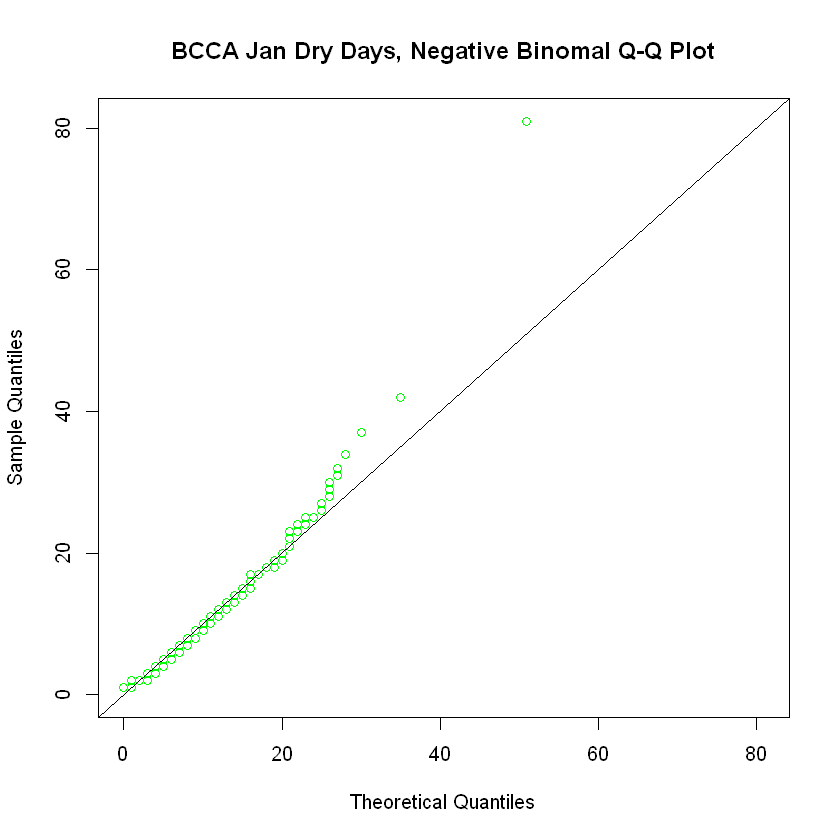

In [100]:
dBCJanMax <- max( dBCJan$Dry_Count )
dBCJanMean <- mean( dBCJan$Dry_Count )
dBCJanVar <- var( dBCJan$Dry_Count )
dBCJanBNr <- dBCJanMean^2 / (dBCJanVar - dBCJanMean)
dBCJanTstNB <- rnbinom( 1000, mu=dBCJanMean, size=dBCJanBNr )
qqplot( dBCJanTstNB, dBCJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jan Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJanMax), ylim=c(0,dBCJanMax) )
abline( 0, 1)

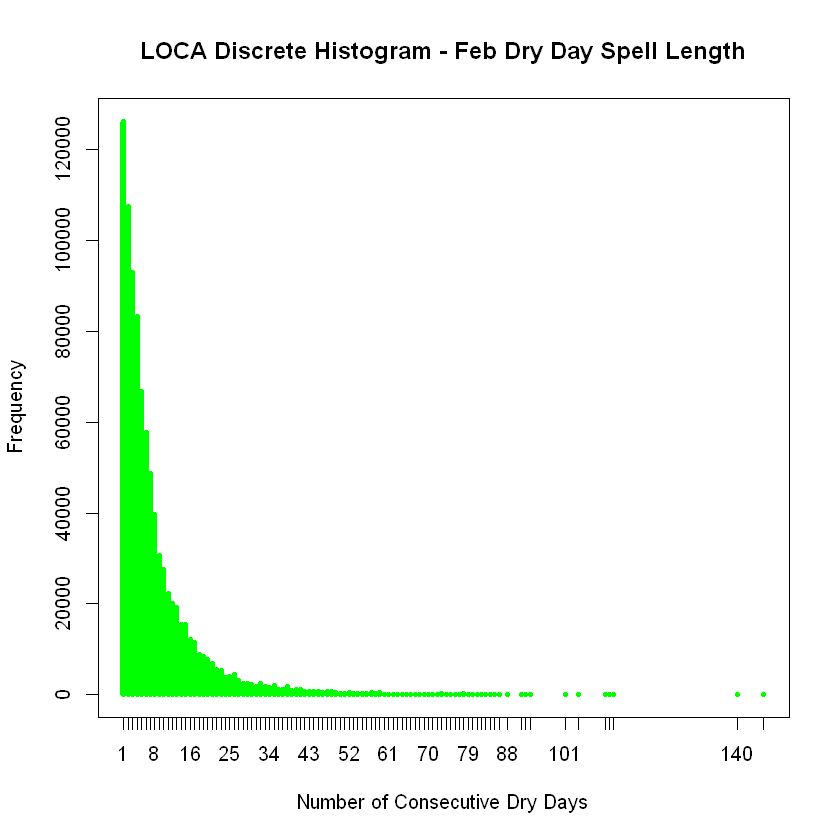

In [101]:
# our case is discrete so use this command
plot( table( dLOFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Feb Dry Day Spell Length", 
      col="green" )

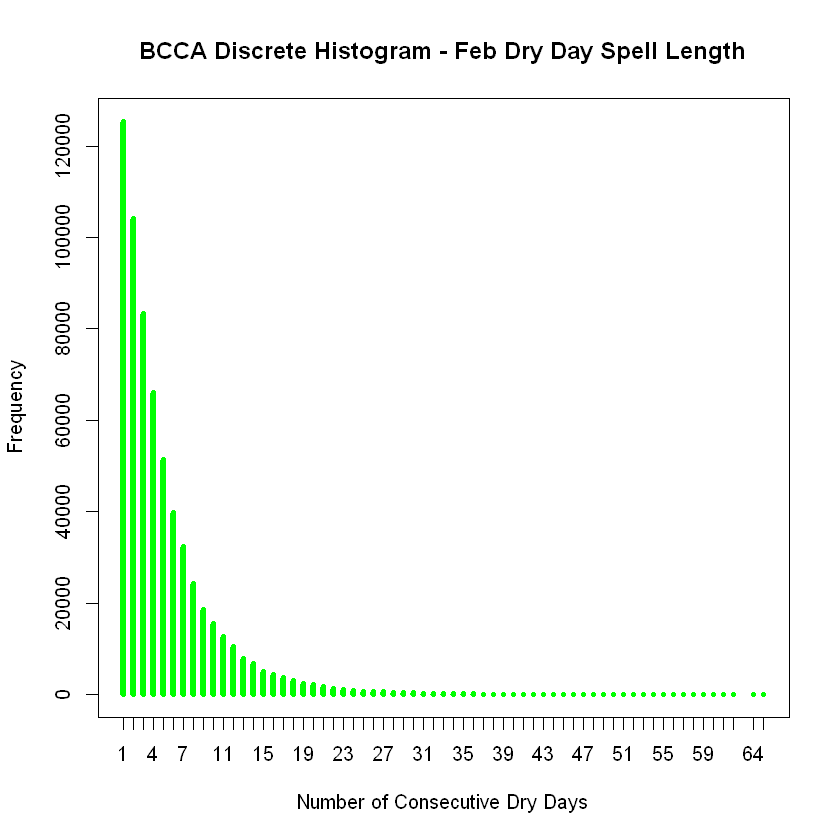

In [102]:
plot( table( dBCFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Feb Dry Day Spell Length", 
      col="green" )

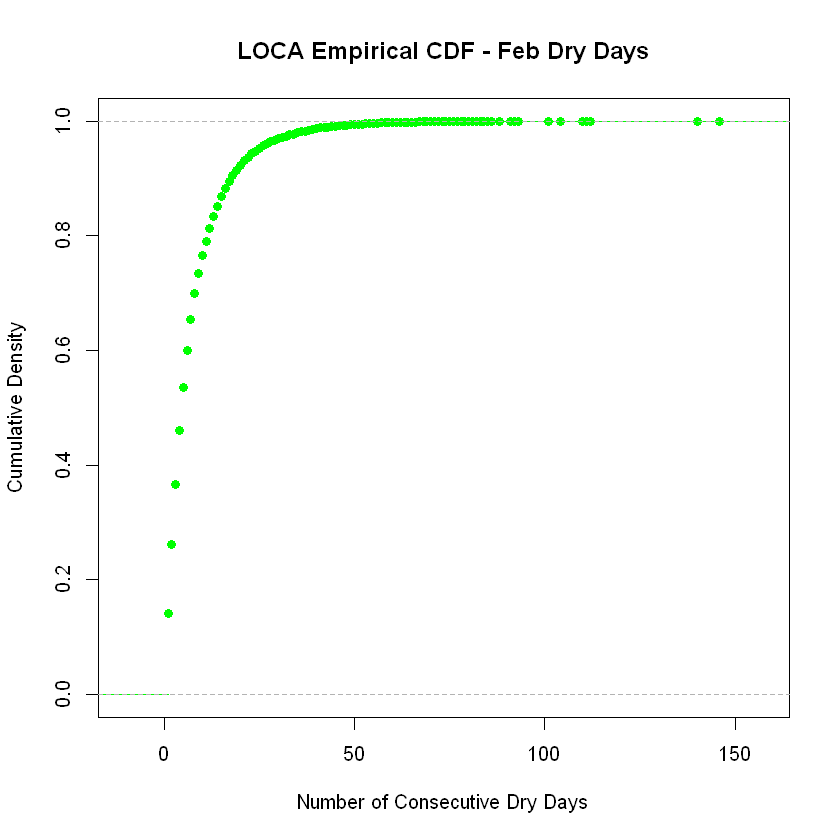

In [103]:
plot(ecdf(dLOFeb$Dry_Count), main="LOCA Empirical CDF - Feb Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

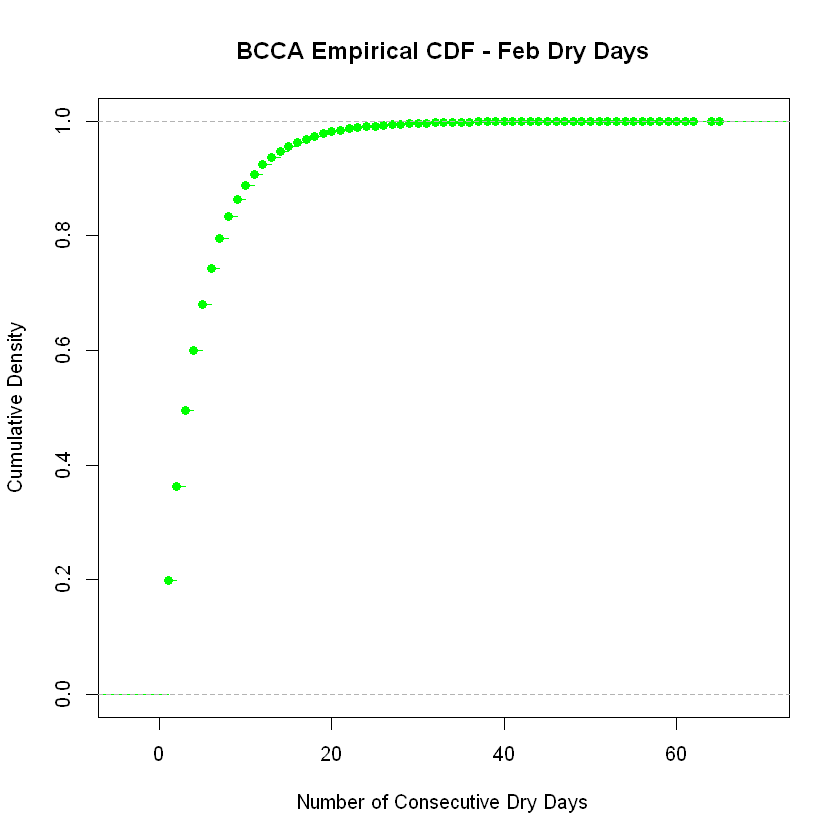

In [104]:
plot(ecdf(dBCFeb$Dry_Count), main="BCCA Empirical CDF - Feb Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

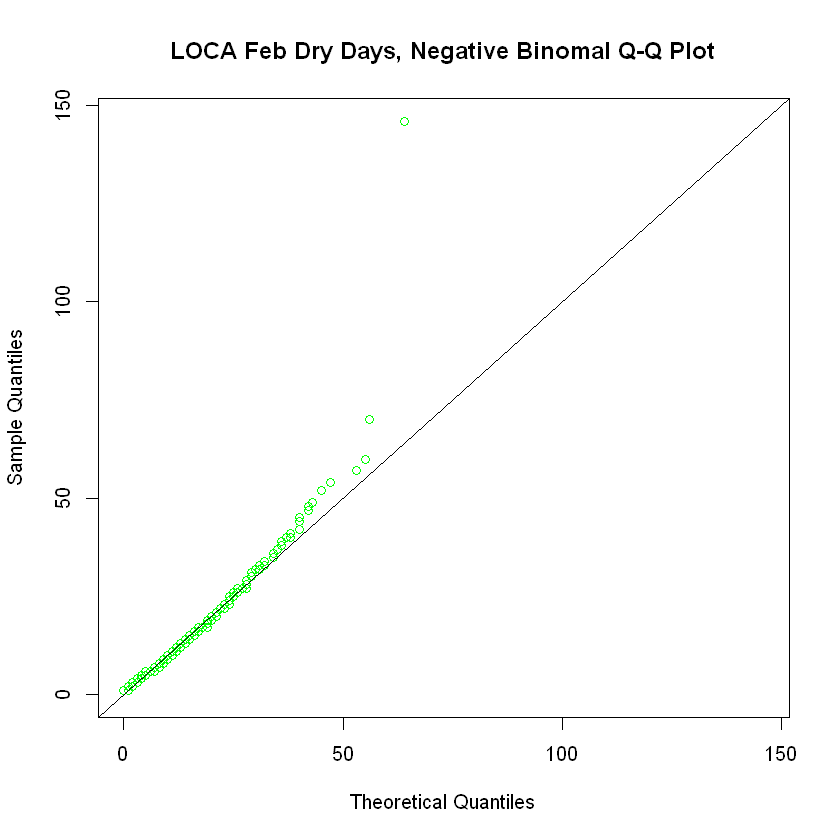

In [105]:
dLOFebMax <- max( dLOFeb$Dry_Count )
dLOFebMean <- mean( dLOFeb$Dry_Count )
dLOFebVar <- var( dLOFeb$Dry_Count )
dLOFebBNr <- dLOFebMean^2 / (dLOFebVar - dLOFebMean)
dLOFebTstNB <- rnbinom( 1000, mu=dLOFebMean, size=dLOFebBNr )
qqplot( dLOFebTstNB, dLOFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Feb Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOFebMax), ylim=c(0,dLOFebMax) )
abline( 0, 1)

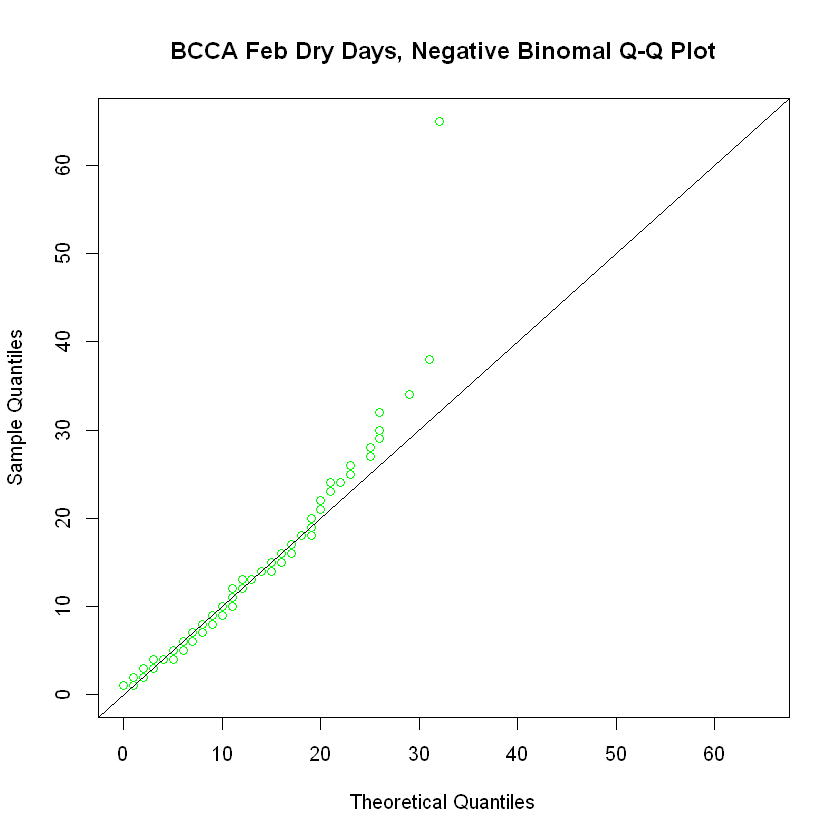

In [106]:
dBCFebMax <- max( dBCFeb$Dry_Count )
dBCFebMean <- mean( dBCFeb$Dry_Count )
dBCFebVar <- var( dBCFeb$Dry_Count )
dBCFebBNr <- dBCFebMean^2 / (dBCFebVar - dBCFebMean)
dBCFebTstNB <- rnbinom( 1000, mu=dBCFebMean, size=dBCFebBNr )
qqplot( dBCFebTstNB, dBCFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Feb Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCFebMax), ylim=c(0,dBCFebMax) )
abline( 0, 1)

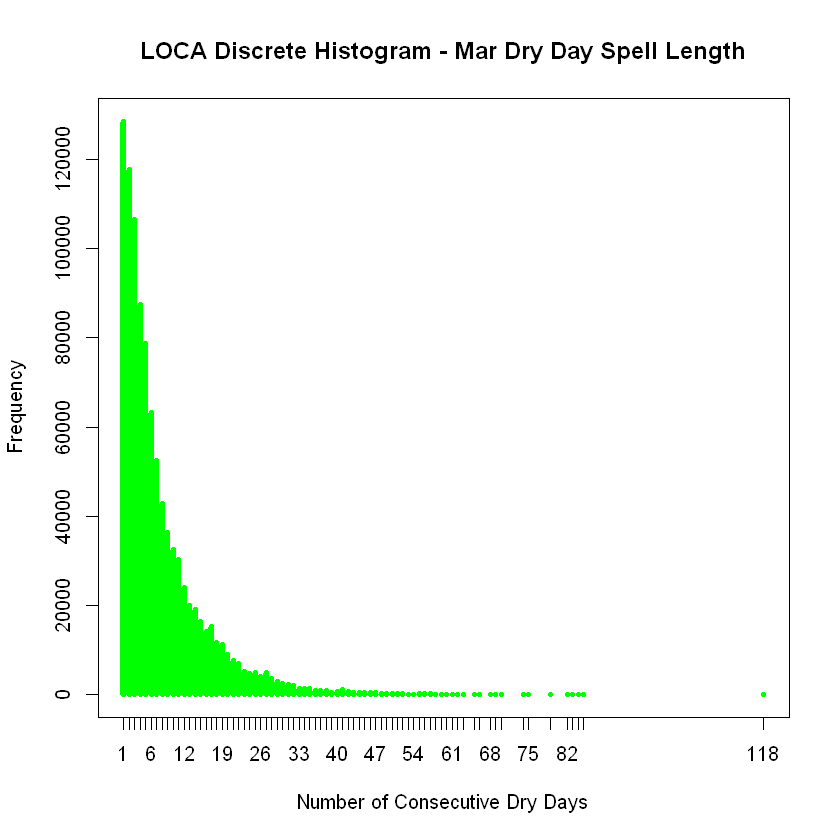

In [107]:
# our case is discrete so use this command
plot( table( dLOMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Mar Dry Day Spell Length", 
      col="green" )

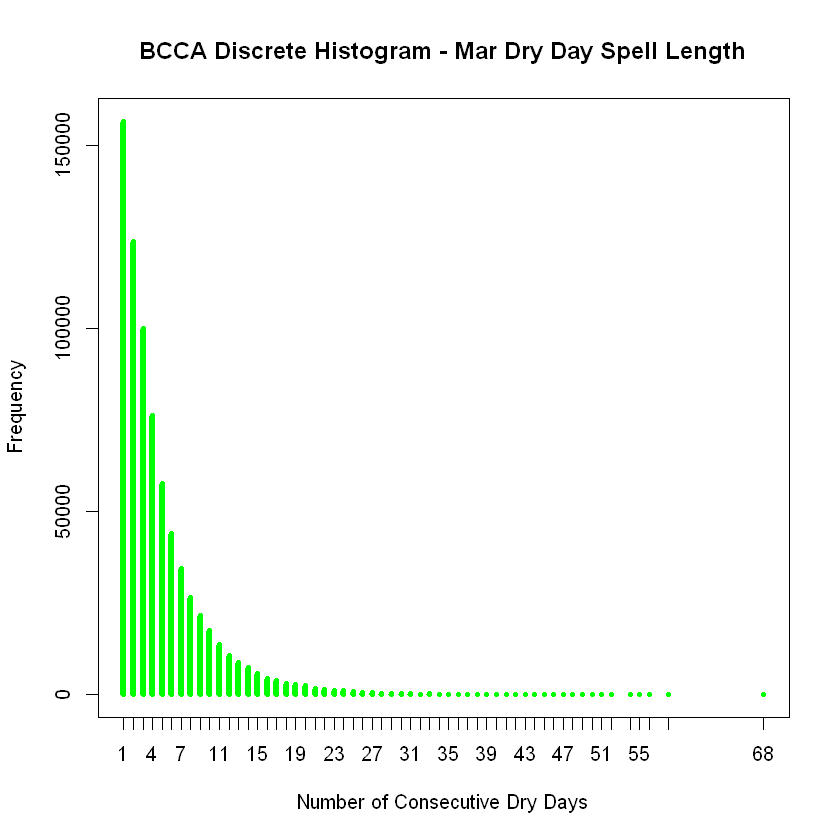

In [108]:
plot( table( dBCMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Mar Dry Day Spell Length", 
      col="green" )

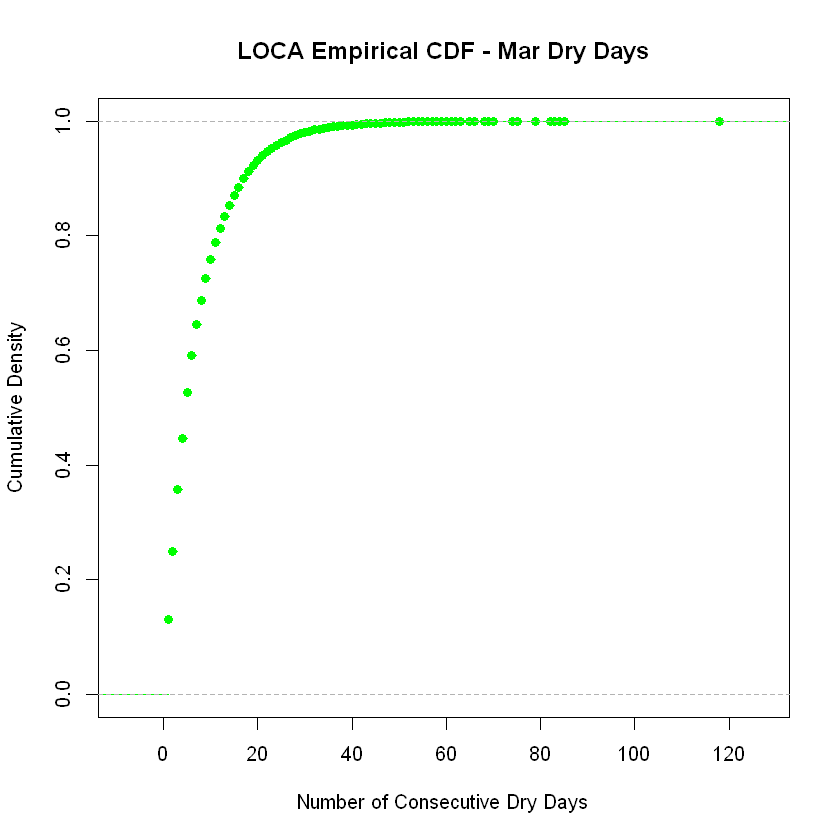

In [109]:
plot(ecdf(dLOMar$Dry_Count), main="LOCA Empirical CDF - Mar Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

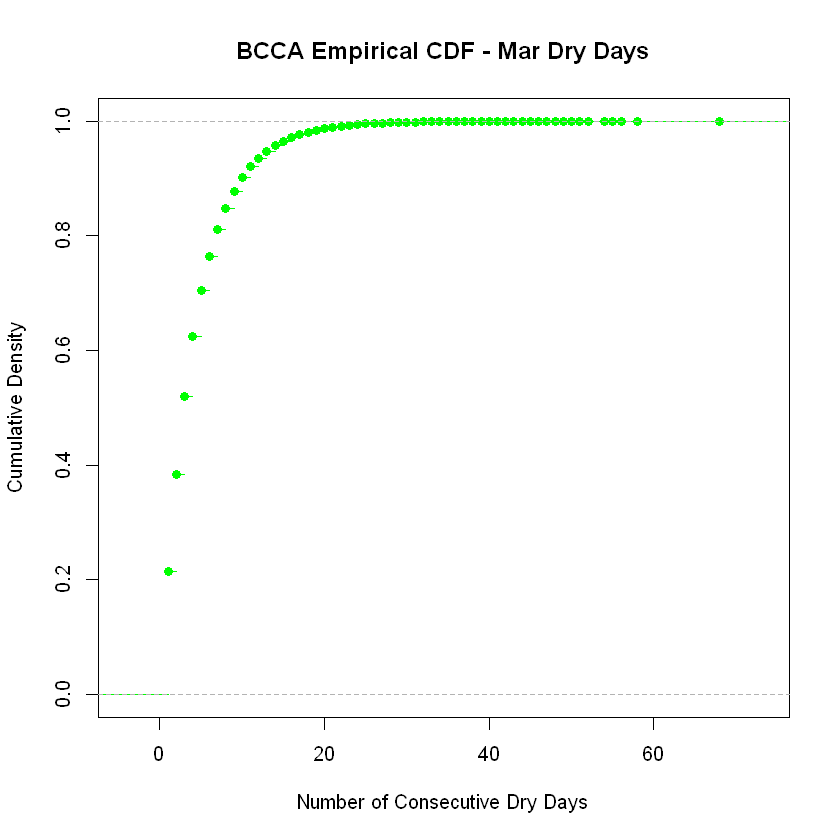

In [110]:
plot(ecdf(dBCMar$Dry_Count), main="BCCA Empirical CDF - Mar Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

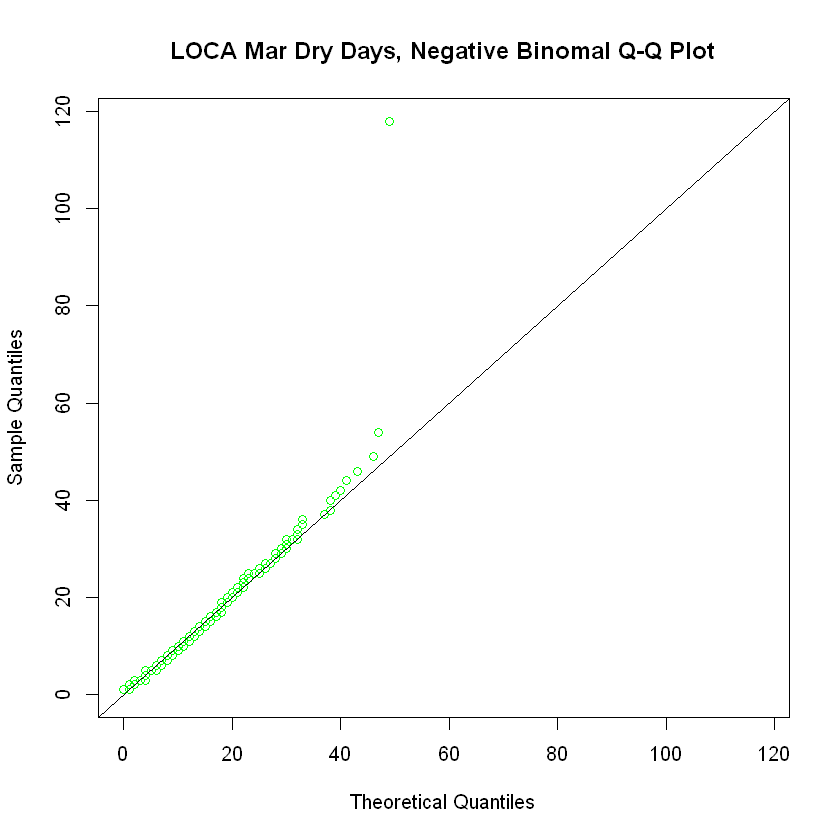

In [111]:
dLOMarMax <- max( dLOMar$Dry_Count )
dLOMarMean <- mean( dLOMar$Dry_Count )
dLOMarVar <- var( dLOMar$Dry_Count )
dLOMarBNr <- dLOMarMean^2 / (dLOMarVar - dLOMarMean)
dLOMarTstNB <- rnbinom( 1000, mu=dLOMarMean, size=dLOMarBNr )
qqplot( dLOMarTstNB, dLOMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Mar Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOMarMax), ylim=c(0,dLOMarMax) )
abline( 0, 1)

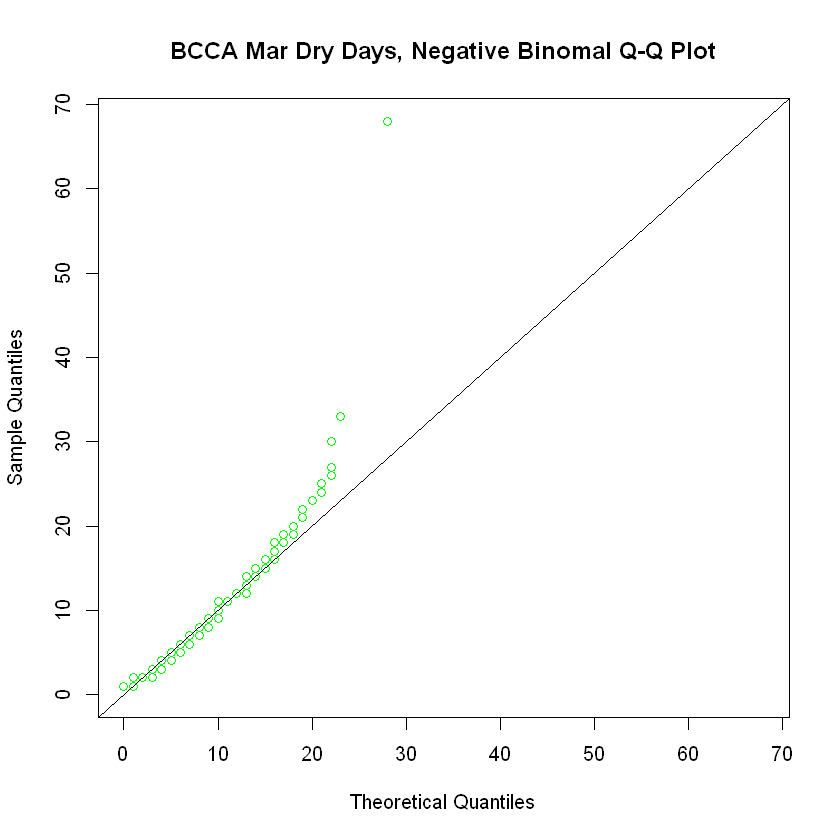

In [112]:
dBCMarMax <- max( dBCMar$Dry_Count )
dBCMarMean <- mean( dBCMar$Dry_Count )
dBCMarVar <- var( dBCMar$Dry_Count )
dBCMarBNr <- dBCMarMean^2 / (dBCMarVar - dBCMarMean)
dBCMarTstNB <- rnbinom( 1000, mu=dBCMarMean, size=dBCMarBNr )
qqplot( dBCMarTstNB, dBCMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Mar Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCMarMax), ylim=c(0,dBCMarMax) )
abline( 0, 1)

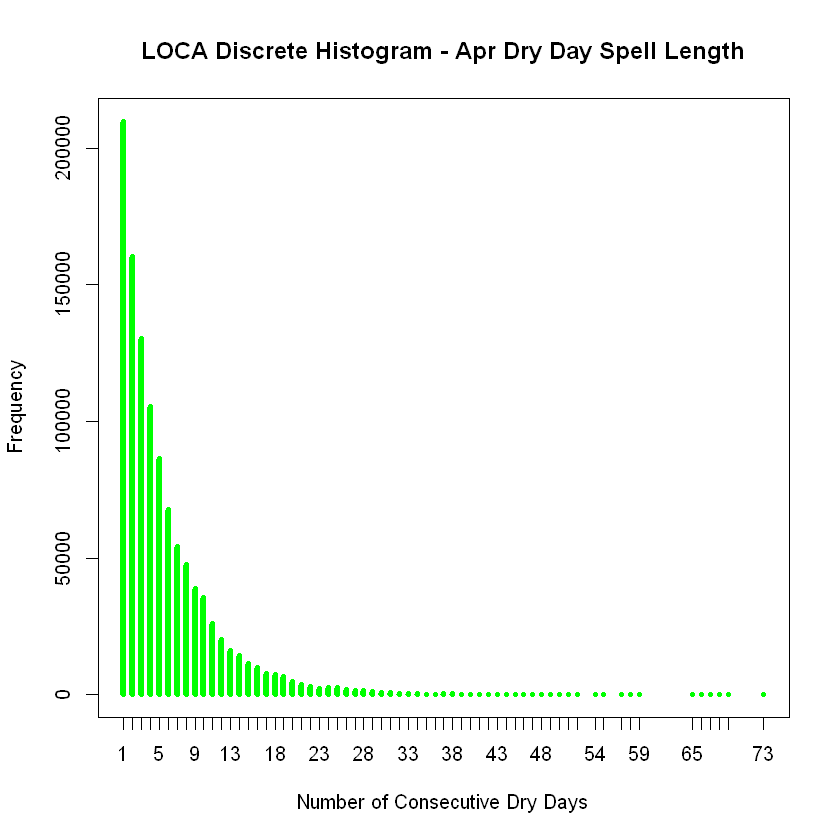

In [113]:
# our case is discrete so use this command
plot( table( dLOApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Apr Dry Day Spell Length", 
      col="green" )

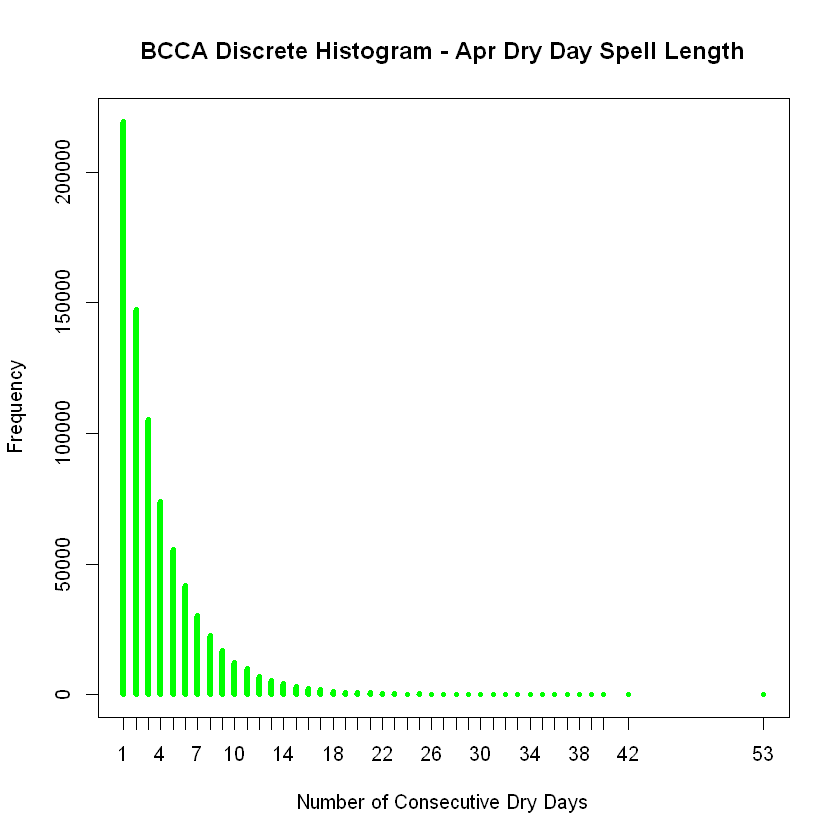

In [114]:
plot( table( dBCApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Apr Dry Day Spell Length", 
      col="green" )

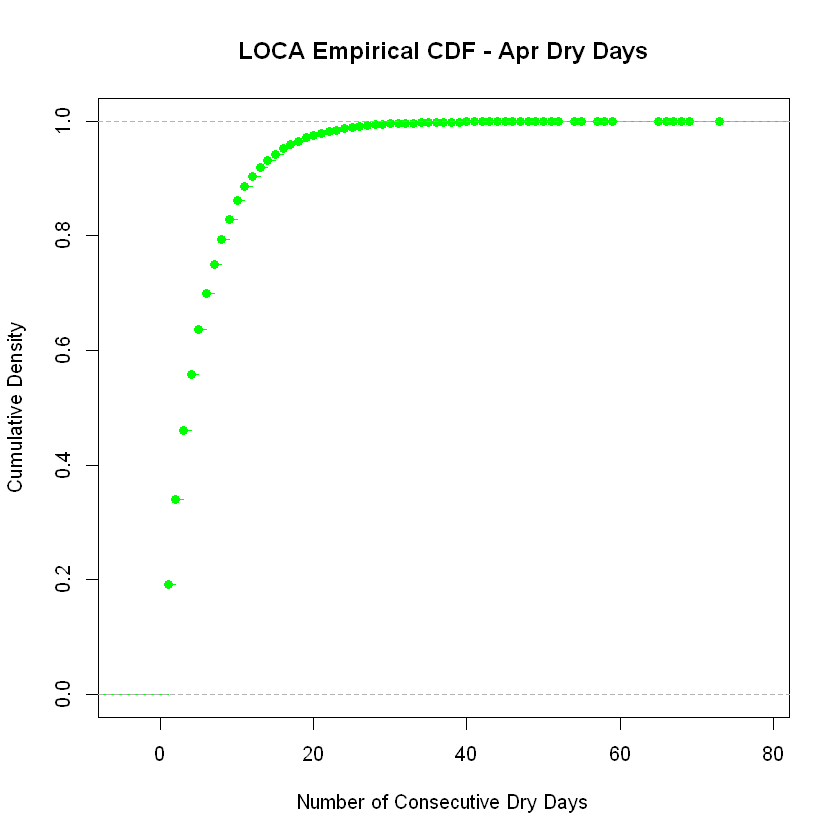

In [115]:
plot(ecdf(dLOApr$Dry_Count), main="LOCA Empirical CDF - Apr Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

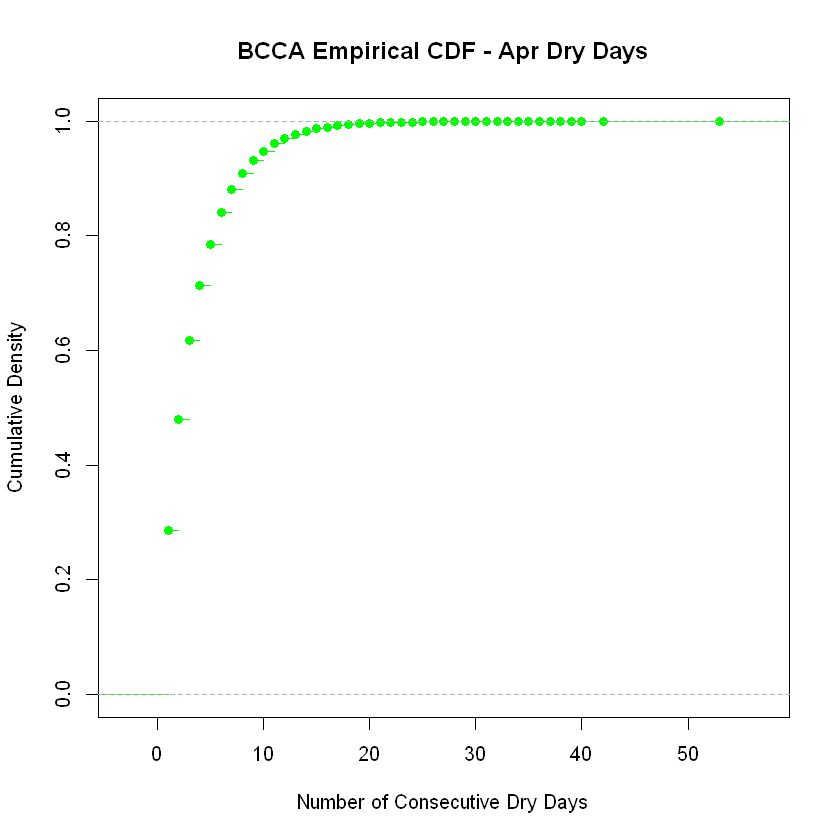

In [116]:
plot(ecdf(dBCApr$Dry_Count), main="BCCA Empirical CDF - Apr Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

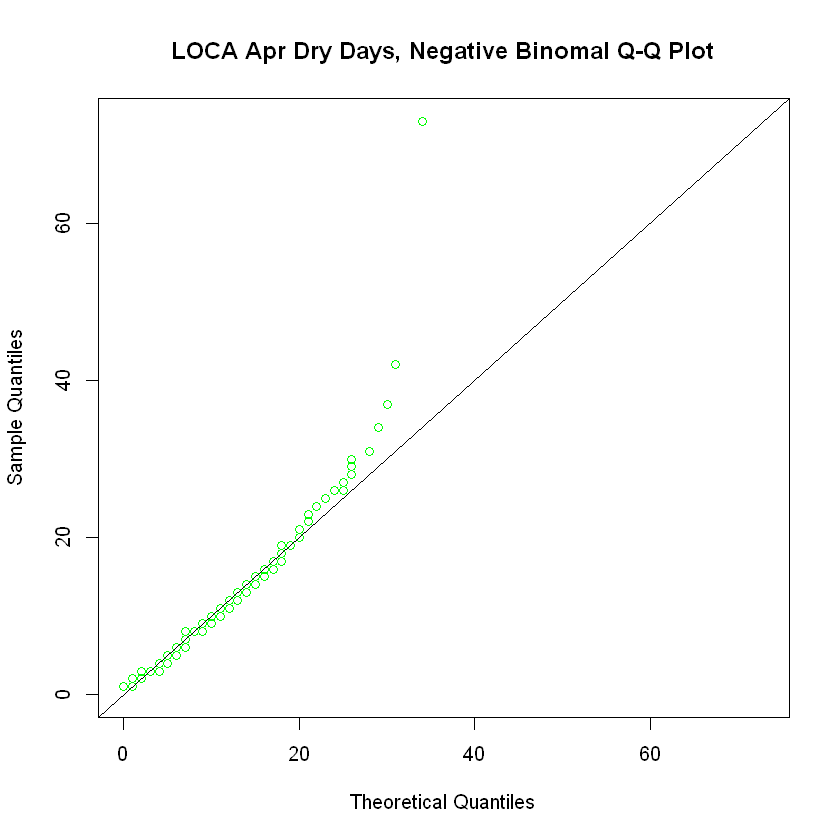

In [117]:
dLOAprMax <- max( dLOApr$Dry_Count )
dLOAprMean <- mean( dLOApr$Dry_Count )
dLOAprVar <- var( dLOApr$Dry_Count )
dLOAprBNr <- dLOAprMean^2 / (dLOAprVar - dLOAprMean)
dLOAprTstNB <- rnbinom( 1000, mu=dLOAprMean, size=dLOAprBNr )
qqplot( dLOAprTstNB, dLOApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Apr Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOAprMax), ylim=c(0,dLOAprMax) )
abline( 0, 1)

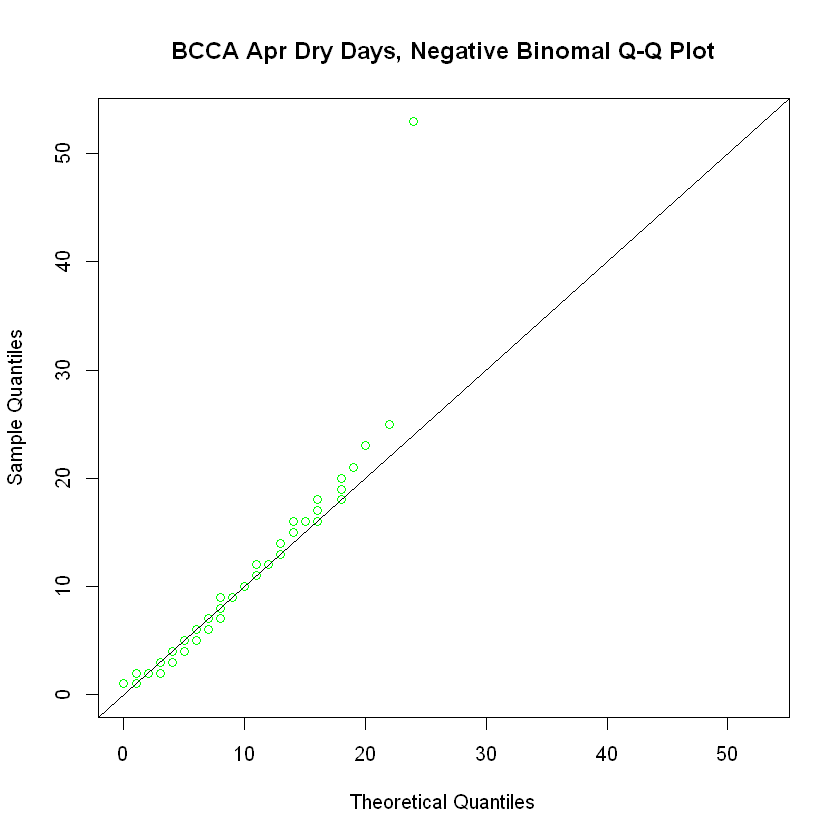

In [118]:
dBCAprMax <- max( dBCApr$Dry_Count )
dBCAprMean <- mean( dBCApr$Dry_Count )
dBCAprVar <- var( dBCApr$Dry_Count )
dBCAprBNr <- dBCAprMean^2 / (dBCAprVar - dBCAprMean)
dBCAprTstNB <- rnbinom( 1000, mu=dBCAprMean, size=dBCAprBNr )
qqplot( dBCAprTstNB, dBCApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Apr Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCAprMax), ylim=c(0,dBCAprMax) )
abline( 0, 1)

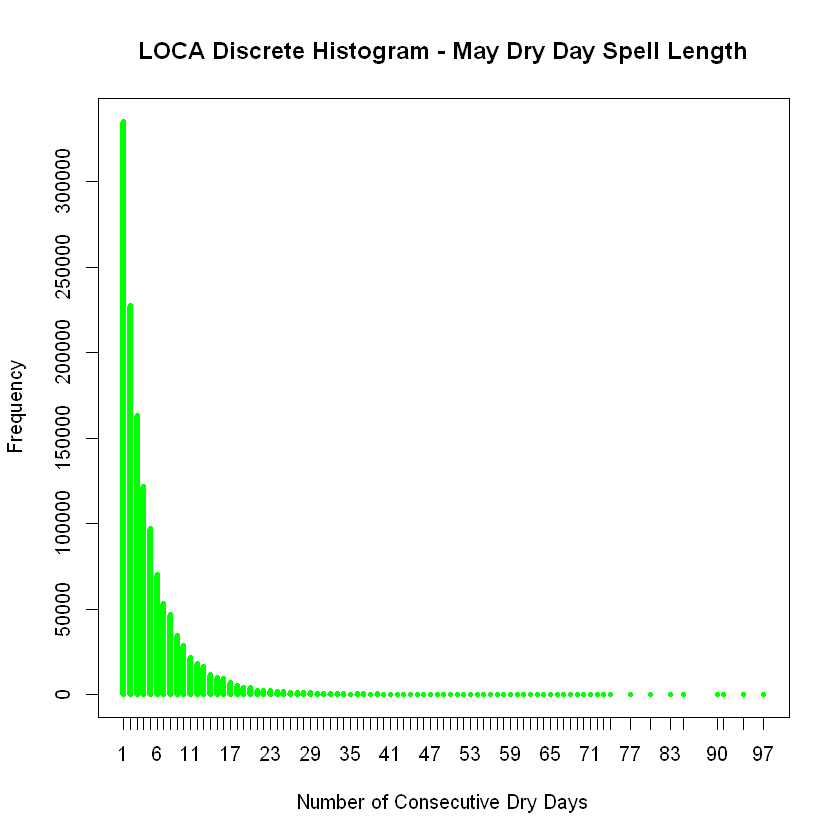

In [119]:
# our case is discrete so use this command
plot( table( dLOMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

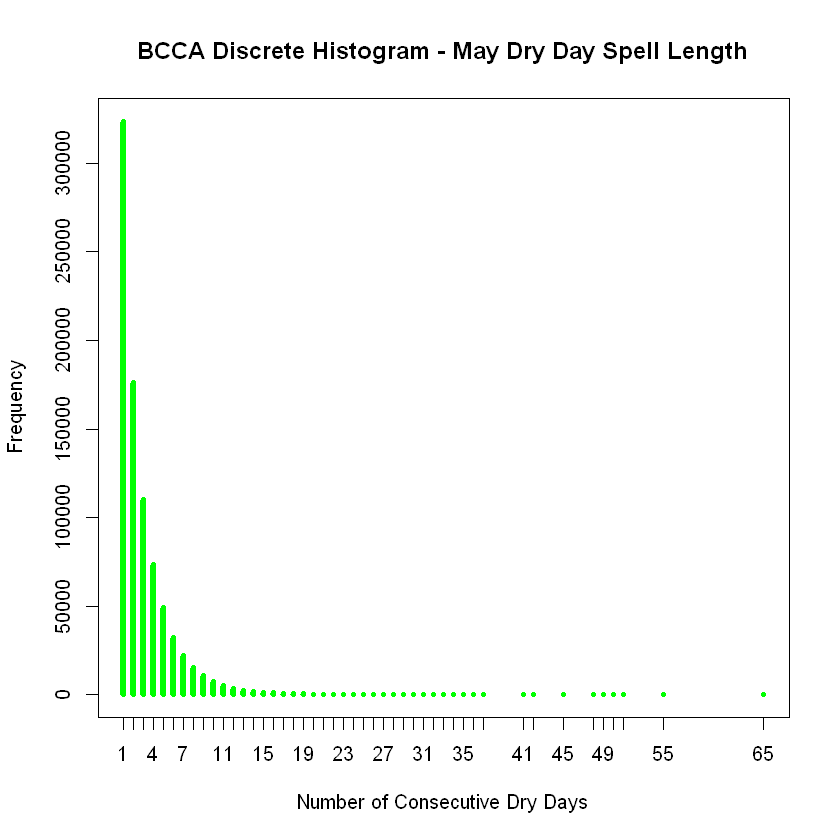

In [120]:
plot( table( dBCMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

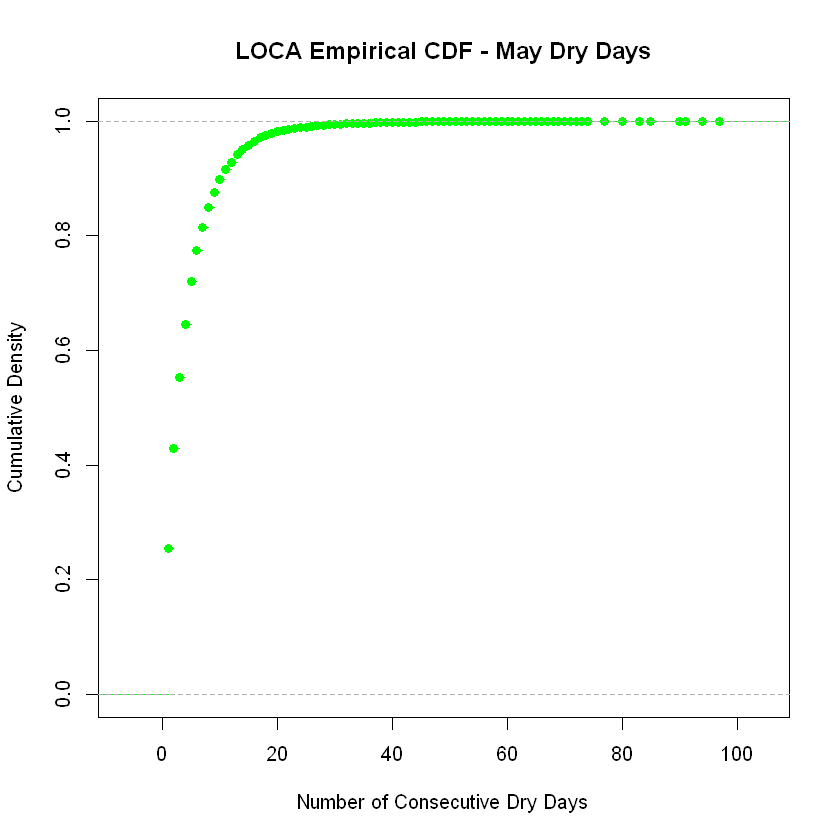

In [121]:
plot(ecdf(dLOMay$Dry_Count), main="LOCA Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

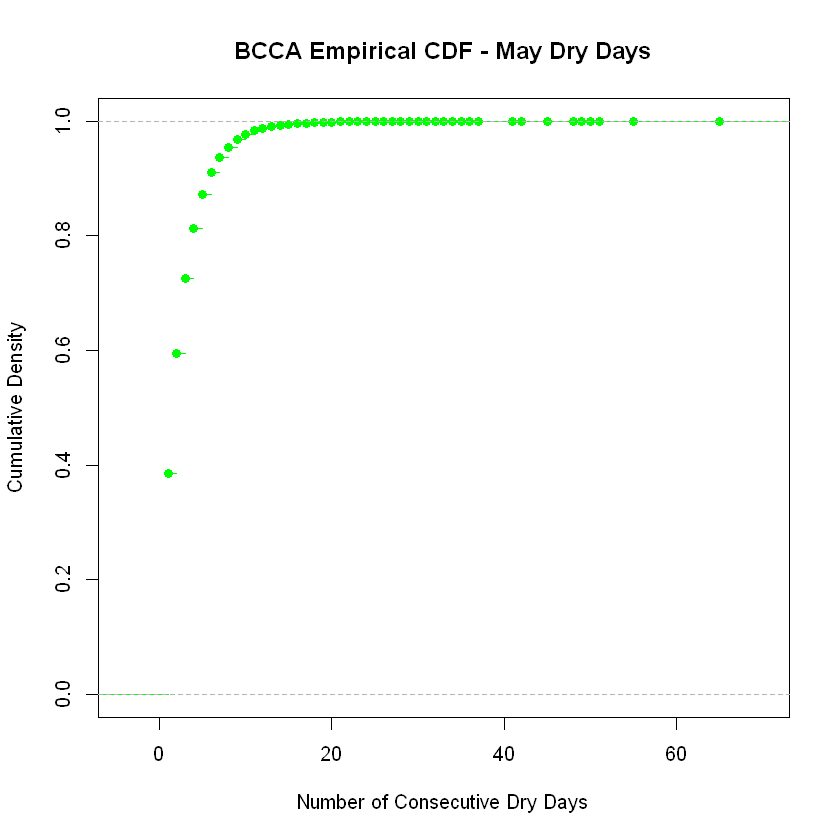

In [122]:
plot(ecdf(dBCMay$Dry_Count), main="BCCA Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

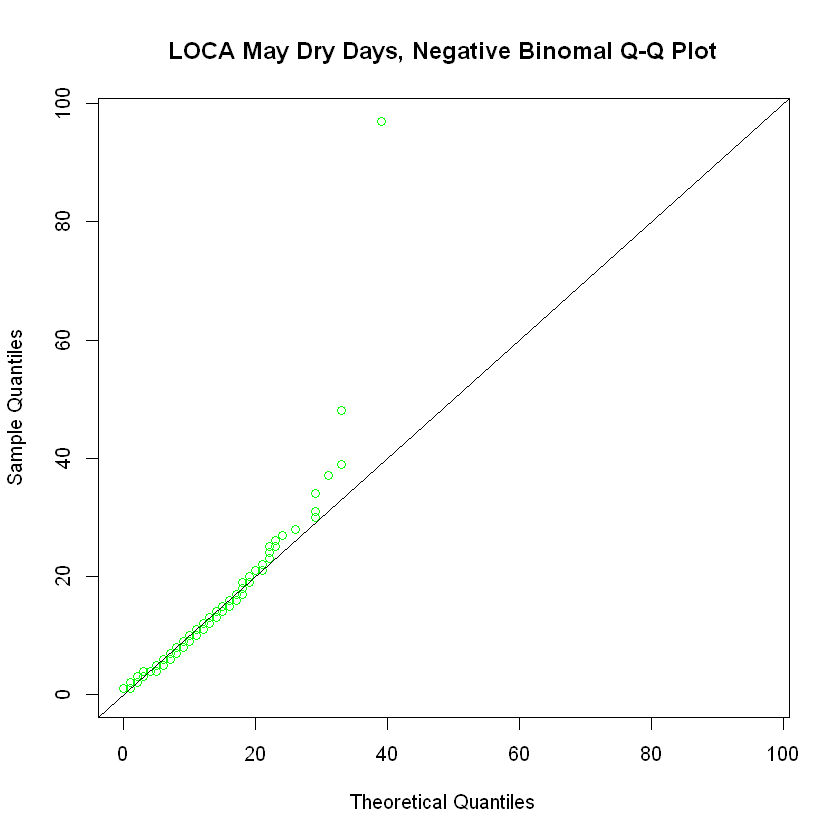

In [123]:
dLOMayMax <- max( dLOMay$Dry_Count )
dLOMayMean <- mean( dLOMay$Dry_Count )
dLOMayVar <- var( dLOMay$Dry_Count )
dLOMayBNr <- dLOMayMean^2 / (dLOMayVar - dLOMayMean)
dLOMayTstNB <- rnbinom( 1000, mu=dLOMayMean, size=dLOMayBNr )
qqplot( dLOMayTstNB, dLOMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOMayMax), ylim=c(0,dLOMayMax) )
abline( 0, 1)

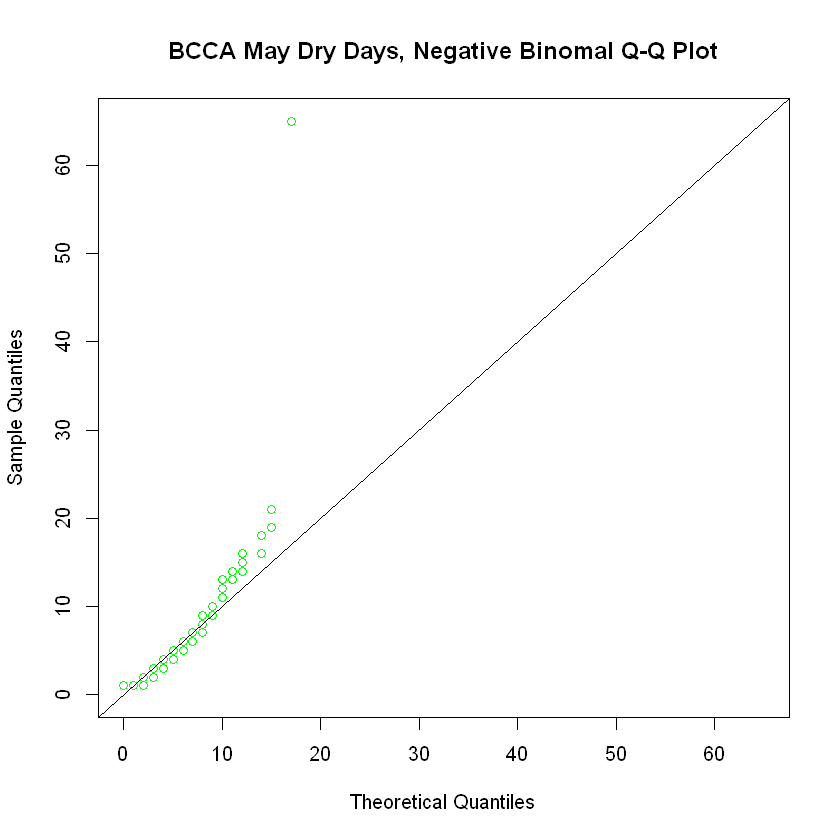

In [124]:
dBCMayMax <- max( dBCMay$Dry_Count )
dBCMayMean <- mean( dBCMay$Dry_Count )
dBCMayVar <- var( dBCMay$Dry_Count )
dBCMayBNr <- dBCMayMean^2 / (dBCMayVar - dBCMayMean)
dBCMayTstNB <- rnbinom( 1000, mu=dBCMayMean, size=dBCMayBNr )
qqplot( dBCMayTstNB, dBCMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCMayMax), ylim=c(0,dBCMayMax) )
abline( 0, 1)

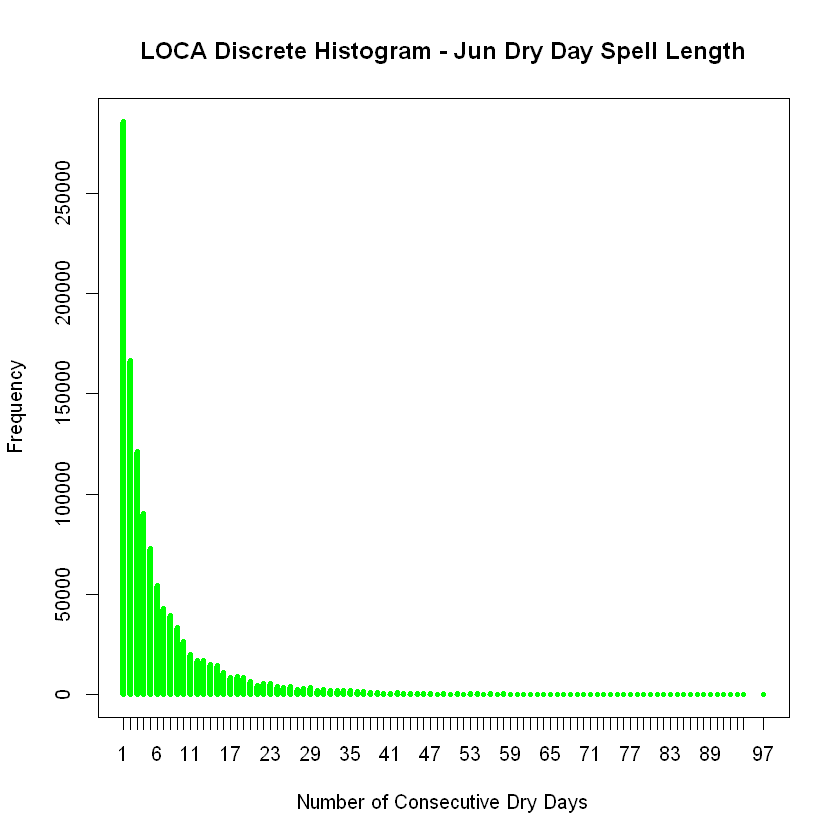

In [125]:
# our case is discrete so use this command
plot( table( dLOJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jun Dry Day Spell Length", 
      col="green" )

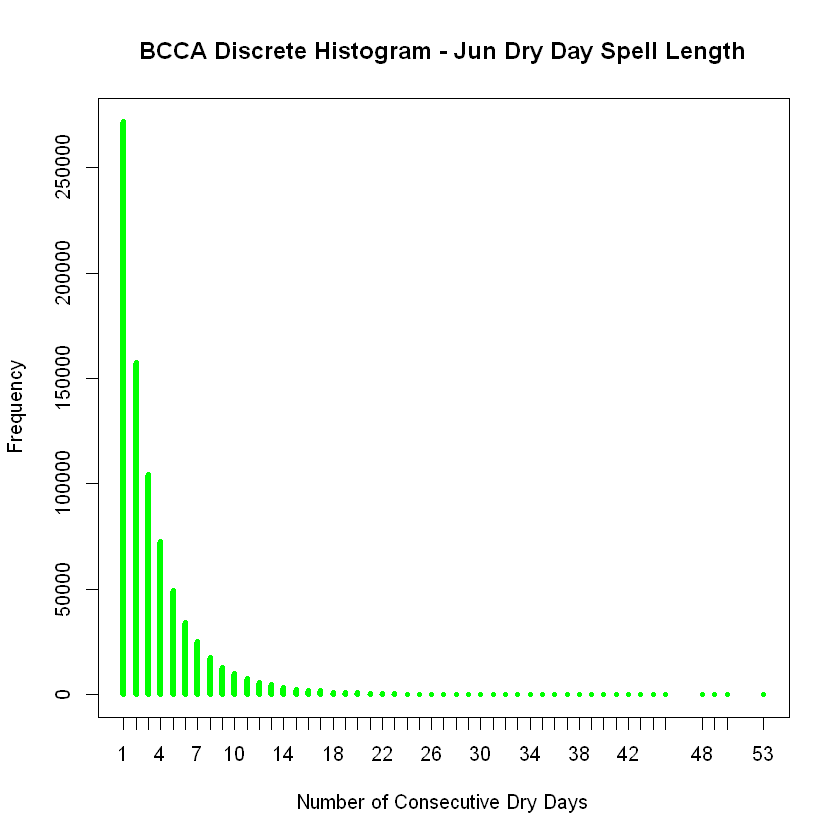

In [126]:
plot( table( dBCJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jun Dry Day Spell Length", 
      col="green" )

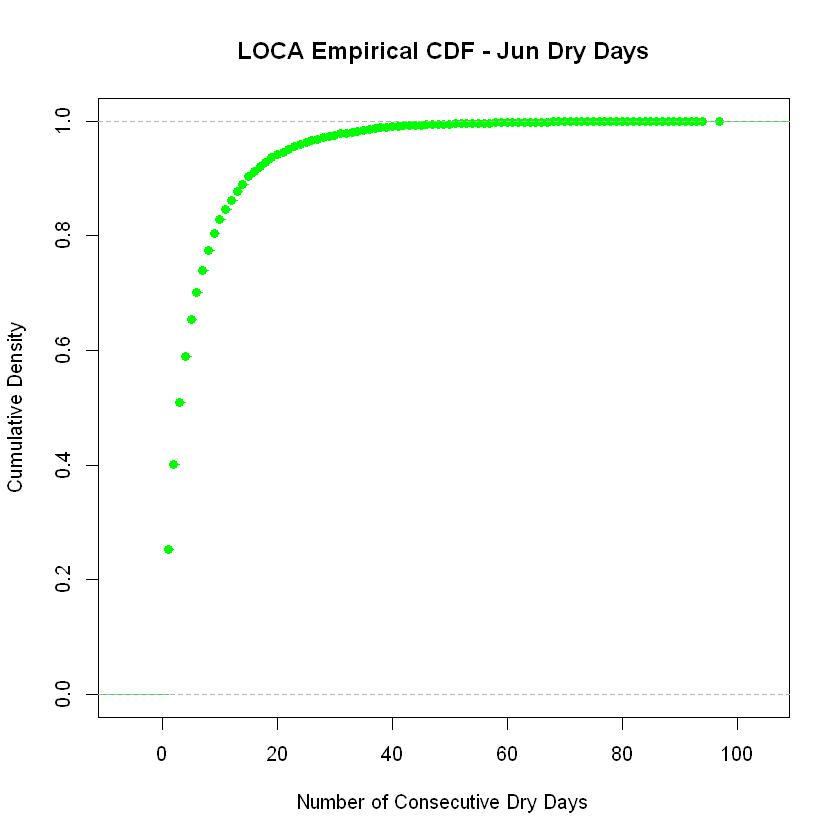

In [127]:
plot(ecdf(dLOJun$Dry_Count), main="LOCA Empirical CDF - Jun Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

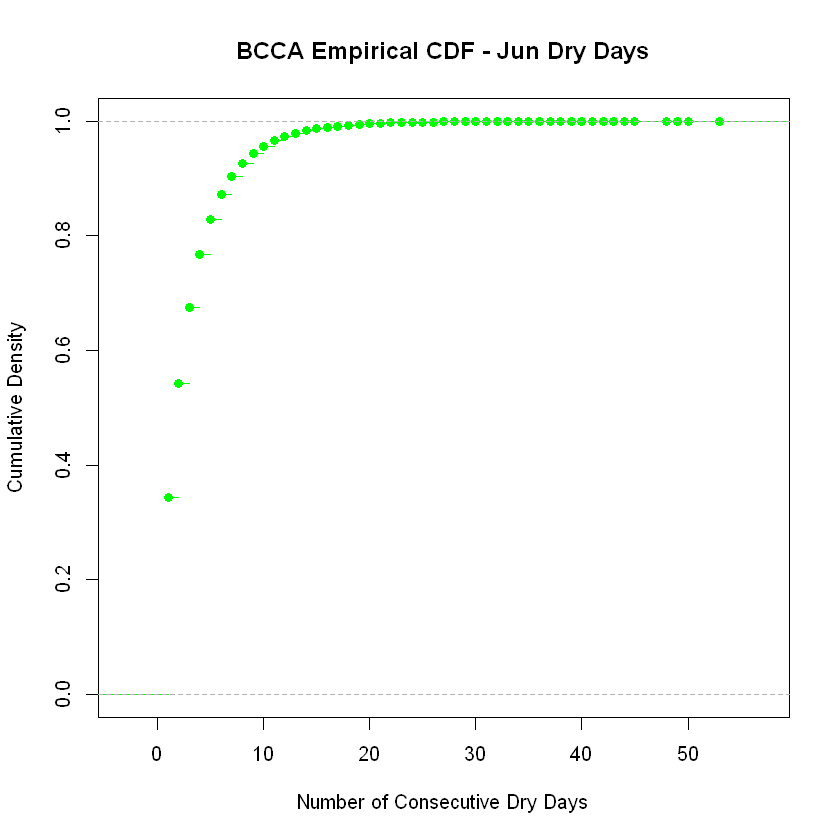

In [128]:
plot(ecdf(dBCJun$Dry_Count), main="BCCA Empirical CDF - Jun Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

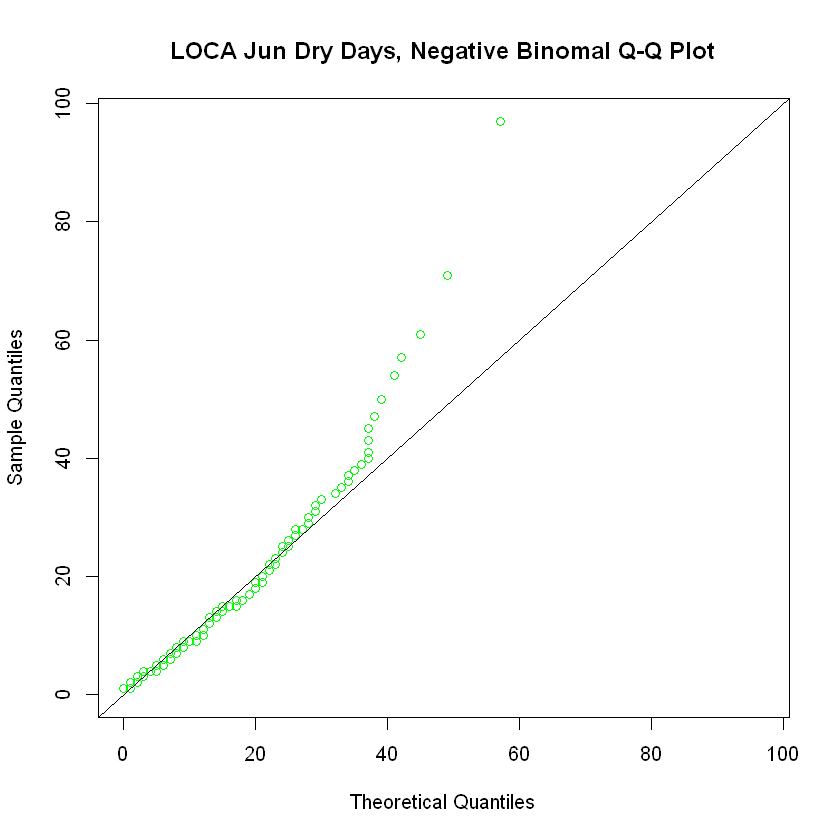

In [129]:
dLOJunMax <- max( dLOJun$Dry_Count )
dLOJunMean <- mean( dLOJun$Dry_Count )
dLOJunVar <- var( dLOJun$Dry_Count )
dLOJunBNr <- dLOJunMean^2 / (dLOJunVar - dLOJunMean)
dLOJunTstNB <- rnbinom( 1000, mu=dLOJunMean, size=dLOJunBNr )
qqplot( dLOJunTstNB, dLOJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jun Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJunMax), ylim=c(0,dLOJunMax) )
abline( 0, 1)

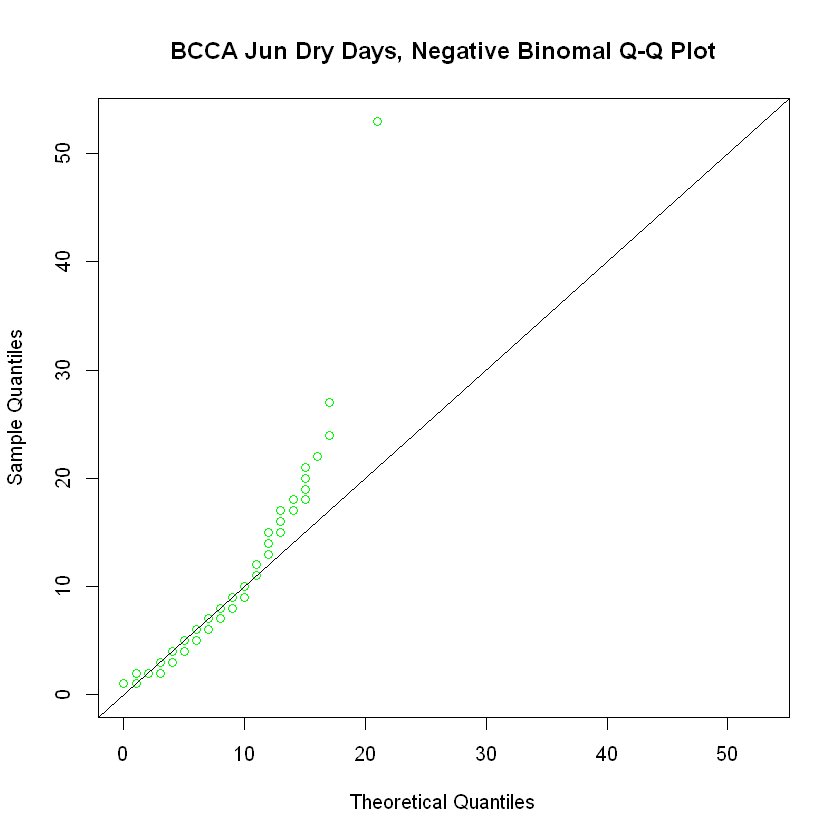

In [130]:
dBCJunMax <- max( dBCJun$Dry_Count )
dBCJunMean <- mean( dBCJun$Dry_Count )
dBCJunVar <- var( dBCJun$Dry_Count )
dBCJunBNr <- dBCJunMean^2 / (dBCJunVar - dBCJunMean)
dBCJunTstNB <- rnbinom( 1000, mu=dBCJunMean, size=dBCJunBNr )
qqplot( dBCJunTstNB, dBCJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jun Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJunMax), ylim=c(0,dBCJunMax) )
abline( 0, 1)

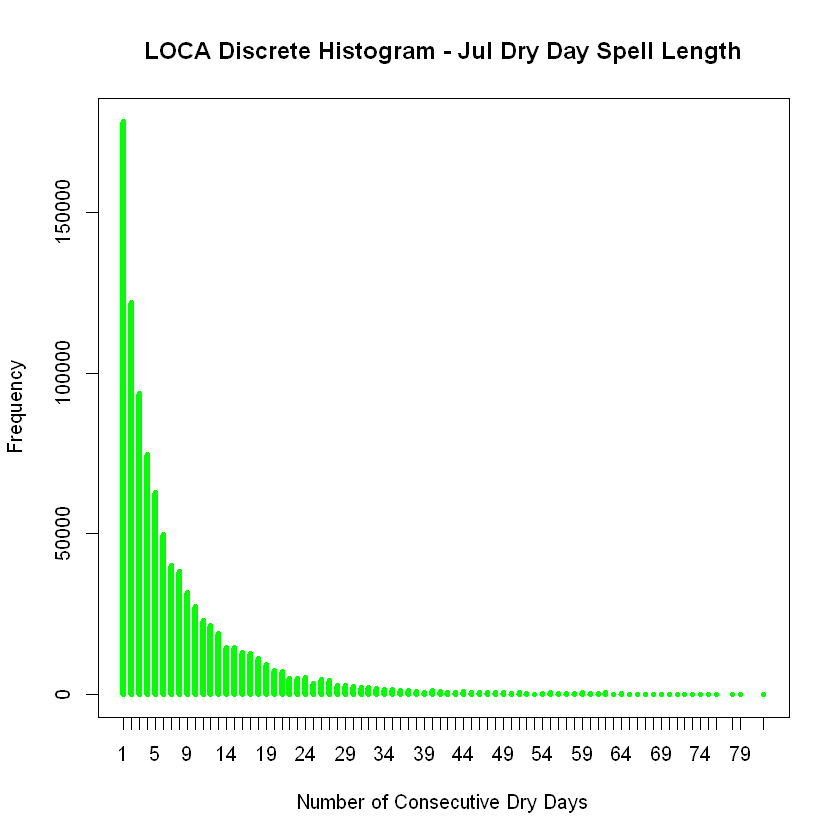

In [131]:
# our case is discrete so use this command
plot( table( dLOJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jul Dry Day Spell Length", 
      col="green" )

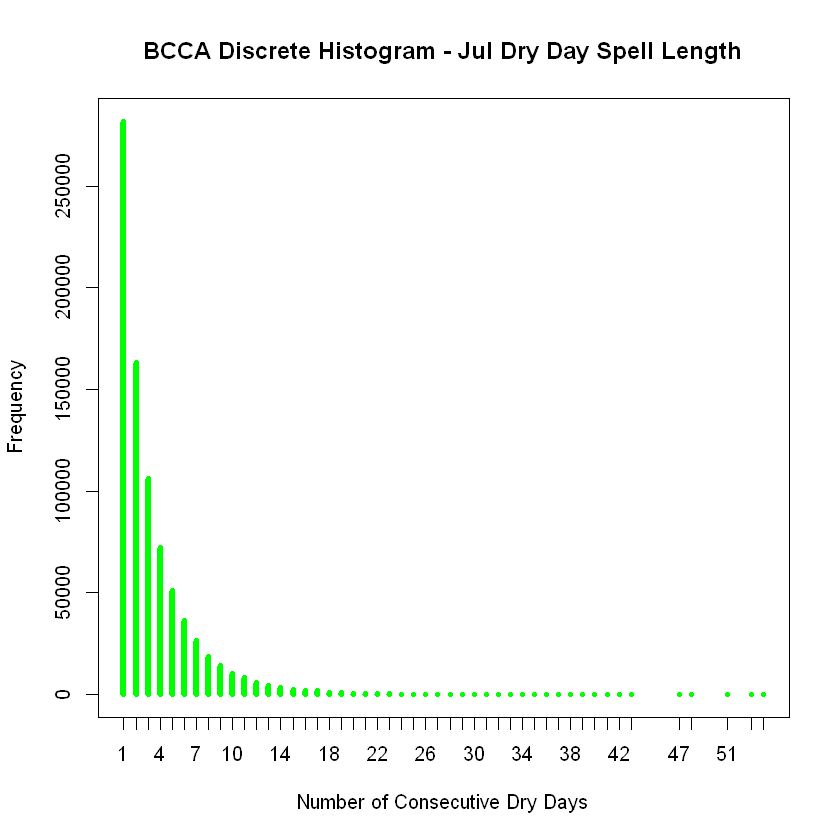

In [132]:
plot( table( dBCJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jul Dry Day Spell Length", 
      col="green" )

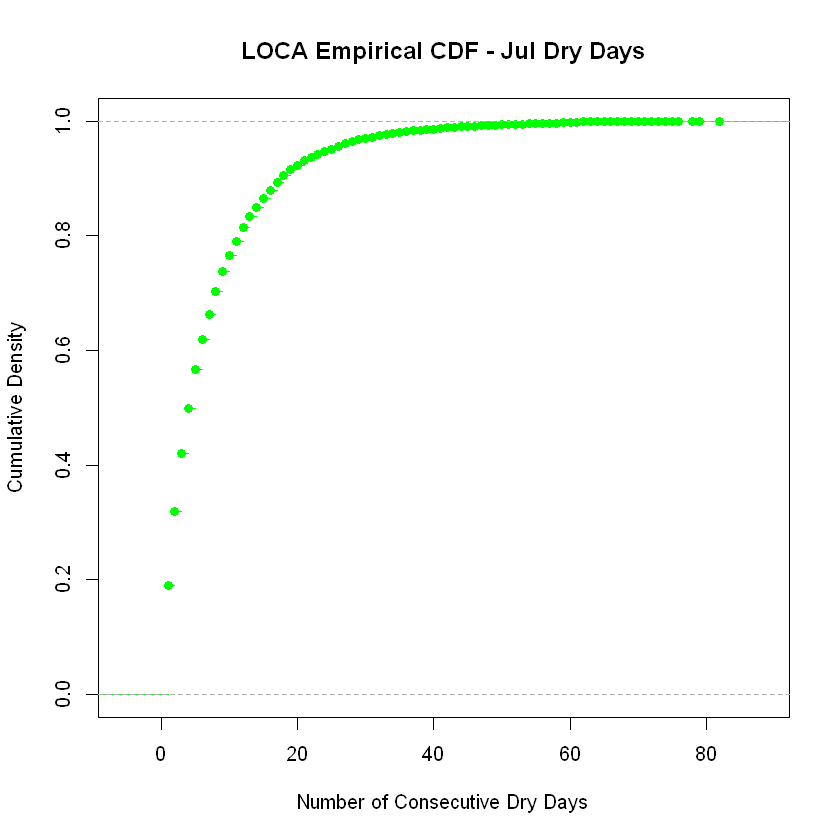

In [133]:
plot(ecdf(dLOJul$Dry_Count), main="LOCA Empirical CDF - Jul Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

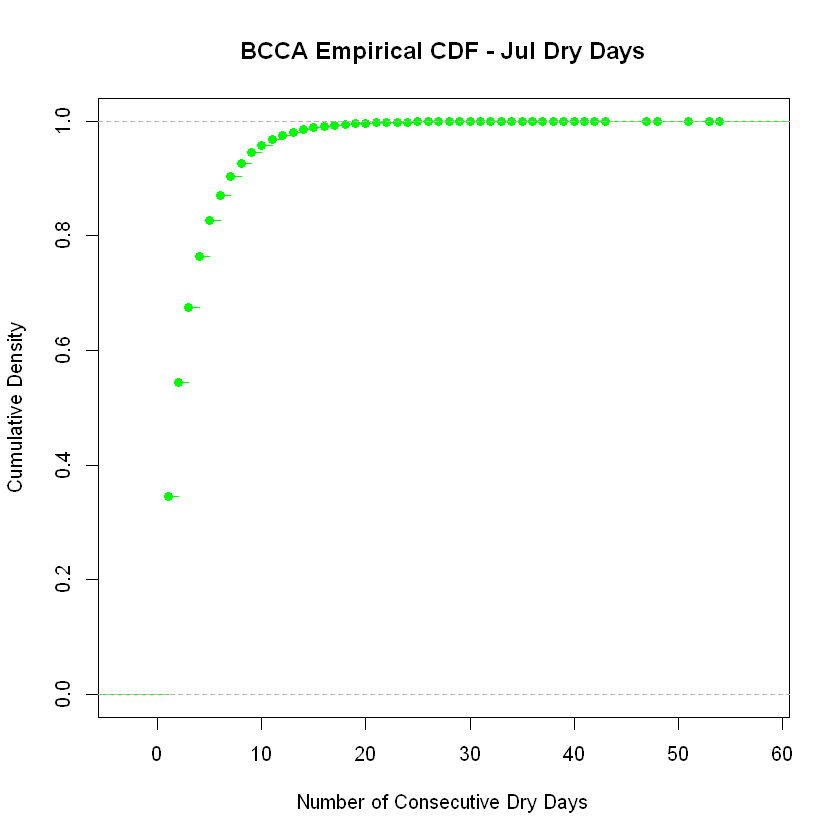

In [134]:
plot(ecdf(dBCJul$Dry_Count), main="BCCA Empirical CDF - Jul Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

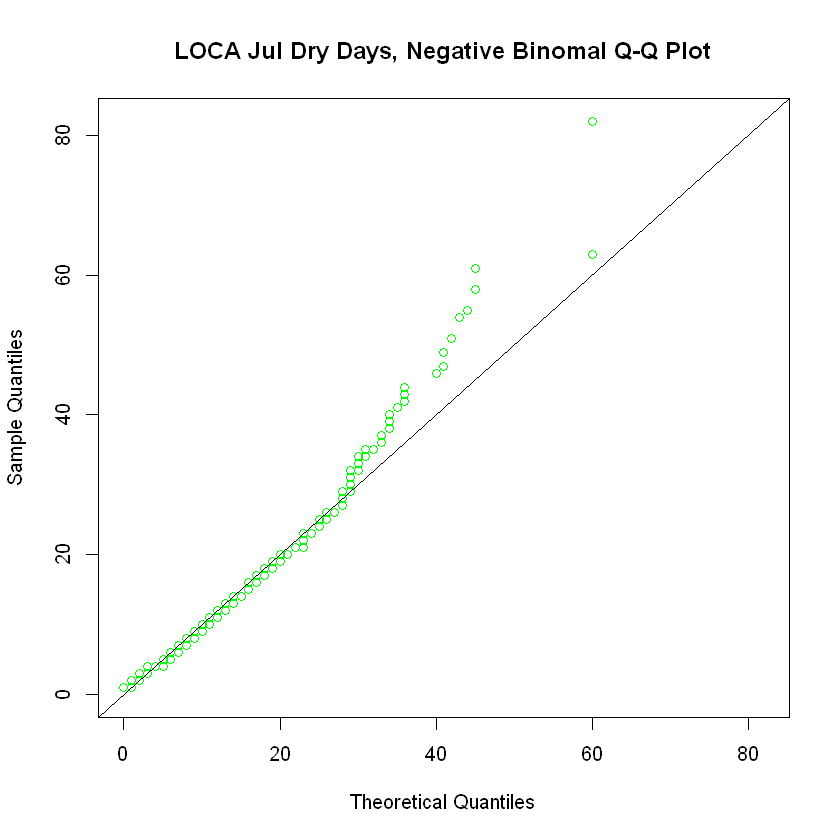

In [135]:
dLOJulMax <- max( dLOJul$Dry_Count )
dLOJulMean <- mean( dLOJul$Dry_Count )
dLOJulVar <- var( dLOJul$Dry_Count )
dLOJulBNr <- dLOJulMean^2 / (dLOJulVar - dLOJulMean)
dLOJulTstNB <- rnbinom( 1000, mu=dLOJulMean, size=dLOJulBNr )
qqplot( dLOJulTstNB, dLOJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jul Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJulMax), ylim=c(0,dLOJulMax) )
abline( 0, 1)

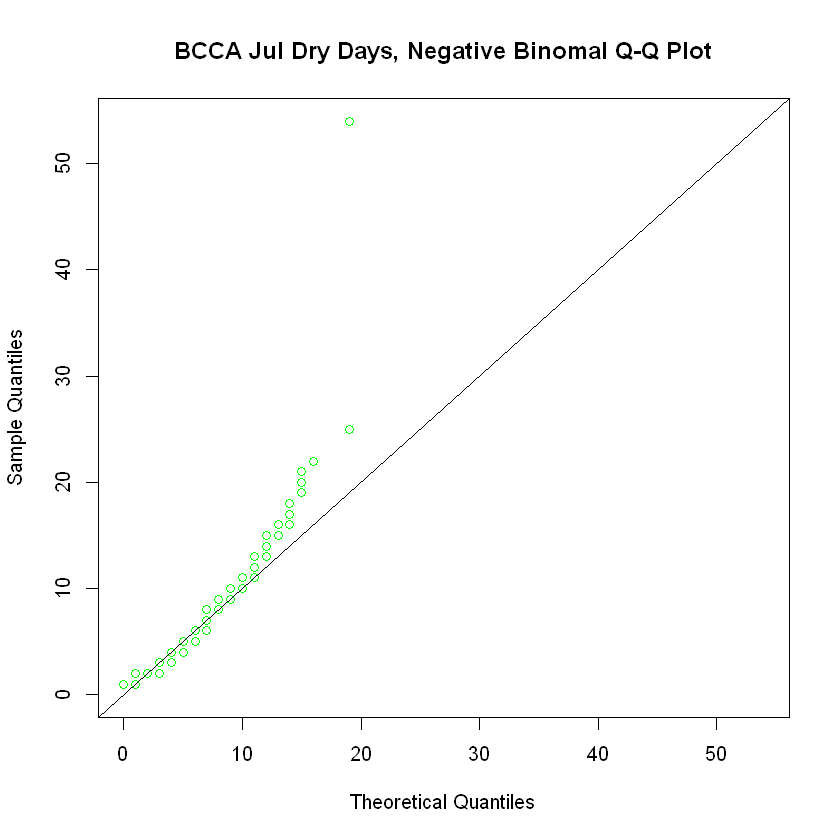

In [136]:
dBCJulMax <- max( dBCJul$Dry_Count )
dBCJulMean <- mean( dBCJul$Dry_Count )
dBCJulVar <- var( dBCJul$Dry_Count )
dBCJulBNr <- dBCJulMean^2 / (dBCJulVar - dBCJulMean)
dBCJulTstNB <- rnbinom( 1000, mu=dBCJulMean, size=dBCJulBNr )
qqplot( dBCJulTstNB, dBCJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jul Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJulMax), ylim=c(0,dBCJulMax) )
abline( 0, 1)

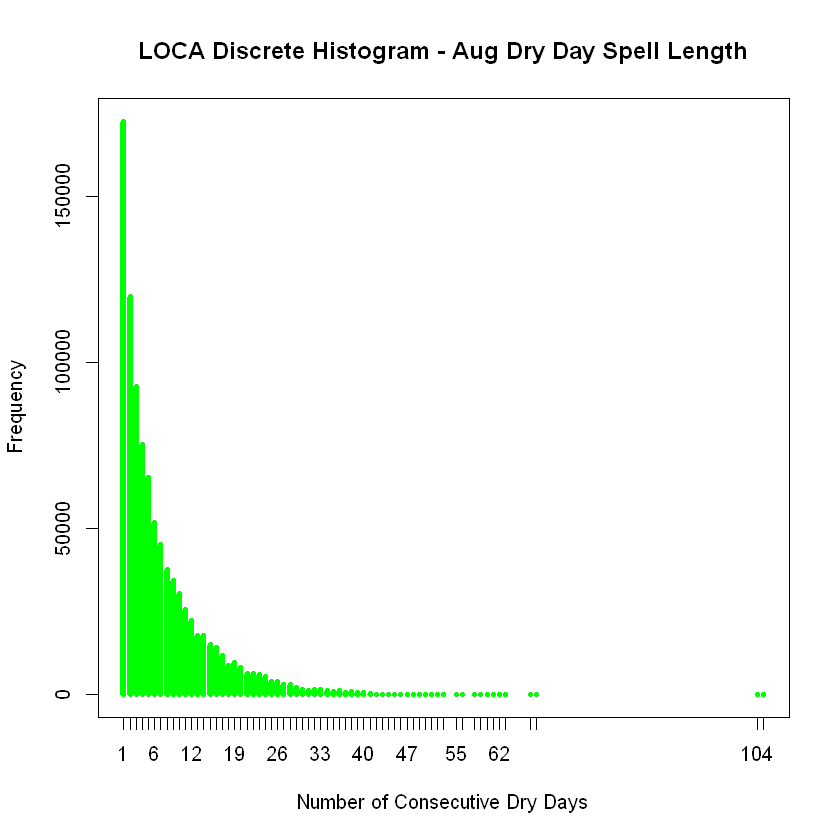

In [137]:
# our case is discrete so use this command
plot( table( dLOAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Aug Dry Day Spell Length", 
      col="green" )

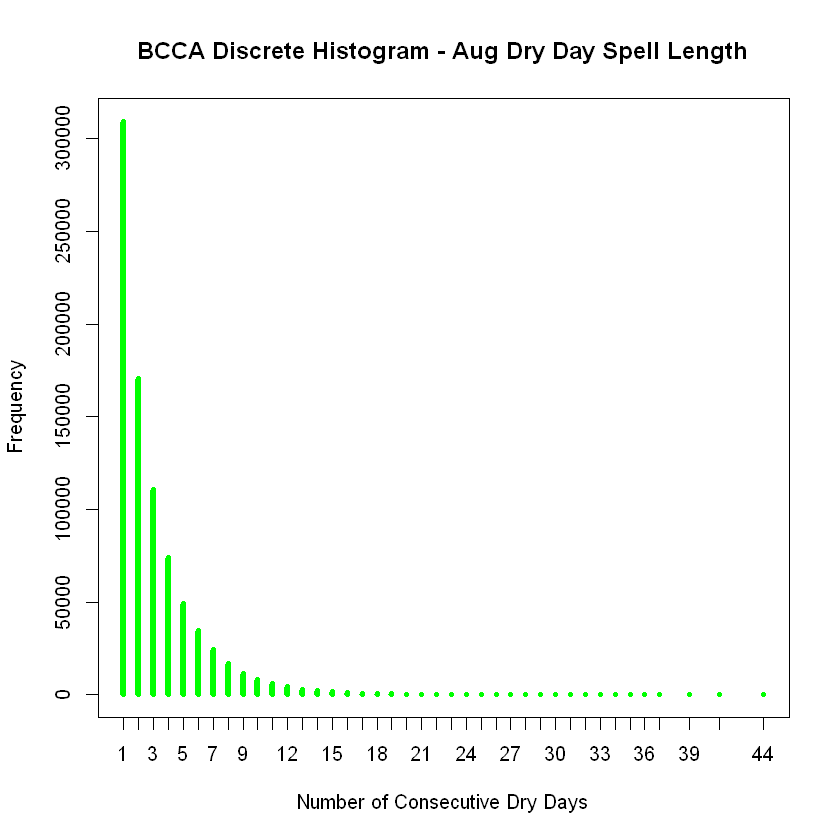

In [138]:
plot( table( dBCAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Aug Dry Day Spell Length", 
      col="green" )

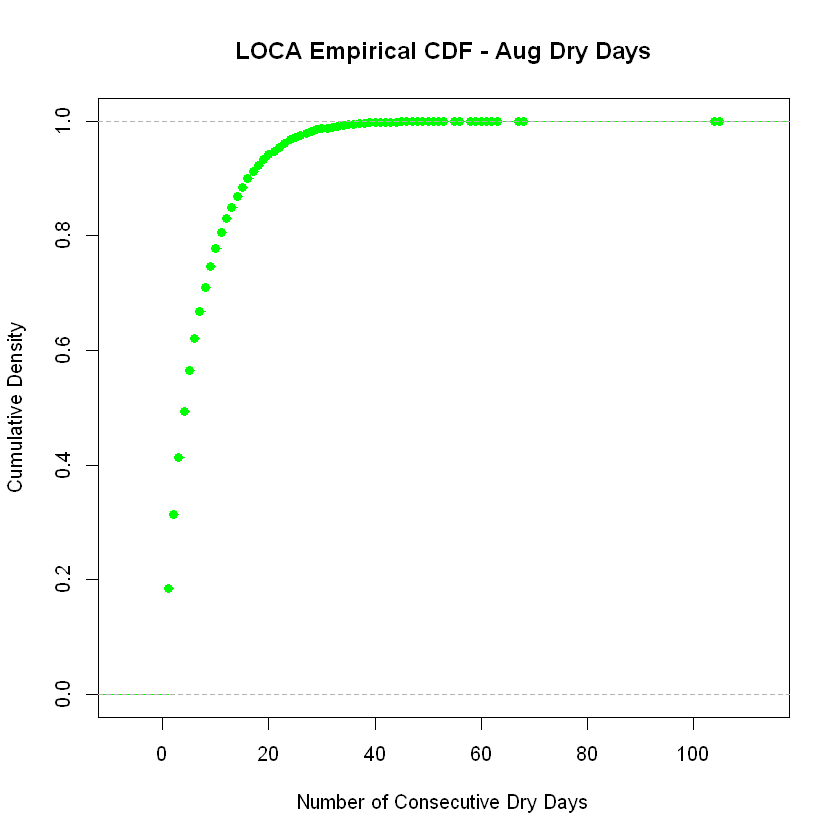

In [139]:
plot(ecdf(dLOAug$Dry_Count), main="LOCA Empirical CDF - Aug Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

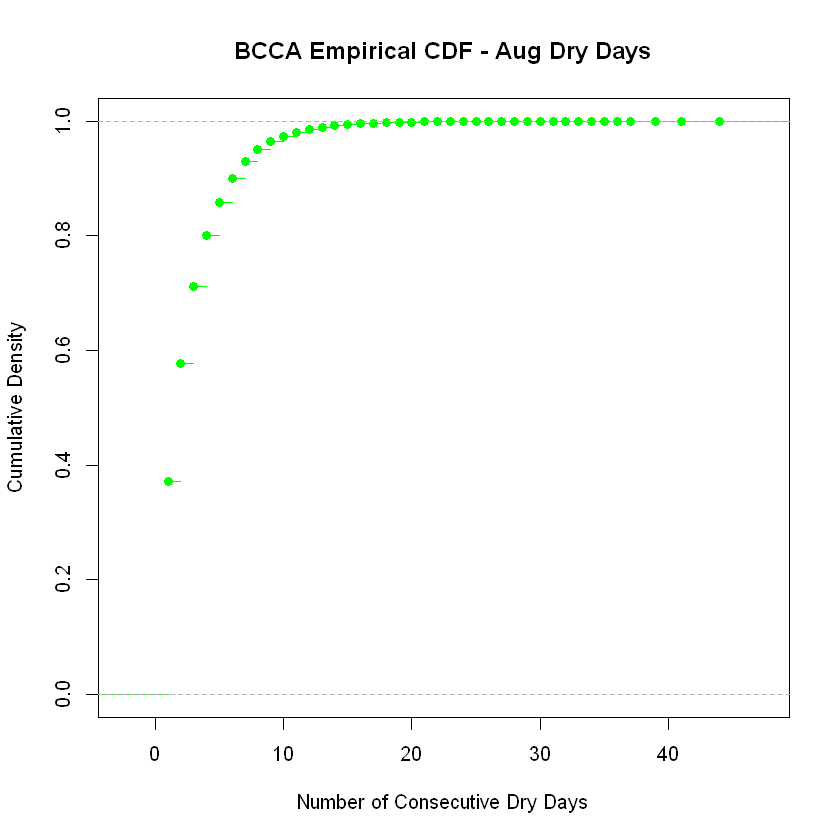

In [140]:
plot(ecdf(dBCAug$Dry_Count), main="BCCA Empirical CDF - Aug Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

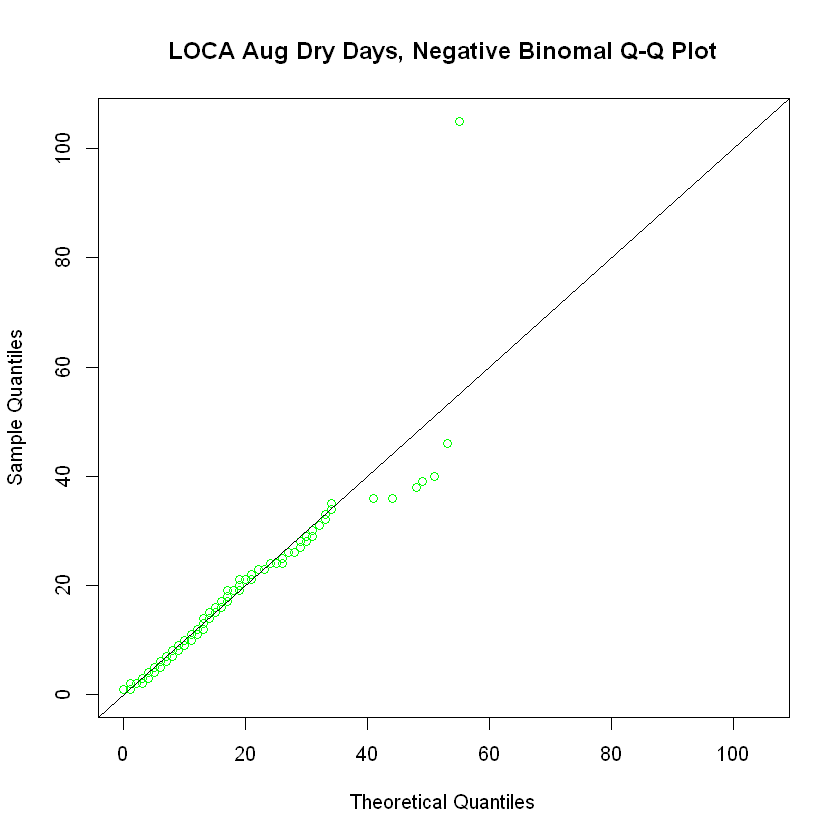

In [141]:
dLOAugMax <- max( dLOAug$Dry_Count )
dLOAugMean <- mean( dLOAug$Dry_Count )
dLOAugVar <- var( dLOAug$Dry_Count )
dLOAugBNr <- dLOAugMean^2 / (dLOAugVar - dLOAugMean)
dLOAugTstNB <- rnbinom( 1000, mu=dLOAugMean, size=dLOAugBNr )
qqplot( dLOAugTstNB, dLOAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Aug Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOAugMax), ylim=c(0,dLOAugMax) )
abline( 0, 1)

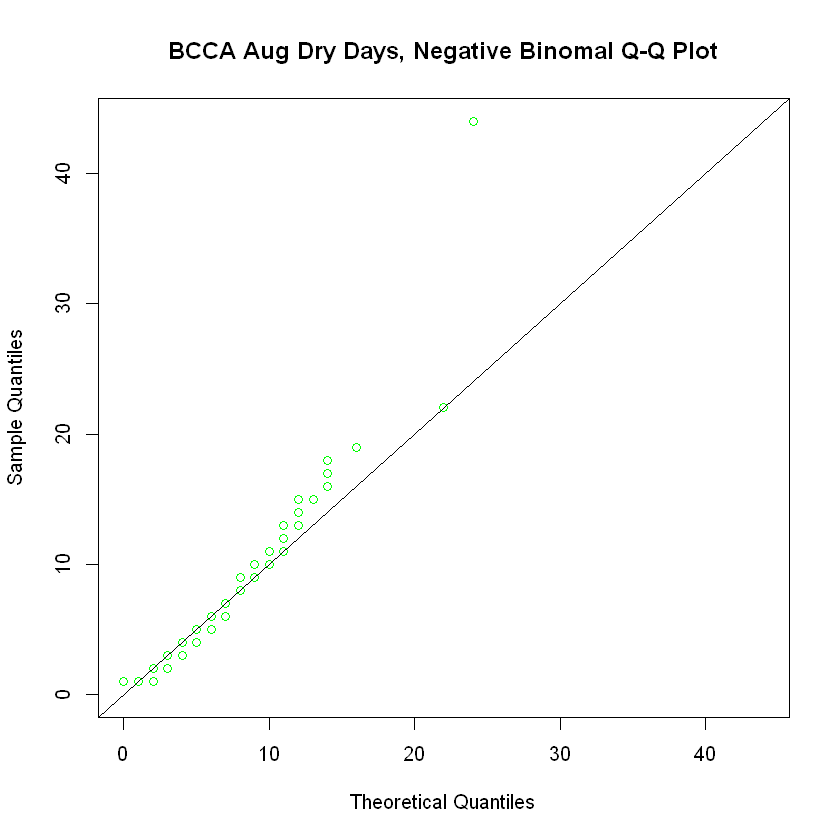

In [142]:
dBCAugMax <- max( dBCAug$Dry_Count )
dBCAugMean <- mean( dBCAug$Dry_Count )
dBCAugVar <- var( dBCAug$Dry_Count )
dBCAugBNr <- dBCAugMean^2 / (dBCAugVar - dBCAugMean)
dBCAugTstNB <- rnbinom( 1000, mu=dBCAugMean, size=dBCAugBNr )
qqplot( dBCAugTstNB, dBCAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Aug Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCAugMax), ylim=c(0,dBCAugMax) )
abline( 0, 1)

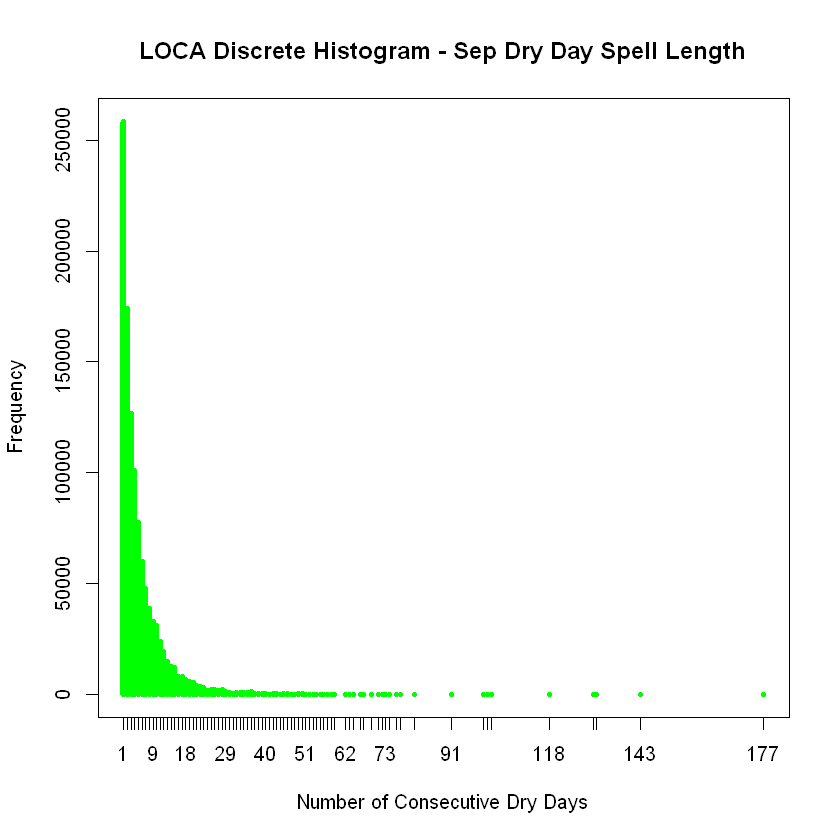

In [143]:
# our case is discrete so use this command
plot( table( dLOSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Sep Dry Day Spell Length", 
      col="green" )

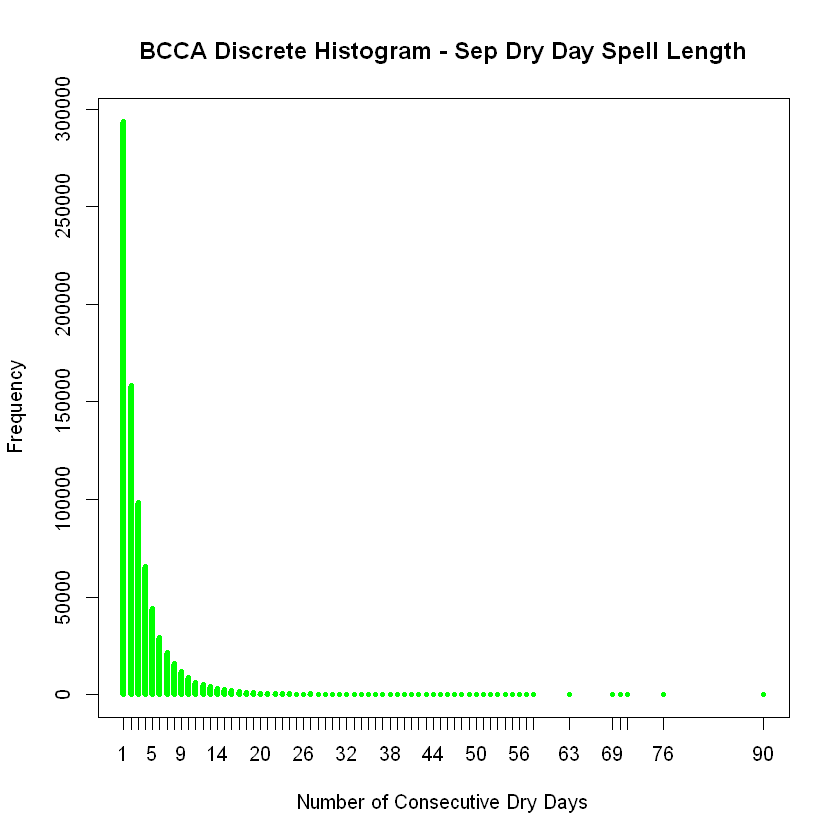

In [144]:
plot( table( dBCSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Sep Dry Day Spell Length", 
      col="green" )

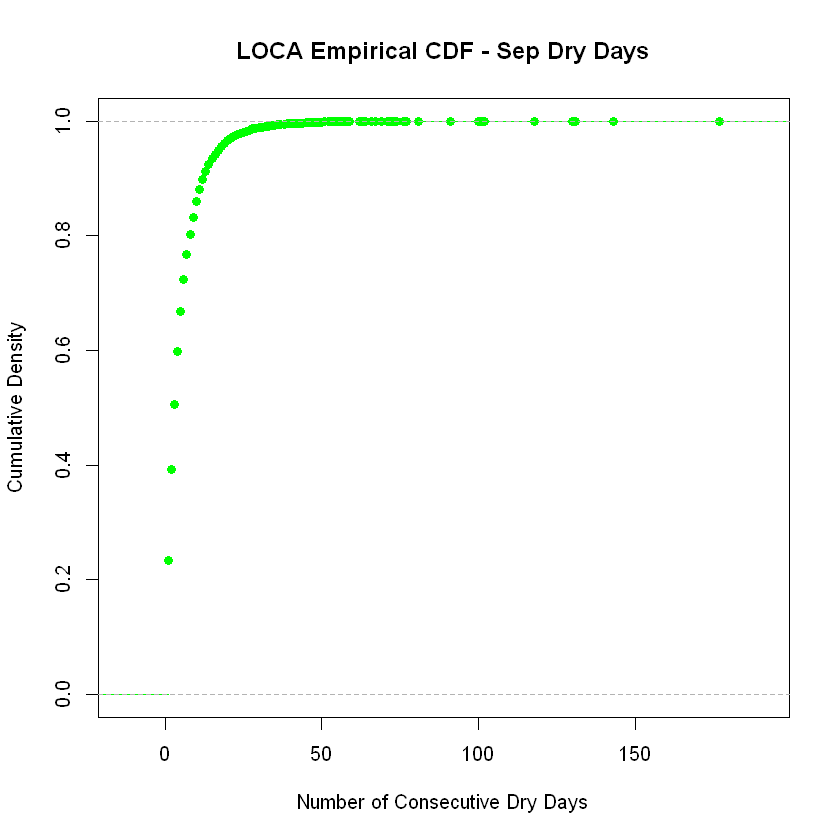

In [145]:
plot(ecdf(dLOSep$Dry_Count), main="LOCA Empirical CDF - Sep Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

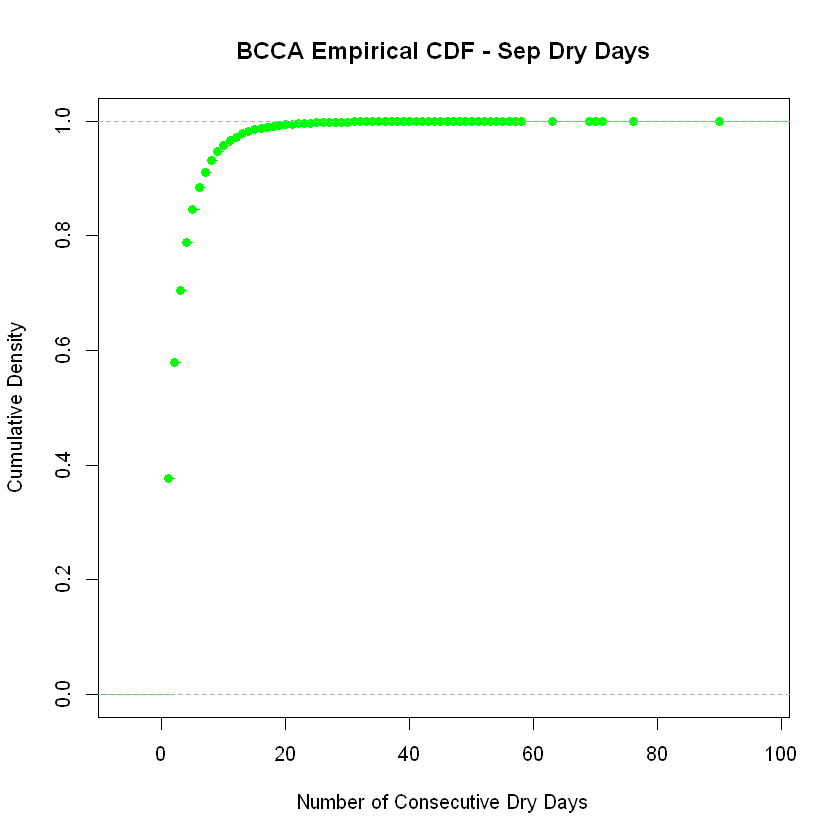

In [146]:
plot(ecdf(dBCSep$Dry_Count), main="BCCA Empirical CDF - Sep Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

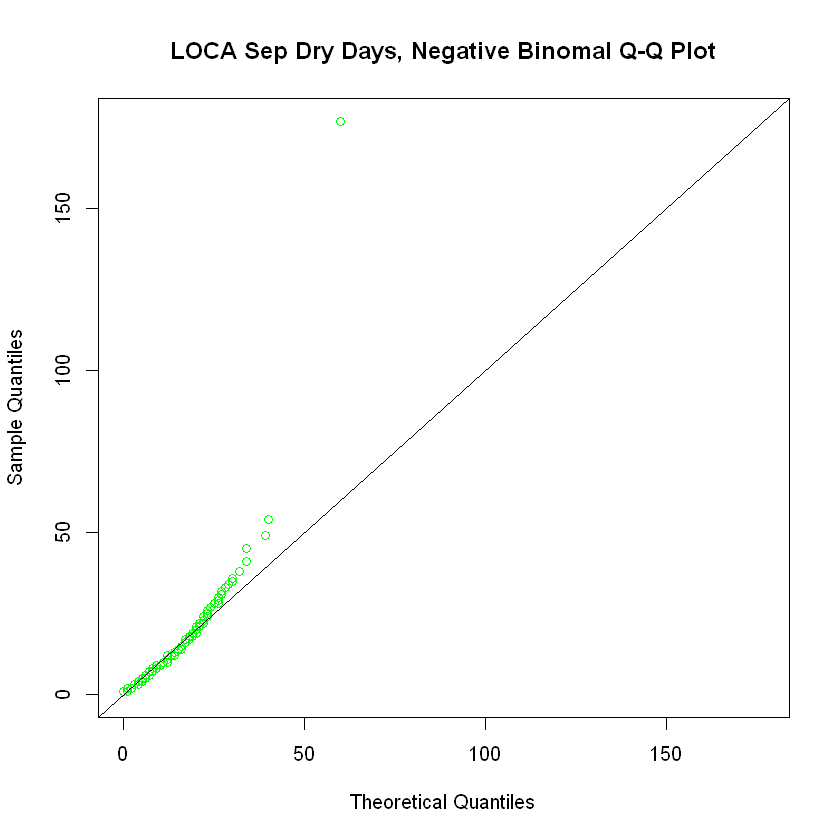

In [147]:
dLOSepMax <- max( dLOSep$Dry_Count )
dLOSepMean <- mean( dLOSep$Dry_Count )
dLOSepVar <- var( dLOSep$Dry_Count )
dLOSepBNr <- dLOSepMean^2 / (dLOSepVar - dLOSepMean)
dLOSepTstNB <- rnbinom( 1000, mu=dLOSepMean, size=dLOSepBNr )
qqplot( dLOSepTstNB, dLOSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Sep Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOSepMax), ylim=c(0,dLOSepMax) )
abline( 0, 1)

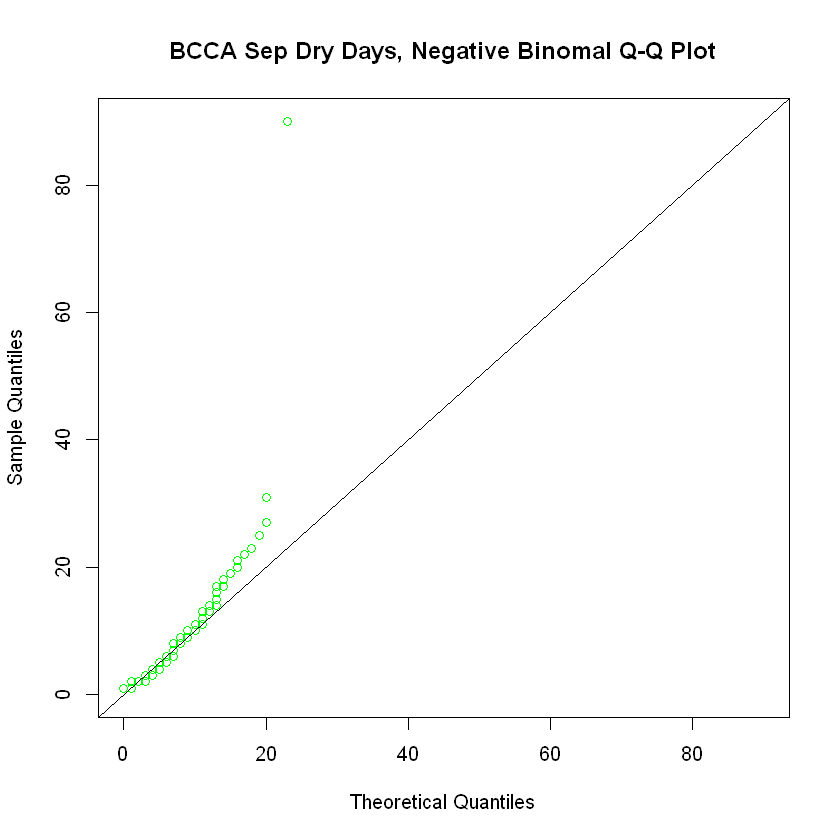

In [148]:
dBCSepMax <- max( dBCSep$Dry_Count )
dBCSepMean <- mean( dBCSep$Dry_Count )
dBCSepVar <- var( dBCSep$Dry_Count )
dBCSepBNr <- dBCSepMean^2 / (dBCSepVar - dBCSepMean)
dBCSepTstNB <- rnbinom( 1000, mu=dBCSepMean, size=dBCSepBNr )
qqplot( dBCSepTstNB, dBCSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Sep Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCSepMax), ylim=c(0,dBCSepMax) )
abline( 0, 1)

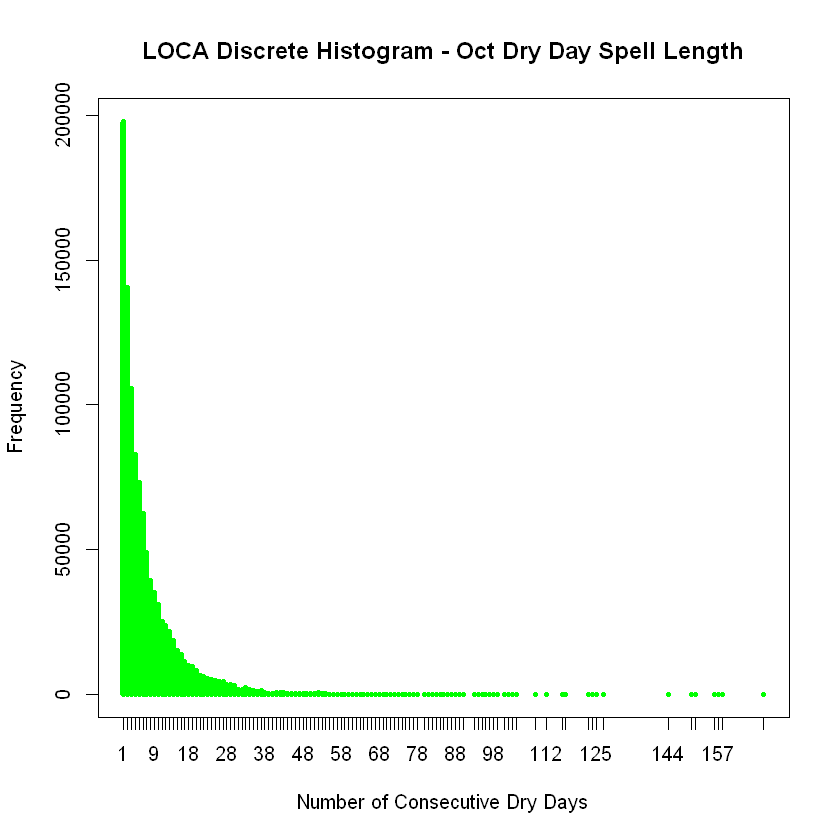

In [149]:
# our case is discrete so use this command
plot( table( dLOOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Oct Dry Day Spell Length", 
      col="green" )

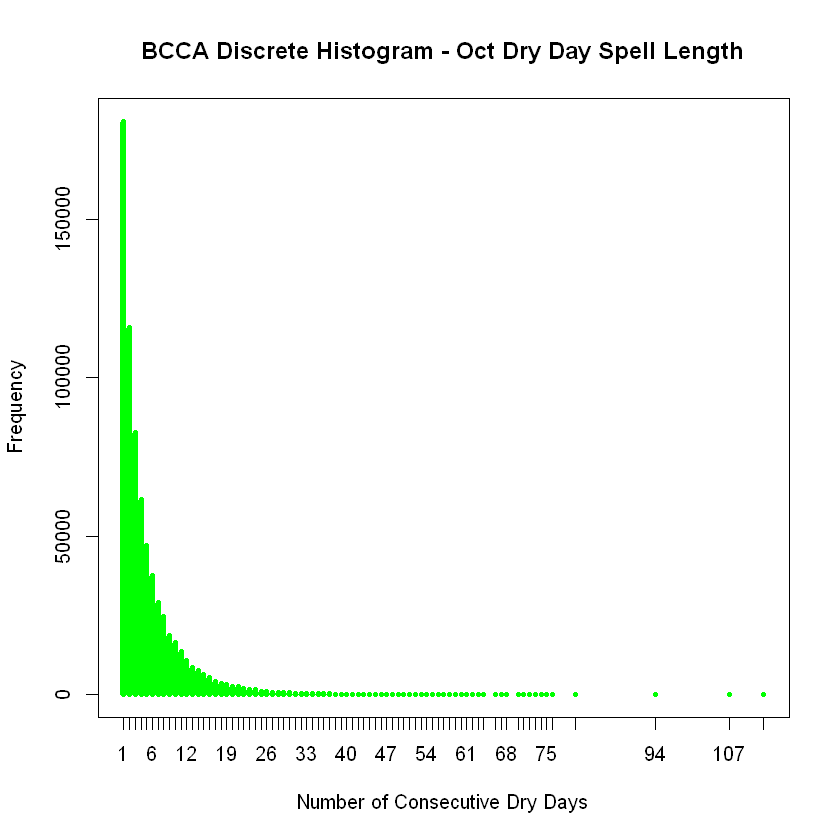

In [150]:
plot( table( dBCOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Oct Dry Day Spell Length", 
      col="green" )

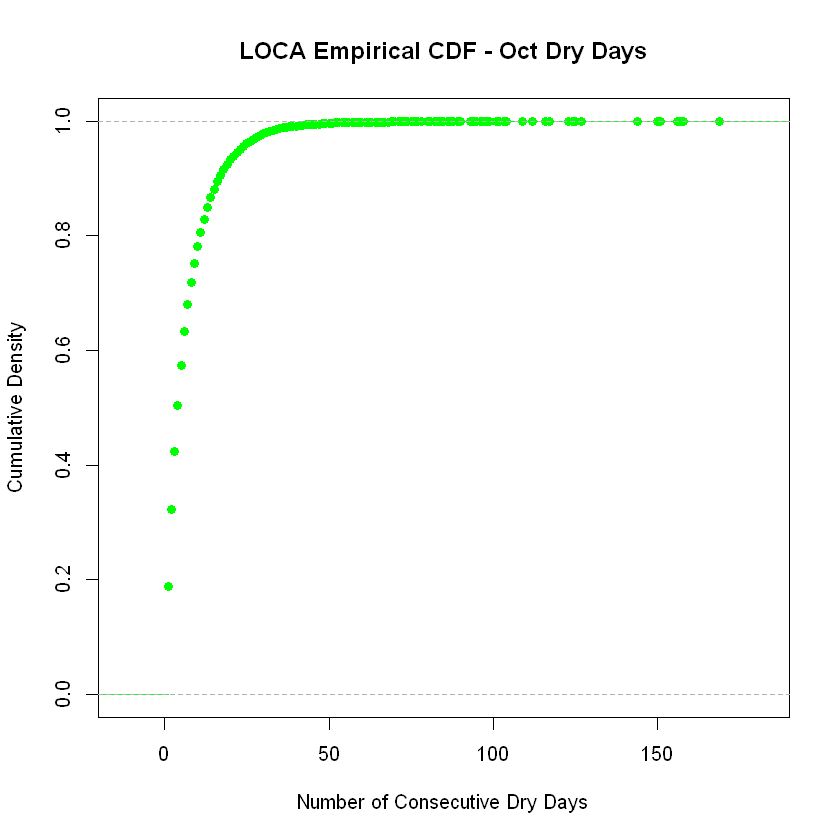

In [151]:
plot(ecdf(dLOOct$Dry_Count), main="LOCA Empirical CDF - Oct Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

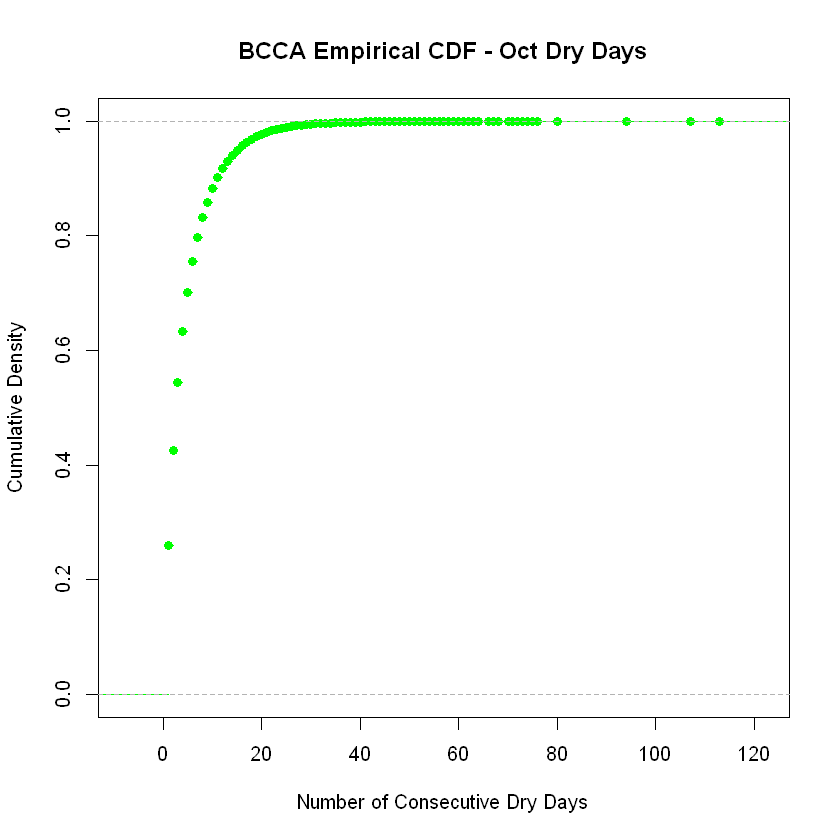

In [152]:
plot(ecdf(dBCOct$Dry_Count), main="BCCA Empirical CDF - Oct Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

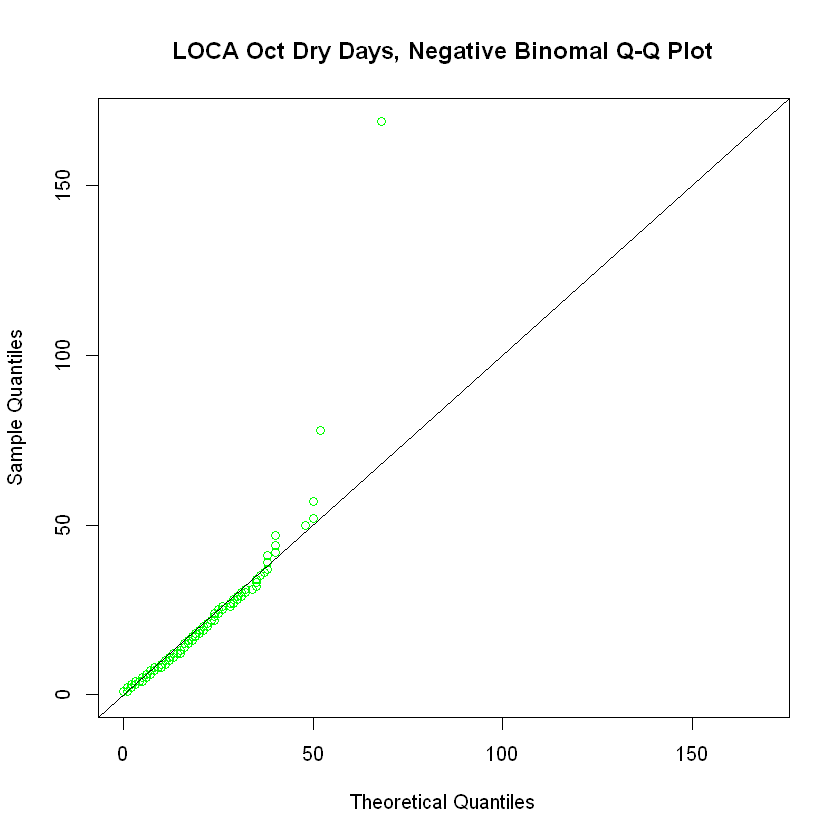

In [153]:
dLOOctMax <- max( dLOOct$Dry_Count )
dLOOctMean <- mean( dLOOct$Dry_Count )
dLOOctVar <- var( dLOOct$Dry_Count )
dLOOctBNr <- dLOOctMean^2 / (dLOOctVar - dLOOctMean)
dLOOctTstNB <- rnbinom( 1000, mu=dLOOctMean, size=dLOOctBNr )
qqplot( dLOOctTstNB, dLOOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Oct Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOOctMax), ylim=c(0,dLOOctMax) )
abline( 0, 1)

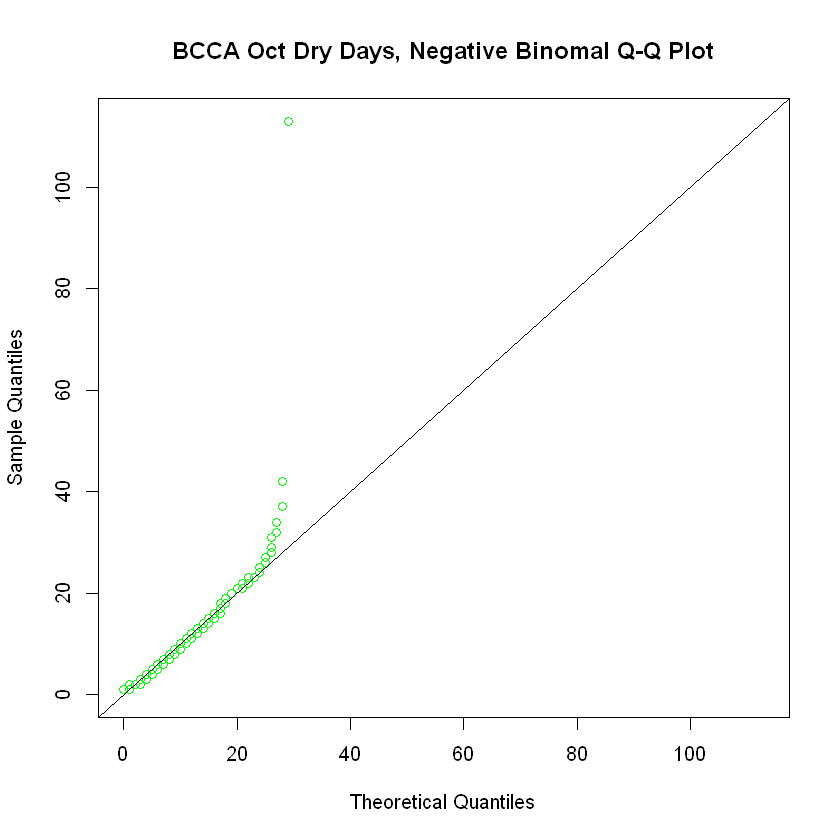

In [154]:
dBCOctMax <- max( dBCOct$Dry_Count )
dBCOctMean <- mean( dBCOct$Dry_Count )
dBCOctVar <- var( dBCOct$Dry_Count )
dBCOctBNr <- dBCOctMean^2 / (dBCOctVar - dBCOctMean)
dBCOctTstNB <- rnbinom( 1000, mu=dBCOctMean, size=dBCOctBNr )
qqplot( dBCOctTstNB, dBCOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Oct Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCOctMax), ylim=c(0,dBCOctMax) )
abline( 0, 1)

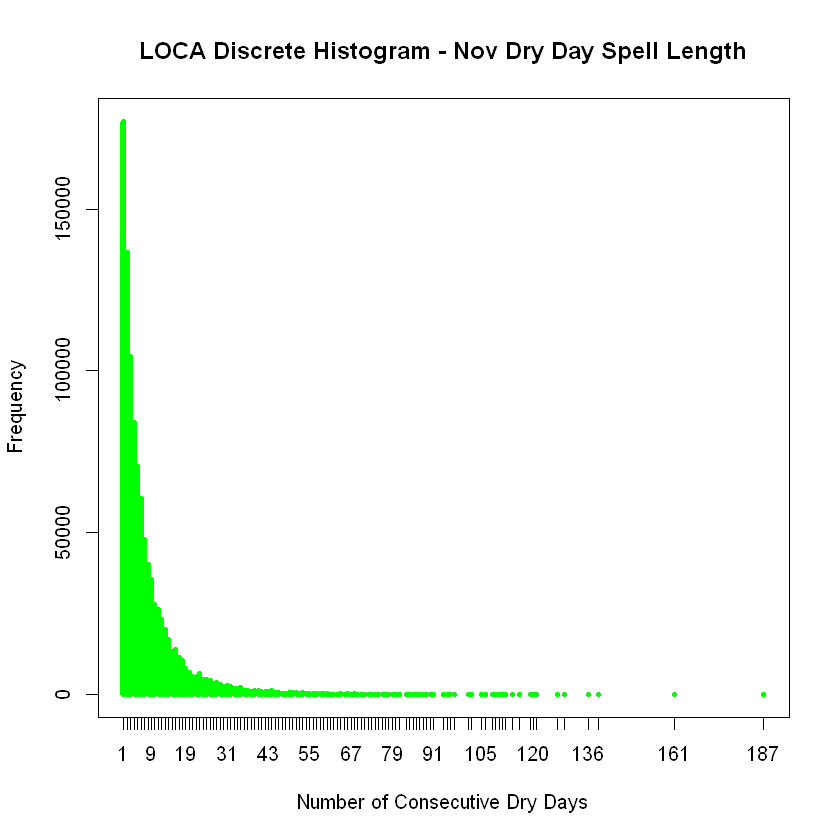

In [155]:
# our case is discrete so use this command
plot( table( dLONov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Nov Dry Day Spell Length", 
      col="green" )

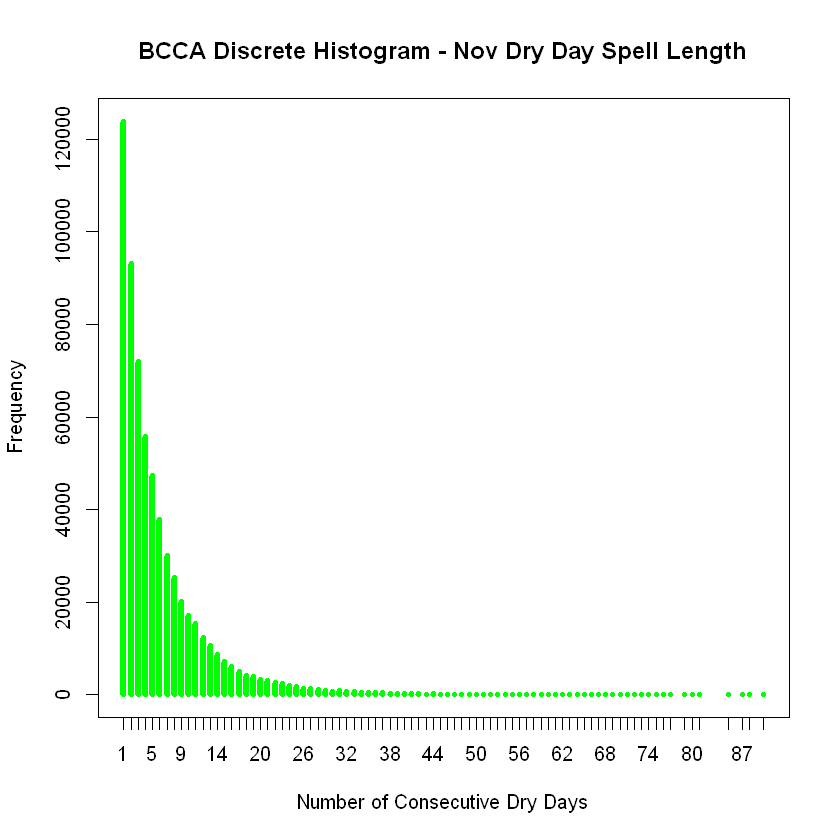

In [156]:
plot( table( dBCNov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Nov Dry Day Spell Length", 
      col="green" )

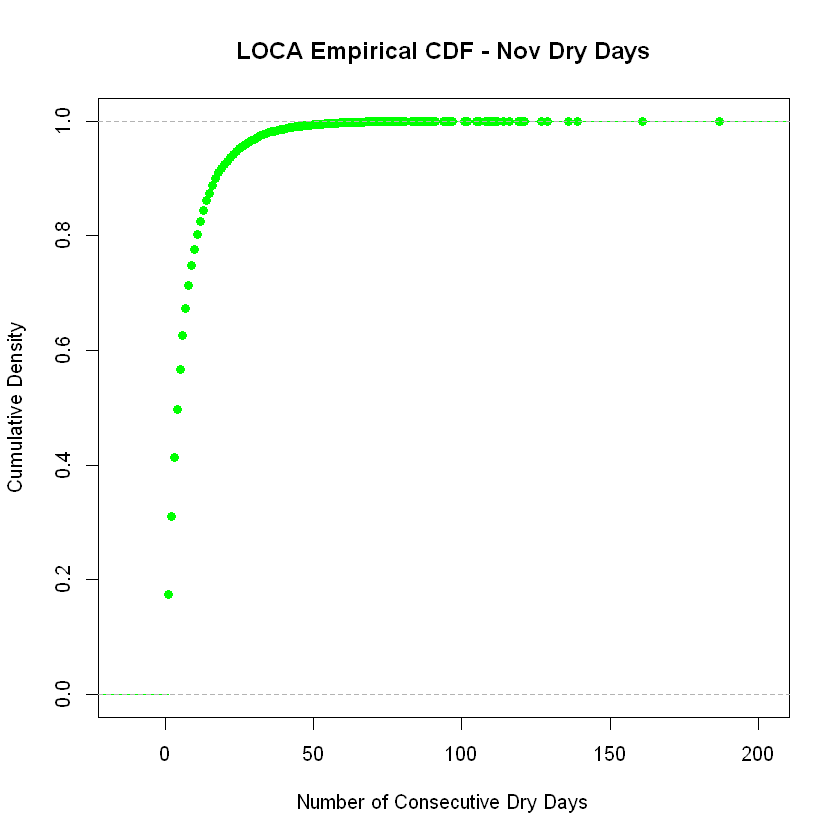

In [157]:
plot(ecdf(dLONov$Dry_Count), main="LOCA Empirical CDF - Nov Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

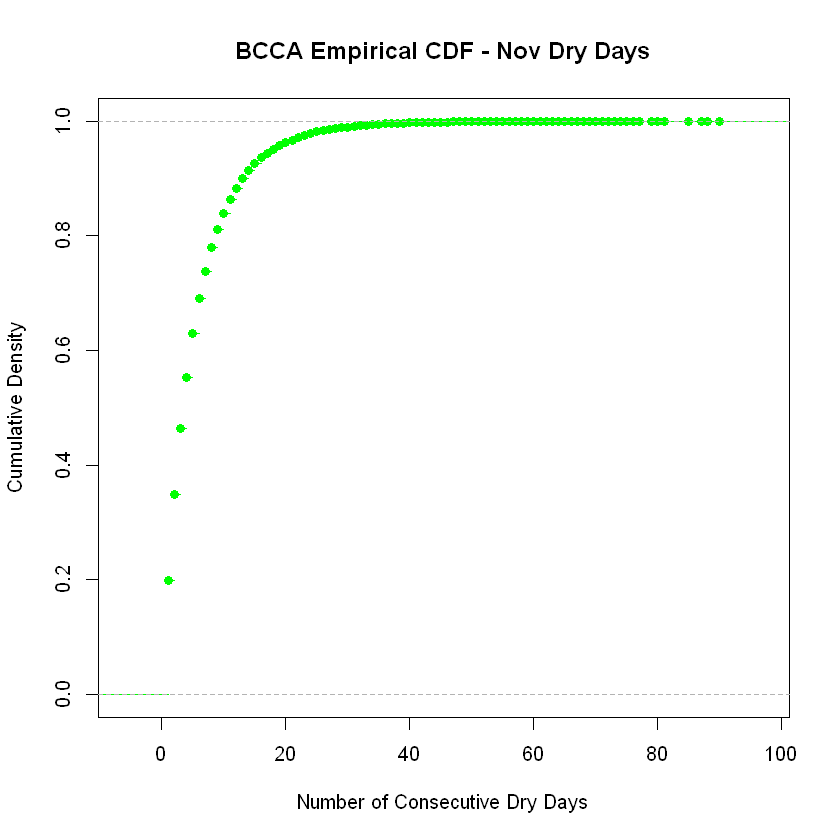

In [158]:
plot(ecdf(dBCNov$Dry_Count), main="BCCA Empirical CDF - Nov Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

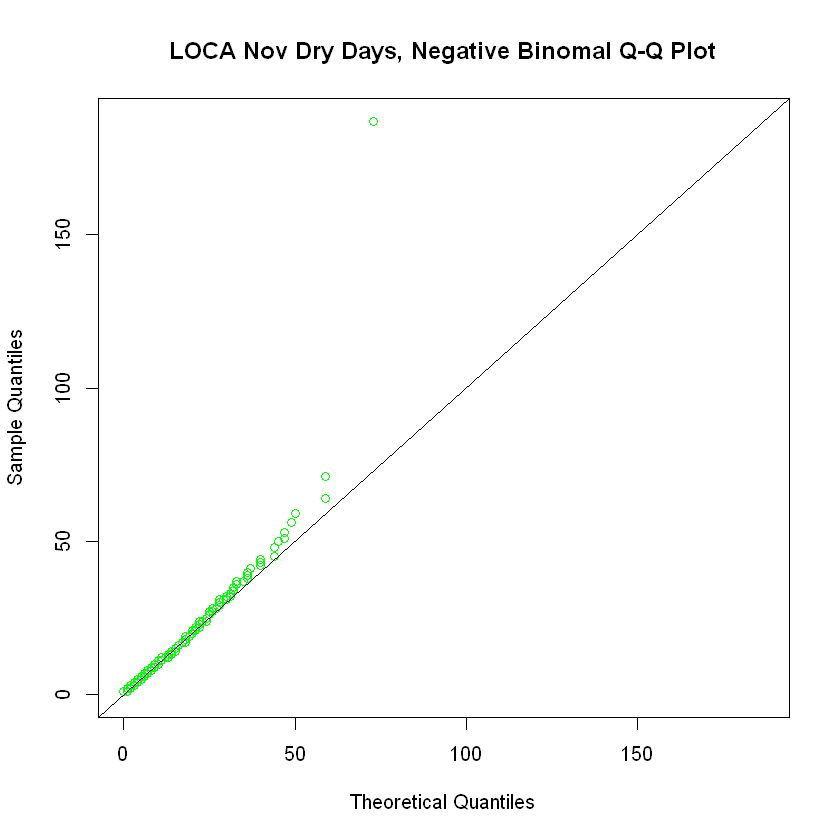

In [159]:
dLONovMax <- max( dLONov$Dry_Count )
dLONovMean <- mean( dLONov$Dry_Count )
dLONovVar <- var( dLONov$Dry_Count )
dLONovBNr <- dLONovMean^2 / (dLONovVar - dLONovMean)
dLONovTstNB <- rnbinom( 1000, mu=dLONovMean, size=dLONovBNr )
qqplot( dLONovTstNB, dLONov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Nov Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLONovMax), ylim=c(0,dLONovMax) )
abline( 0, 1)

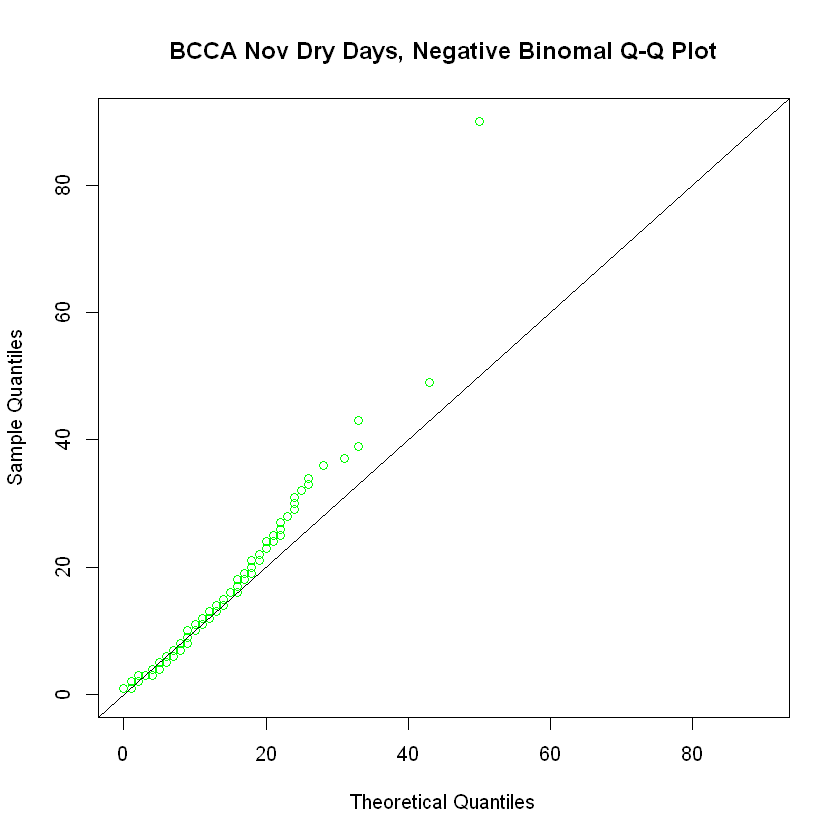

In [160]:
dBCNovMax <- max( dBCNov$Dry_Count )
dBCNovMean <- mean( dBCNov$Dry_Count )
dBCNovVar <- var( dBCNov$Dry_Count )
dBCNovBNr <- dBCNovMean^2 / (dBCNovVar - dBCNovMean)
dBCNovTstNB <- rnbinom( 1000, mu=dBCNovMean, size=dBCNovBNr )
qqplot( dBCNovTstNB, dBCNov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Nov Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCNovMax), ylim=c(0,dBCNovMax) )
abline( 0, 1)

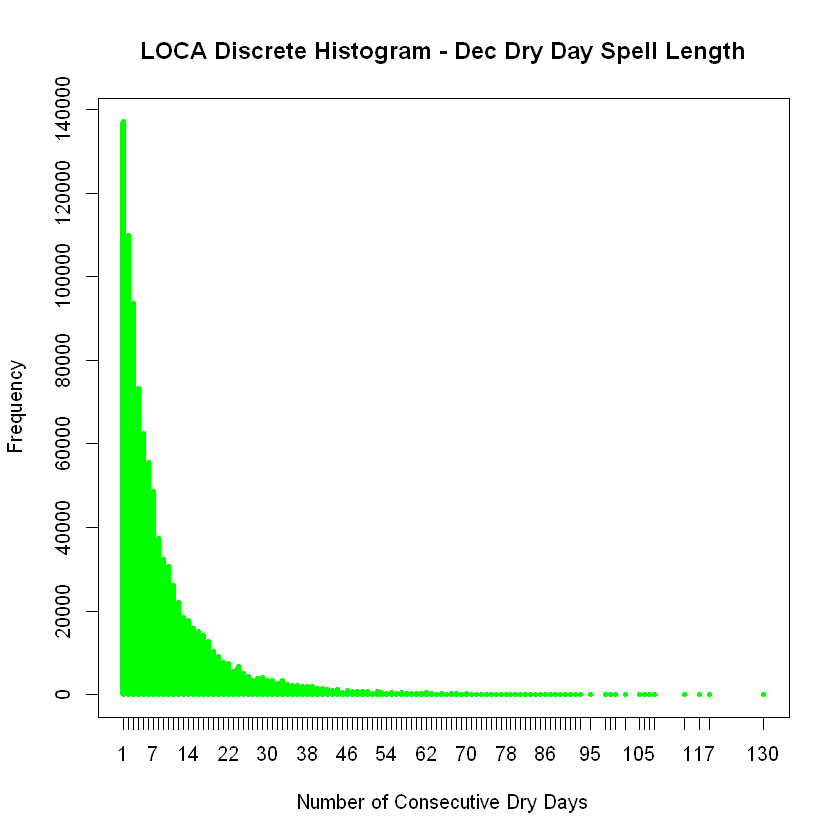

In [161]:
# our case is discrete so use this command
plot( table( dLODec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Dec Dry Day Spell Length", 
      col="green" )

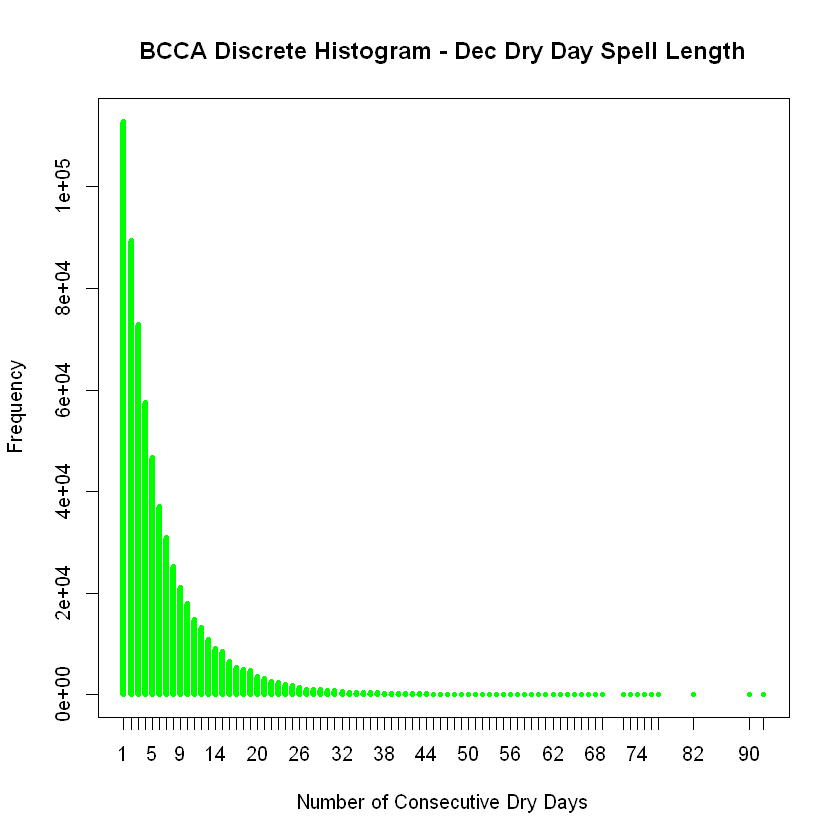

In [162]:
plot( table( dBCDec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Dec Dry Day Spell Length", 
      col="green" )

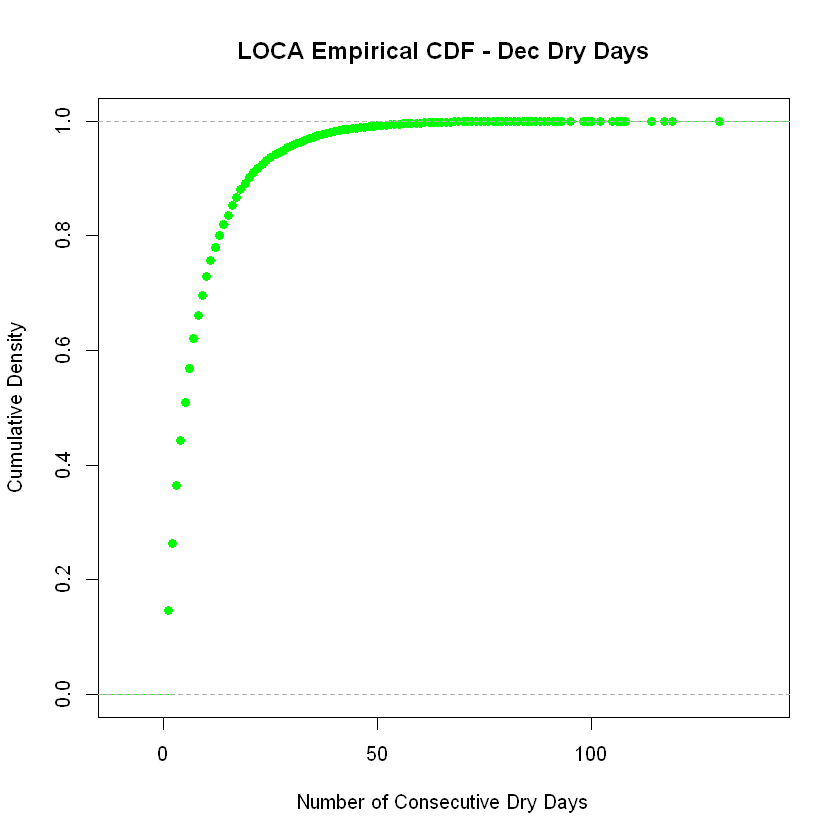

In [163]:
plot(ecdf(dLODec$Dry_Count), main="LOCA Empirical CDF - Dec Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

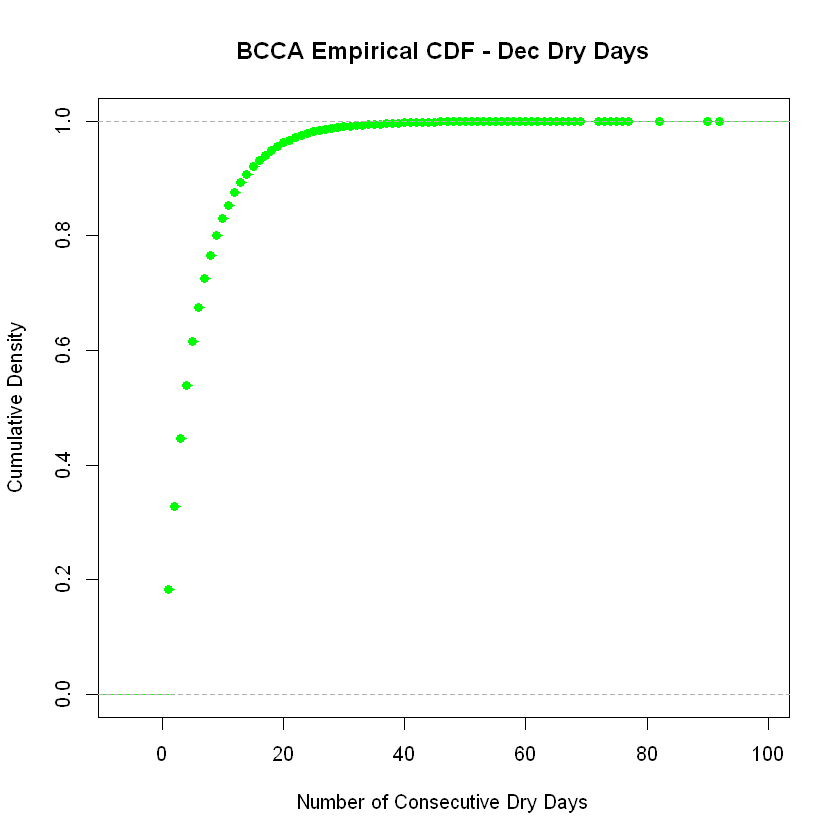

In [164]:
plot(ecdf(dBCDec$Dry_Count), main="BCCA Empirical CDF - Dec Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

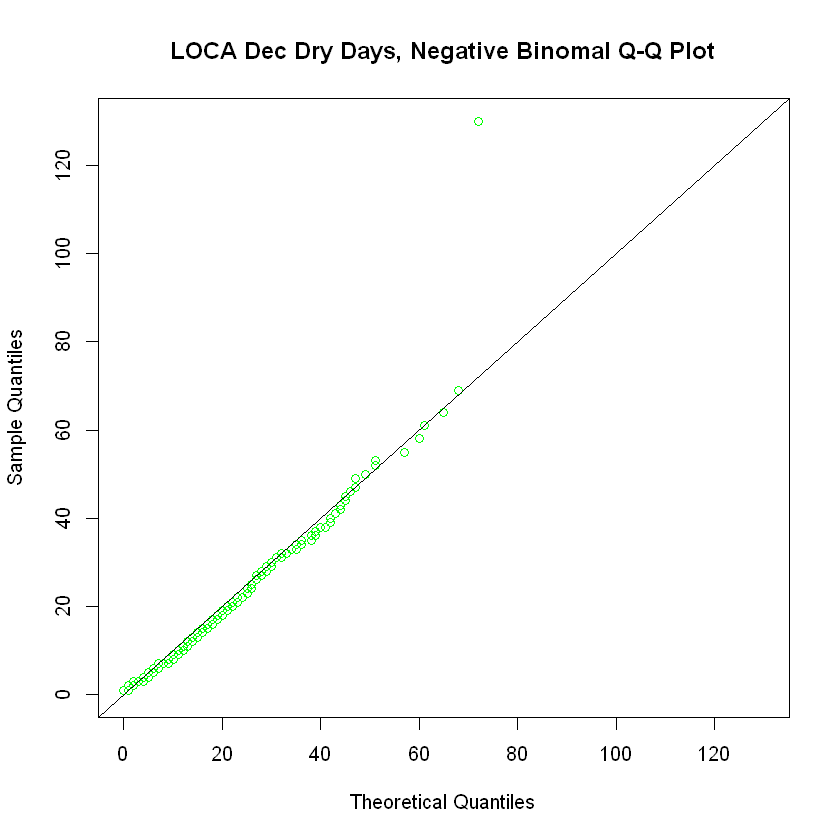

In [165]:
dLODecMax <- max( dLODec$Dry_Count )
dLODecMean <- mean( dLODec$Dry_Count )
dLODecVar <- var( dLODec$Dry_Count )
dLODecBNr <- dLODecMean^2 / (dLODecVar - dLODecMean)
dLODecTstNB <- rnbinom( 1000, mu=dLODecMean, size=dLODecBNr )
qqplot( dLODecTstNB, dLODec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Dec Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLODecMax), ylim=c(0,dLODecMax) )
abline( 0, 1)

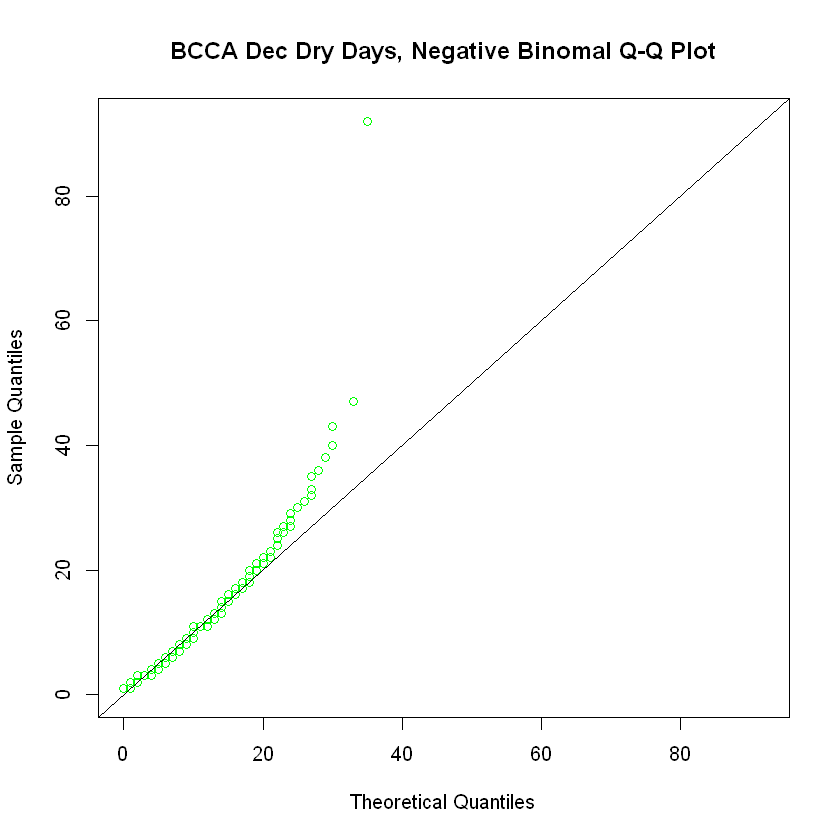

In [166]:
dBCDecMax <- max( dBCDec$Dry_Count )
dBCDecMean <- mean( dBCDec$Dry_Count )
dBCDecVar <- var( dBCDec$Dry_Count )
dBCDecBNr <- dBCDecMean^2 / (dBCDecVar - dBCDecMean)
dBCDecTstNB <- rnbinom( 1000, mu=dBCDecMean, size=dBCDecBNr )
qqplot( dBCDecTstNB, dBCDec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Dec Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCDecMax), ylim=c(0,dBCDecMax) )
abline( 0, 1)

In [167]:
cat("LOCA Jan scale: ", dLOJanBNr, "\n", "LOCA Feb scale: ", dLOFebBNr, "\n",
    "LOCA Mar scale: ", dLOMarBNr, "\n", "LOCA Apr scale: ", dLOAprBNr, "\n",
    "LOCA May scale: ", dLOMayBNr, "\n", "LOCA Jun scale: ", dLOJunBNr, "\n",
    "LOCA Jul scale: ", dLOJulBNr, "\n", "LOCA Aug scale: ", dLOAugBNr, "\n",
    "LOCA Sep scale: ", dLOSepBNr, "\n", "LOCA Oct scale: ", dLOOctBNr, "\n",
    "LOCA Nov scale: ", dLONovBNr, "\n", "LOCA Dec scale: ", dLODecBNr, "\n" )

LOCA Jan scale:  1.047594 
 LOCA Feb scale:  0.9142459 
 LOCA Mar scale:  1.17758 
 LOCA Apr scale:  1.322974 
 LOCA May scale:  0.9856597 
 LOCA Jun scale:  0.6640679 
 LOCA Jul scale:  0.8333414 
 LOCA Aug scale:  1.161008 
 LOCA Sep scale:  0.8774293 
 LOCA Oct scale:  0.8232807 
 LOCA Nov scale:  0.7835556 
 LOCA Dec scale:  0.883599 


In [168]:
cat("BCCA Jan scale: ", dBCJanBNr, "\n", "BCCA Feb scale: ", dBCFebBNr, "\n",
    "BCCA Mar scale: ", dBCMarBNr, "\n", "BCCA Apr scale: ", dBCAprBNr, "\n",
    "BCCA May scale: ", dBCMayBNr, "\n", "BCCA Jun scale: ", dBCJunBNr, "\n",
    "BCCA Jul scale: ", dBCJulBNr, "\n", "BCCA Aug scale: ", dBCAugBNr, "\n",
    "BCCA Sep scale: ", dBCSepBNr, "\n", "BCCA Oct scale: ", dBCOctBNr, "\n",
    "BCCA Nov scale: ", dBCNovBNr, "\n", "BCCA Dec scale: ", dBCDecBNr, "\n" )

BCCA Jan scale:  1.27709 
 BCCA Feb scale:  1.343605 
 BCCA Mar scale:  1.489611 
 BCCA Apr scale:  1.770871 
 BCCA May scale:  1.990622 
 BCCA Jun scale:  1.458378 
 BCCA Jul scale:  1.558998 
 BCCA Aug scale:  1.978162 
 BCCA Sep scale:  1.168163 
 BCCA Oct scale:  1.041018 
 BCCA Nov scale:  1.069253 
 BCCA Dec scale:  1.138252 


### Fitting Negative Binomial Distributions

Use the **fitdistrplus** package for distribution fitting. This also provides the *plotdist* function which provides a pair of plots: 

1. empirical density, or a histogram
2. empirical cumulative distribution

These plots were provided above from scratch. **fitdistrplus** also provides a *descdist* function that provides classical descriptive statistics for the sample.

Distributions are then fit using a Maximum Likelihood Estimation (MLE) estimator in the *fitdist* function. Then goodness-of-fit statistics are calculated using the *gofstat* function.

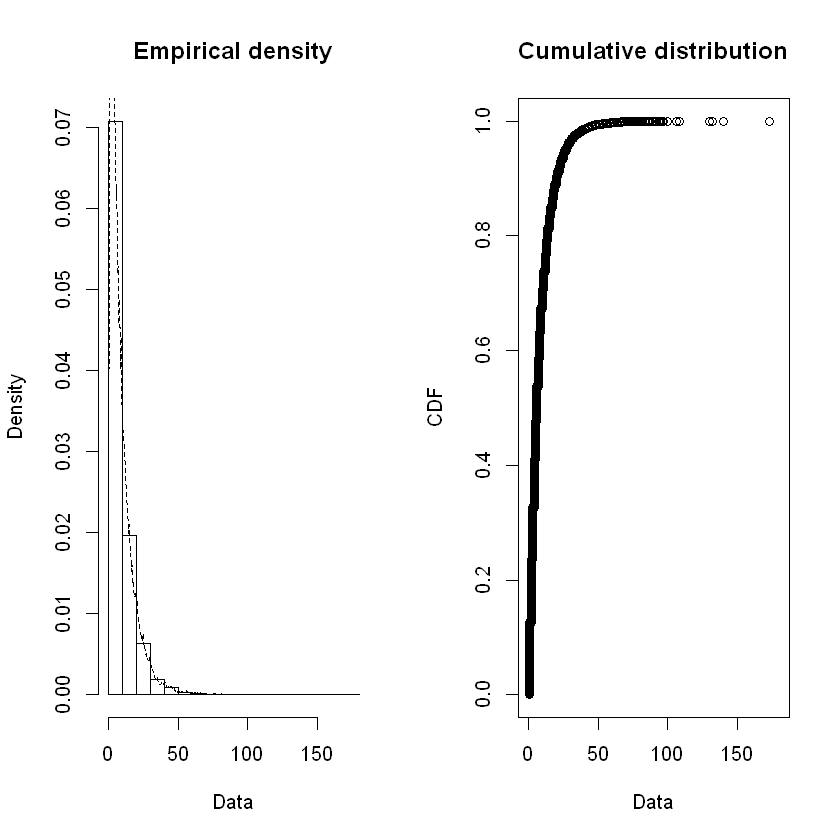

In [169]:
plotdist( dLOJan$Dry_Count, histo=TRUE, demp=TRUE )

In [170]:
LOfd_NB_dJan <- fitdist( dLOJan$Dry_Count, "nbinom" )
LOfd_GE_dJan <- fitdist( dLOJan$Dry_Count, "geom" )

In [171]:
summary( LOfd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.397904 0.002336994
mu   8.869891 0.008674900
Loglikelihood:  -2782376   AIC:  5564756   BIC:  5564779 
Correlation matrix:
             size           mu
size 1.0000000000 0.0001328942
mu   0.0001328942 1.0000000000


In [172]:
LOfdNB_dJan_size <- LOfd_NB_dJan$estimate[["size"]]
LOfdNB_dJan_mu <- LOfd_NB_dJan$estimate[["mu"]]
cat("LOCA Jan size: ", LOfdNB_dJan_size, "\n", "LOCA Jan mu: ", LOfdNB_dJan_mu, "\n")

LOCA Jan size:  1.397904 
 LOCA Jan mu:  8.869891 


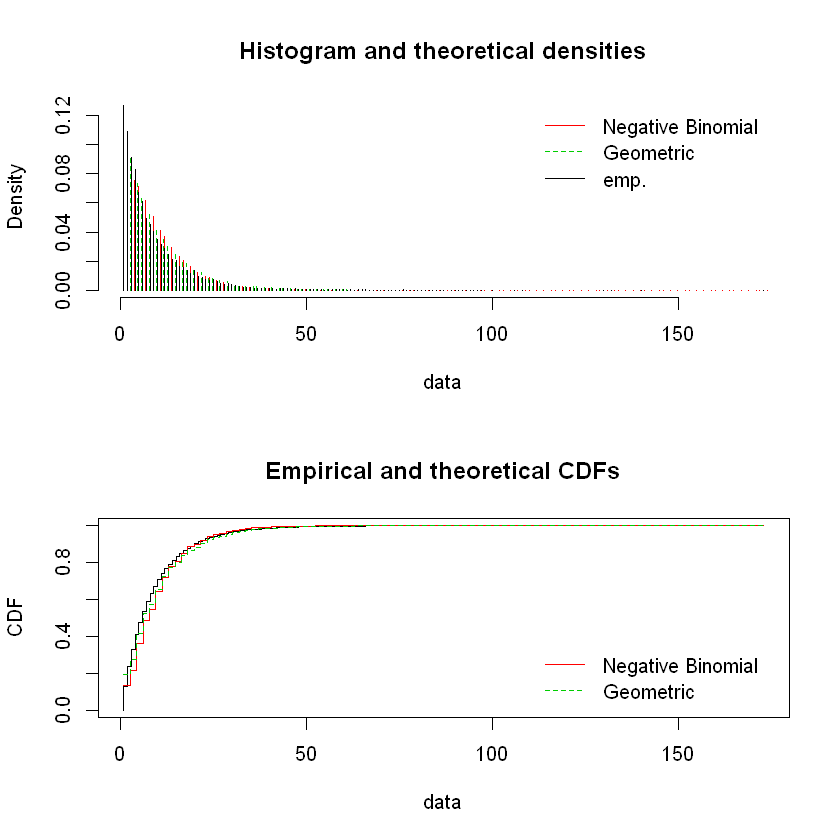

In [173]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJan, LOfd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJan, LOfd_GE_dJan), legendtext=plot.legend )

In [174]:
LOstatRes <- gofstat( list(LOfd_NB_dJan, LOfd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [175]:
print(LOstatRes)

Chi-squared statistic:  41948.87 39728.89 
Degree of freedom of the Chi-squared distribution:  38 39 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     109700            117665.5322     166503.287
<= 2      94679             66664.2324      70825.318
<= 3      78952             65226.4688      63650.002
<= 4      71525             61951.3454      57201.617
<= 5      58018             57775.9384      51406.519
<= 6      52540             53219.9649      46198.522
<= 7      42867             48587.6996      41518.147
<= 8      39004             44060.3920      37311.942
<= 9      35129             39744.5834      33531.867
<= 10     29931             35699.7231      30134.752
<= 11     27181             31954.9579      27081.799
<= 12     24566             28519.7928      24338.141
<= 13     21498             25391.0678      21872.443
<= 14     18154             22557.6209      19656.544
<= 15     17461             20003.4420    

In [176]:
LOfdNB_dJan_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

[Chi-Squared Test](https://www.r-bloggers.com/chi-squared-test/)

Like all statistical tests, chi-squared test assumes a null hypothesis and an alternate hypothesis. The general practice is, if the p-value that comes out in the result is less than a pre-determined significance level, which is 0.05 usually, then we reject the null hypothesis.

- H0: The The two variables are independent
- H1: The two variables are related.

The null hypothesis of the chi-squared test is that the two variables are independent and the alternate hypothesis is that they are related.

In this case our p-value is 0.0 and we can reject the null hypothesis that sample and MLE-fit distribution are not related.

In [177]:
LOfdNB_dJan_p = LOfdNB_dJan_size / (LOfdNB_dJan_size + LOfdNB_dJan_mu)
cat("LOCA prob: ", LOfdNB_dJan_p)

LOCA prob:  0.1361446

In [178]:
# add to our tracking dataframe
LOMonDistDF[1, ] <- list( 1, dLOJanMean, dLOJanBNr, LOfdNB_dJan_p, LOfdNB_dJan_mu, LOfdNB_dJan_size,
                          LOfdNB_dJan_pvalue )

In [179]:
LOgf_dJan <- goodfit( dLOJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJan_size, prob=LOfdNB_dJan_p) )

In [180]:
summary( LOgf_dJan )


	 Goodness-of-fit test for nbinomial distribution

                       X^2  df P(> X^2)
Pearson          1039002.4 173        0
Likelihood Ratio  168142.1 102        0


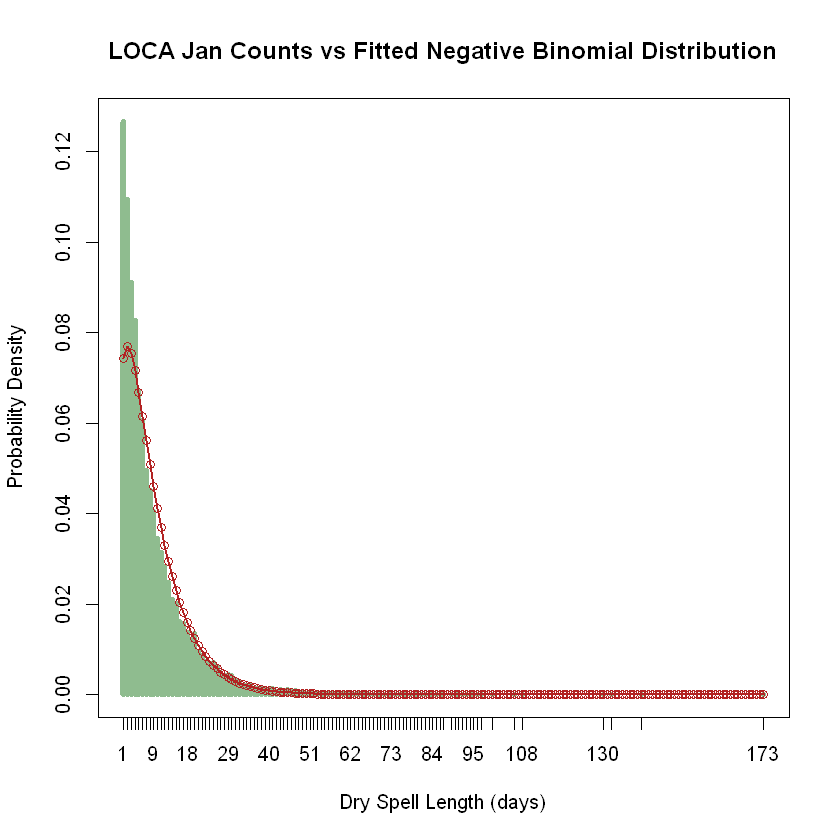

In [181]:
maxP <- max(dLOJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJan_size, mu=LOfdNB_dJan_mu )
ttab <- table( dLOJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

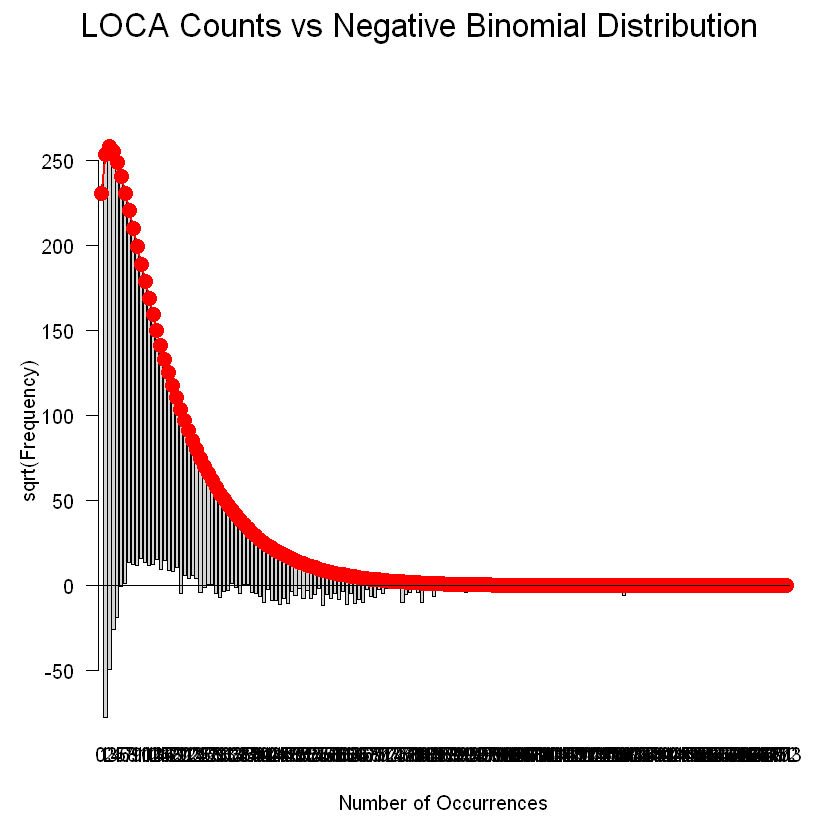

In [182]:
plot( LOgf_dJan, main="LOCA Counts vs Negative Binomial Distribution" )

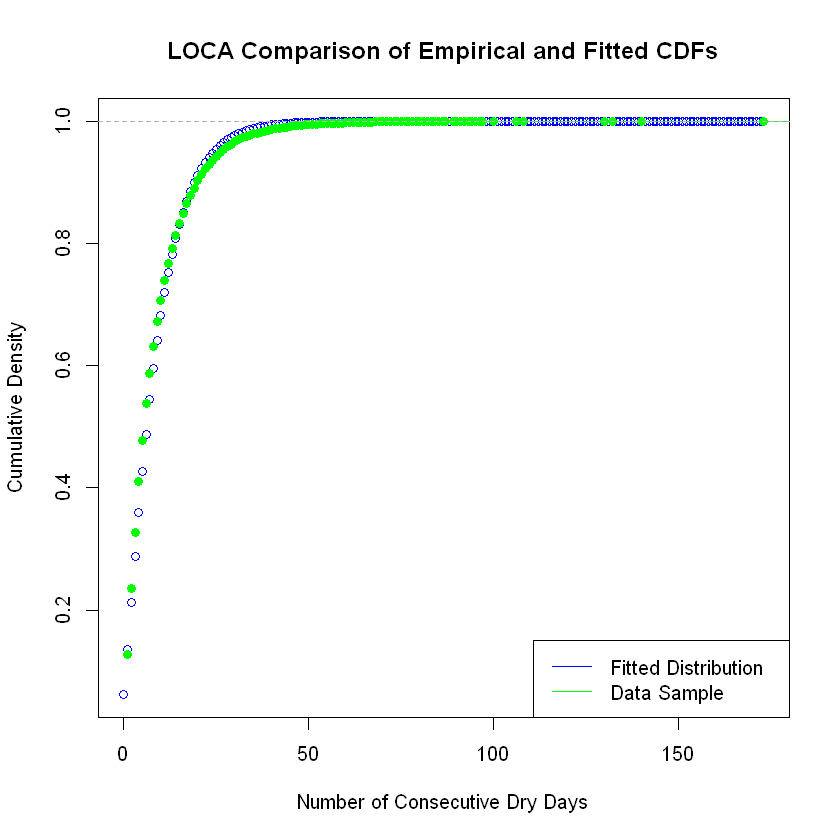

In [183]:
x <- seq(0,dLOJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJan_mu, size=LOfdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

In [184]:
ks.test( dLOJan$Dry_Count, "pnbinom", mu=LOfdNB_dJan_mu, size=LOfdNB_dJan_size )


	One-sample Kolmogorov-Smirnov test

data:  dLOJan$Dry_Count
D = 0.13594, p-value < 2.2e-16
alternative hypothesis: two-sided


Generally, K-S test is better for continuous distributions.

[Kolmogorv-Smirnov Test](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ks.test.html)

Null hypothesis that the true distribution function of x is equal to the hypothesized distribution function (one-sample case). This is a comparison of cumulative distribution functions, and the test statistic is the maximum difference in value, with the statistic in the "greater" alternative being D^+ = max[F_x(u) - F_y(u)]

Exact p-values are not available for the two-sample case if one-sided or in the presence of ties. If exact = NULL (the default), an exact p-value is computed if the sample size is less than 100 in the one-sample case and there are no ties, and if the product of the sample sizes is less than 10000 in the two-sample case. Otherwise, asymptotic distributions are used whose approximations may be inaccurate in small samples.

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In the one-sample case, the distribution considered under the null hypothesis may be continuous (see Section 2), purely discrete or mixed (see Section 2.2).

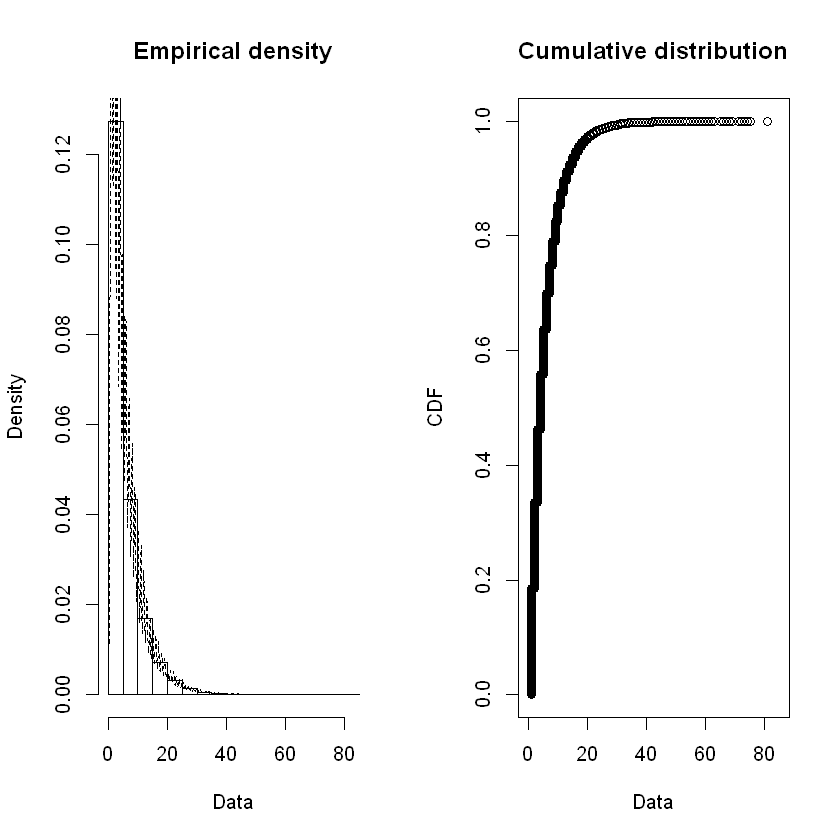

In [185]:
plotdist( dBCJan$Dry_Count, histo=TRUE, demp=TRUE )

In [186]:
BCfd_NB_dJan <- fitdist( dBCJan$Dry_Count, "nbinom" )
BCfd_GE_dJan <- fitdist( dBCJan$Dry_Count, "geom" )

In [187]:
summary( BCfd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.789059 0.003988598
mu   5.706342 0.006111045
Loglikelihood:  -1773177   AIC:  3546359   BIC:  3546381 
Correlation matrix:
             size           mu
size 1.0000000000 0.0001877255
mu   0.0001877255 1.0000000000


In [188]:
BCfdNB_dJan_size <- BCfd_NB_dJan$estimate[["size"]]
BCfdNB_dJan_mu <- BCfd_NB_dJan$estimate[["mu"]]
cat("BCCA Jan size: ", BCfdNB_dJan_size, "\n", "BCCA Jan mu: ", BCfdNB_dJan_mu, "\n")

BCCA Jan size:  1.789059 
 BCCA Jan mu:  5.706342 


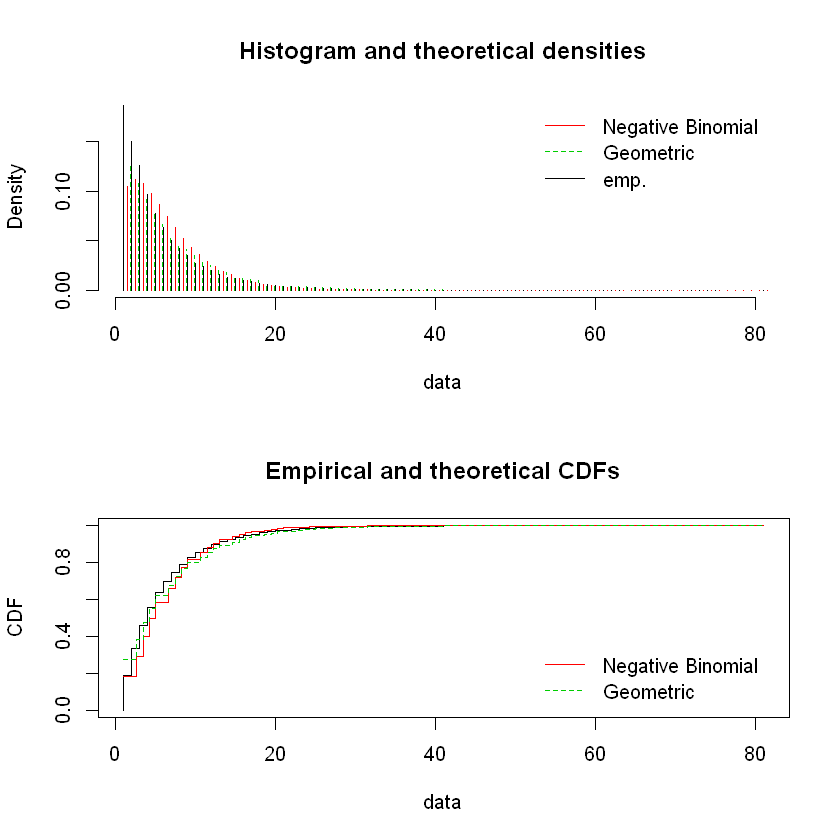

In [189]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJan, BCfd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJan, BCfd_GE_dJan), legendtext=plot.legend )

In [190]:
BCstatRes <- gofstat( list(BCfd_NB_dJan, BCfd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [191]:
print(BCstatRes)

Chi-squared statistic:  36785.92 44287.51 
Degree of freedom of the Chi-squared distribution:  25 26 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     119022            116518.0691     176628.388
<= 2      95868             71332.1752      69093.392
<= 3      80742             68589.6319      58791.736
<= 4      62029             62518.9350      50026.031
<= 5      49642             55107.7214      42567.272
<= 6      40308             47471.5817      36220.596
<= 7      31783             40214.5836      30820.193
<= 8      26787             33635.5778      26224.978
<= 9      22162             27852.2481      22314.897
<= 10     17451             22877.4045      18987.801
<= 11     15268             18666.2095      16156.766
<= 12     12746             15145.2488      13747.831
<= 13     10258             12230.1173      11698.063
<= 14      7971              9835.7178       9953.911
<= 15      7715              7881.9556    

In [192]:
BCfdNB_dJan_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [193]:
BCfdNB_dJan_p = BCfdNB_dJan_size / (BCfdNB_dJan_size + BCfdNB_dJan_mu)
cat("BCCA prob: ", BCfdNB_dJan_p)

BCCA prob:  0.2386875

In [194]:
# add to our tracking dataframe
BCMonDistDF[1, ] <- list( 1, dBCJanMean, dBCJanBNr, BCfdNB_dJan_p, BCfdNB_dJan_mu, BCfdNB_dJan_size,
                          BCfdNB_dJan_pvalue )

In [195]:
BCgf_dJan <- goodfit( dBCJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJan_size, prob=BCfdNB_dJan_p) )

In [196]:
summary( BCgf_dJan )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          167674.6 81        0
Likelihood Ratio 160564.5 73        0


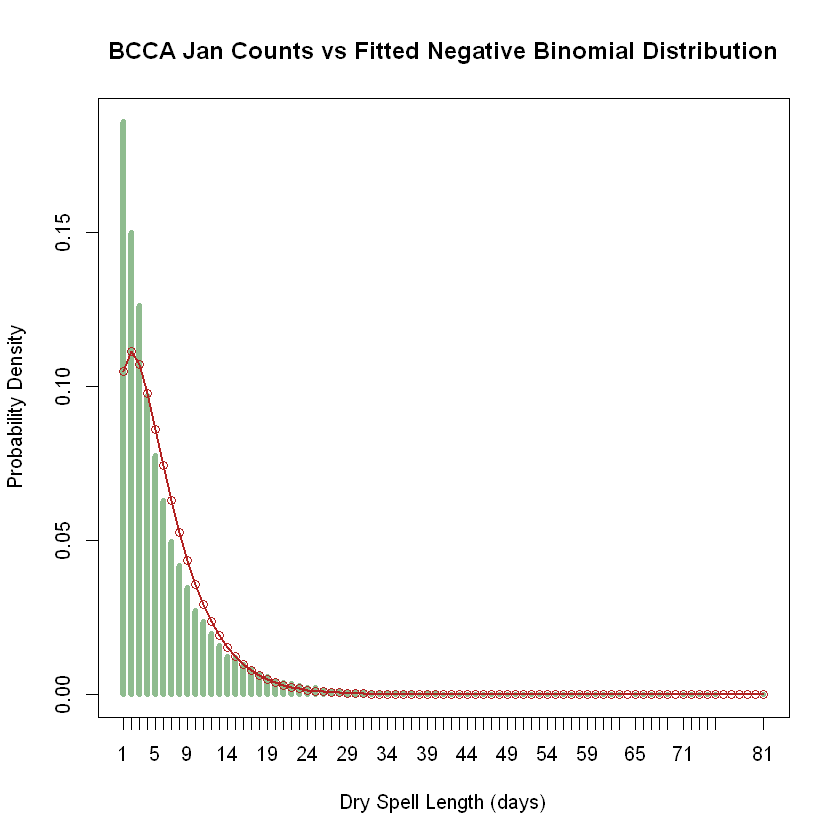

In [197]:
maxP <- max(dBCJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJan_size, mu=BCfdNB_dJan_mu )
ttab <- table( dBCJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

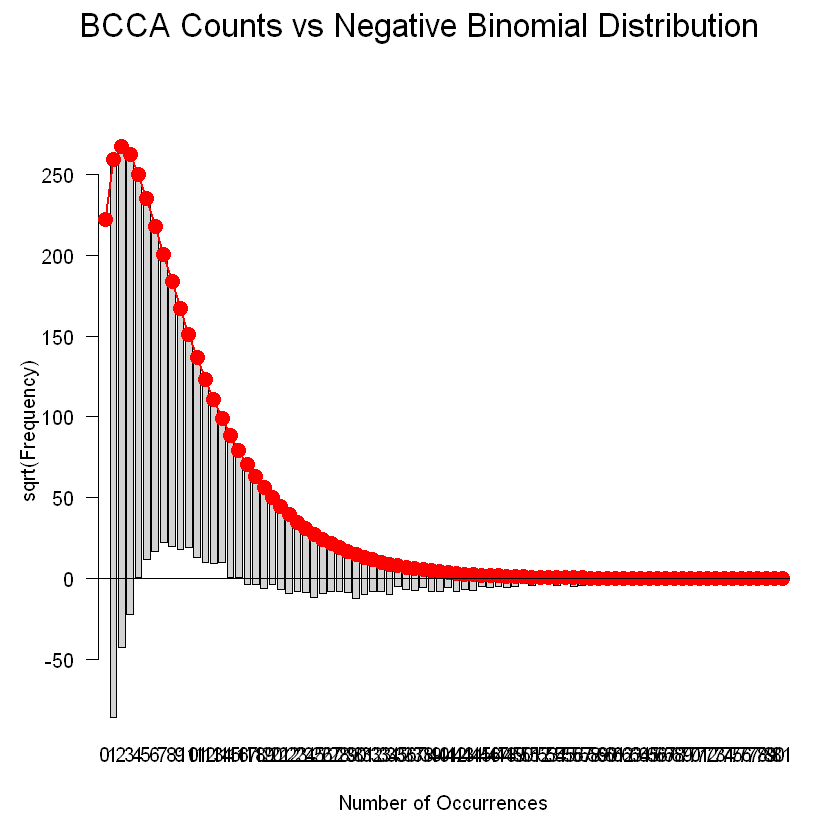

In [198]:
plot( BCgf_dJan, main="BCCA Counts vs Negative Binomial Distribution" )

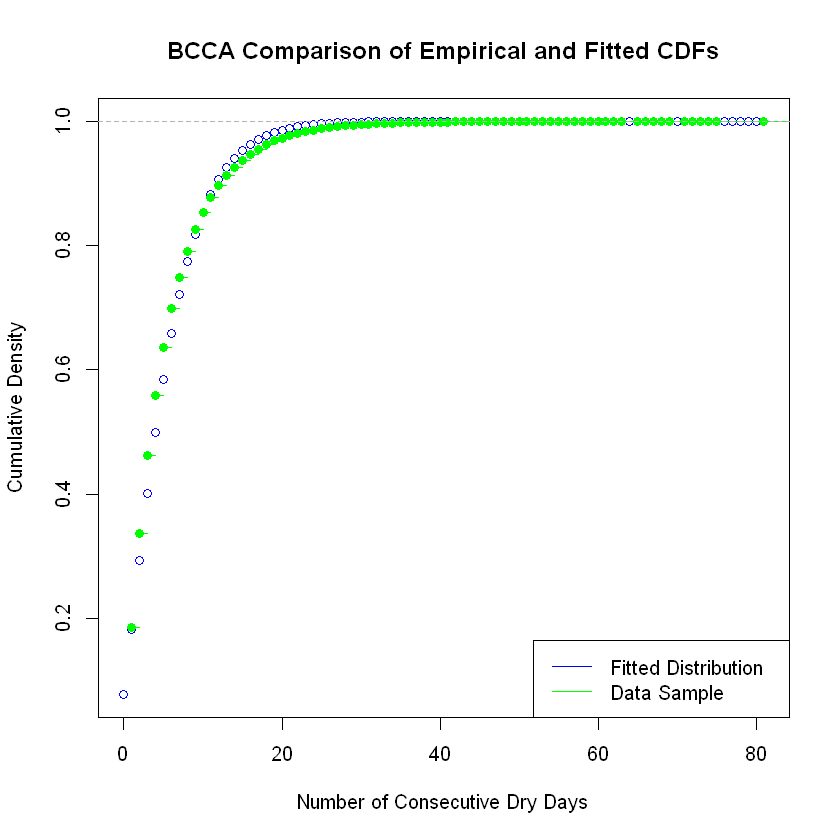

In [199]:
x <- seq(0,dBCJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJan_mu, size=BCfdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

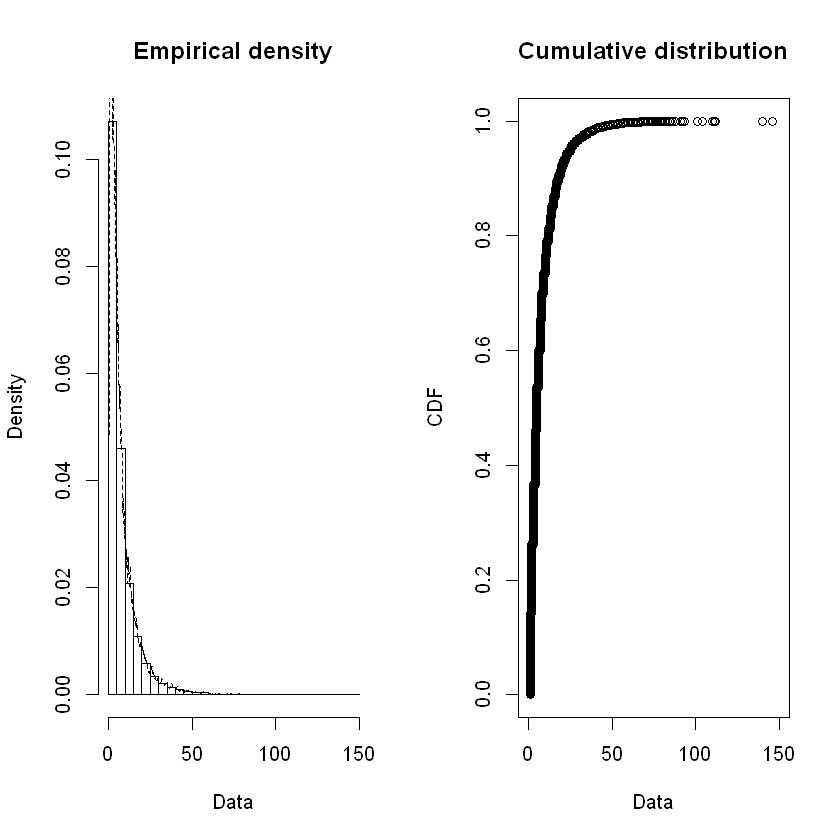

In [200]:
plotdist( dLOFeb$Dry_Count, histo=TRUE, demp=TRUE )

In [201]:
LOfd_NB_dFeb <- fitdist( dLOFeb$Dry_Count, "nbinom" )
LOfd_GE_dFeb <- fitdist( dLOFeb$Dry_Count, "geom" )

In [202]:
LOfdNB_dFeb_size <- LOfd_NB_dFeb$estimate[["size"]]
LOfdNB_dFeb_mu <- LOfd_NB_dFeb$estimate[["mu"]]
cat("LOCA Feb size: ", LOfdNB_dFeb_size, "\n", "LOCA Feb mu: ", LOfdNB_dFeb_mu, "\n")

LOCA Feb size:  1.380572 
 LOCA Feb mu:  7.900841 


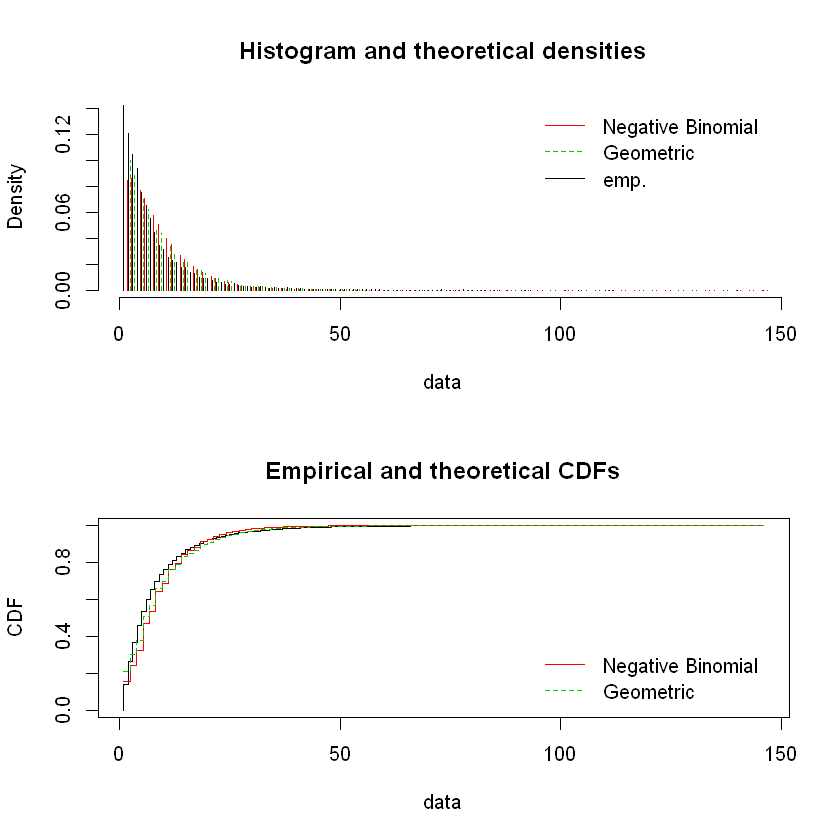

In [203]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dFeb, LOfd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dFeb, LOfd_GE_dFeb), legendtext=plot.legend )

In [204]:
LOstatRes <- gofstat( list(LOfd_NB_dFeb, LOfd_GE_dFeb), fitnames=c("Negative Binomial", "Geometric") )

In [205]:
print( LOstatRes )

Chi-squared statistic:  87852.08 63637.22 
Degree of freedom of the Chi-squared distribution:  36 37 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     126285            139476.6784     188796.681
<= 2     107459             76353.3019      78805.421
<= 3      92995             73241.2949      69951.600
<= 4      83202             68278.8329      62092.509
<= 5      66694             62546.6090      55116.390
<= 6      57727             56620.1955      48924.041
<= 7      48782             50818.5857      43427.405
<= 8      39725             45317.4511      38548.319
<= 9      30649             40207.9110      34217.399
<= 10     27678             35529.7390      30373.060
<= 11     22241             31291.2306      26960.635
<= 12     20101             27481.5565      23931.596
<= 13     19174             24078.6355      21242.872
<= 14     15545             21054.2228      18856.226
<= 15     15521             18377.2134    

In [206]:
LOfdNB_dFeb_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [207]:
LOfdNB_dFeb_p = LOfdNB_dFeb_size / (LOfdNB_dFeb_size + LOfdNB_dFeb_mu)
cat("LOCA prob: ", LOfdNB_dFeb_p)

LOCA prob:  0.1487459

In [208]:
# add to our tracking dataframe
LOMonDistDF[2, ] <- list( 2, dLOFebMean, dLOFebBNr, LOfdNB_dFeb_p, LOfdNB_dFeb_mu, LOfdNB_dFeb_size,
                          LOfdNB_dFeb_pvalue )

In [209]:
LOgf_dFeb <- goodfit( dLOFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dFeb_size, prob=LOfdNB_dFeb_p) )

In [210]:
summary( LOgf_dFeb )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          268125.1 146        0
Likelihood Ratio 218780.8  96        0


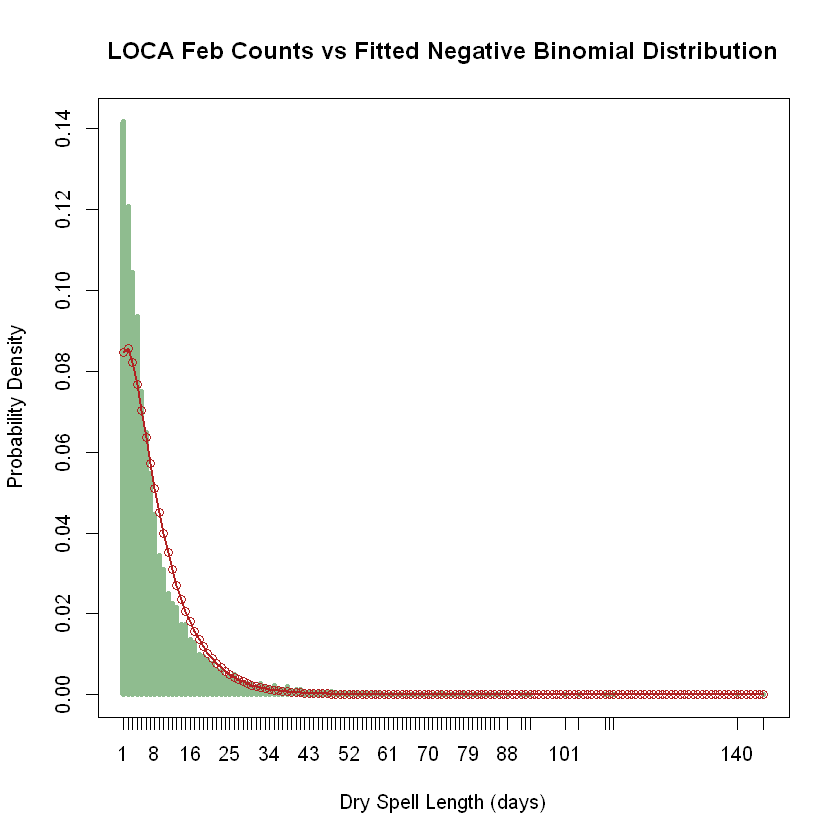

In [211]:
maxP <- max(dLOFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dFeb_size, mu=LOfdNB_dFeb_mu )
ttab <- table( dLOFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

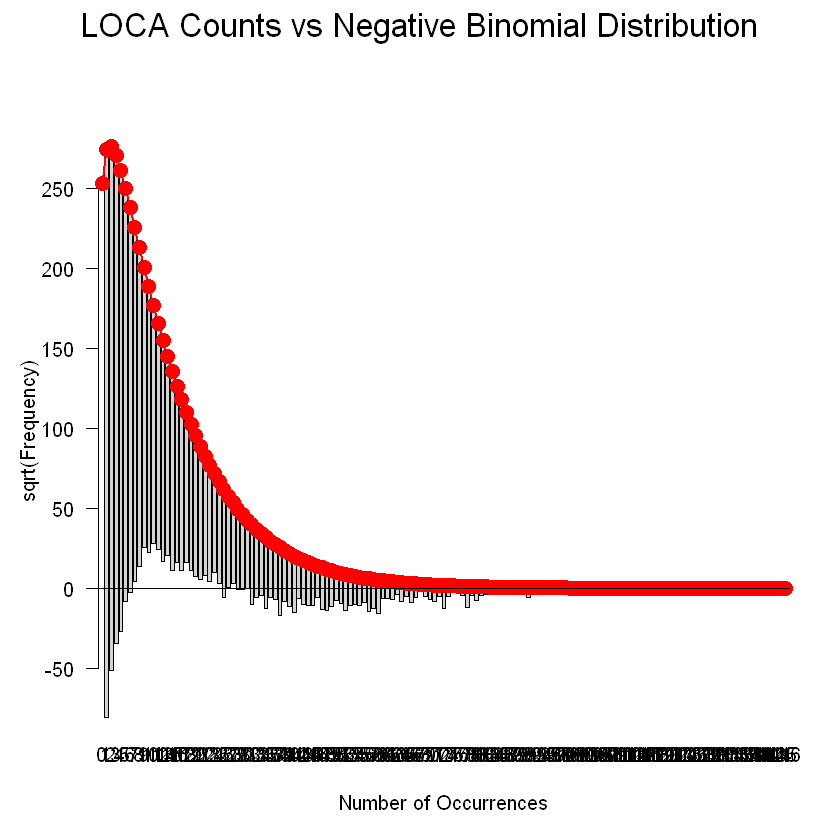

In [212]:
plot( LOgf_dFeb, main="LOCA Counts vs Negative Binomial Distribution" )

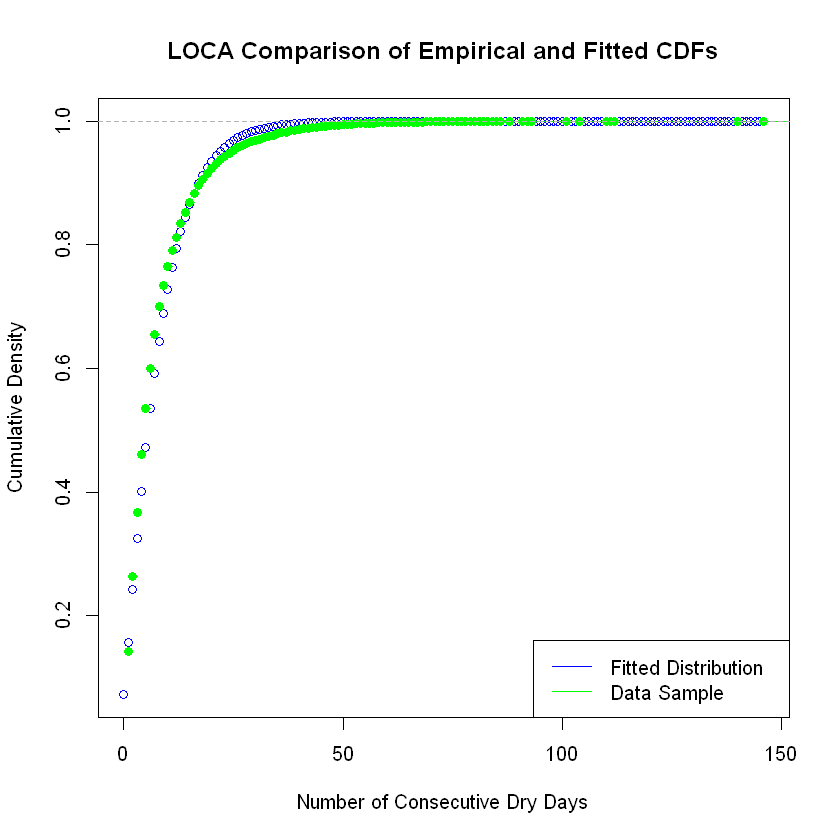

In [213]:
x <- seq(0,dLOFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dFeb_mu, size=LOfdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

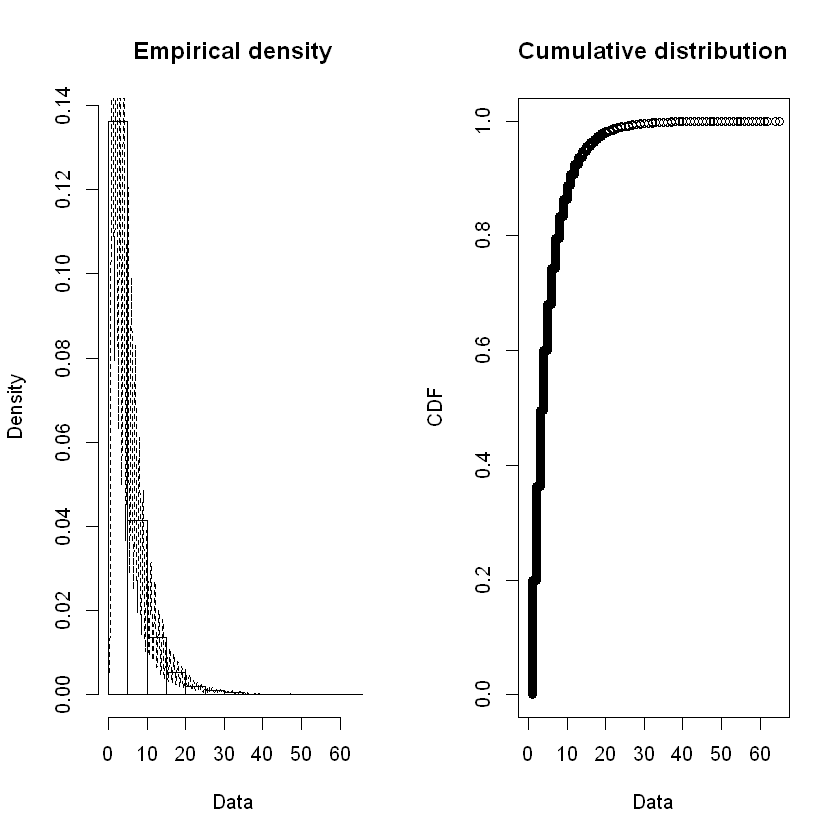

In [214]:
plotdist( dBCFeb$Dry_Count, histo=TRUE, demp=TRUE )

In [215]:
BCfd_NB_dFeb <- fitdist( dBCFeb$Dry_Count, "nbinom" )
BCfd_GE_dFeb <- fitdist( dBCFeb$Dry_Count, "geom" )

In [216]:
summary( BCfd_NB_dFeb )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.978457 0.004683990
mu   5.101655 0.005374827
Loglikelihood:  -1676322   AIC:  3352648   BIC:  3352671 
Correlation matrix:
             size           mu
size 1.0000000000 0.0002466528
mu   0.0002466528 1.0000000000


In [217]:
BCfdNB_dFeb_size <- BCfd_NB_dFeb$estimate[["size"]]
BCfdNB_dFeb_mu <- BCfd_NB_dFeb$estimate[["mu"]]
cat("BCCA Feb size: ", BCfdNB_dFeb_size, "\n", "BCCA Feb mu: ", BCfdNB_dFeb_mu, "\n")

BCCA Feb size:  1.978457 
 BCCA Feb mu:  5.101655 


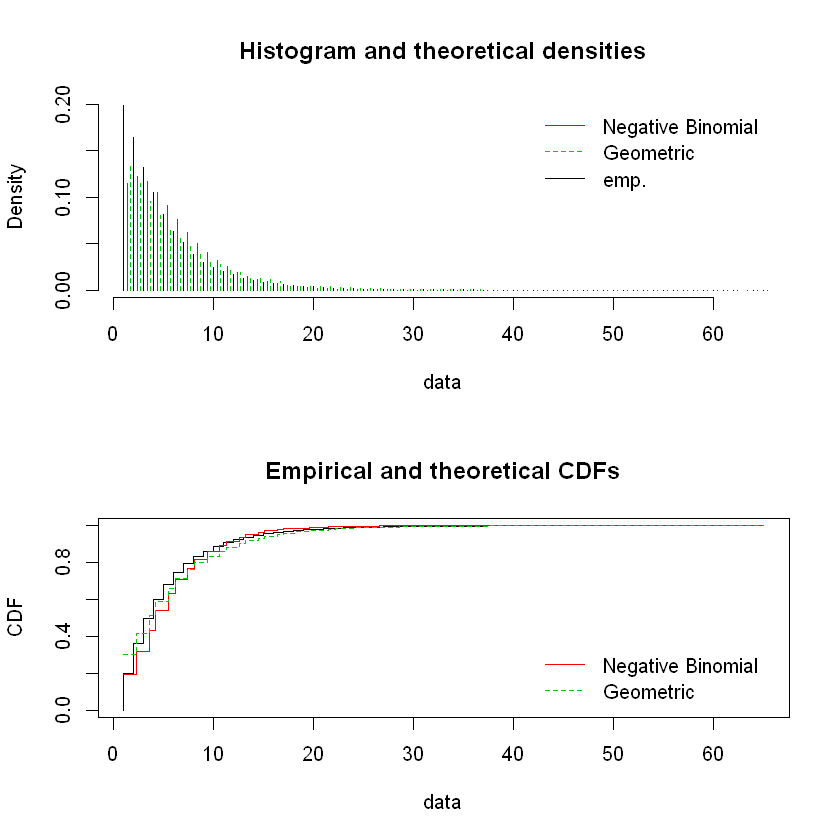

In [218]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dFeb, BCfd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dFeb, BCfd_GE_dFeb), legendtext=plot.legend )

In [219]:
BCstatRes <- gofstat( list(BCfd_NB_dFeb, BCfd_GE_dFeb), fitnames=c("Negative Binomial", "Geometric") )

In [220]:
print(BCstatRes)

Chi-squared statistic:  54411.47 56219.21 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     125428           122999.23580     190100.107
<= 2     104090            77573.46508      72381.450
<= 3      83365            74127.19544      60520.368
<= 4      66139            66478.81941      50602.950
<= 5      51367            57276.08976      42310.691
<= 6      39783            48001.24178      35377.277
<= 7      32327            39422.51209      29580.035
<= 8      24255            31880.63532      24732.781
<= 9      18607            25469.40502      20679.843
<= 10     15579            20147.95887      17291.056
<= 11     12624            15809.21111      14457.587
<= 12     10577            12320.34771      12088.435
<= 13      7954             9545.74429      10107.514
<= 14      6778             7359.01667       8451.205
<= 15      5140             5648.51536    

In [221]:
BCfdNB_dFeb_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [222]:
BCfdNB_dFeb_p = BCfdNB_dFeb_size / (BCfdNB_dFeb_size + BCfdNB_dFeb_mu)
cat("BCCA prob: ", BCfdNB_dFeb_p)

BCCA prob:  0.2794387

In [223]:
# add to our tracking dataframe
BCMonDistDF[2, ] <- list( 2, dBCFebMean, dBCFebBNr, BCfdNB_dFeb_p, BCfdNB_dFeb_mu, BCfdNB_dFeb_size,
                          BCfdNB_dFeb_pvalue )

In [224]:
BCgf_dFeb <- goodfit( dBCFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dFeb_size, prob=BCfdNB_dFeb_p) )

In [225]:
summary( BCgf_dFeb )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          183698.2 65        0
Likelihood Ratio 167297.2 63        0


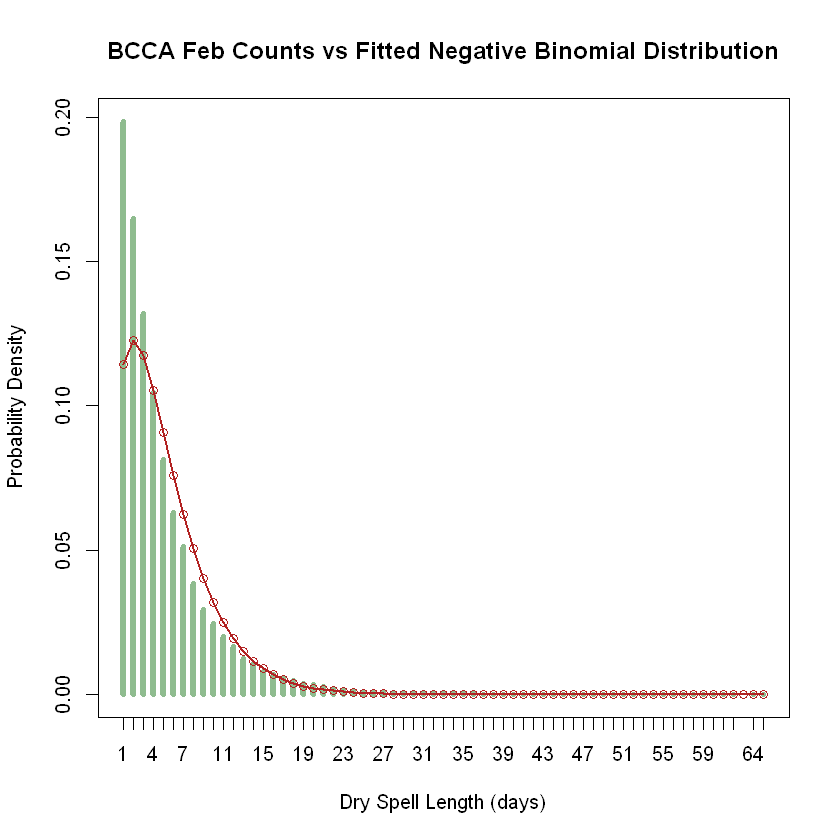

In [226]:
maxP <- max(dBCFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dFeb_size, mu=BCfdNB_dFeb_mu )
ttab <- table( dBCFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

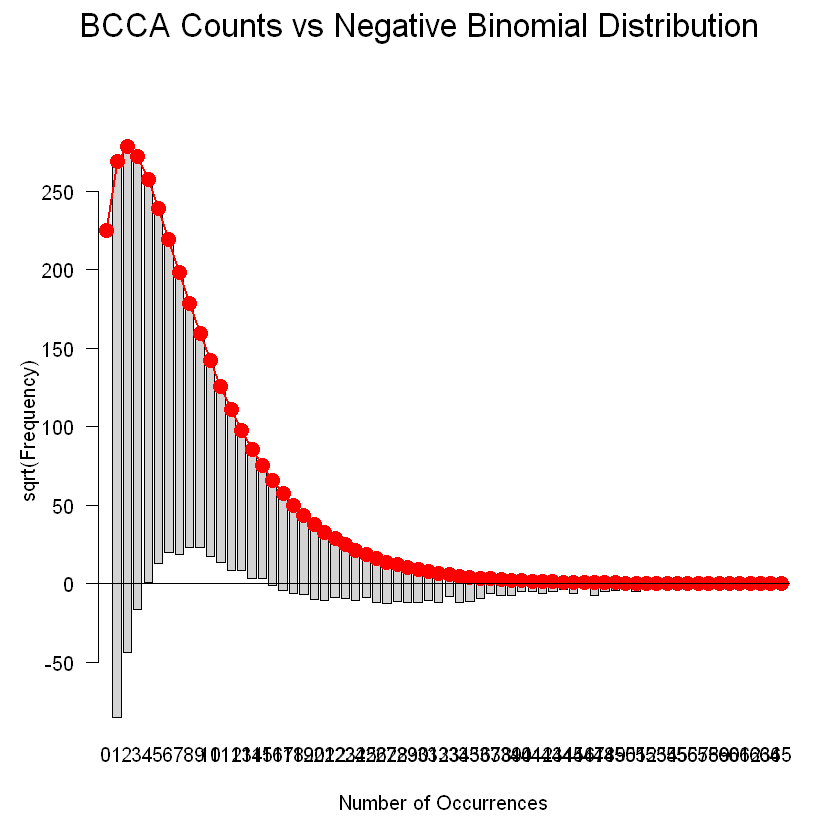

In [227]:
plot( BCgf_dFeb, main="BCCA Counts vs Negative Binomial Distribution" )

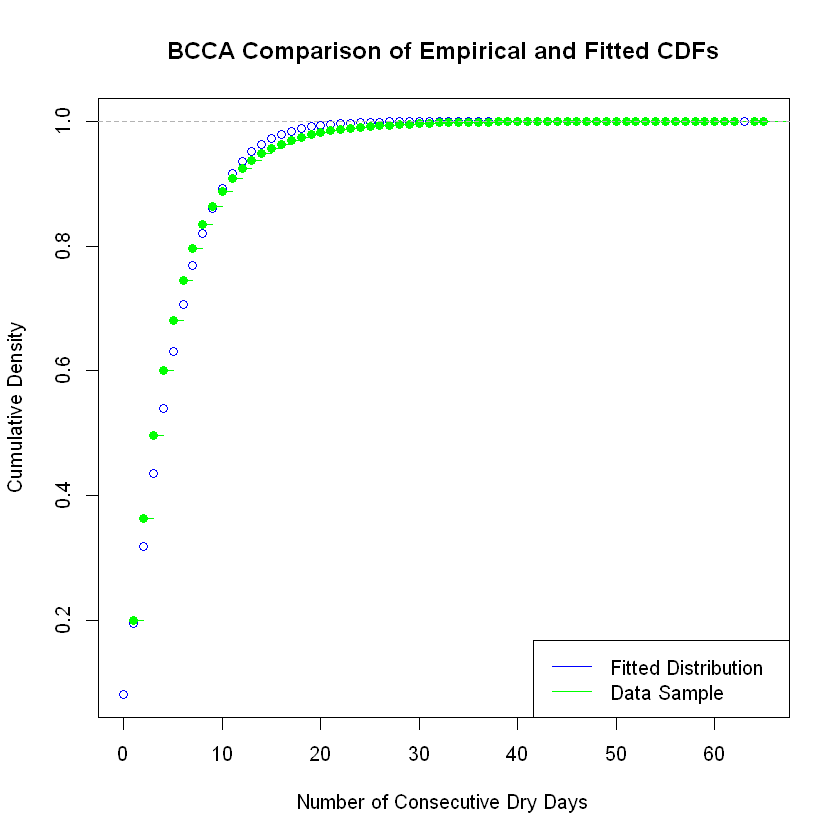

In [228]:
x <- seq(0,dBCFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dFeb_mu, size=BCfdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

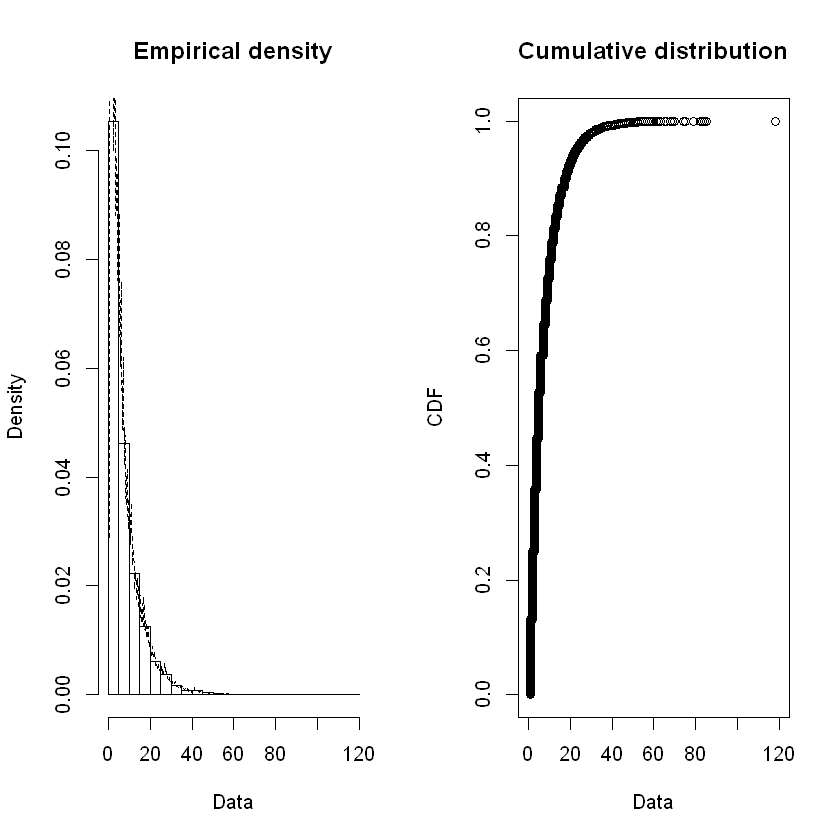

In [229]:
plotdist( dLOMar$Dry_Count, histo=TRUE, demp=TRUE )

In [230]:
LOfd_NB_dMar <- fitdist( dLOMar$Dry_Count, "nbinom" )
LOfd_GE_dMar <- fitdist( dLOMar$Dry_Count, "geom" )

In [231]:
LOfdNB_dMar_size <- LOfd_NB_dMar$estimate[["size"]]
LOfdNB_dMar_mu <- LOfd_NB_dMar$estimate[["mu"]]
cat("LOCA Mar size: ", LOfdNB_dMar_size, "\n", "LOCA Mar mu: ", LOfdNB_dMar_mu, "\n")

LOCA Mar size:  1.557894 
 LOCA Mar mu:  7.687401 


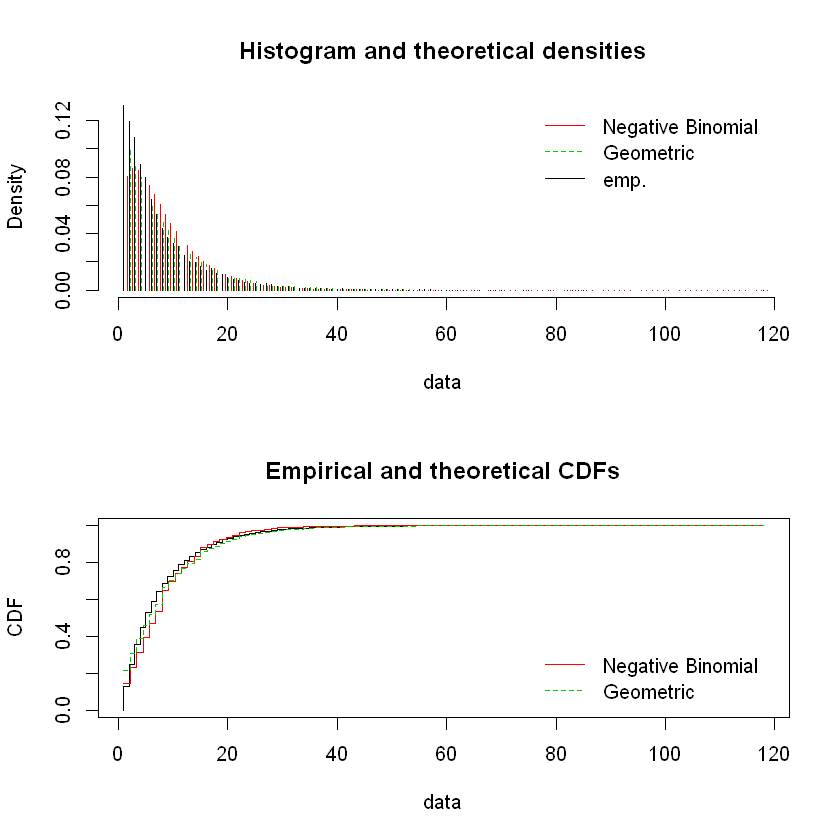

In [232]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dMar, LOfd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dMar, LOfd_GE_dMar), legendtext=plot.legend )

In [233]:
LOstatRes <- gofstat( list(LOfd_NB_dMar, LOfd_GE_dMar), fitnames=c("Negative Binomial", "Geometric") )

In [234]:
print( LOstatRes )

Chi-squared statistic:  52561.83 67736.96 
Degree of freedom of the Chi-squared distribution:  34 35 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     128553            140994.2812     213603.515
<= 2     117707             84616.5430      88735.644
<= 3     106515             83442.2156      78520.947
<= 4      87513             79058.5496      69482.102
<= 5      78716             73071.4755      61483.753
<= 6      63360             66407.9069      54406.125
<= 7      52434             59618.5375      48143.229
<= 8      42838             53029.4351      42601.279
<= 9      36470             46826.9062      37697.284
<= 10     32519             41108.4900      33357.806
<= 11     30314             35915.0361      29517.862
<= 12     24032             31251.4831      26119.949
<= 13     19893             27100.5605      23113.183
<= 14     18990             23431.9023      20452.536
<= 15     16515             20208.1172    

In [235]:
LOfdNB_dMar_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [236]:
LOfdNB_dMar_p = LOfdNB_dMar_size / (LOfdNB_dMar_size + LOfdNB_dMar_mu)
cat("LOCA prob: ", LOfdNB_dMar_p)

LOCA prob:  0.1685067

In [237]:
# add to our tracking dataframe
LOMonDistDF[3, ] <- list( 3, dLOMarMean, dLOMarBNr, LOfdNB_dMar_p, LOfdNB_dMar_mu, LOfdNB_dMar_size,
                          LOfdNB_dMar_pvalue )

In [238]:
LOgf_dMar <- goodfit( dLOMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dMar_size, prob=LOfdNB_dMar_p) )

In [239]:
summary( LOgf_dMar )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          151365.0 118        0
Likelihood Ratio 194805.9  75        0


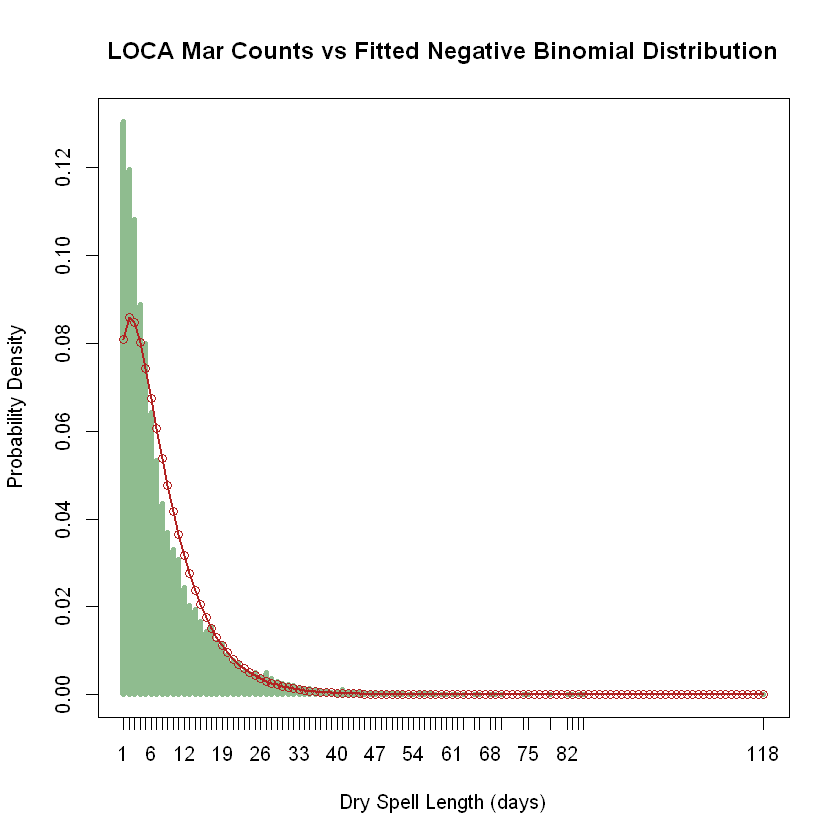

In [240]:
maxP <- max(dLOMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dMar_size, mu=LOfdNB_dMar_mu )
ttab <- table( dLOMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

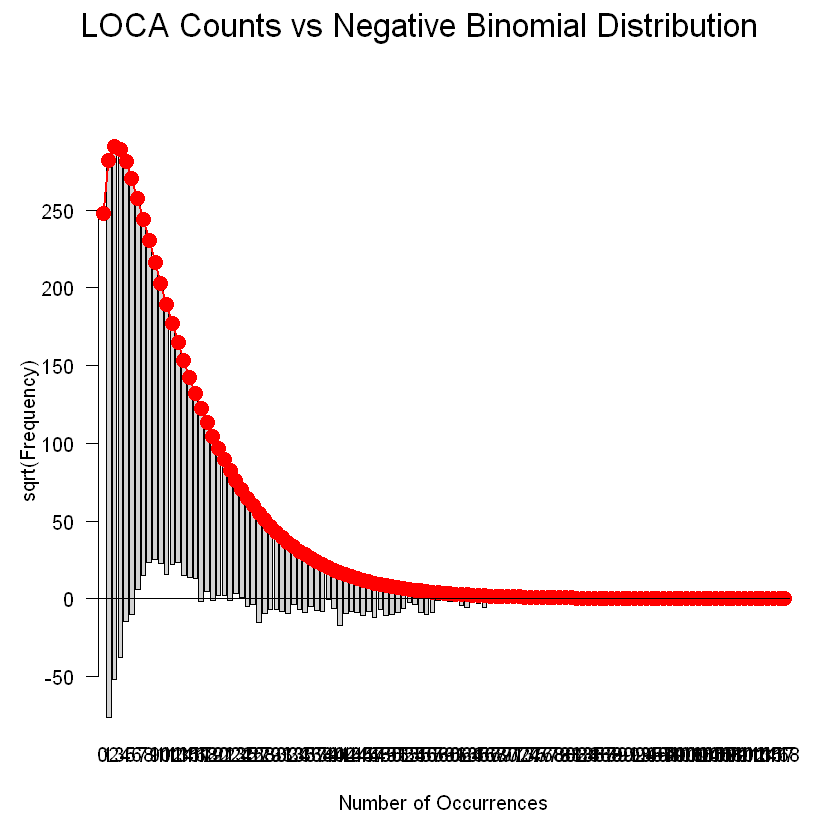

In [241]:
plot( LOgf_dMar, main="LOCA Counts vs Negative Binomial Distribution" )

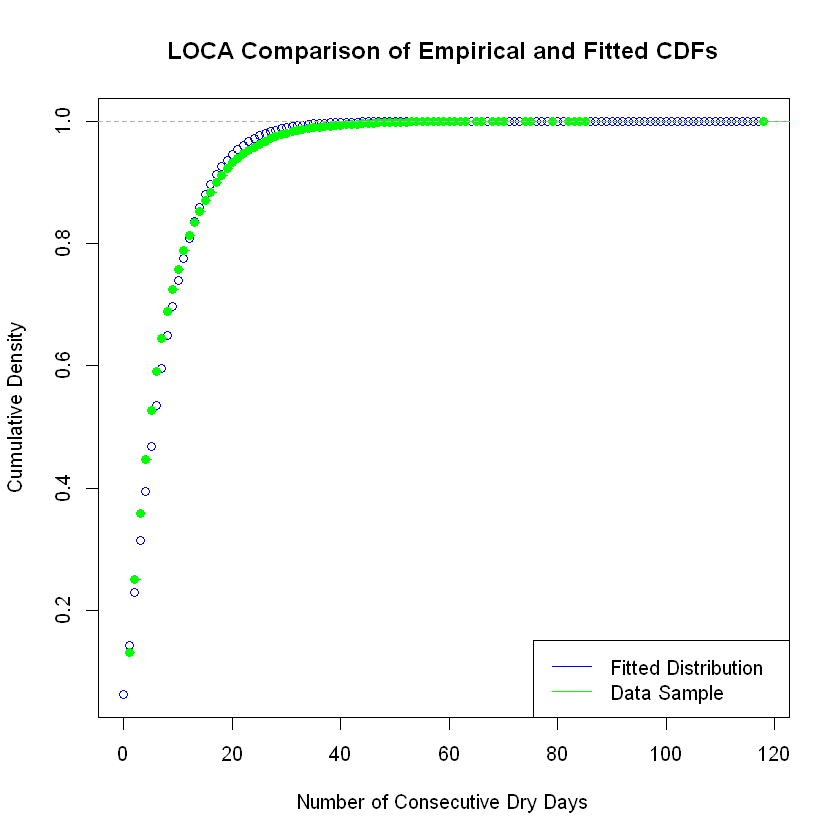

In [242]:
x <- seq(0,dLOMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dMar_mu, size=LOfdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

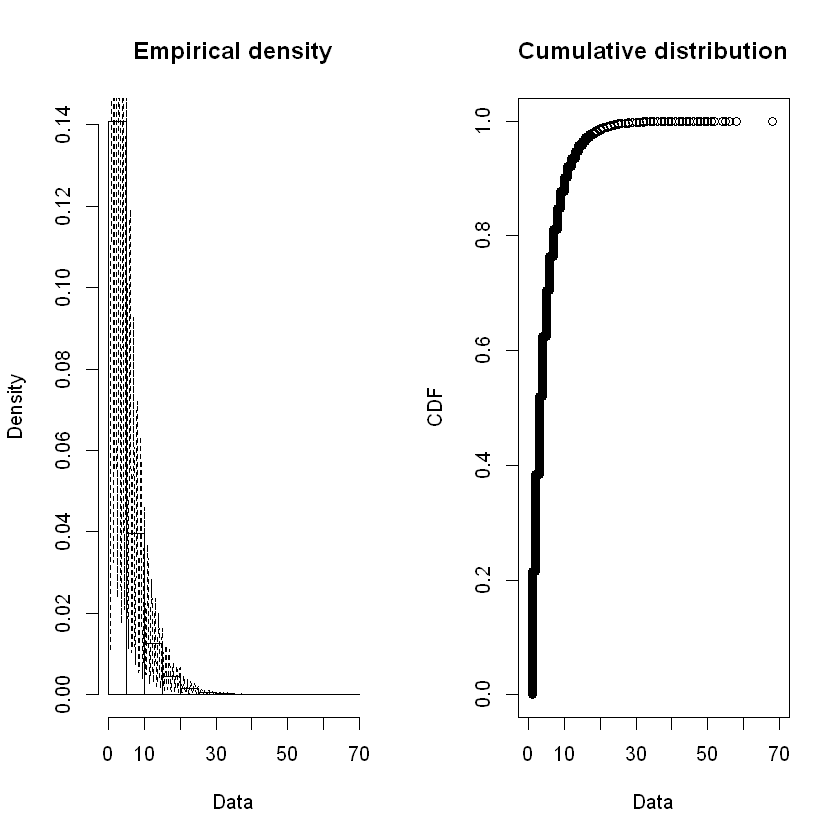

In [243]:
plotdist( dBCMar$Dry_Count, histo=TRUE, demp=TRUE )

In [244]:
BCfd_NB_dMar <- fitdist( dBCMar$Dry_Count, "nbinom" )
BCfd_GE_dMar <- fitdist( dBCMar$Dry_Count, "geom" )

In [245]:
summary( BCfd_NB_dMar )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.114692 0.004854638
mu   4.772212 0.004611430
Loglikelihood:  -1887752   AIC:  3775507   BIC:  3775530 
Correlation matrix:
             size           mu
size 1.0000000000 0.0001051498
mu   0.0001051498 1.0000000000


In [246]:
BCfdNB_dMar_size <- BCfd_NB_dMar$estimate[["size"]]
BCfdNB_dMar_mu <- BCfd_NB_dMar$estimate[["mu"]]
cat("BCCA Mar size: ", BCfdNB_dMar_size, "\n", "BCCA Mar mu: ", BCfdNB_dMar_mu, "\n")

BCCA Mar size:  2.114692 
 BCCA Mar mu:  4.772212 


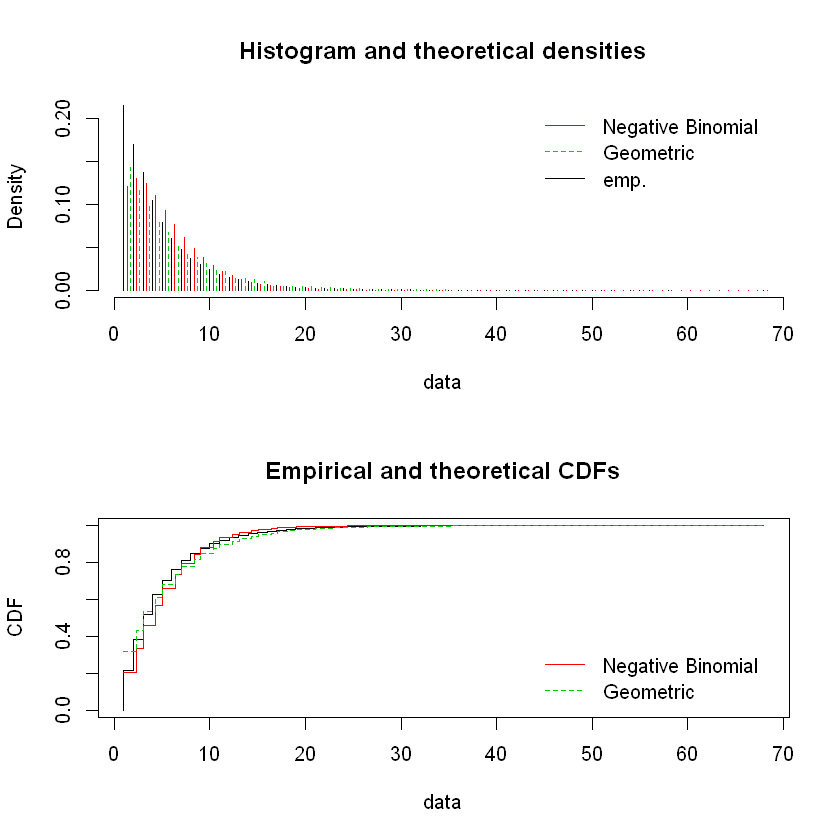

In [247]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dMar, BCfd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dMar, BCfd_GE_dMar), legendtext=plot.legend )

In [248]:
BCstatRes <- gofstat( list(BCfd_NB_dMar, BCfd_GE_dMar), fitnames=c("Negative Binomial", "Geometric") )

In [249]:
print(BCstatRes)

Chi-squared statistic:  44251.91 63008.08 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     156720            148351.6863     231257.535
<= 2     123813             95156.1210      86532.181
<= 3     100124             90437.4958      71541.808
<= 4      76397             80131.5855      59148.287
<= 5      57763             67905.3553      48901.753
<= 6      44177             55796.1950      40430.274
<= 7      34510             44820.2511      33426.349
<= 8      26540             35385.2277      27635.747
<= 9      21553             27556.7404      22848.278
<= 10     17588             21223.6939      18890.164
<= 11     13605             16197.0663      15617.733
<= 12     10693             12266.1679      12912.200
<= 13      8912              9228.5326      10675.359
<= 14      7314              6903.9813       8826.017
<= 15      5672              5139.5613    

In [250]:
BCfdNB_dMar_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [251]:
BCfdNB_dMar_p = BCfdNB_dMar_size / (BCfdNB_dMar_size + BCfdNB_dMar_mu)
cat("BCCA prob: ", BCfdNB_dMar_p)

BCCA prob:  0.3070599

In [252]:
# add to our tracking dataframe
BCMonDistDF[3, ] <- list( 3, dBCMarMean, dBCMarBNr, BCfdNB_dMar_p, BCfdNB_dMar_mu, BCfdNB_dMar_size,
                          BCfdNB_dMar_pvalue )

In [253]:
BCgf_dMar <- goodfit( dBCMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dMar_size, prob=BCfdNB_dMar_p) )

In [254]:
summary( BCgf_dMar )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          180839.9 68        0
Likelihood Ratio 197825.8 56        0


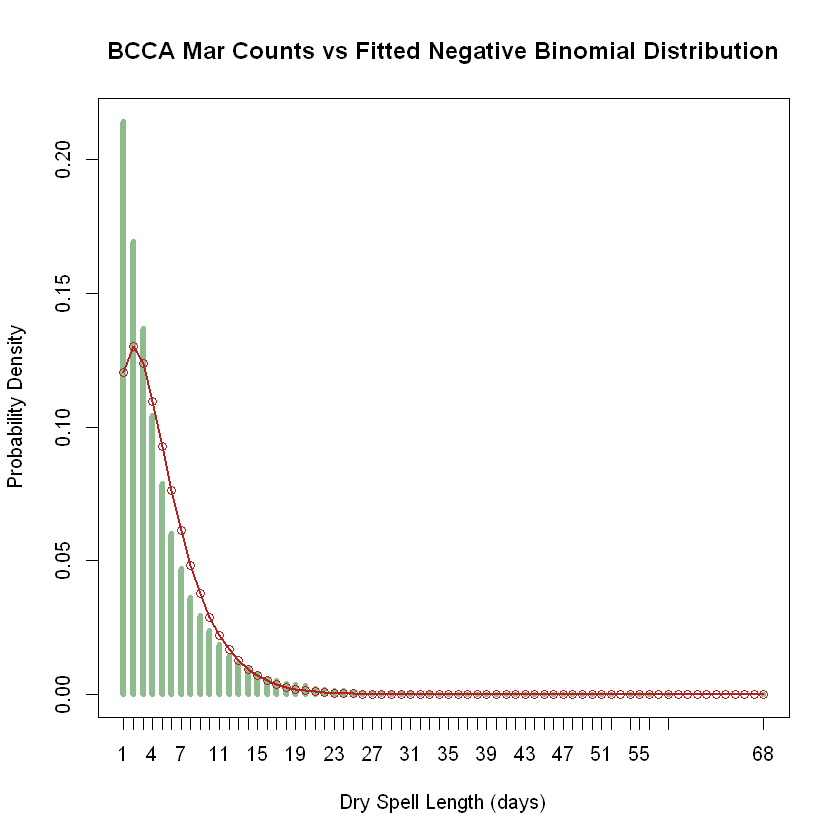

In [255]:
maxP <- max(dBCMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dMar_size, mu=BCfdNB_dMar_mu )
ttab <- table( dBCMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

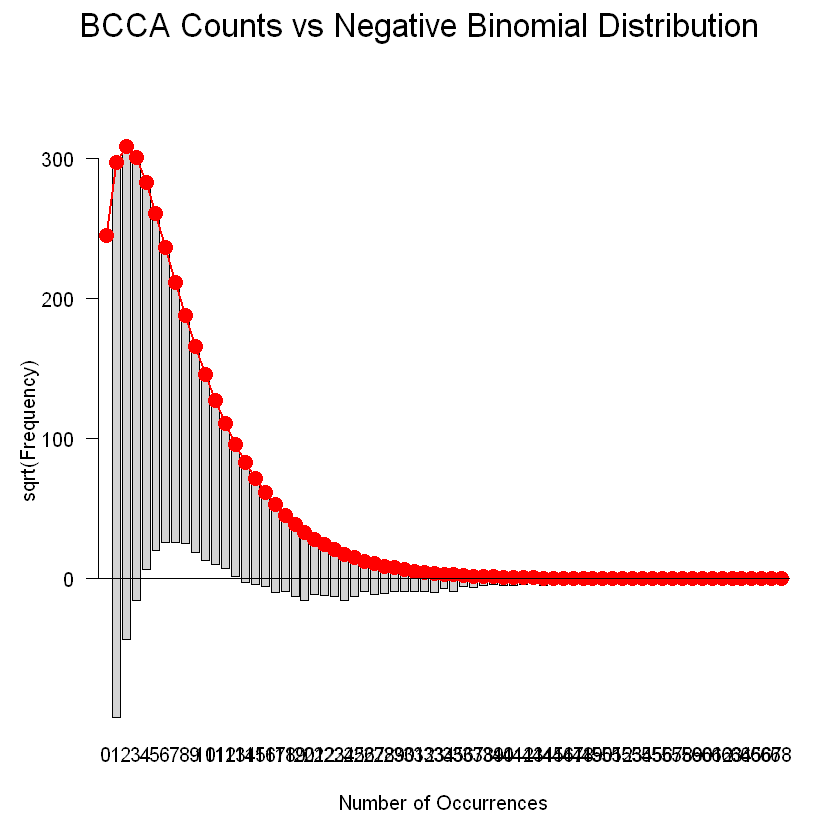

In [256]:
plot( BCgf_dMar, main="BCCA Counts vs Negative Binomial Distribution" )

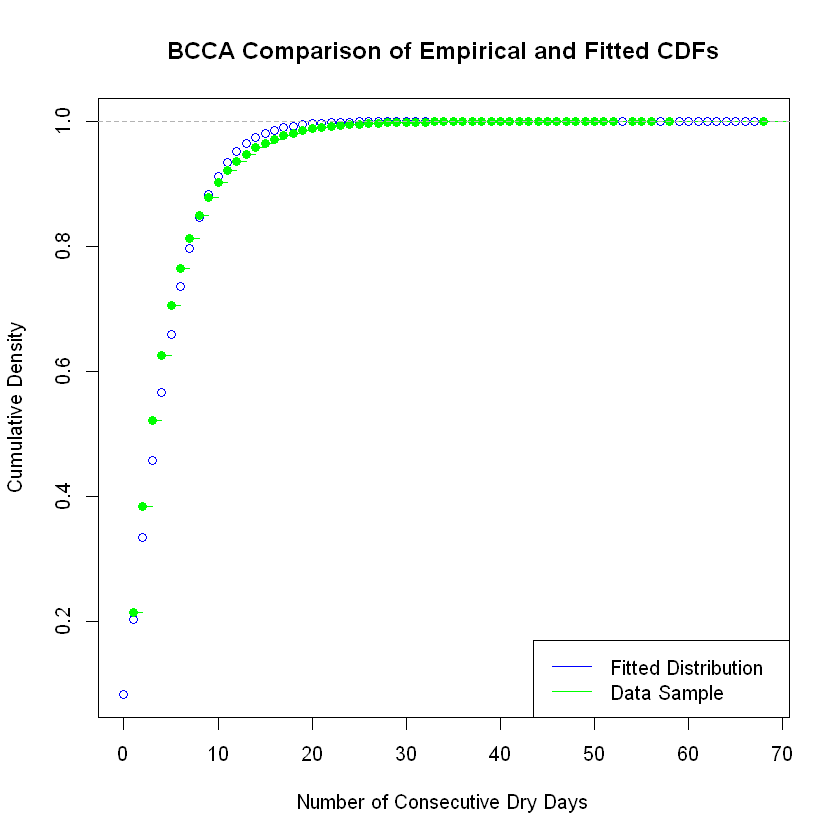

In [257]:
x <- seq(0,dBCMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dMar_mu, size=BCfdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

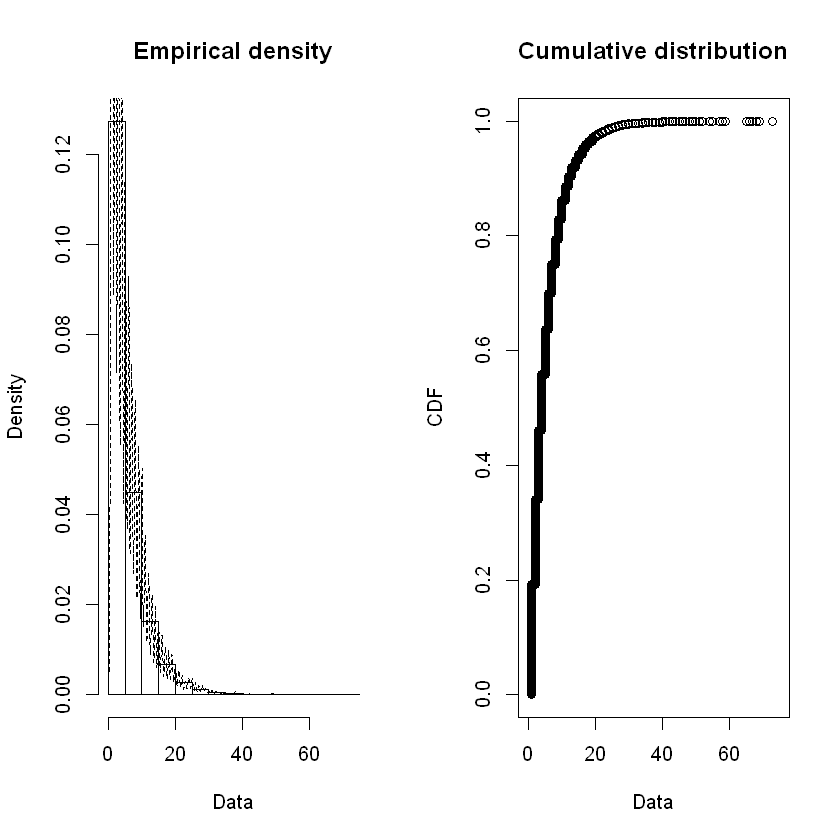

In [258]:
plotdist( dLOApr$Dry_Count, histo=TRUE, demp=TRUE )

In [259]:
LOfd_NB_dApr <- fitdist( dLOApr$Dry_Count, "nbinom" )
LOfd_GE_dApr <- fitdist( dLOApr$Dry_Count, "geom" )

In [260]:
LOfdNB_dApr_size <- LOfd_NB_dApr$estimate[["size"]]
LOfdNB_dApr_mu <- LOfd_NB_dApr$estimate[["mu"]]
cat("LOCA Apr size: ", LOfdNB_dApr_size, "\n", "LOCA Apr mu: ", LOfdNB_dApr_mu, "\n")

LOCA Apr size:  1.832933 
 LOCA Apr mu:  5.610468 


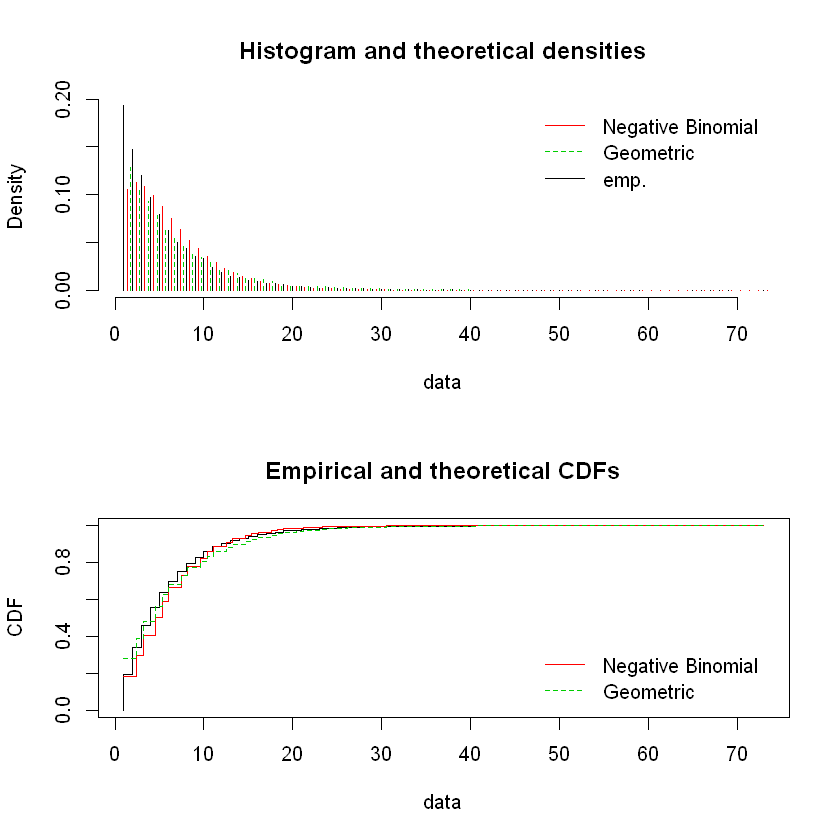

In [261]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dApr, LOfd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dApr, LOfd_GE_dApr), legendtext=plot.legend )

In [262]:
LOstatRes <- gofstat( list(LOfd_NB_dApr, LOfd_GE_dApr), fitnames=c("Negative Binomial", "Geometric") )

In [263]:
print( LOstatRes )

Chi-squared statistic:  53406.72 67694.97 
Degree of freedom of the Chi-squared distribution:  25 26 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     209809            198412.5347     304049.716
<= 2     160419            122889.0586     118466.843
<= 3     130442            118345.2594     100544.349
<= 4     105527            107777.8020      85333.296
<= 5      86364             94770.6758      72423.478
<= 6      67854             81350.0005      61466.747
<= 7      54399             68613.8204      52167.627
<= 8      47725             57102.3813      44275.343
<= 9      38720             47024.3130      37577.059
<= 10     35666             38396.9019      31892.139
<= 11     26146             31133.1864      27067.273
<= 12     20008             25095.5039      22972.346
<= 13     16009             20127.7166      19496.929
<= 14     14321             16073.8968      16547.297
<= 15     11486             12788.4808    

In [264]:
LOfdNB_dApr_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [265]:
LOfdNB_dApr_p = LOfdNB_dApr_size / (LOfdNB_dApr_size + LOfdNB_dApr_mu)
cat("LOCA prob: ", LOfdNB_dApr_p)

LOCA prob:  0.2462494

In [266]:
# add to our tracking dataframe
LOMonDistDF[4, ] <- list( 4, dLOAprMean, dLOAprBNr, LOfdNB_dApr_p, LOfdNB_dApr_mu, LOfdNB_dApr_size,
                          LOfdNB_dApr_pvalue )

In [267]:
LOgf_dApr <- goodfit( dLOApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dApr_size, prob=LOfdNB_dApr_p) )

In [268]:
summary( LOgf_dApr )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          408738.2 73        0
Likelihood Ratio 272749.0 62        0


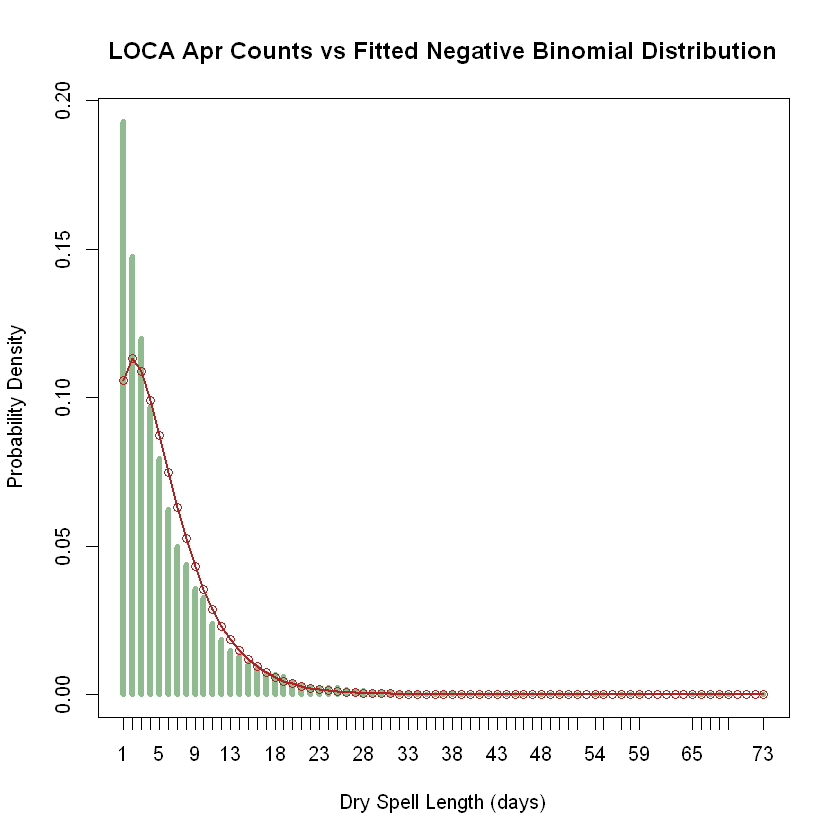

In [269]:
maxP <- max(dLOApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dApr_size, mu=LOfdNB_dApr_mu )
ttab <- table( dLOApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

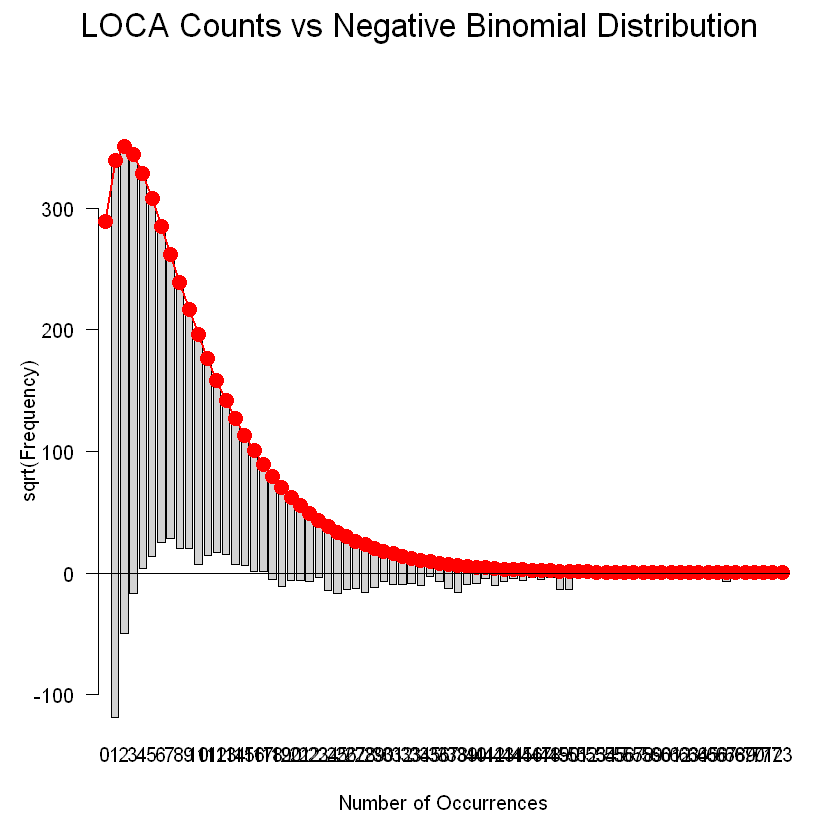

In [270]:
plot( LOgf_dApr, main="LOCA Counts vs Negative Binomial Distribution" )

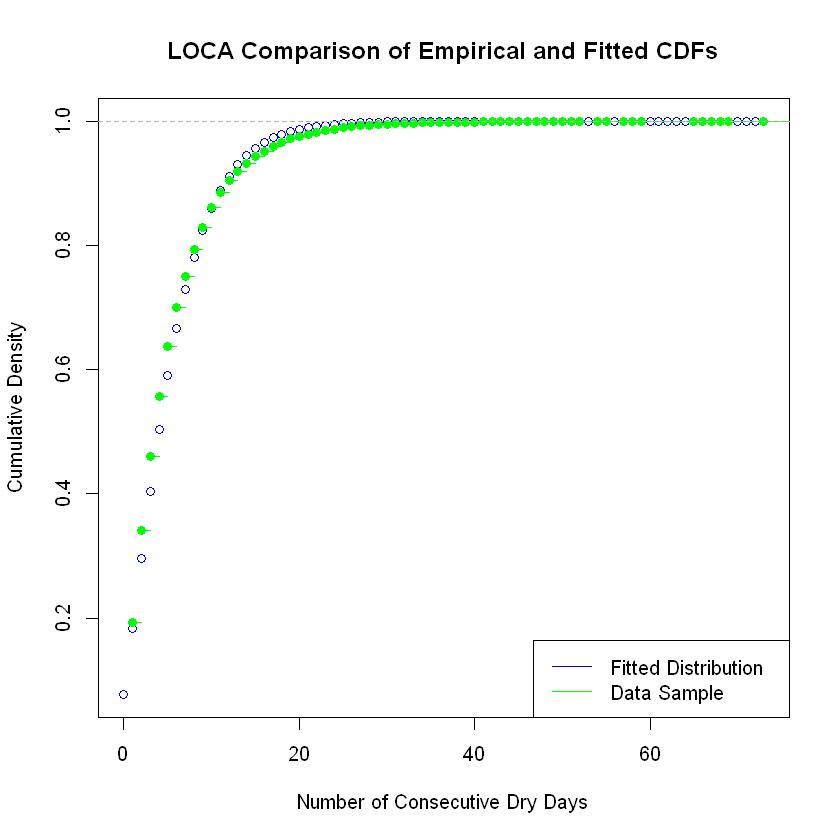

In [271]:
x <- seq(0,dLOAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dApr_mu, size=LOfdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

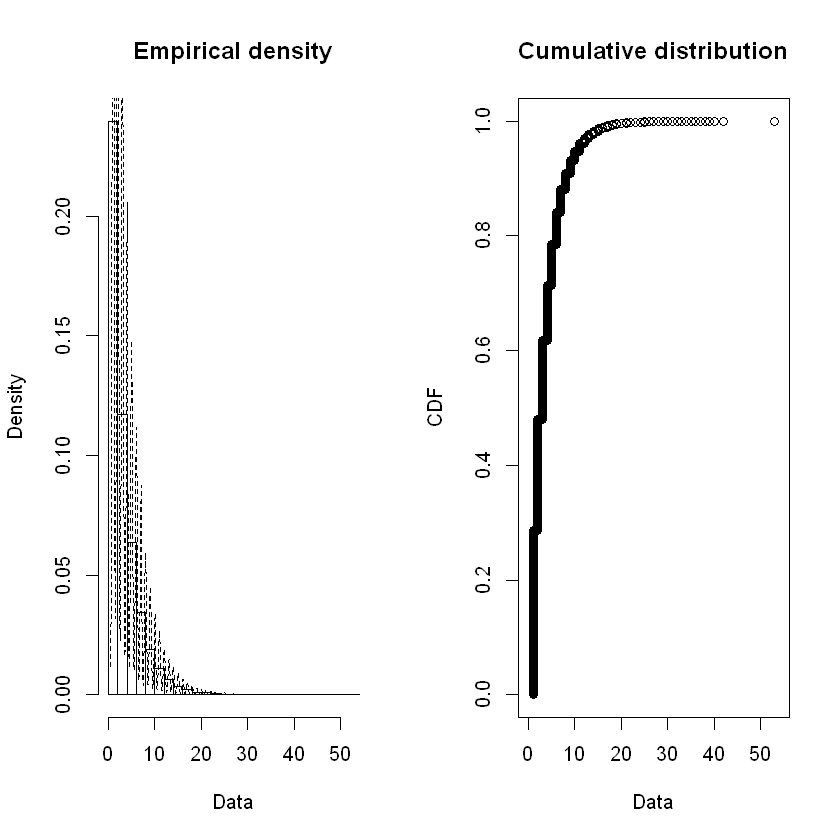

In [272]:
plotdist( dBCApr$Dry_Count, histo=TRUE, demp=TRUE )

In [273]:
BCfd_NB_dApr <- fitdist( dBCApr$Dry_Count, "nbinom" )
BCfd_GE_dApr <- fitdist( dBCApr$Dry_Count, "geom" )

In [274]:
summary( BCfd_NB_dApr )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.569241 0.006667066
mu   3.772563 0.003487541
Loglikelihood:  -1798077   AIC:  3596157   BIC:  3596181 
Correlation matrix:
              size            mu
size  1.000000e+00 -4.563885e-05
mu   -4.563885e-05  1.000000e+00


In [275]:
BCfdNB_dApr_size <- BCfd_NB_dApr$estimate[["size"]]
BCfdNB_dApr_mu <- BCfd_NB_dApr$estimate[["mu"]]
cat("BCCA Apr size: ", BCfdNB_dApr_size, "\n", "BCCA Apr mu: ", BCfdNB_dApr_mu, "\n")

BCCA Apr size:  2.569241 
 BCCA Apr mu:  3.772563 


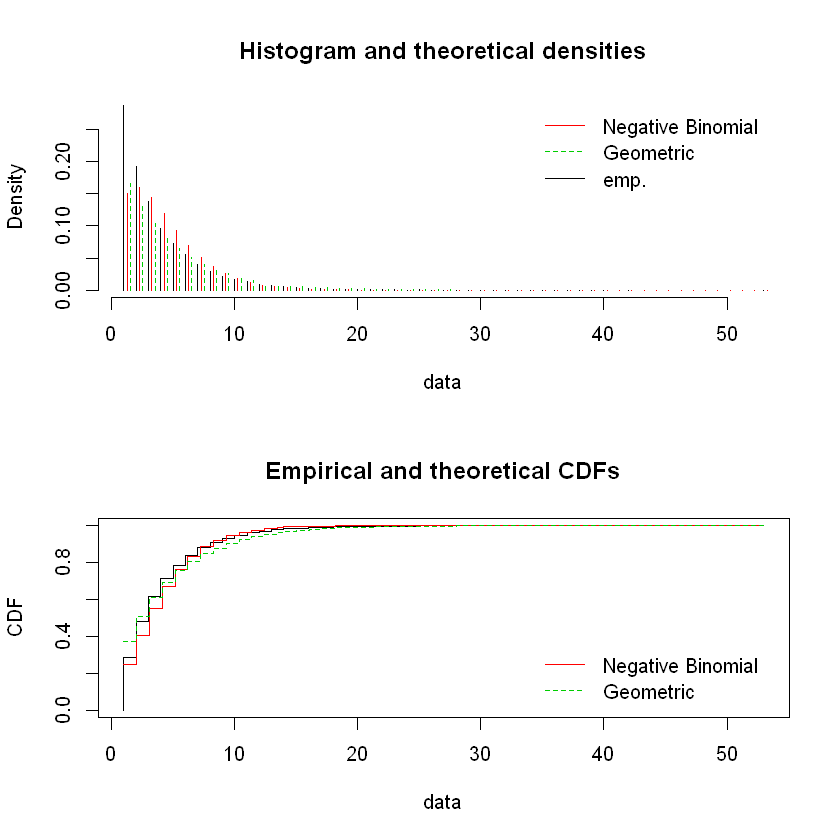

In [276]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dApr, BCfd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dApr, BCfd_GE_dApr), legendtext=plot.legend )

In [277]:
BCstatRes <- gofstat( list(BCfd_NB_dApr, BCfd_GE_dApr), fitnames=c("Negative Binomial", "Geometric") )

In [278]:
print(BCstatRes)

Chi-squared statistic:  53273.39 56867.41 
Degree of freedom of the Chi-squared distribution:  17 18 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     219564           189965.44640     287242.072
<= 2     147339           121907.96284     100241.377
<= 3     105459           110453.26786      79237.244
<= 4      73878            91482.55190      62634.224
<= 5      55545            71500.18066      49510.127
<= 6      41956            53657.68083      39135.995
<= 7      30332            39075.08120      30935.612
<= 8      22537            27804.24250      24453.501
<= 9      16810            19423.88199      19329.623
<= 10     12265            13367.94254      15279.380
<= 11     10059             9086.66692      12077.806
<= 12      6987             6112.27082       9547.077
<= 13      5546             4074.92700       7546.625
<= 14      4250             2695.77044       5965.338
<= 15      3030             1771.40527    

In [279]:
BCfdNB_dApr_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [280]:
BCfdNB_dApr_p = BCfdNB_dApr_size / (BCfdNB_dApr_size + BCfdNB_dApr_mu)
cat("BCCA prob: ", BCfdNB_dApr_p)

BCCA prob:  0.4051278

In [281]:
# add to our tracking dataframe
BCMonDistDF[4, ] <- list( 4, dBCAprMean, dBCAprBNr, BCfdNB_dApr_p, BCfdNB_dApr_mu, BCfdNB_dApr_size,
                          BCfdNB_dApr_pvalue )

In [282]:
BCgf_dApr <- goodfit( dBCApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dApr_size, prob=BCfdNB_dApr_p) )

In [283]:
summary( BCgf_dApr )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          255587.8 53        0
Likelihood Ratio 259360.1 41        0


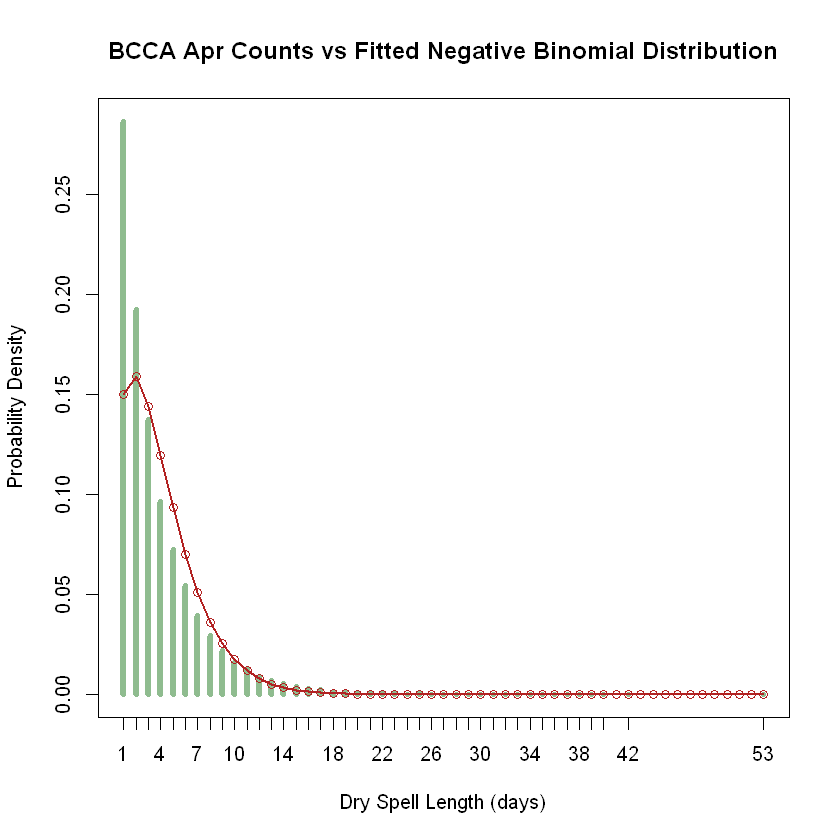

In [284]:
maxP <- max(dBCApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dApr_size, mu=BCfdNB_dApr_mu )
ttab <- table( dBCApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

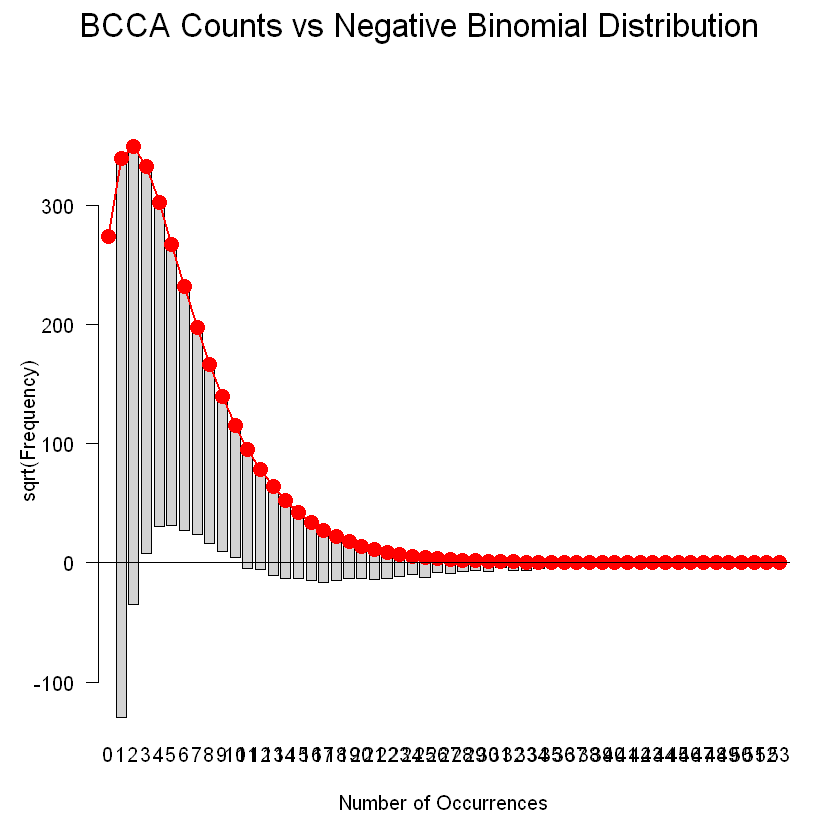

In [285]:
plot( BCgf_dApr, main="BCCA Counts vs Negative Binomial Distribution" )

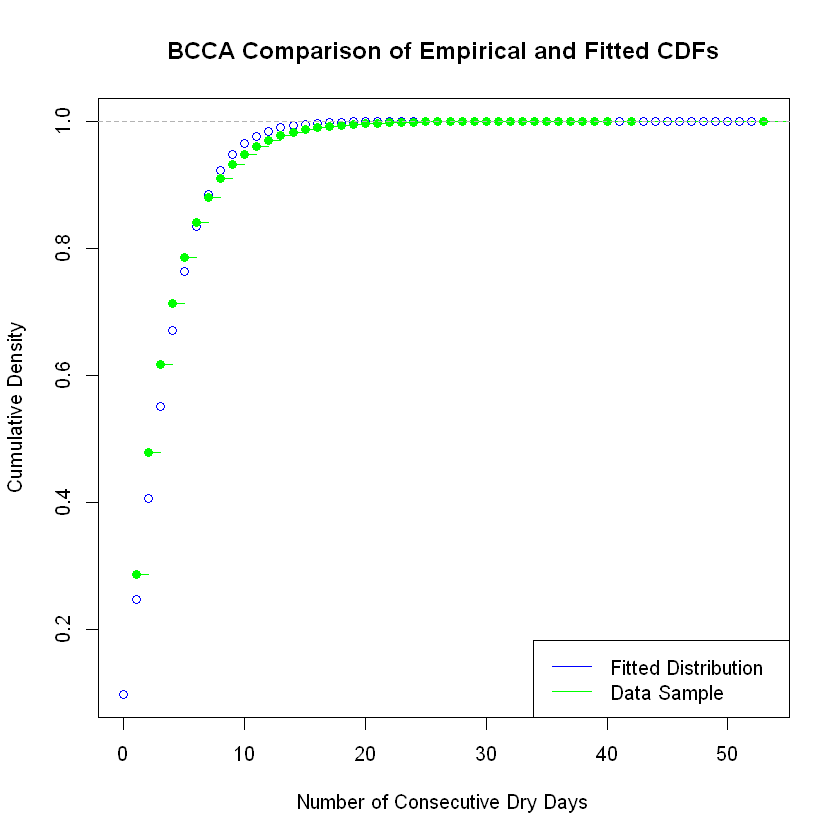

In [286]:
x <- seq(0,dBCAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dApr_mu, size=BCfdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

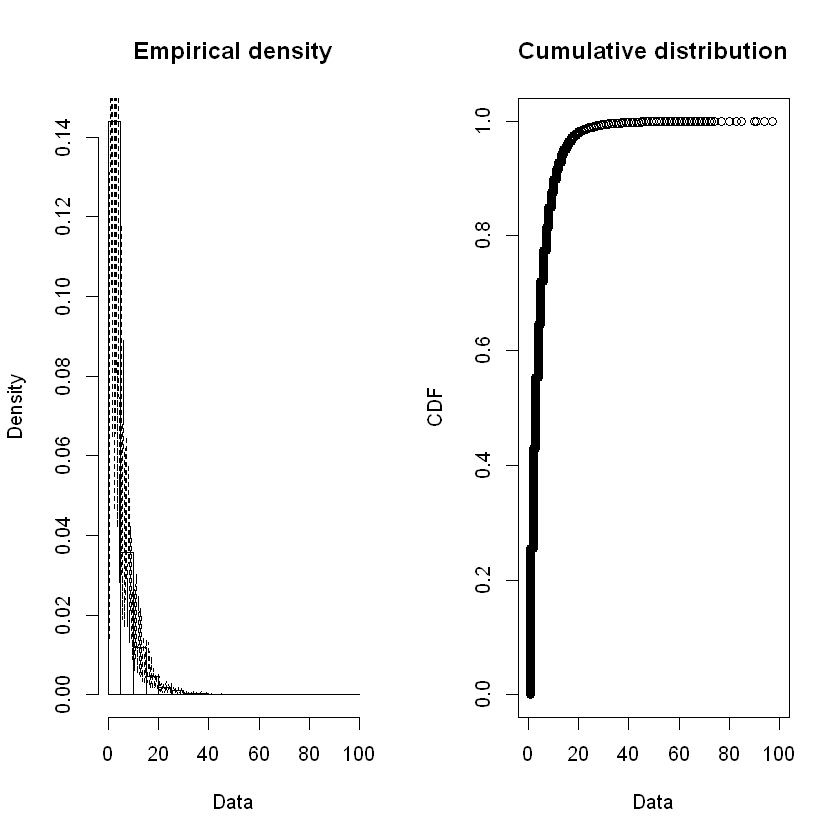

In [287]:
plotdist( dLOMay$Dry_Count, histo=TRUE, demp=TRUE )

In [288]:
LOfd_NB_dMay <- fitdist( dLOMay$Dry_Count, "nbinom" )
LOfd_GE_dMay <- fitdist( dLOMay$Dry_Count, "geom" )

In [289]:
LOfdNB_dMay_size <- LOfd_NB_dMay$estimate[["size"]]
LOfdNB_dMay_mu <- LOfd_NB_dMay$estimate[["mu"]]
cat("LOCA May size: ", LOfdNB_dMay_size, "\n", "LOCA May mu: ", LOfdNB_dMay_mu, "\n")

LOCA May size:  1.699939 
 LOCA May mu:  4.771077 


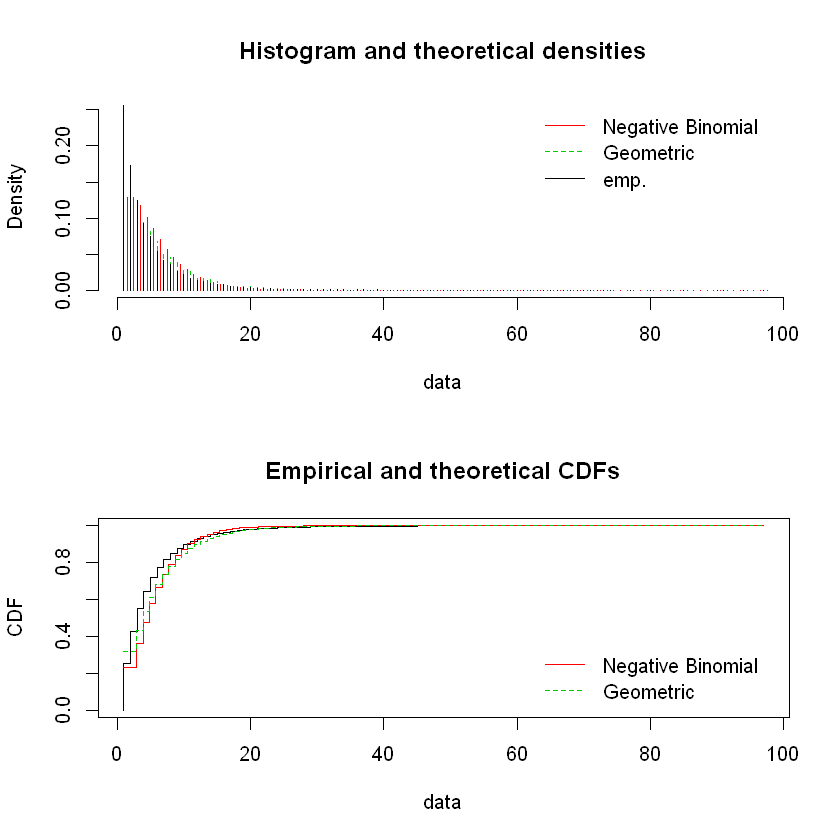

In [290]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dMay, LOfd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dMay, LOfd_GE_dMay), legendtext=plot.legend )

In [291]:
LOstatRes <- gofstat( list(LOfd_NB_dMay, LOfd_GE_dMay), fitnames=c("Negative Binomial", "Geometric") )

In [292]:
print( LOstatRes )

Chi-squared statistic:  303309.1 79451.16 
Degree of freedom of the Chi-squared distribution:  24 25 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     335495           304778.02234    415344.6359
<= 2     227502           168732.03129    155406.6982
<= 3     163192           153431.60301    128480.9270
<= 4     121809           132920.21044    106220.3161
<= 5      96998           111721.09526     87816.5795
<= 6      70602            91981.12966     72601.4752
<= 7      53420            74598.81627     60022.5405
<= 8      46928            59813.89810     49623.0325
<= 9      34481            47530.51804     41025.3438
<= 10     28678            37497.10987     33917.2910
<= 11     22003            29405.77650     28040.7797
<= 12     18015            22945.47138     23182.4330
<= 13     16395            17828.55755     19165.8436
<= 14     11774            13802.17867     15845.1687
<= 15     10328            10651.19391    

In [293]:
LOfdNB_dMay_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [294]:
LOfdNB_dMay_p = LOfdNB_dMay_size / (LOfdNB_dMay_size + LOfdNB_dMay_mu)
cat("LOCA prob: ", LOfdNB_dMay_p)

LOCA prob:  0.2627005

In [295]:
# add to our tracking dataframe
LOMonDistDF[5, ] <- list( 5, dLOMayMean, dLOMayBNr, LOfdNB_dMay_p, LOfdNB_dMay_mu, LOfdNB_dMay_size,
                          LOfdNB_dMay_pvalue )

In [296]:
LOgf_dMay <- goodfit( dLOMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dMay_size, prob=LOfdNB_dMay_p) )

In [297]:
summary( LOgf_dMay )


	 Goodness-of-fit test for nbinomial distribution

                          X^2 df P(> X^2)
Pearson          1085449292.9 97        0
Likelihood Ratio     494529.4 81        0


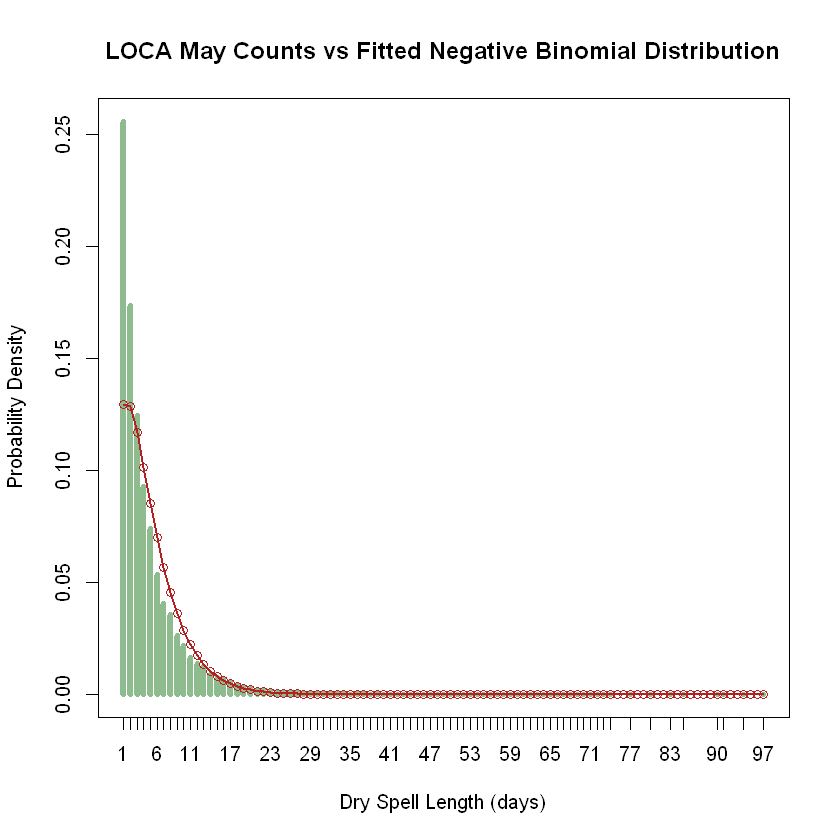

In [298]:
maxP <- max(dLOMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dMay_size, mu=LOfdNB_dMay_mu )
ttab <- table( dLOMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

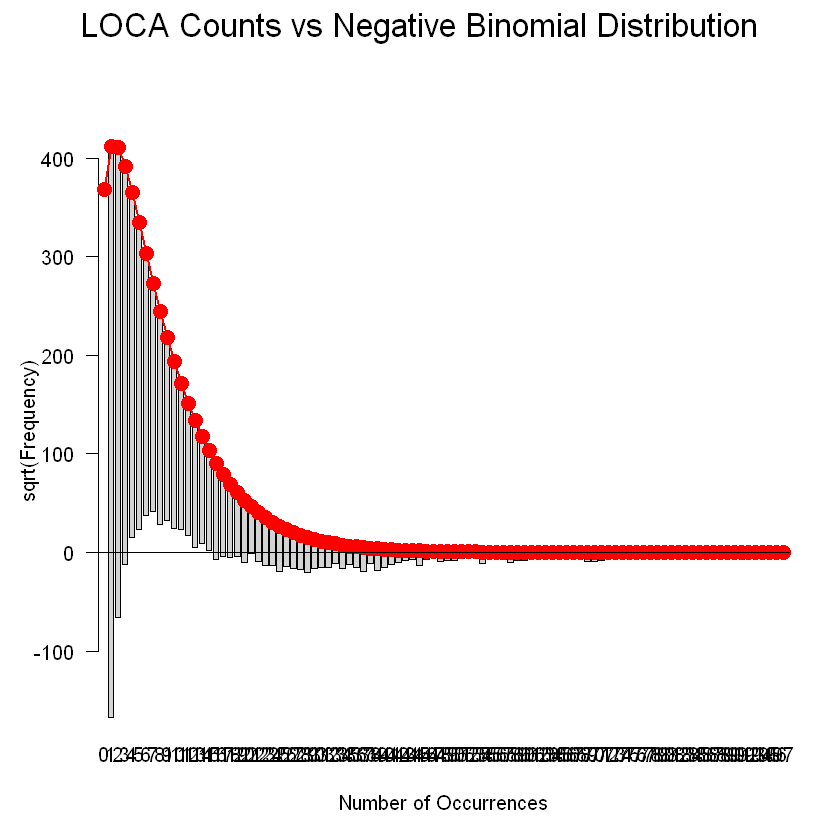

In [299]:
plot( LOgf_dMay, main="LOCA Counts vs Negative Binomial Distribution" )

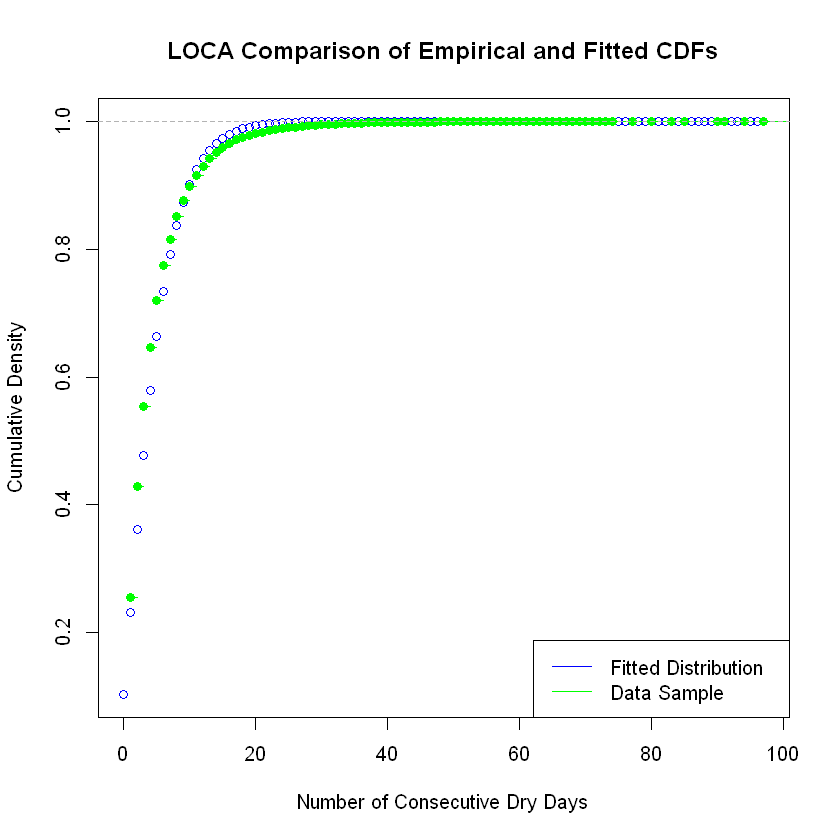

In [300]:
x <- seq(0,dLOMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dMay_mu, size=LOfdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

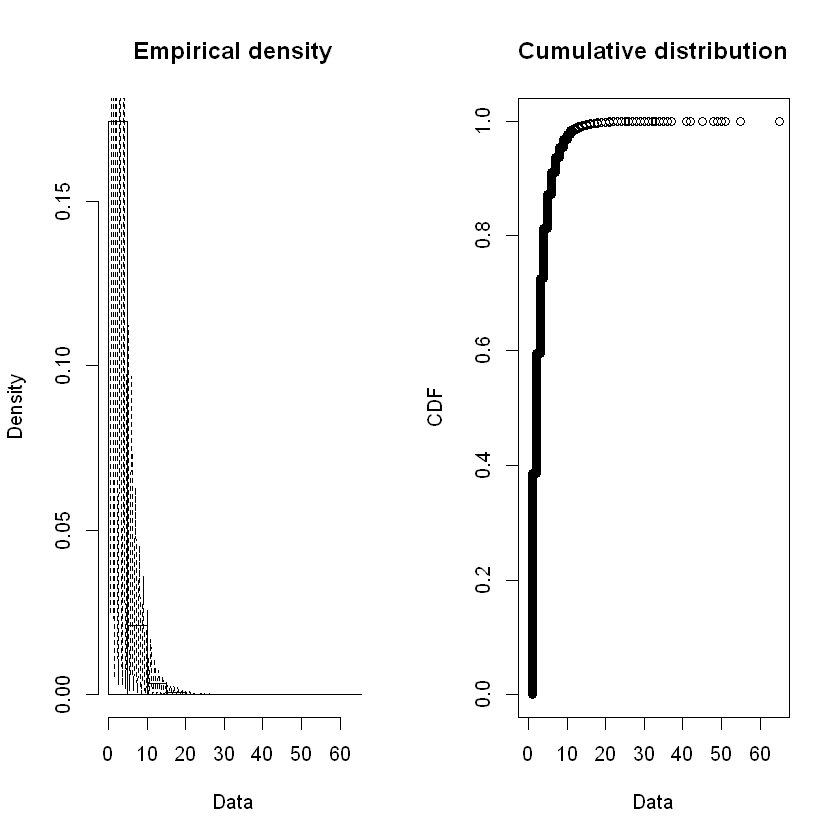

In [301]:
plotdist( dBCMay$Dry_Count, histo=TRUE, demp=TRUE )

In [302]:
BCfd_NB_dMay <- fitdist( dBCMay$Dry_Count, "nbinom" )
BCfd_GE_dMay <- fitdist( dBCMay$Dry_Count, "geom" )

In [303]:
summary( BCfd_NB_dMay )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 3.287202 0.009927589
mu   2.929493 0.002566612
Loglikelihood:  -1768062   AIC:  3536129   BIC:  3536152 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0002132572
mu   -0.0002132572  1.0000000000


In [304]:
BCfdNB_dMay_size <- BCfd_NB_dMay$estimate[["size"]]
BCfdNB_dMay_mu <- BCfd_NB_dMay$estimate[["mu"]]
cat("BCCA May size: ", BCfdNB_dMay_size, "\n", "BCCA May mu: ", BCfdNB_dMay_mu, "\n")

BCCA May size:  3.287202 
 BCCA May mu:  2.929493 


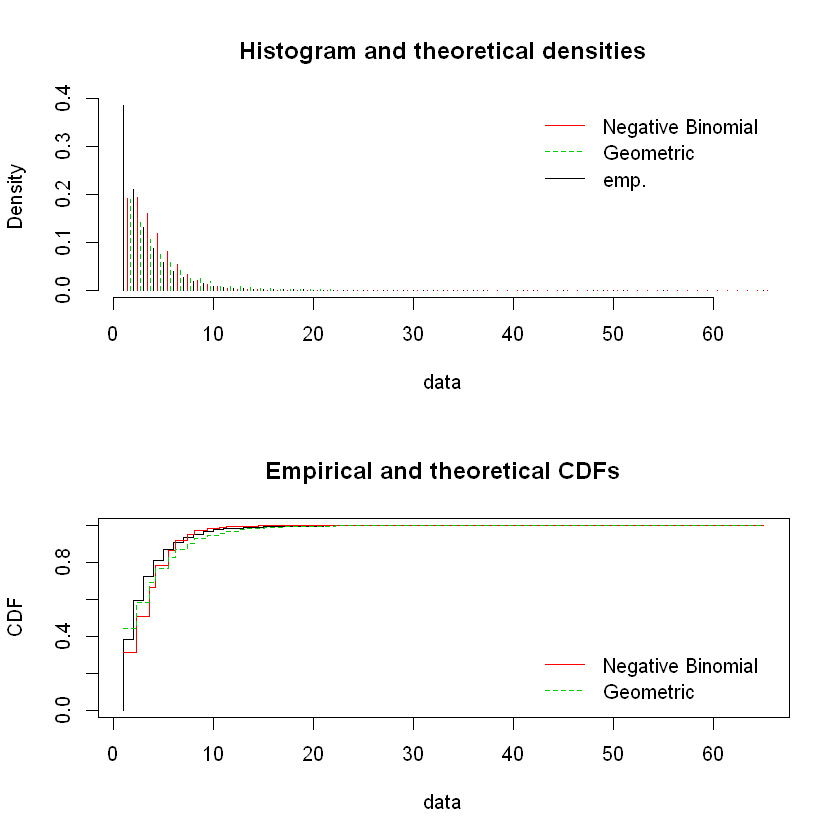

In [305]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dMay, BCfd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dMay, BCfd_GE_dMay), legendtext=plot.legend )

In [306]:
BCstatRes <- gofstat( list(BCfd_NB_dMay, BCfd_GE_dMay), fitnames=c("Negative Binomial", "Geometric") )

In [307]:
print(BCstatRes)

Chi-squared statistic:  134361.3 51611.5 
Degree of freedom of the Chi-squared distribution:  13 14 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     323769           263988.99813     373690.602
<= 2     176472           162049.34681     118981.054
<= 3     110209           134581.32482      88699.103
<= 4      73523            99681.62148      66124.232
<= 5      49268            68460.29628      49294.907
<= 6      32395            44558.27082      36748.826
<= 7      22397            27857.87998      27395.857
<= 8      15474            16880.61358      20423.318
<= 9      11074             9976.19439      15225.365
<= 10      7345             5776.31394      11350.347
<= 11      5344             3287.94490       8461.562
<= 12      3744             1844.68986       6308.004
<= 13      2506             1022.21183       4702.549
<= 15      3288              864.73209       6119.162
<= 18      2414              298.09190     

In [308]:
BCfdNB_dMay_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [309]:
BCfdNB_dMay_p = BCfdNB_dMay_size / (BCfdNB_dMay_size + BCfdNB_dMay_mu)
cat("BCCA prob: ", BCfdNB_dMay_p)

BCCA prob:  0.52877

In [310]:
# add to our tracking dataframe
BCMonDistDF[5, ] <- list( 5, dBCMayMean, dBCMayBNr, BCfdNB_dMay_p, BCfdNB_dMay_mu, BCfdNB_dMay_size,
                          BCfdNB_dMay_pvalue )

In [311]:
BCgf_dMay <- goodfit( dBCMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dMay_size, prob=BCfdNB_dMay_p) )

In [312]:
summary( BCgf_dMay )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson               NaN 65      NaN
Likelihood Ratio 387172.5 45        0


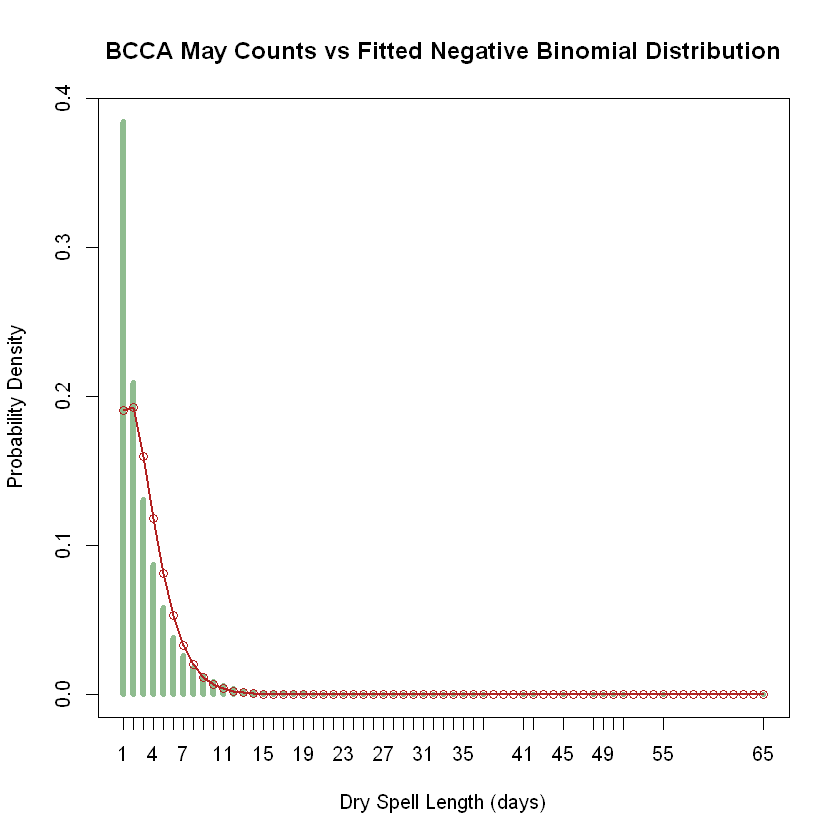

In [313]:
maxP <- max(dBCMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dMay_size, mu=BCfdNB_dMay_mu )
ttab <- table( dBCMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

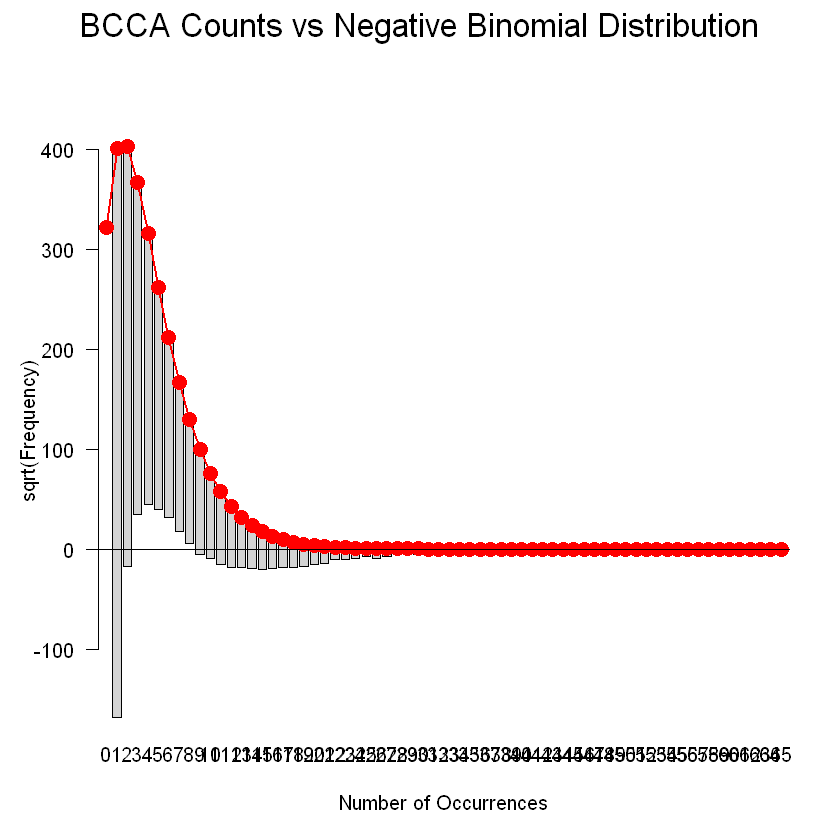

In [314]:
plot( BCgf_dMay, main="BCCA Counts vs Negative Binomial Distribution" )

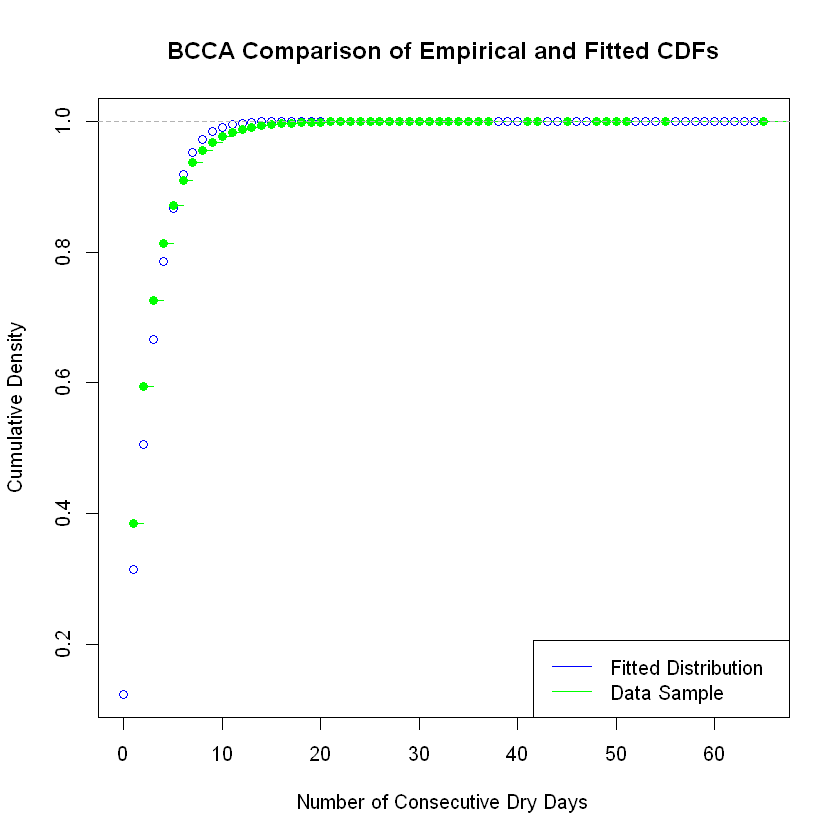

In [315]:
x <- seq(0,dBCMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dMay_mu, size=BCfdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

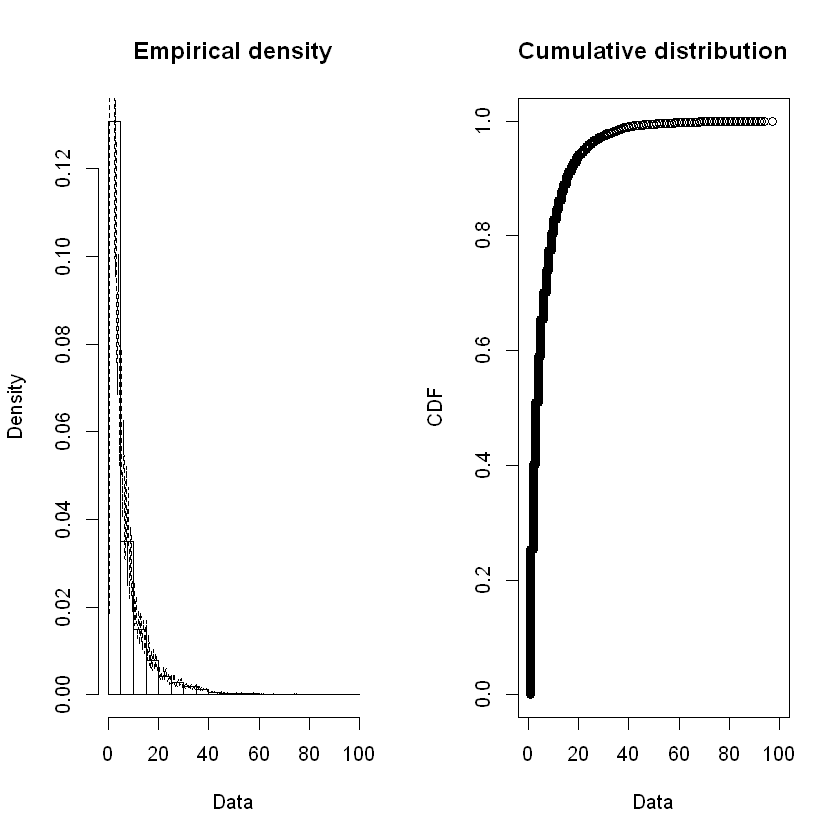

In [316]:
plotdist( dLOJun$Dry_Count, histo=TRUE, demp=TRUE )

In [317]:
LOfd_NB_dJun <- fitdist( dLOJun$Dry_Count, "nbinom" )
LOfd_GE_dJun <- fitdist( dLOJun$Dry_Count, "geom" )

In [318]:
LOfdNB_dJun_size <- LOfd_NB_dJun$estimate[["size"]]
LOfdNB_dJun_mu <- LOfd_NB_dJun$estimate[["mu"]]
cat("LOCA Jun size: ", LOfdNB_dJun_size, "\n", "LOCA Jun mu: ", LOfdNB_dJun_mu, "\n")

LOCA Jun size:  1.154822 
 LOCA Jun mu:  6.363726 


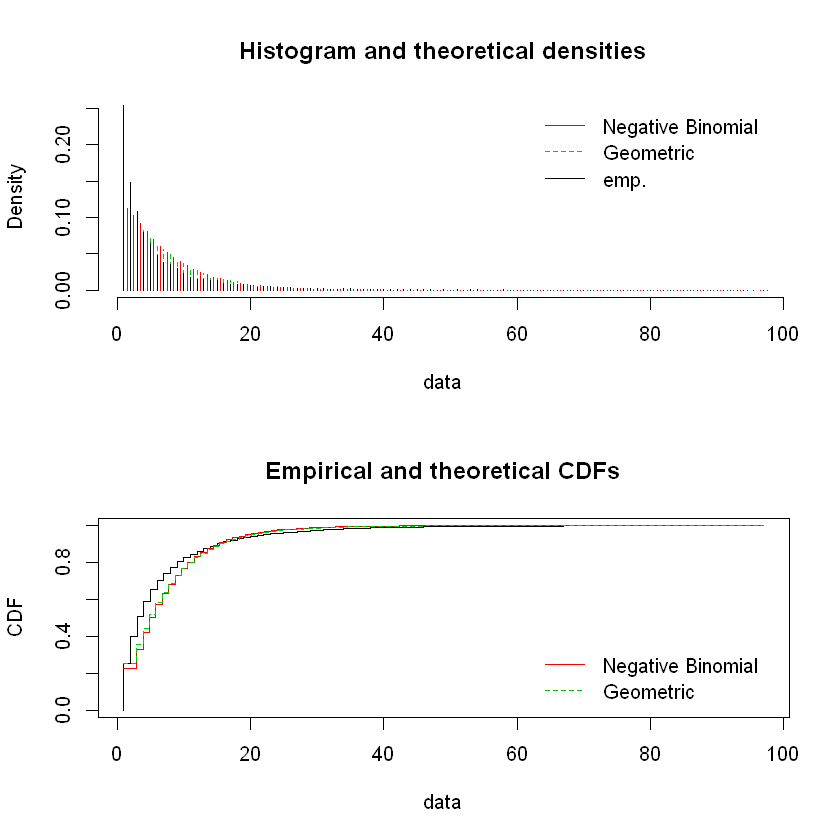

In [319]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJun, LOfd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJun, LOfd_GE_dJun), legendtext=plot.legend )

In [320]:
LOstatRes <- gofstat( list(LOfd_NB_dJun, LOfd_GE_dJun), fitnames=c("Negative Binomial", "Geometric") )

In [321]:
print( LOstatRes )

Chi-squared statistic:  198241.4 111775.7 
Degree of freedom of the Chi-squared distribution:  34 35 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     285780            255851.6196    285056.8050
<= 2     166430            115328.0519    114195.5172
<= 3     121365            102651.6709     98685.0480
<= 4      90094             90247.6561     85281.2697
<= 5      72637             78751.1831     73698.0434
<= 6      54340             68375.2343     63688.0950
<= 7      42989             59153.0469     55037.7359
<= 8      39428             51036.2928     47562.3014
<= 9      33356             43940.4014     41102.2088
<= 10     26494             37767.1177     35519.5506
<= 11     20213             32416.1408     30695.1502
<= 12     17216             27791.1281     26526.0182
<= 13     16842             23802.6501     22923.1536
<= 14     15176             20369.4452     19809.6437
<= 15     14439             17418.7223    

In [322]:
LOfdNB_dJun_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [323]:
LOfdNB_dJun_p = LOfdNB_dJun_size / (LOfdNB_dJun_size + LOfdNB_dJun_mu)
cat("LOCA prob: ", LOfdNB_dJun_p)

LOCA prob:  0.1535964

In [324]:
# add to our tracking dataframe
LOMonDistDF[6, ] <- list( 6, dLOJunMean, dLOJunBNr, LOfdNB_dJun_p, LOfdNB_dJun_mu, LOfdNB_dJun_size,
                          LOfdNB_dJun_pvalue )

In [325]:
LOgf_dJun <- goodfit( dLOJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJun_size, prob=LOfdNB_dJun_p) )

In [326]:
summary( LOgf_dJun )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          741184.7 97        0
Likelihood Ratio 508895.6 94        0


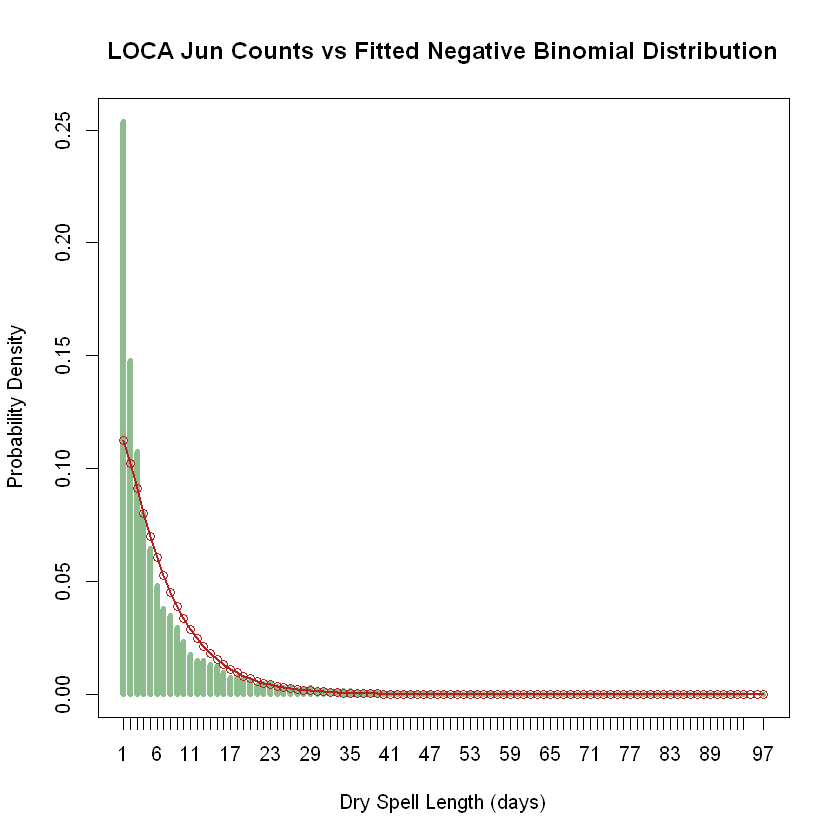

In [327]:
maxP <- max(dLOJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJun_size, mu=LOfdNB_dJun_mu )
ttab <- table( dLOJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

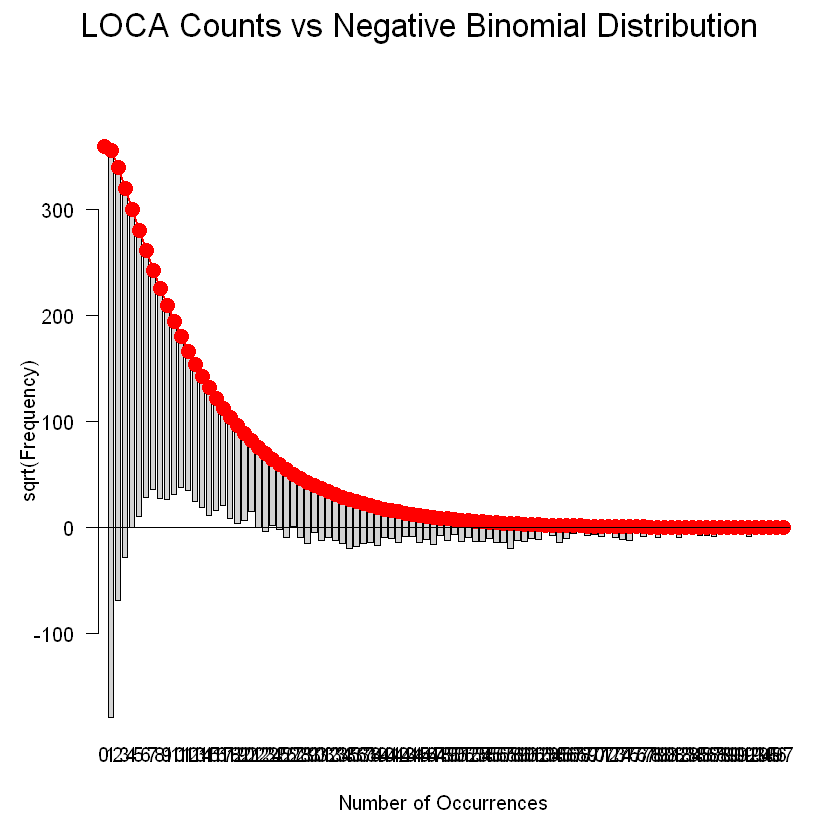

In [328]:
plot( LOgf_dJun, main="LOCA Counts vs Negative Binomial Distribution" )

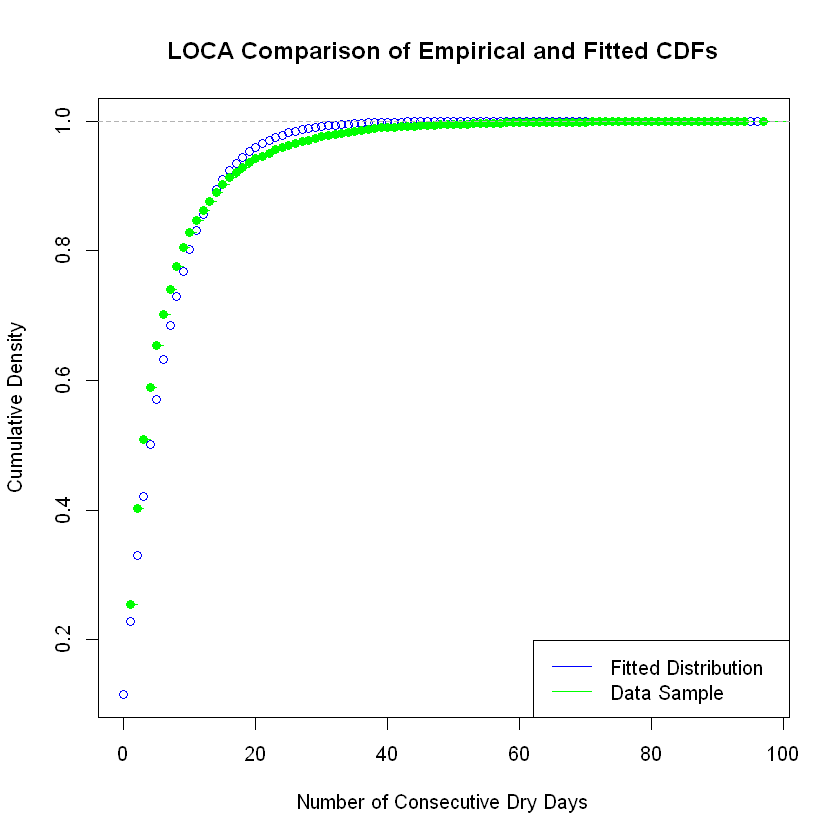

In [329]:
x <- seq(0,dLOJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJun_mu, size=LOfdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

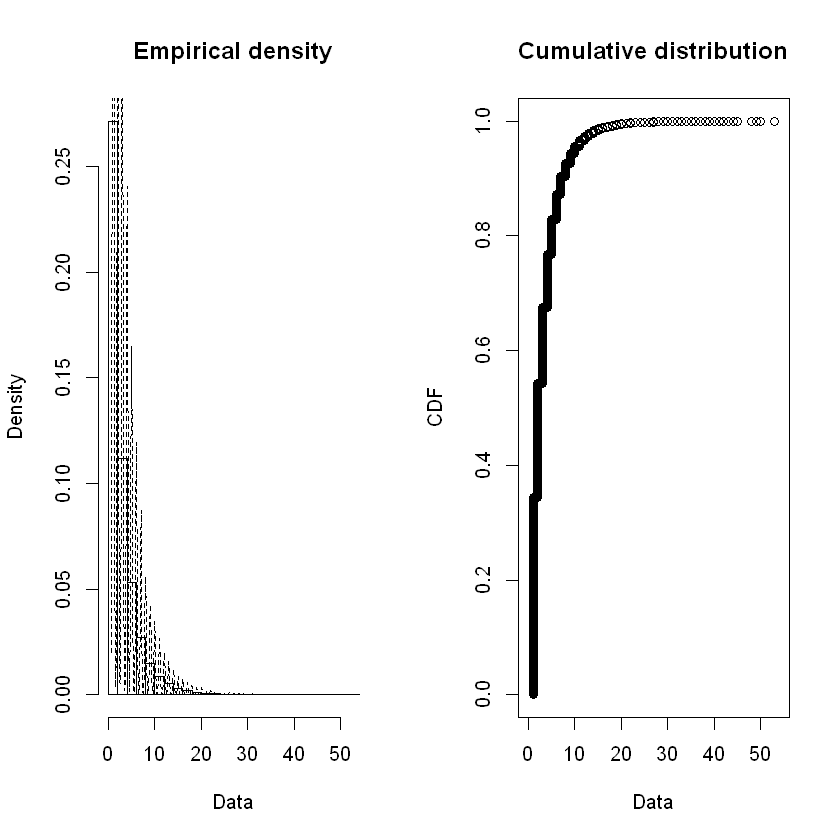

In [330]:
plotdist( dBCJun$Dry_Count, histo=TRUE, demp=TRUE )

In [331]:
BCfd_NB_dJun <- fitdist( dBCJun$Dry_Count, "nbinom" )
BCfd_GE_dJun <- fitdist( dBCJun$Dry_Count, "geom" )

In [332]:
summary( BCfd_NB_dJun )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.433685 0.006209762
mu   3.402366 0.003210974
Loglikelihood:  -1795472   AIC:  3590949   BIC:  3590972 
Correlation matrix:
             size           mu
size 1.000000e+00 6.063569e-05
mu   6.063569e-05 1.000000e+00


In [333]:
BCfdNB_dJun_size <- BCfd_NB_dJun$estimate[["size"]]
BCfdNB_dJun_mu <- BCfd_NB_dJun$estimate[["mu"]]
cat("BCCA Jun size: ", BCfdNB_dJun_size, "\n", "BCCA Jun mu: ", BCfdNB_dJun_mu, "\n")

BCCA Jun size:  2.433685 
 BCCA Jun mu:  3.402366 


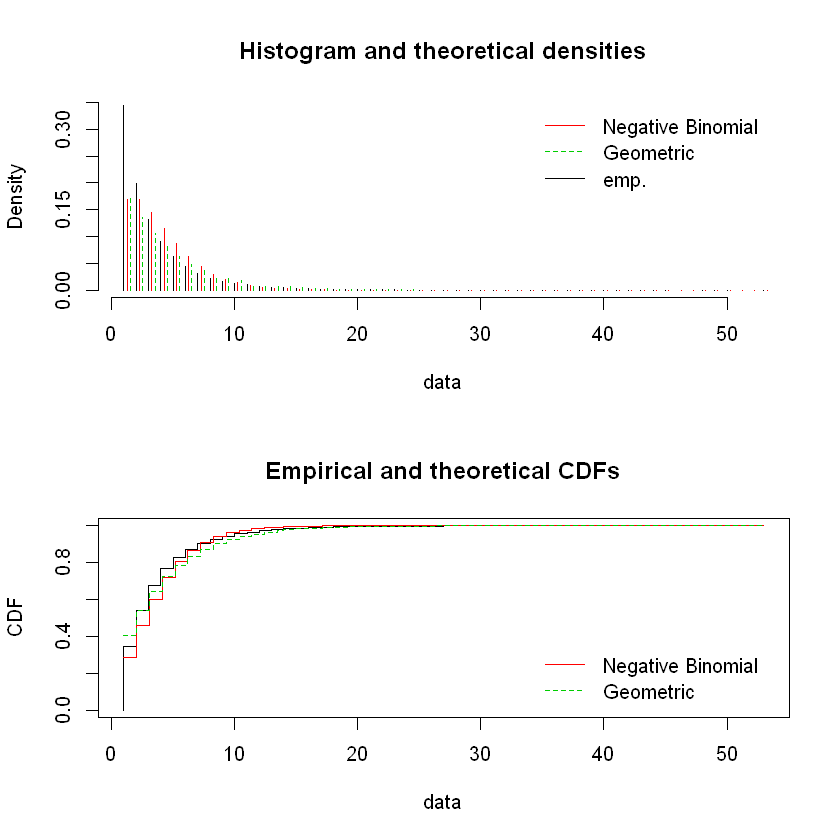

In [334]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJun, BCfd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJun, BCfd_GE_dJun), legendtext=plot.legend )

In [335]:
BCstatRes <- gofstat( list(BCfd_NB_dJun, BCfd_GE_dJun), fitnames=c("Negative Binomial", "Geometric") )

In [336]:
print(BCstatRes)

Chi-squared statistic:  112995.5 44627.61 
Degree of freedom of the Chi-squared distribution:  16 17 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     272134            227767.5664     318647.214
<= 2     157554            133723.4751     107357.893
<= 3     104613            115216.1088      82972.210
<= 4      72562             91245.1188      64125.584
<= 5      49441             68448.1007      49559.853
<= 6      34276             49439.7513      38302.639
<= 7      25201             34726.2259      29602.430
<= 8      17495             23873.2168      22878.421
<= 9      13080             16134.9687      17681.729
<= 10     10115             10755.1463      13665.433
<= 11      7712              7087.3760      10561.414
<= 12      5844              4625.5285       8162.454
<= 13      4703              2994.0373       6308.403
<= 14      3600              1924.2468       4875.488
<= 15      2679              1229.0412    

In [337]:
BCfdNB_dJun_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [338]:
BCfdNB_dJun_p = BCfdNB_dJun_size / (BCfdNB_dJun_size + BCfdNB_dJun_mu)
cat("BCCA prob: ", BCfdNB_dJun_p)

BCCA prob:  0.4170088

In [339]:
# add to our tracking dataframe
BCMonDistDF[6, ] <- list( 6, dBCJunMean, dBCJunBNr, BCfdNB_dJun_p, BCfdNB_dJun_mu, BCfdNB_dJun_size,
                          BCfdNB_dJun_pvalue )

In [340]:
BCgf_dJun <- goodfit( dBCJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJun_size, prob=BCfdNB_dJun_p) )

In [341]:
summary( BCgf_dJun )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          1142998.2 53        0
Likelihood Ratio  352189.1 48        0


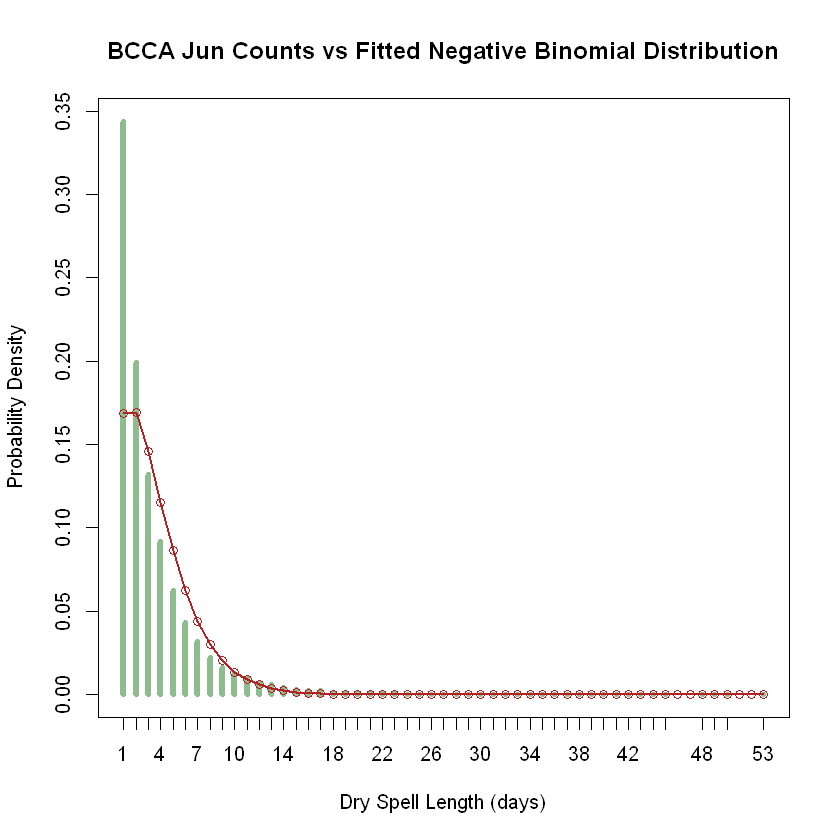

In [342]:
maxP <- max(dBCJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJun_size, mu=BCfdNB_dJun_mu )
ttab <- table( dBCJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

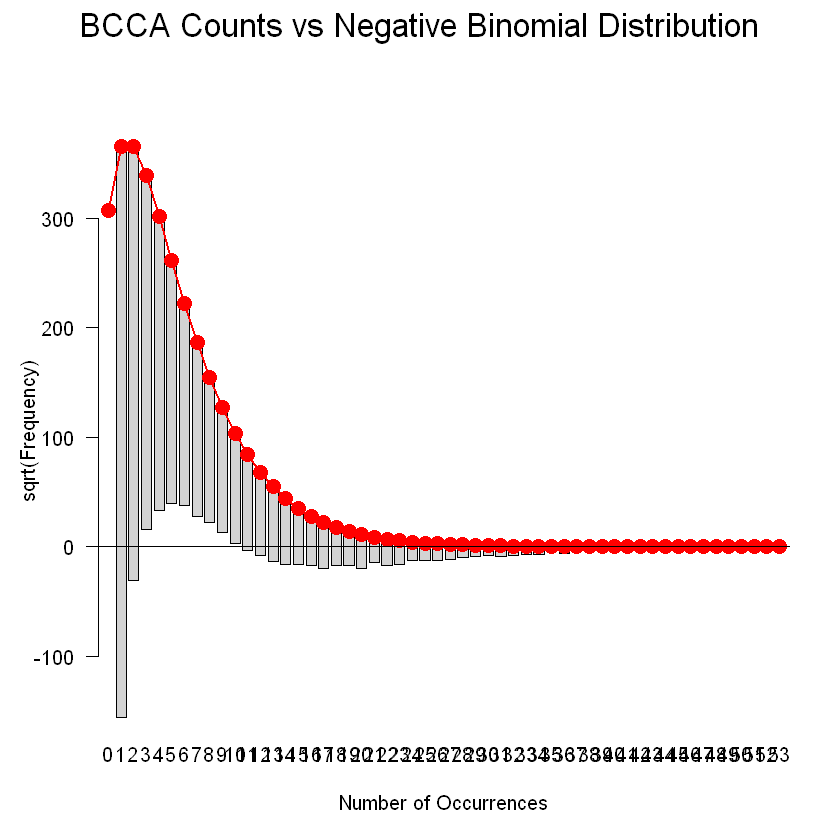

In [343]:
plot( BCgf_dJun, main="BCCA Counts vs Negative Binomial Distribution" )

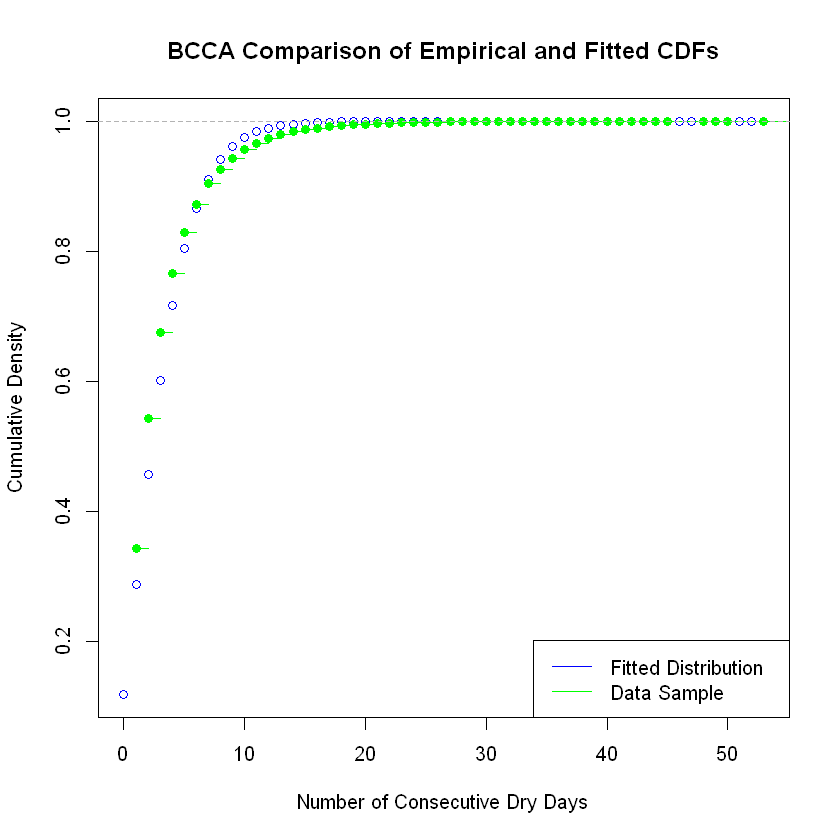

In [344]:
x <- seq(0,dBCJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJun_mu, size=BCfdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

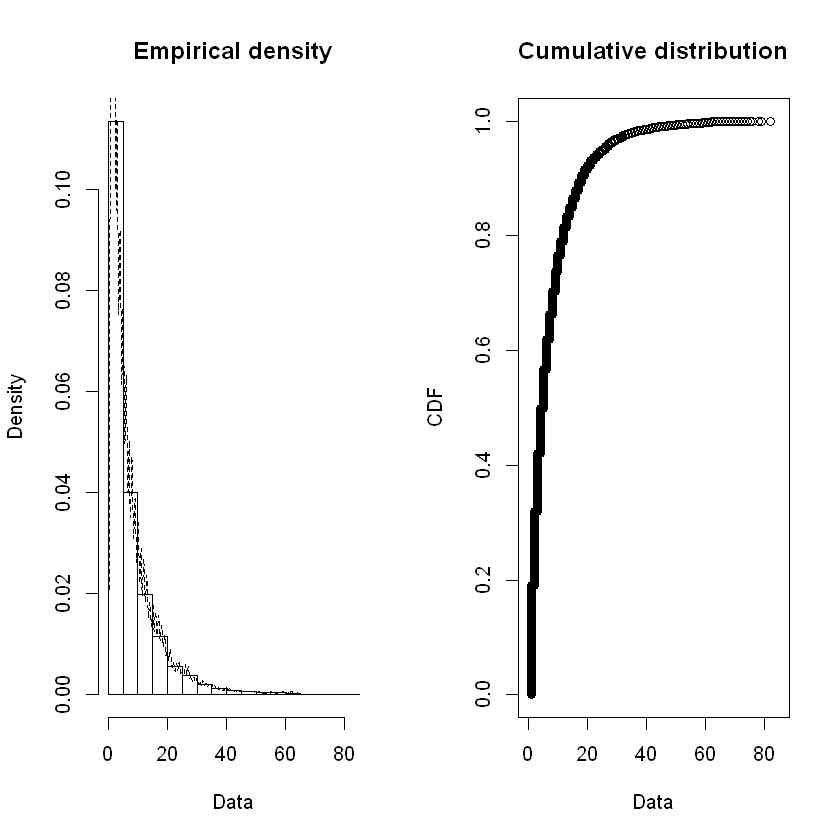

In [345]:
plotdist( dLOJul$Dry_Count, histo=TRUE, demp=TRUE )

In [346]:
LOfd_NB_dJul <- fitdist( dLOJul$Dry_Count, "nbinom" )
LOfd_GE_dJul <- fitdist( dLOJul$Dry_Count, "geom" )

In [347]:
LOfdNB_dJul_size <- LOfd_NB_dJul$estimate[["size"]]
LOfdNB_dJul_mu <- LOfd_NB_dJul$estimate[["mu"]]
cat("LOCA Jul size: ", LOfdNB_dJul_size, "\n", "LOCA Jul mu: ", LOfdNB_dJul_mu, "\n")

LOCA Jul size:  1.223472 
 LOCA Jul mu:  7.635392 


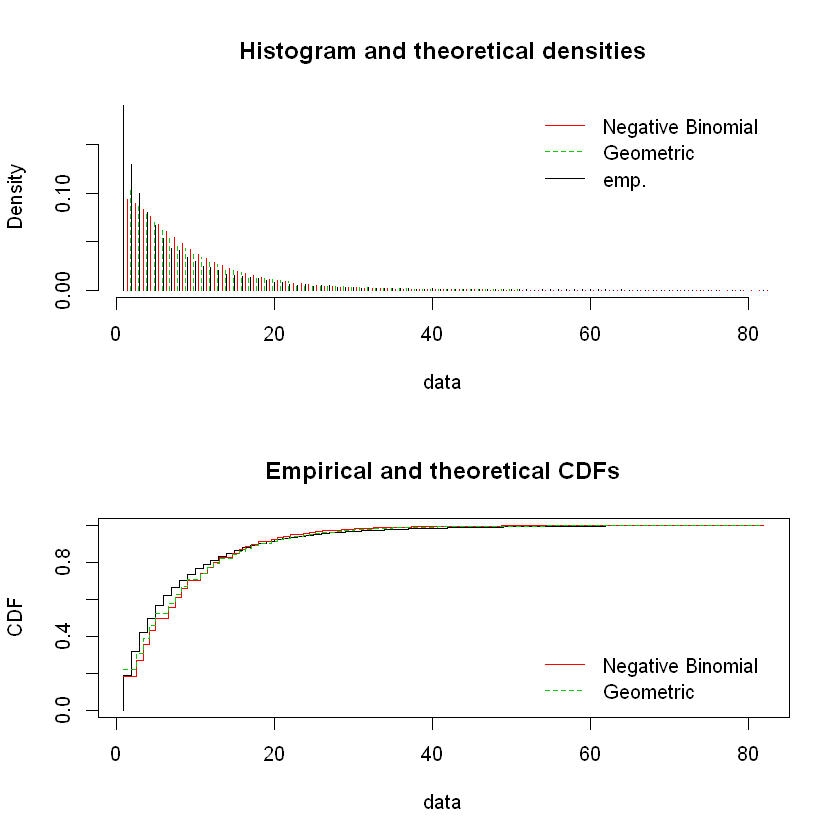

In [348]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJul, LOfd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJul, LOfd_GE_dJul), legendtext=plot.legend )

In [349]:
LOstatRes <- gofstat( list(LOfd_NB_dJul, LOfd_GE_dJul), fitnames=c("Negative Binomial", "Geometric") )

In [350]:
print( LOstatRes )

Chi-squared statistic:  80815.53 45866.73 
Degree of freedom of the Chi-squared distribution:  37 38 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     178356            170942.9719    204583.4004
<= 2     122029             84071.1311     84888.9420
<= 3      93567             77857.9212     75059.5597
<= 4      74863             70854.2186     66368.3322
<= 5      62953             63798.1772     58683.4713
<= 6      49862             57035.2117     51888.4488
<= 7      40027             50727.5998     45880.2292
<= 8      38178             44943.0819     40567.7079
<= 9      31667             39697.9502     35870.3292
<= 10     27438             34980.0000     31716.8650
<= 11     22958             30761.5107     28044.3350
<= 12     21618             27006.8735     24797.0511
<= 13     19173             23677.1690     21925.7738
<= 14     14823             20732.9298     19386.9648
<= 15     14611             18135.7887    

In [351]:
LOfdNB_dJul_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [352]:
LOfdNB_dJul_p = LOfdNB_dJul_size / (LOfdNB_dJul_size + LOfdNB_dJul_mu)
cat("LOCA prob: ", LOfdNB_dJul_p)

LOCA prob:  0.138107

In [353]:
# add to our tracking dataframe
LOMonDistDF[7, ] <- list( 7, dLOJulMean, dLOJulBNr, LOfdNB_dJul_p, LOfdNB_dJul_mu, LOfdNB_dJul_size,
                          LOfdNB_dJul_pvalue )

In [354]:
LOgf_dJul <- goodfit( dLOJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJul_size, prob=LOfdNB_dJul_p) )

In [355]:
summary( LOgf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          270848.6 82        0
Likelihood Ratio 295306.0 78        0


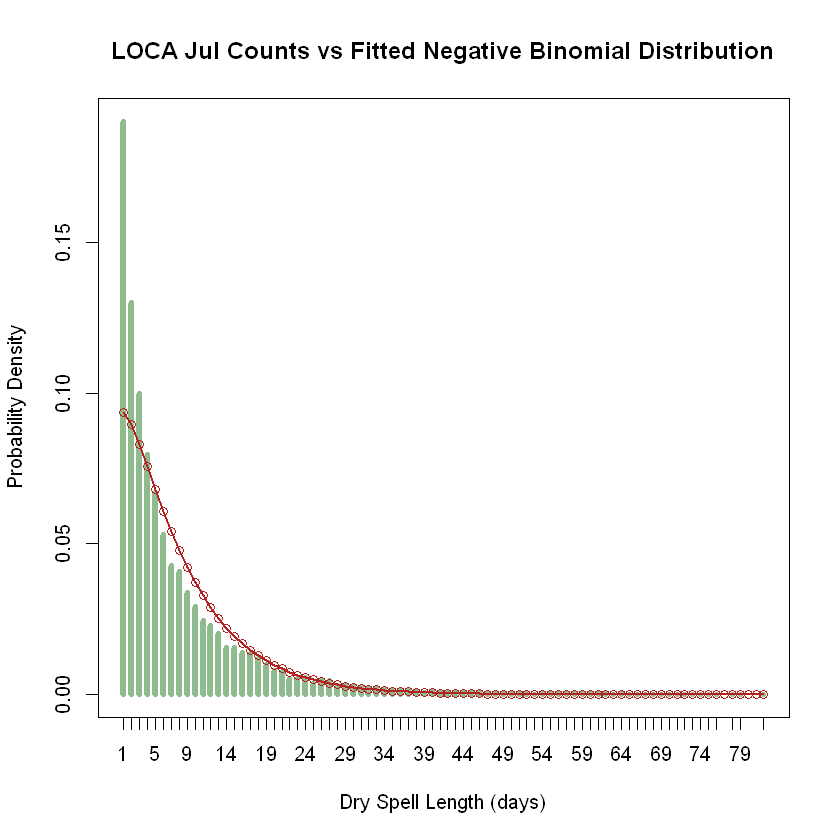

In [356]:
maxP <- max(dLOJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJul_size, mu=LOfdNB_dJul_mu )
ttab <- table( dLOJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

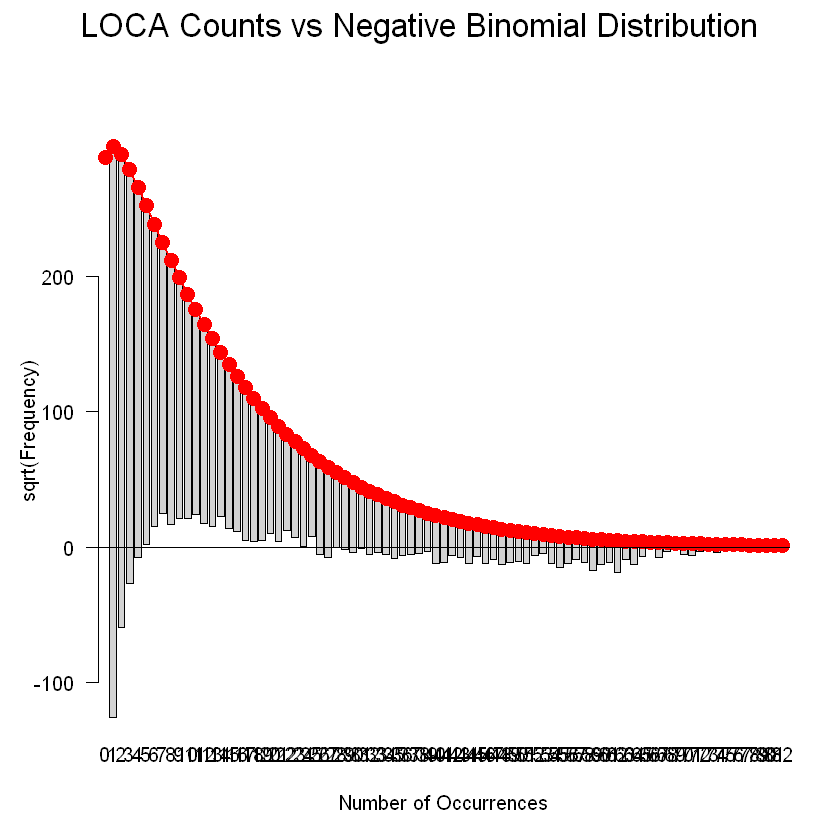

In [357]:
plot( LOgf_dJul, main="LOCA Counts vs Negative Binomial Distribution" )

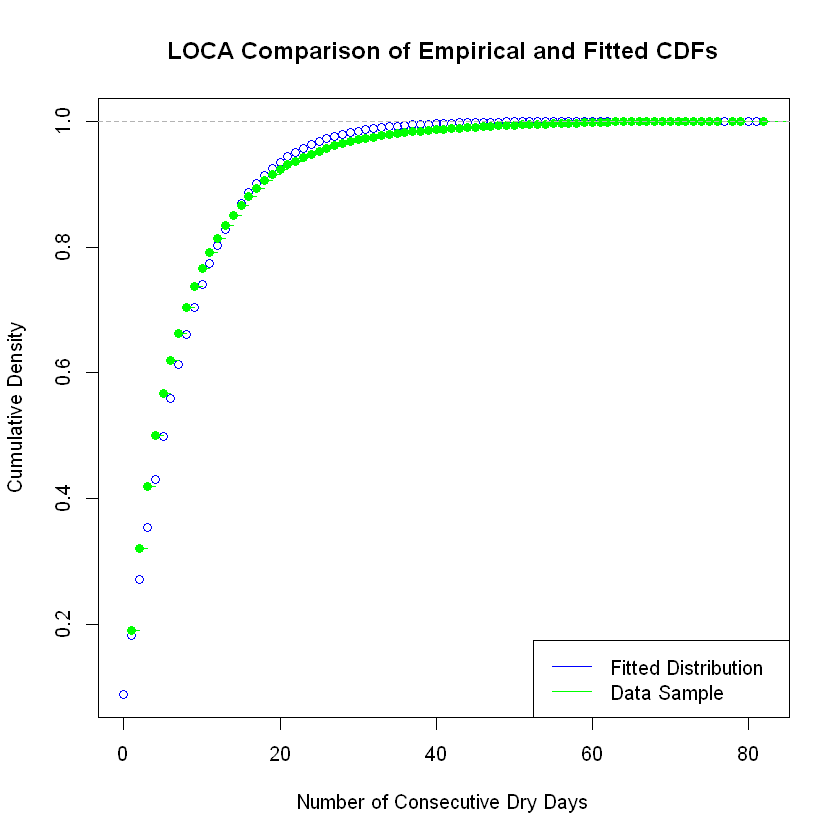

In [358]:
x <- seq(0,dLOJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJul_mu, size=LOfdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

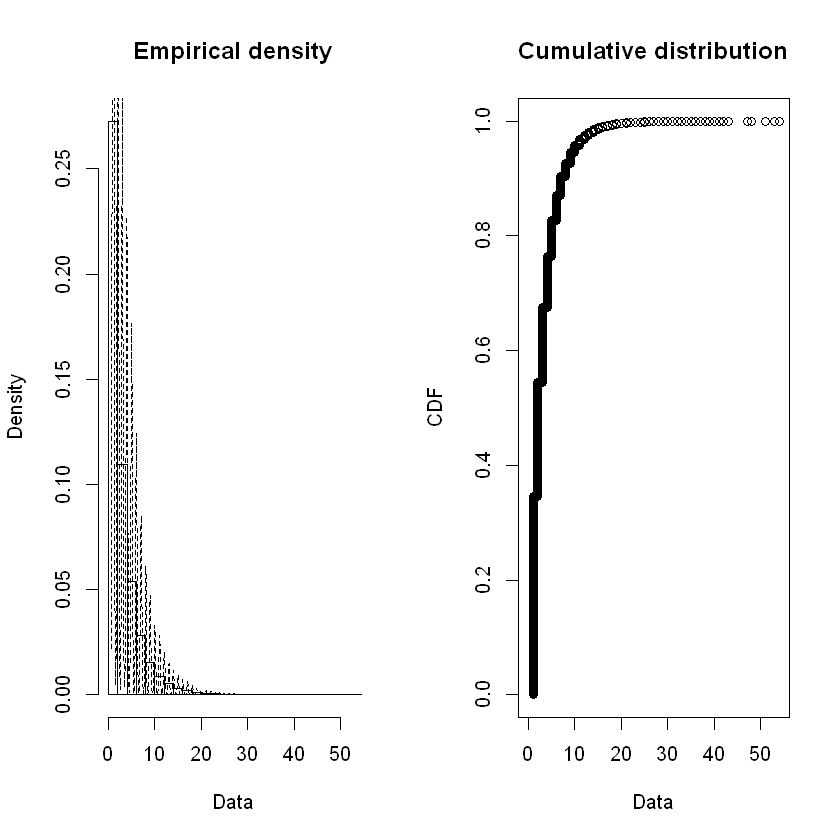

In [359]:
plotdist( dBCJul$Dry_Count, histo=TRUE, demp=TRUE )

In [360]:
BCfd_NB_dJul <- fitdist( dBCJul$Dry_Count, "nbinom" )
BCfd_GE_dJul <- fitdist( dBCJul$Dry_Count, "geom" )

In [361]:
summary( BCfd_NB_dJul )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.503800 0.006400064
mu   3.381664 0.003119634
Loglikelihood:  -1845534   AIC:  3691073   BIC:  3691096 
Correlation matrix:
             size           mu
size 1.0000000000 0.0002154702
mu   0.0002154702 1.0000000000


In [362]:
BCfdNB_dJul_size <- BCfd_NB_dJul$estimate[["size"]]
BCfdNB_dJul_mu <- BCfd_NB_dJul$estimate[["mu"]]
cat("BCCA Jul size: ", BCfdNB_dJul_size, "\n", "BCCA Jul mu: ", BCfdNB_dJul_mu, "\n")

BCCA Jul size:  2.5038 
 BCCA Jul mu:  3.381664 


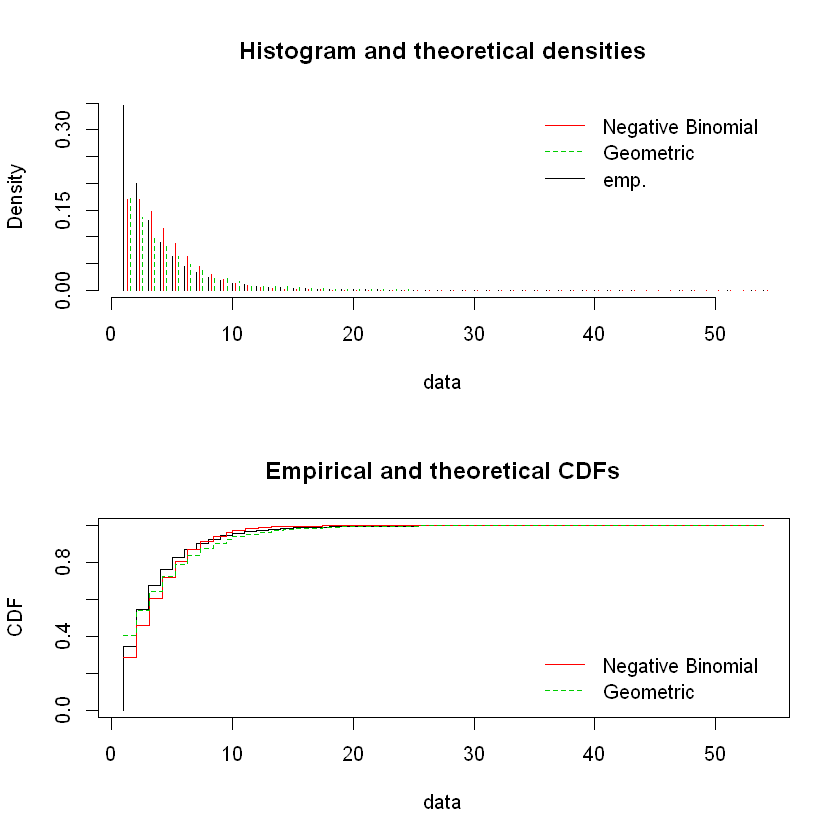

In [363]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJul, BCfd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJul, BCfd_GE_dJul), legendtext=plot.legend )

In [364]:
BCstatRes <- gofstat( list(BCfd_NB_dJul, BCfd_GE_dJul), fitnames=c("Negative Binomial", "Geometric") )

In [365]:
print(BCstatRes)

Chi-squared statistic:  95015.81 44088.47 
Degree of freedom of the Chi-squared distribution:  16 17 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     281815            234311.9313     330173.176
<= 2     163436            139141.5280     111003.499
<= 3     106328            120022.9666      85672.504
<= 4      72384             94889.1941      66122.041
<= 5      51191             70919.1761      51032.993
<= 6      36413             50961.6443      39387.266
<= 7      26792             35571.9916      30399.093
<= 8      18820             24280.9254      23462.021
<= 9      14450             16282.4188      18107.989
<= 10     10320             10762.4215      13975.746
<= 11      8198              7029.2515      10786.481
<= 12      5842              4544.9969       8325.007
<= 13      4740              2913.5454       6425.240
<= 14      3691              1853.8802       4959.001
<= 15      2694              1171.9906    

In [366]:
BCfdNB_dJul_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [367]:
BCfdNB_dJul_p = BCfdNB_dJul_size / (BCfdNB_dJul_size + BCfdNB_dJul_mu)
cat("BCCA prob: ", BCfdNB_dJul_p)

BCCA prob:  0.425421

In [368]:
# add to our tracking dataframe
BCMonDistDF[7, ] <- list( 7, dBCJulMean, dBCJulBNr, BCfdNB_dJul_p, BCfdNB_dJul_mu, BCfdNB_dJul_size,
                          BCfdNB_dJul_pvalue )

In [369]:
BCgf_dJul <- goodfit( dBCJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJul_size, prob=BCfdNB_dJul_p) )

In [370]:
summary( BCgf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          4180104.1 54        0
Likelihood Ratio  357190.1 47        0


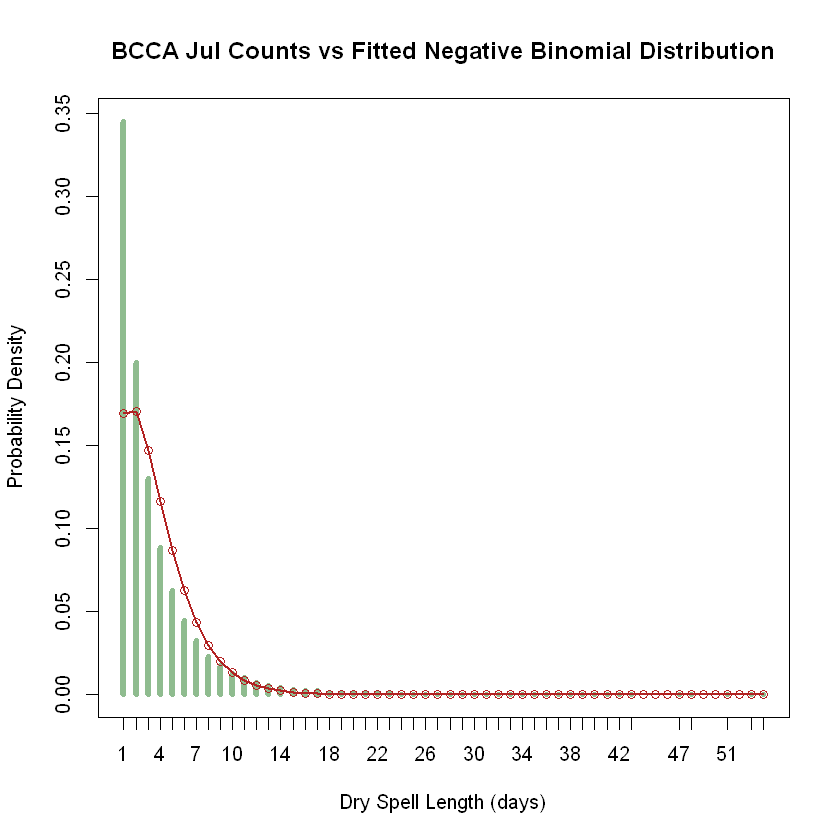

In [371]:
maxP <- max(dBCJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJul_size, mu=BCfdNB_dJul_mu )
ttab <- table( dBCJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

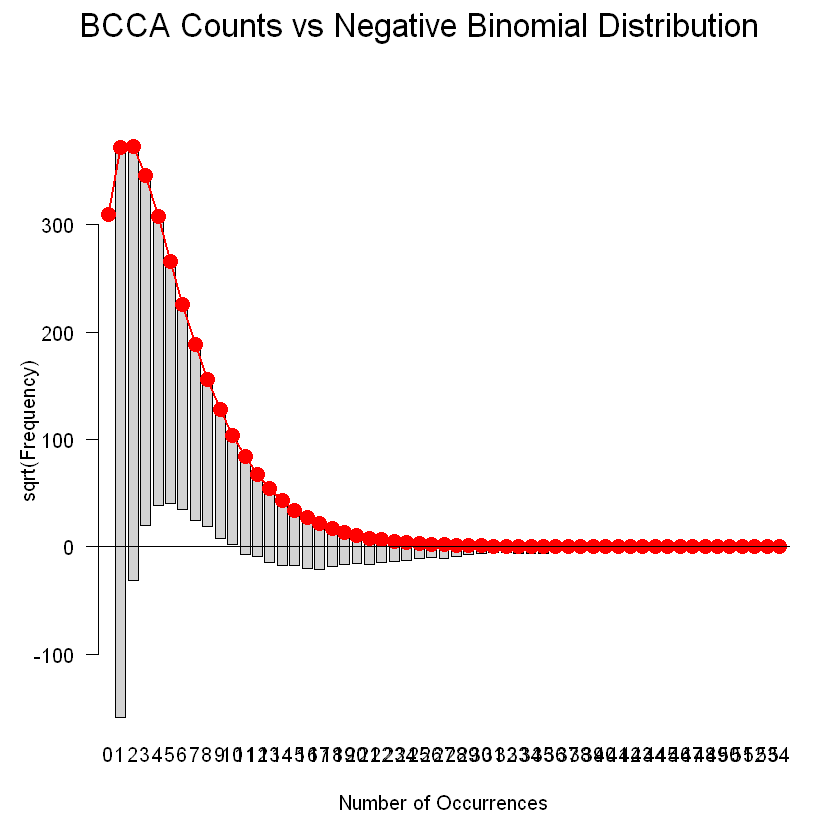

In [372]:
plot( BCgf_dJul, main="BCCA Counts vs Negative Binomial Distribution" )

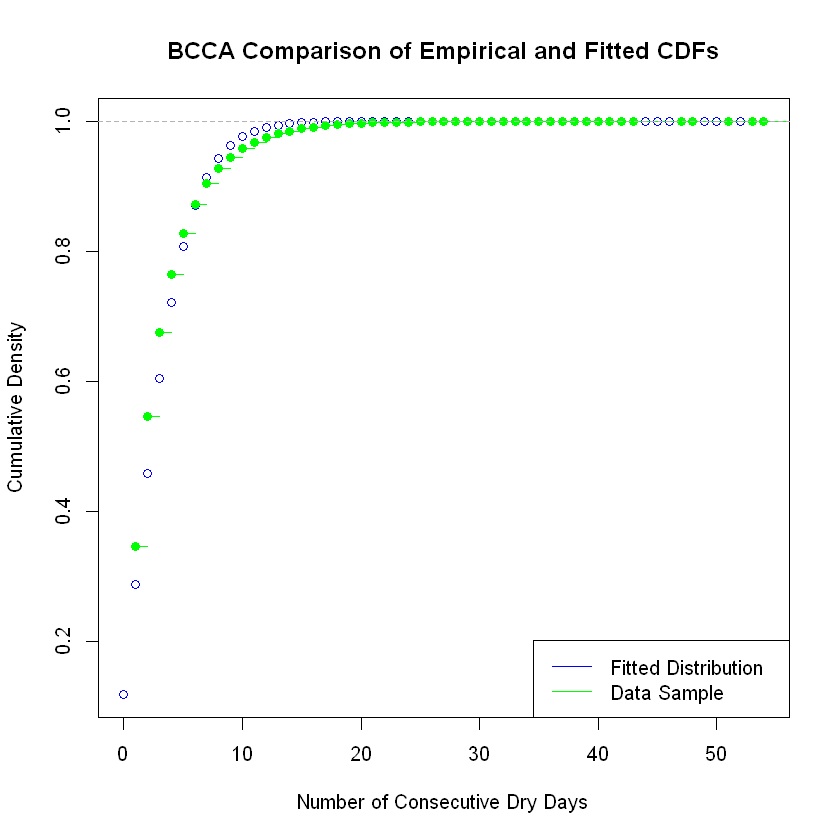

In [373]:
x <- seq(0,dBCJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJul_mu, size=BCfdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

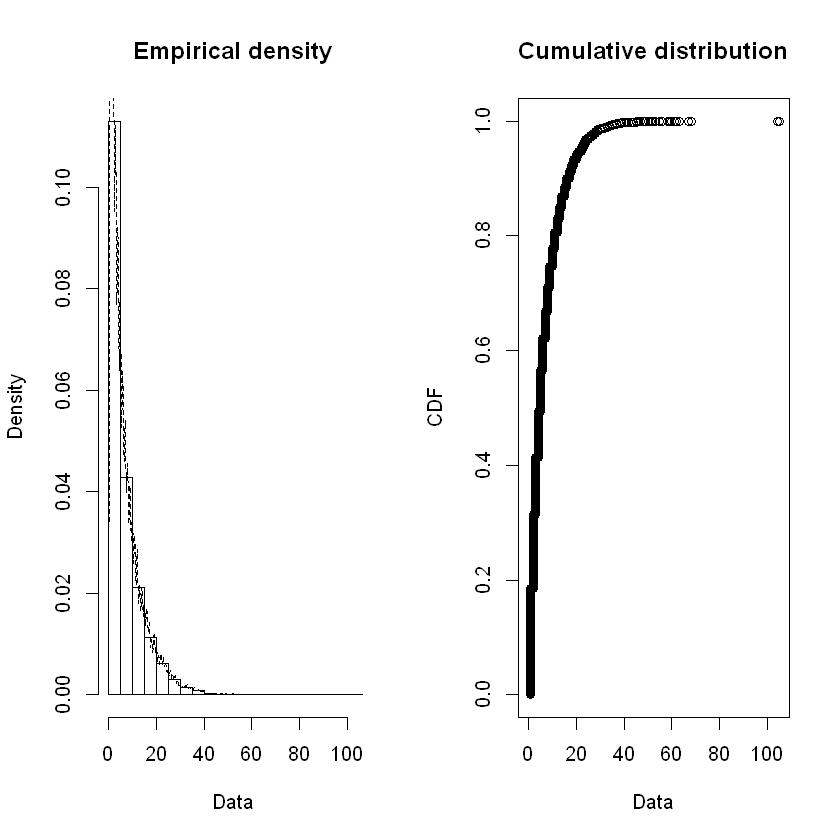

In [374]:
plotdist( dLOAug$Dry_Count, histo=TRUE, demp=TRUE )

In [375]:
LOfd_NB_dAug <- fitdist( dLOAug$Dry_Count, "nbinom" )
LOfd_GE_dAug <- fitdist( dLOAug$Dry_Count, "geom" )

In [376]:
LOfdNB_dAug_size <- LOfd_NB_dAug$estimate[["size"]]
LOfdNB_dAug_mu <- LOfd_NB_dAug$estimate[["mu"]]
cat("LOCA Aug size: ", LOfdNB_dAug_size, "\n", "LOCA Aug mu: ", LOfdNB_dAug_mu, "\n")

LOCA Aug size:  1.45554 
 LOCA Aug mu:  7.010766 


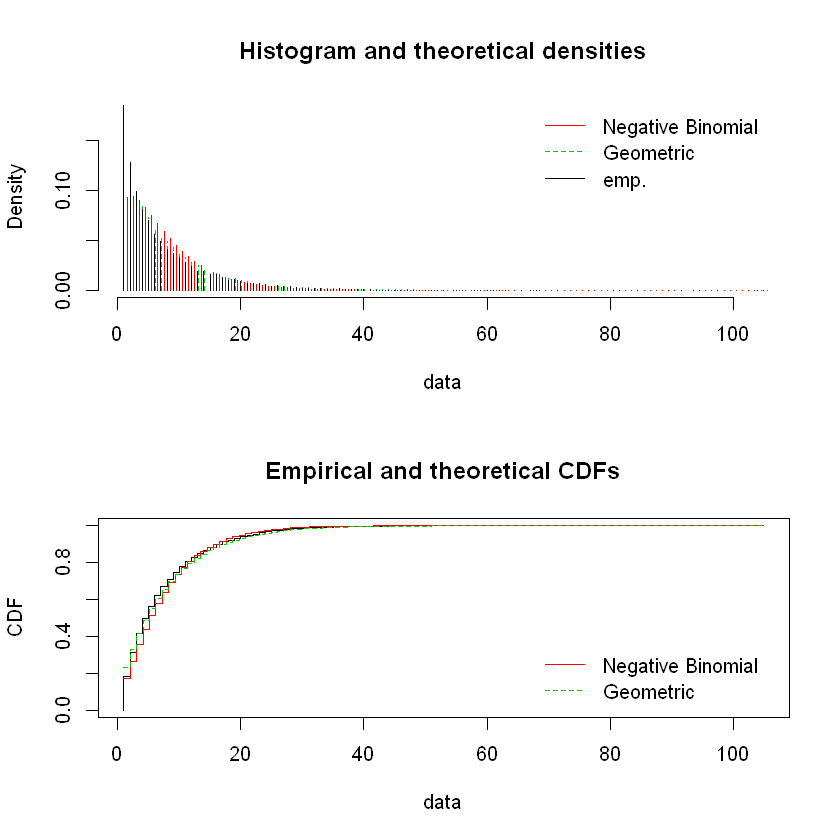

In [377]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dAug, LOfd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dAug, LOfd_GE_dAug), legendtext=plot.legend )

In [378]:
LOstatRes <- gofstat( list(LOfd_NB_dAug, LOfd_GE_dAug), fitnames=c("Negative Binomial", "Geometric") )

In [379]:
print( LOstatRes )

Chi-squared statistic:  34625.75 27158.01 
Degree of freedom of the Chi-squared distribution:  31 32 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     172524             158241.722     217855.754
<= 2     119896              87930.033      88986.724
<= 3      92650              83869.377      77879.913
<= 4      75420              77359.791      68159.390
<= 5      65247              69896.357      59652.127
<= 6      51828              62274.089      52206.691
<= 7      45272              54923.722      45690.552
<= 8      37673              48070.964      39987.721
<= 9      34238              41821.362      34996.683
<= 10     30322              36208.969      30628.598
<= 11     25649              31225.583      26805.713
<= 12     22226              26838.818      23459.978
<= 13     17685              23003.434      20531.839
<= 14     17890              19668.465      17969.173
<= 15     15160              16781.660    

In [380]:
LOfdNB_dAug_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [381]:
LOfdNB_dAug_p = LOfdNB_dAug_size / (LOfdNB_dAug_size + LOfdNB_dAug_mu)
cat("LOCA prob: ", LOfdNB_dAug_p)

LOCA prob:  0.1719215

In [382]:
# add to our tracking dataframe
LOMonDistDF[8, ] <- list( 8, dLOAugMean, dLOAugBNr, LOfdNB_dAug_p, LOfdNB_dAug_mu, LOfdNB_dAug_size,
                          LOfdNB_dAug_pvalue )

In [383]:
LOgf_dAug <- goodfit( dLOAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dAug_size, prob=LOfdNB_dAug_p) )

In [384]:
summary( LOgf_dAug )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          221747.3 105        0
Likelihood Ratio 242448.2  64        0


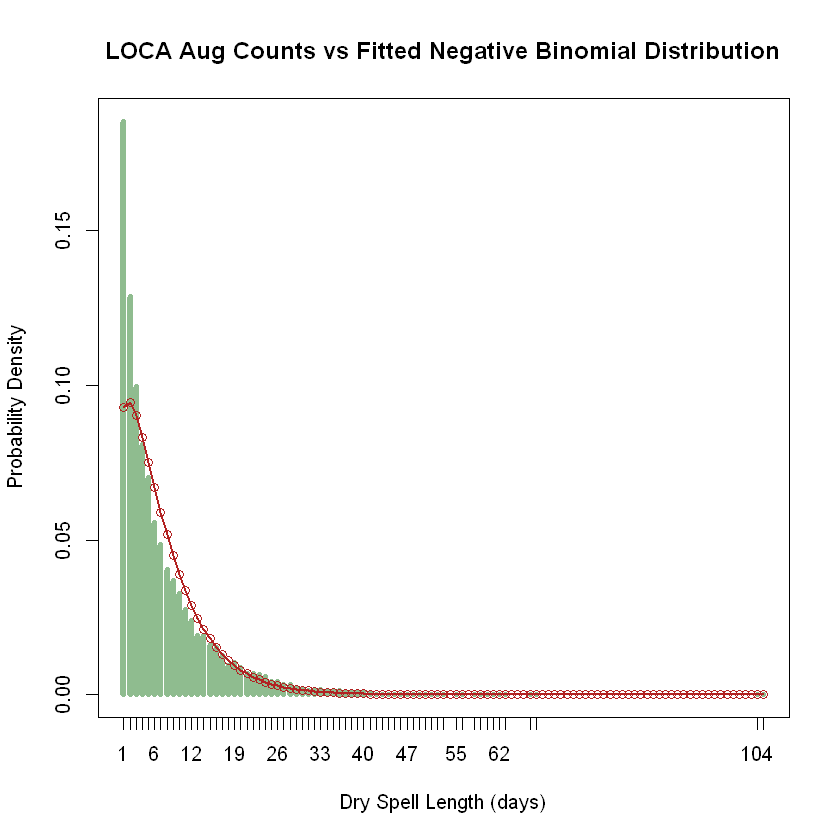

In [385]:
maxP <- max(dLOAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dAug_size, mu=LOfdNB_dAug_mu )
ttab <- table( dLOAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

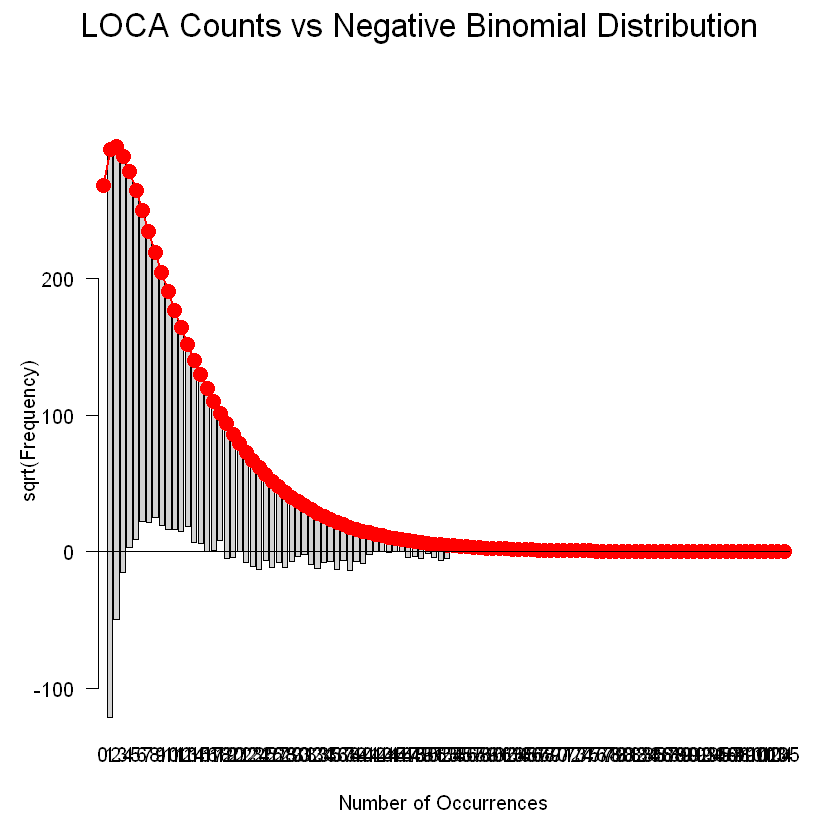

In [386]:
plot( LOgf_dAug, main="LOCA Counts vs Negative Binomial Distribution" )

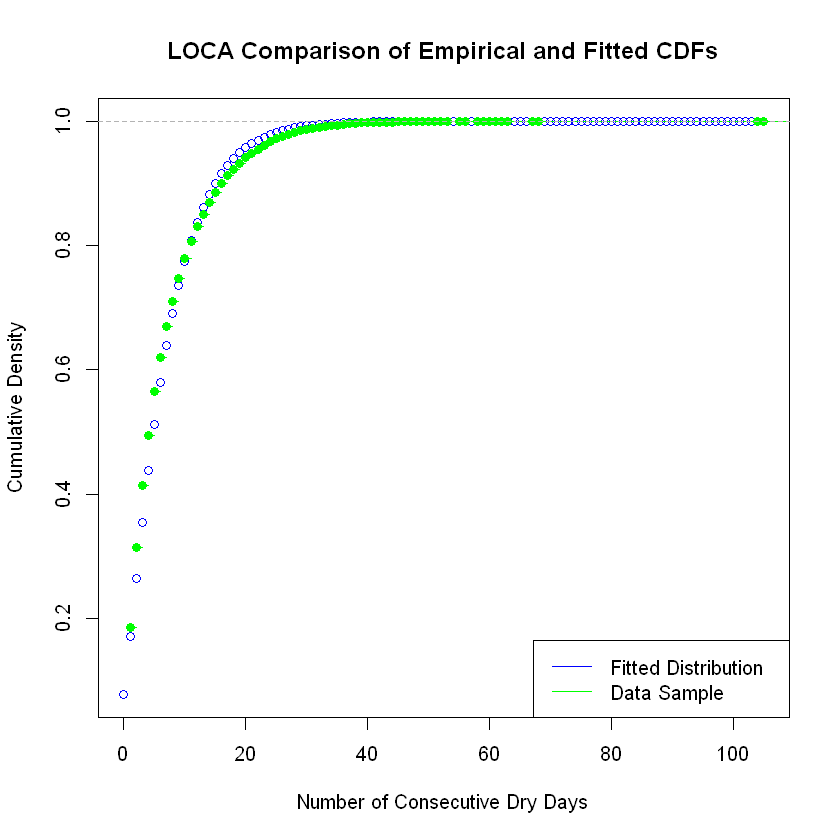

In [387]:
x <- seq(0,dLOAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dAug_mu, size=LOfdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

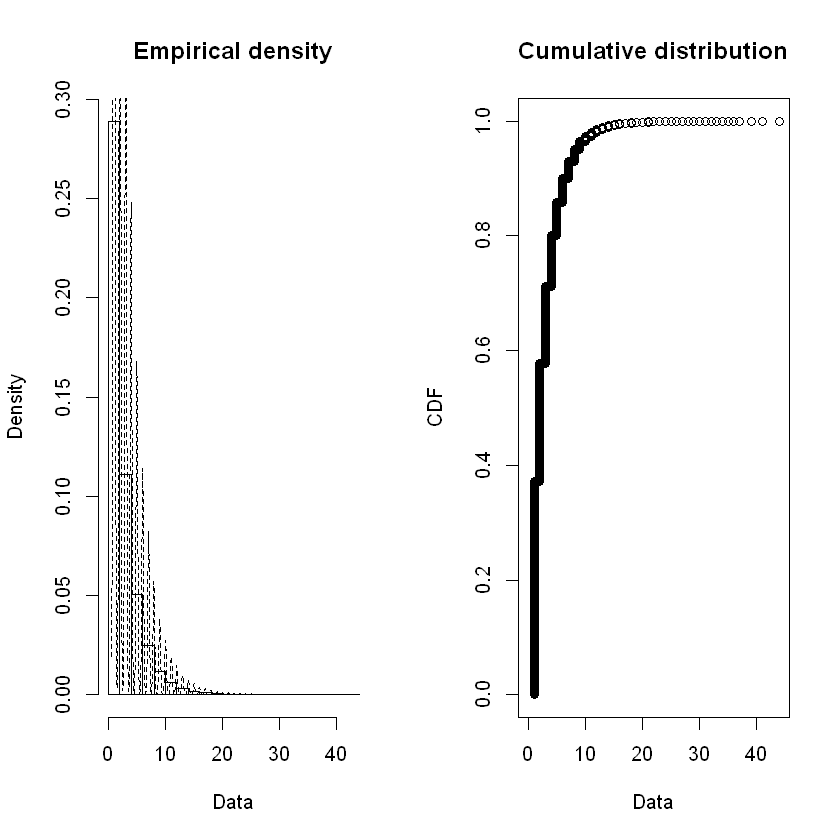

In [388]:
plotdist( dBCAug$Dry_Count, histo=TRUE, demp=TRUE )

In [389]:
BCfd_NB_dAug <- fitdist( dBCAug$Dry_Count, "nbinom" )
BCfd_GE_dAug <- fitdist( dBCAug$Dry_Count, "geom" )

In [390]:
summary( BCfd_NB_dAug )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 3.154095 0.009286711
mu   3.031561 0.002674407
Loglikelihood:  -1775213   AIC:  3550430   BIC:  3550453 
Correlation matrix:
             size           mu
size 1.0000000000 0.0001582056
mu   0.0001582056 1.0000000000


In [391]:
BCfdNB_dAug_size <- BCfd_NB_dAug$estimate[["size"]]
BCfdNB_dAug_mu <- BCfd_NB_dAug$estimate[["mu"]]
cat("BCCA Aug size: ", BCfdNB_dAug_size, "\n", "BCCA Aug mu: ", BCfdNB_dAug_mu, "\n")

BCCA Aug size:  3.154095 
 BCCA Aug mu:  3.031561 


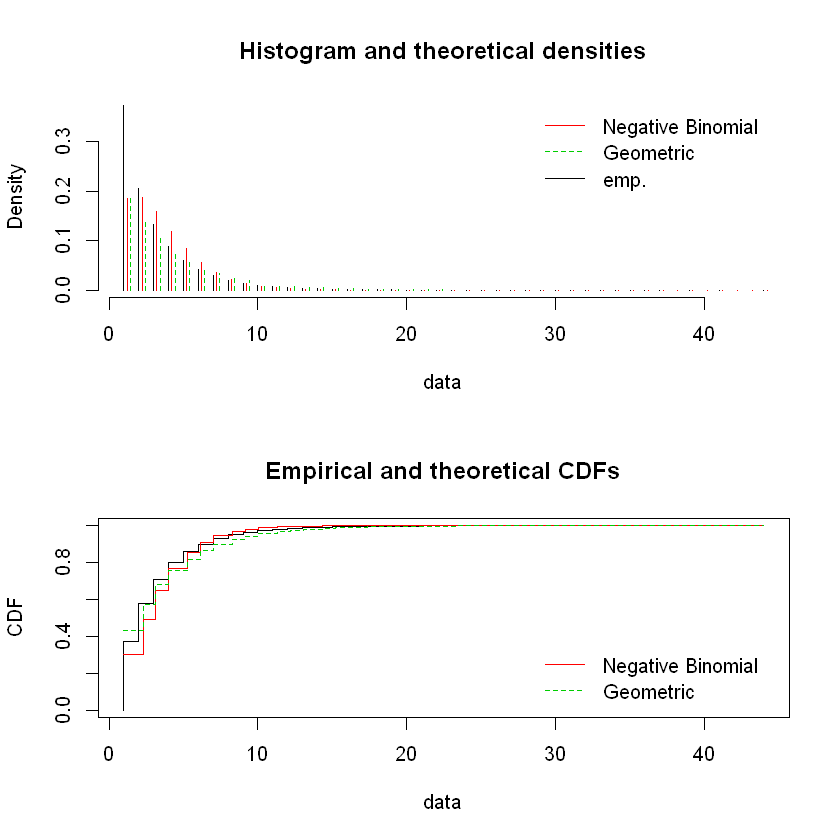

In [392]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dAug, BCfd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dAug, BCfd_GE_dAug), legendtext=plot.legend )

In [393]:
BCstatRes <- gofstat( list(BCfd_NB_dAug, BCfd_GE_dAug), fitnames=c("Negative Binomial", "Geometric") )

In [394]:
print(BCstatRes)

Chi-squared statistic:  109233.8 49755.98 
Degree of freedom of the Chi-squared distribution:  14 15 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     309446           252858.55008     361145.945
<= 2     170845           156291.15808     116563.277
<= 3     110936           131597.03376      87652.683
<= 4      73814            99227.22119      65912.637
<= 5      49070            69581.86269      49564.663
<= 6      34747            46344.80813      37271.393
<= 7      24430            29702.90896      28027.160
<= 8      16700            18476.96938      21075.727
<= 9      11454            11222.84817      15848.422
<= 10      8191             6685.07421      11917.619
<= 11      5836             3917.91527       8961.753
<= 12      4157             2264.83422       6739.015
<= 13      3040             1293.90857       5067.572
<= 14      2195              731.70951       3810.688
<= 16      2642              638.15610    

In [395]:
BCfdNB_dAug_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [396]:
BCfdNB_dAug_p = BCfdNB_dAug_size / (BCfdNB_dAug_size + BCfdNB_dAug_mu)
cat("BCCA prob: ", BCfdNB_dAug_p)

BCCA prob:  0.5099047

In [397]:
# add to our tracking dataframe
BCMonDistDF[8, ] <- list( 8, dBCAugMean, dBCAugBNr, BCfdNB_dAug_p, BCfdNB_dAug_mu, BCfdNB_dAug_size,
                          BCfdNB_dAug_pvalue )

In [398]:
BCgf_dAug <- goodfit( dBCAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dAug_size, prob=BCfdNB_dAug_p) )

In [399]:
summary( BCgf_dAug )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          1085441.5 44        0
Likelihood Ratio  367740.5 39        0


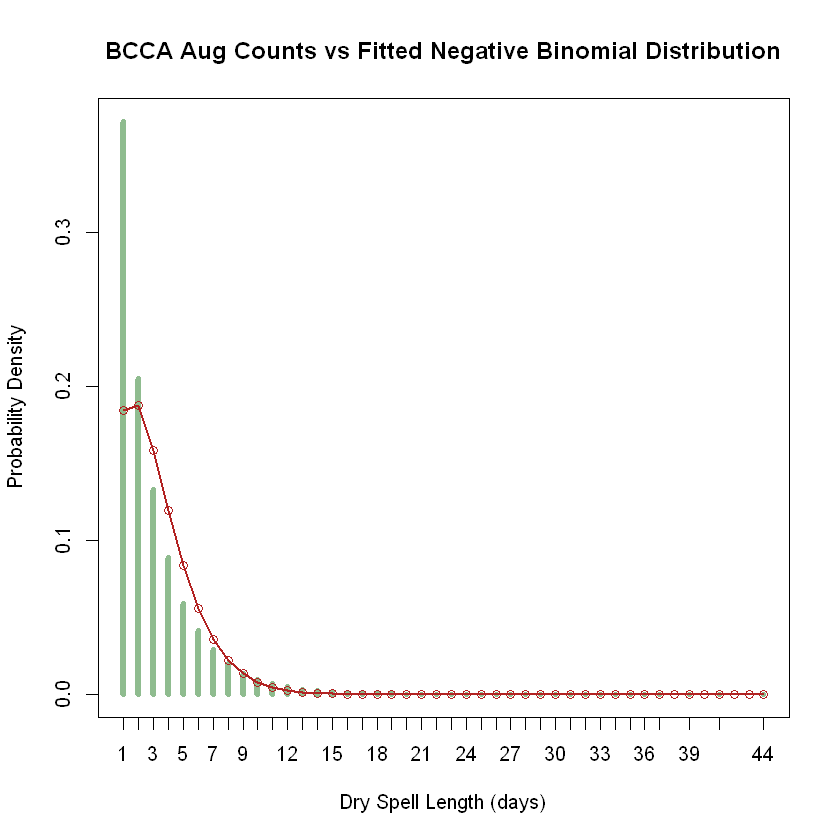

In [400]:
maxP <- max(dBCAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dAug_size, mu=BCfdNB_dAug_mu )
ttab <- table( dBCAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

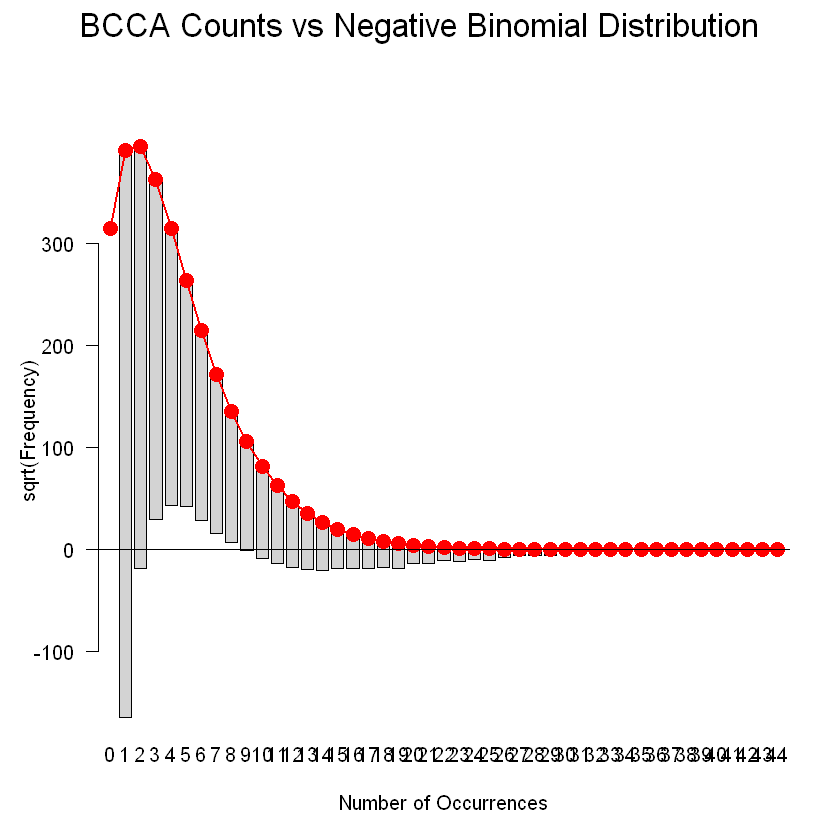

In [401]:
plot( BCgf_dAug, main="BCCA Counts vs Negative Binomial Distribution" )

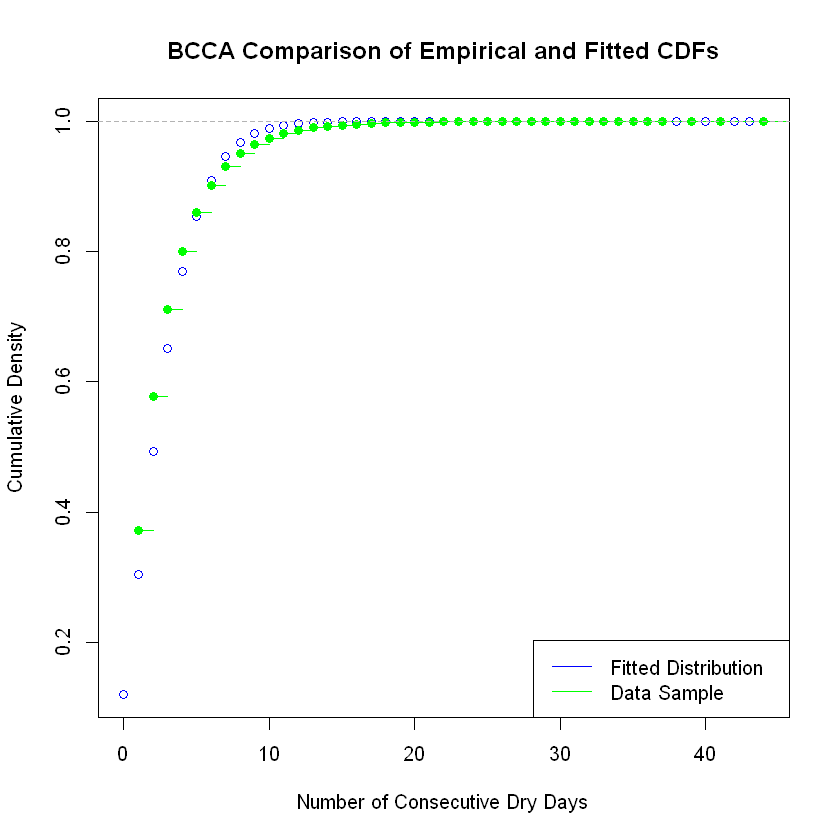

In [402]:
x <- seq(0,dBCAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dAug_mu, size=BCfdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

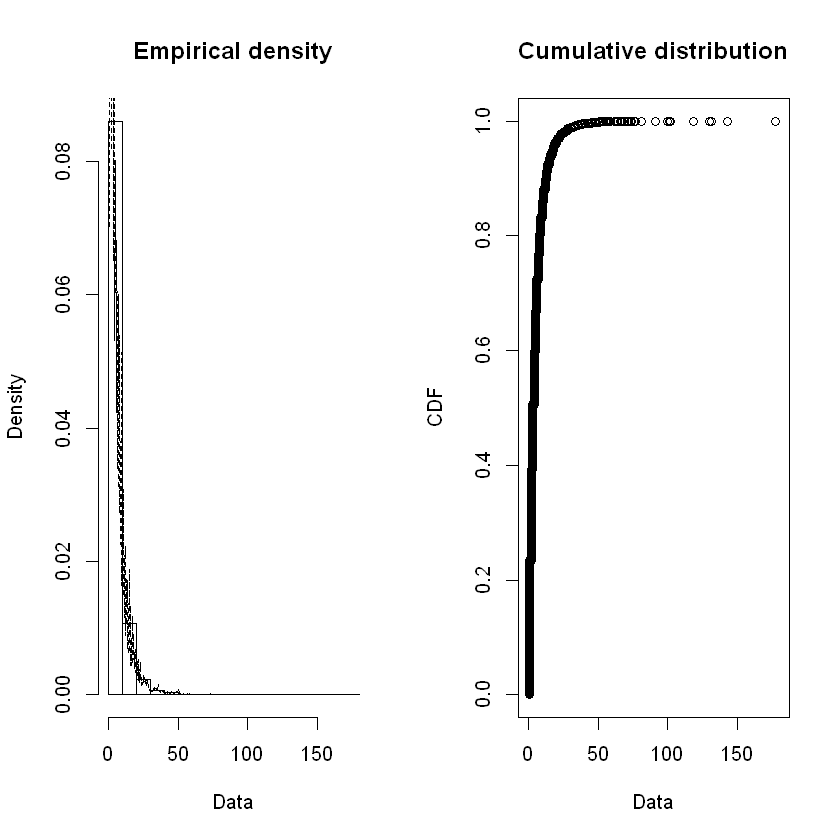

In [403]:
plotdist( dLOSep$Dry_Count, histo=TRUE, demp=TRUE )

In [404]:
LOfd_NB_dSep <- fitdist( dLOSep$Dry_Count, "nbinom" )
LOfd_GE_dSep <- fitdist( dLOSep$Dry_Count, "geom" )

In [405]:
LOfdNB_dSep_size <- LOfd_NB_dSep$estimate[["size"]]
LOfdNB_dSep_mu <- LOfd_NB_dSep$estimate[["mu"]]
cat("LOCA Sep size: ", LOfdNB_dSep_size, "\n", "LOCA Sep mu: ", LOfdNB_dSep_mu, "\n")

LOCA Sep size:  1.46689 
 LOCA Sep mu:  5.5826 


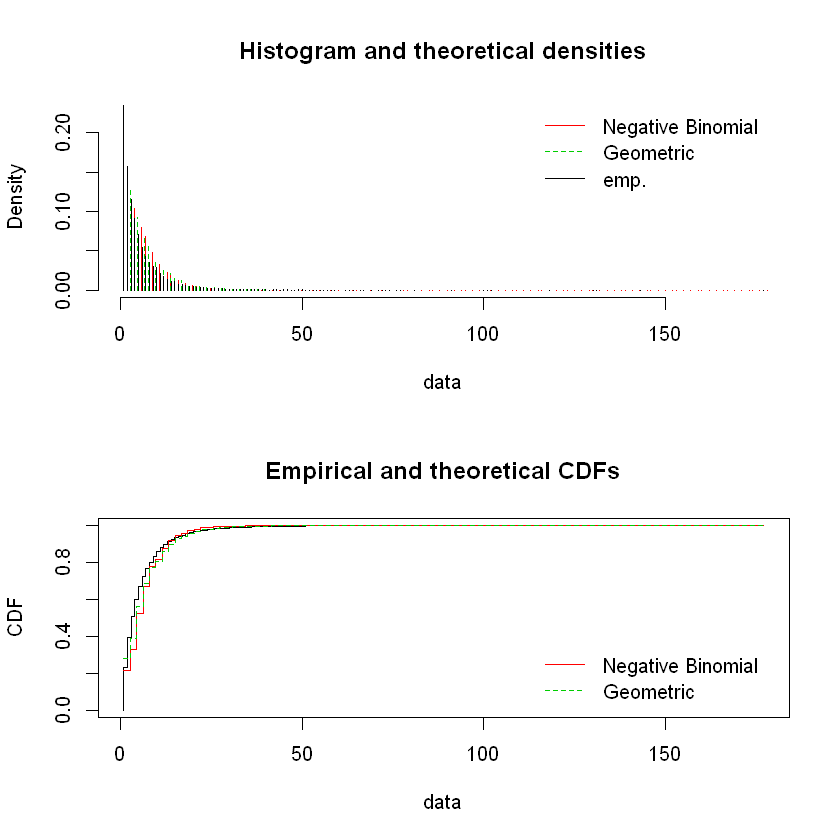

In [406]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dSep, LOfd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dSep, LOfd_GE_dSep), legendtext=plot.legend )

In [407]:
LOstatRes <- gofstat( list(LOfd_NB_dSep, LOfd_GE_dSep), fitnames=c("Negative Binomial", "Geometric") )

In [408]:
print( LOstatRes )

Chi-squared statistic:  222535.3 65620.34 
Degree of freedom of the Chi-squared distribution:  28 29 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     258497           238463.87885    309739.9777
<= 2     173926           125173.29273    120548.7923
<= 3     126933           114553.75050    102236.9636
<= 4     101152           101305.58752     86706.7726
<= 5      77471            87716.75282     73535.6778
<= 6      60184            74869.61185     62365.3234
<= 7      47956            63244.98655     52891.7890
<= 8      38740            53007.68560     44857.3213
<= 9      32875            44155.26242     38043.3204
<= 10     31157            36599.81877     32264.3926
<= 11     23827            30214.17219     27363.3063
<= 12     19629            24858.01149     23206.7140
<= 13     14779            20392.43783     19681.5242
<= 14     12592            16687.64653     16691.8244
<= 15     12207            13626.54112    

In [409]:
LOfdNB_dSep_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [410]:
LOfdNB_dSep_p = LOfdNB_dSep_size / (LOfdNB_dSep_size + LOfdNB_dSep_mu)
cat("LOCA prob: ", LOfdNB_dSep_p)

LOCA prob:  0.2080846

In [411]:
# add to our tracking dataframe
LOMonDistDF[9, ] <- list( 9, dLOSepMean, dLOSepBNr, LOfdNB_dSep_p, LOfdNB_dSep_mu, LOfdNB_dSep_size,
                          LOfdNB_dSep_pvalue )

In [412]:
LOgf_dSep <- goodfit( dLOSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dSep_size, prob=LOfdNB_dSep_p) )

In [413]:
summary( LOgf_dSep )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson               NaN 177      NaN
Likelihood Ratio 404920.4  80        0


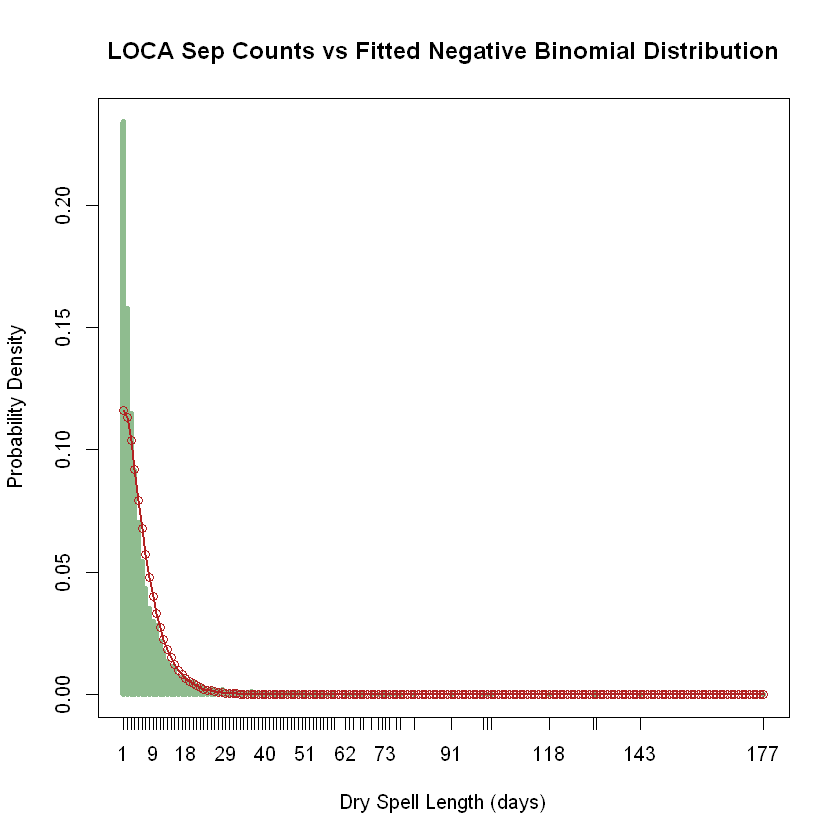

In [414]:
maxP <- max(dLOSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dSep_size, mu=LOfdNB_dSep_mu )
ttab <- table( dLOSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

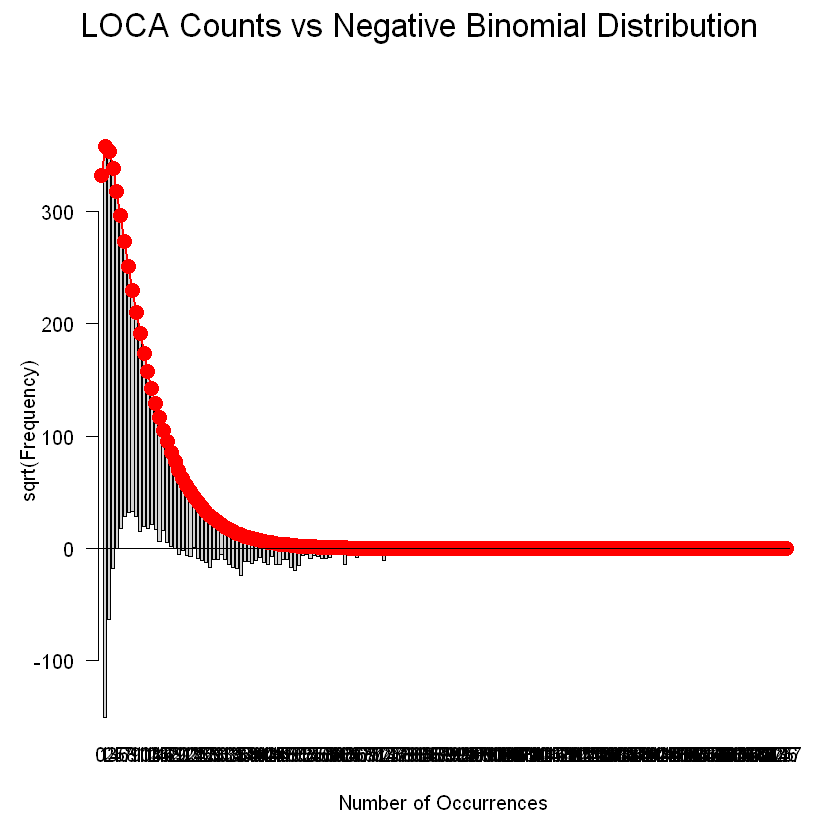

In [415]:
plot( LOgf_dSep, main="LOCA Counts vs Negative Binomial Distribution" )

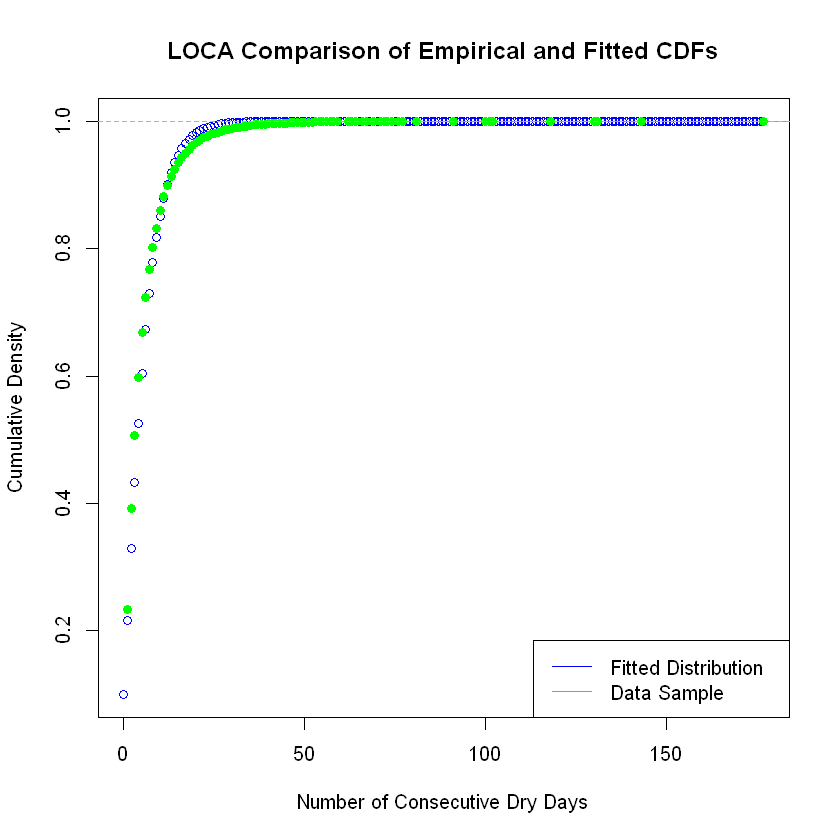

In [416]:
x <- seq(0,dLOSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dSep_mu, size=LOfdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

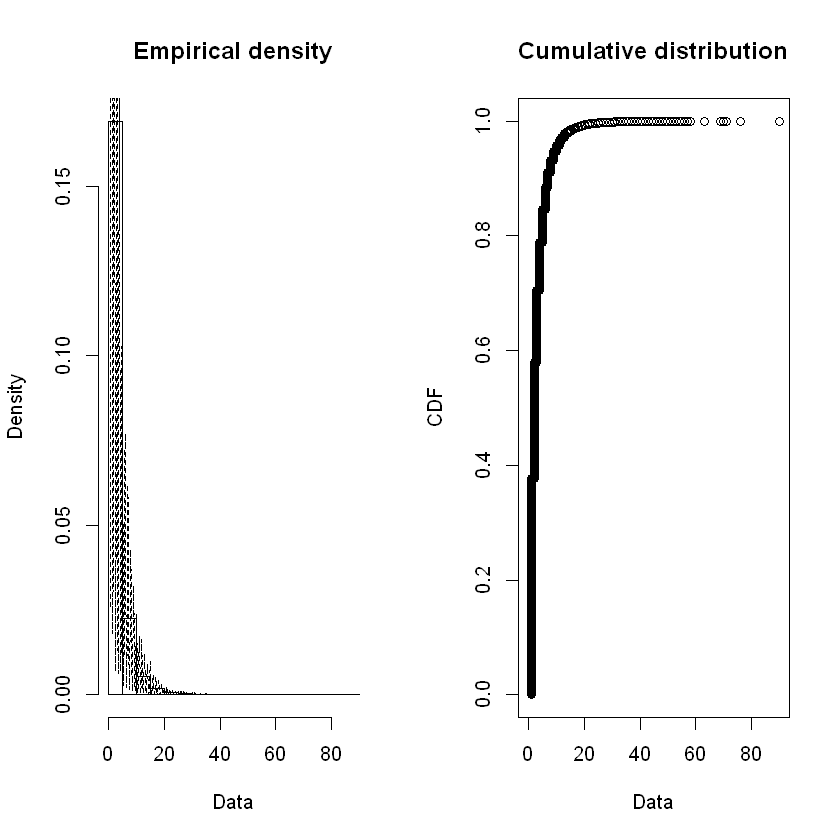

In [417]:
plotdist( dBCSep$Dry_Count, histo=TRUE, demp=TRUE )

In [418]:
BCfd_NB_dSep <- fitdist( dBCSep$Dry_Count, "nbinom" )
BCfd_GE_dSep <- fitdist( dBCSep$Dry_Count, "geom" )

In [419]:
summary( BCfd_NB_dSep )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.231947 0.005544453
mu   3.268371 0.003212469
Loglikelihood:  -1754233   AIC:  3508470   BIC:  3508494 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0001645503
mu   -0.0001645503  1.0000000000


In [420]:
BCfdNB_dSep_size <- BCfd_NB_dSep$estimate[["size"]]
BCfdNB_dSep_mu <- BCfd_NB_dSep$estimate[["mu"]]
cat("BCCA Sep size: ", BCfdNB_dSep_size, "\n", "BCCA Sep mu: ", BCfdNB_dSep_mu, "\n")

BCCA Sep size:  2.231947 
 BCCA Sep mu:  3.268371 


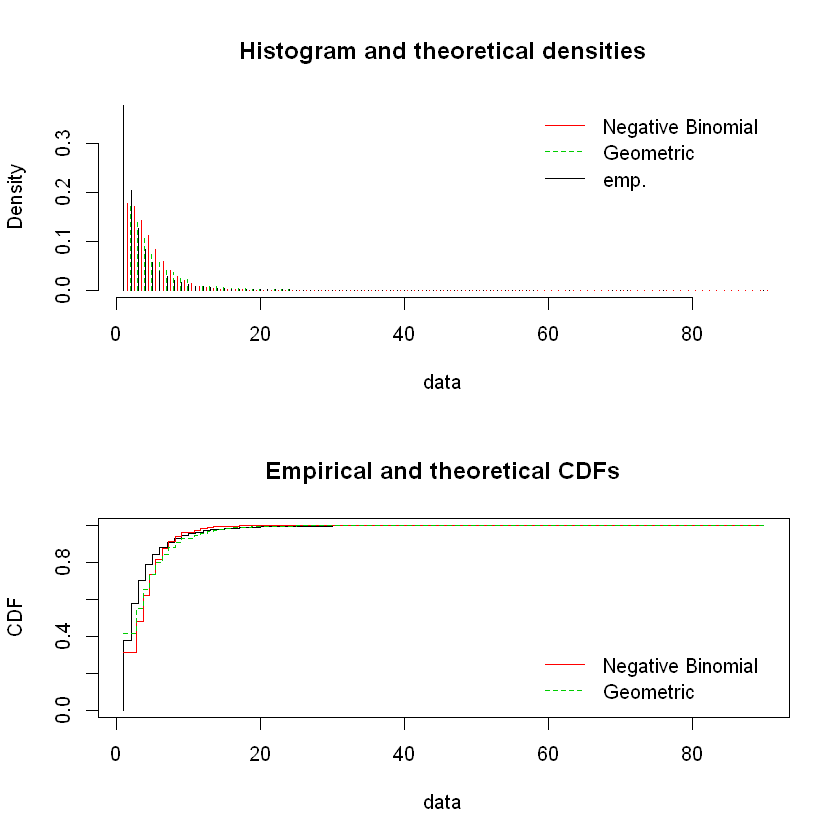

In [421]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dSep, BCfd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dSep, BCfd_GE_dSep), legendtext=plot.legend )

In [422]:
BCstatRes <- gofstat( list(BCfd_NB_dSep, BCfd_GE_dSep), fitnames=c("Negative Binomial", "Geometric") )

In [423]:
print(BCstatRes)

Chi-squared statistic:  516212.9 44228.45 
Degree of freedom of the Chi-squared distribution:  17 18 
Chi-squared p-value:  0 0 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     293757           2.425650e+05    322941.5564
<= 2     158399           1.327932e+05    107231.7404
<= 3      98445           1.113111e+05     82107.2282
<= 4      65489           8.651377e+04     62869.4162
<= 5      44397           6.407410e+04     48139.0443
<= 6      29374           4.589127e+04     36860.0144
<= 7      21548           3.206846e+04     28223.6734
<= 8      15781           2.198999e+04     21610.8363
<= 9      11680           1.485540e+04     16547.3941
<= 10      8793           9.914776e+03     12670.3219
<= 11      6372           6.551328e+03      9701.6518
<= 12      5173           4.292551e+03      7428.5443
<= 13      4174           2.792415e+03      5688.0284
<= 14      3016           1.80530

In [424]:
BCfdNB_dSep_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [425]:
BCfdNB_dSep_p = BCfdNB_dSep_size / (BCfdNB_dSep_size + BCfdNB_dSep_mu)
cat("BCCA prob: ", BCfdNB_dSep_p)

BCCA prob:  0.4057851

In [426]:
# add to our tracking dataframe
BCMonDistDF[9, ] <- list( 9, dBCSepMean, dBCSepBNr, BCfdNB_dSep_p, BCfdNB_dSep_mu, BCfdNB_dSep_size,
                          BCfdNB_dSep_pvalue )

In [427]:
BCgf_dSep <- goodfit( dBCSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dSep_size, prob=BCfdNB_dSep_p) )

In [428]:
summary( BCgf_dSep )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson               NaN 90      NaN
Likelihood Ratio 413288.5 63        0


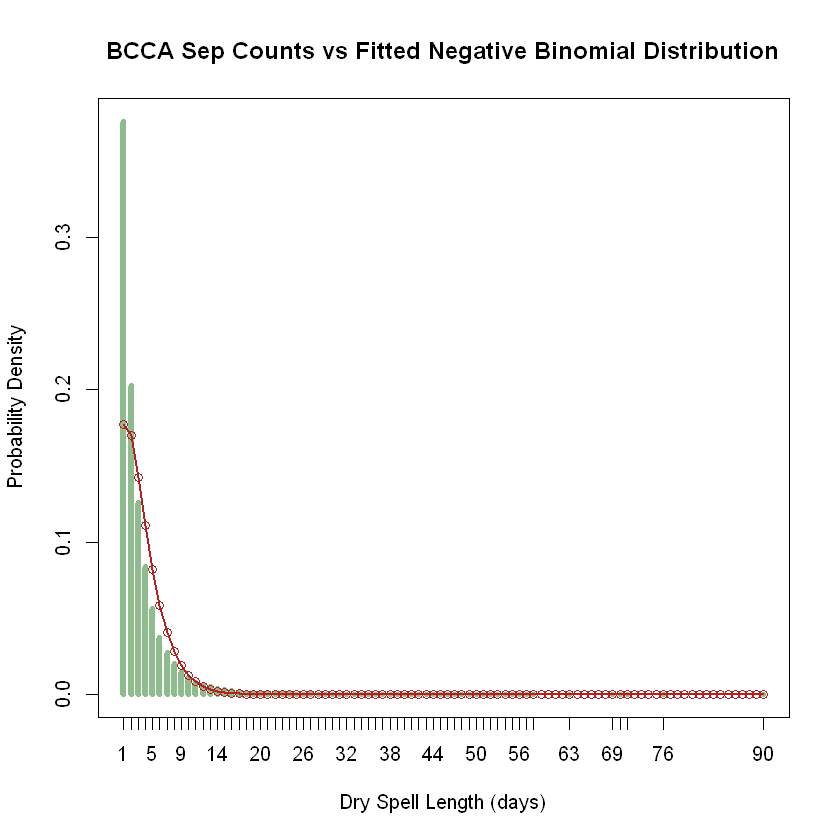

In [429]:
maxP <- max(dBCSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dSep_size, mu=BCfdNB_dSep_mu )
ttab <- table( dBCSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

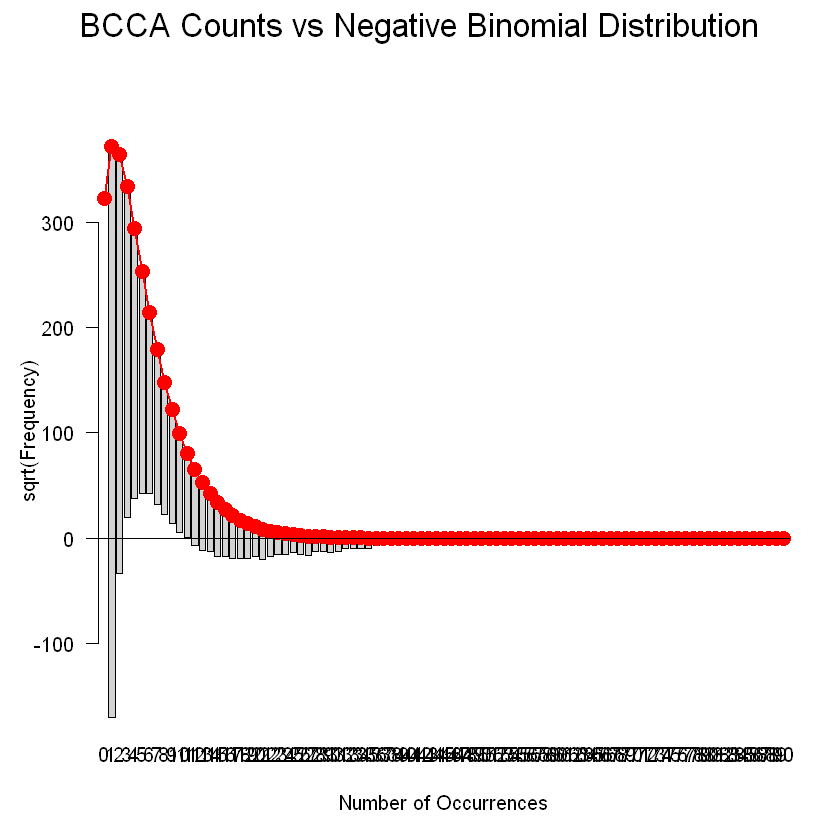

In [430]:
plot( BCgf_dSep, main="BCCA Counts vs Negative Binomial Distribution" )

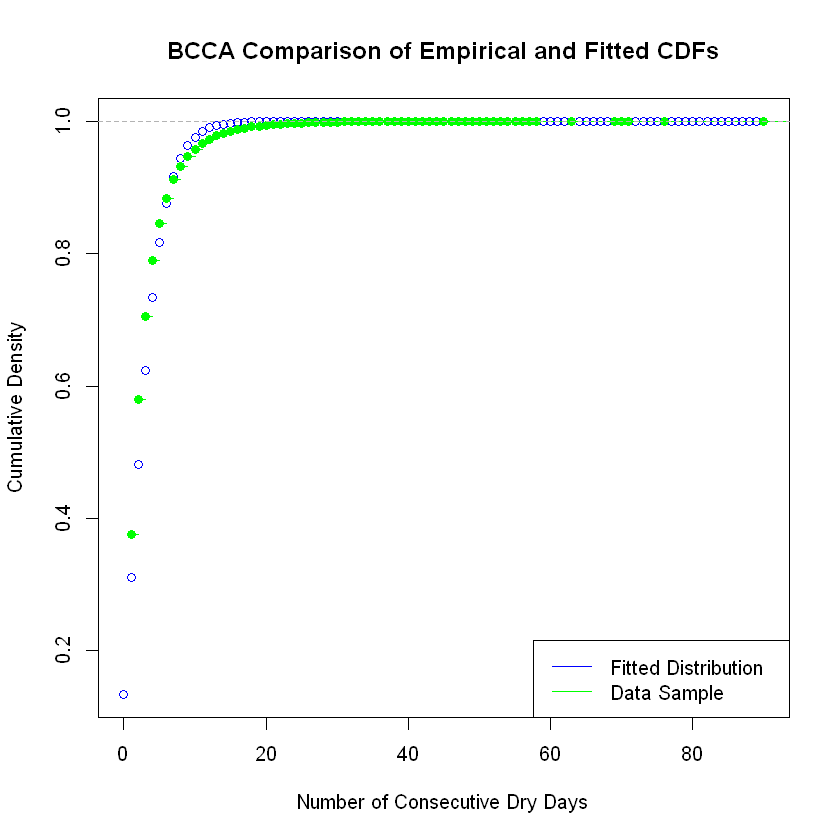

In [431]:
x <- seq(0,dBCSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dSep_mu, size=BCfdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

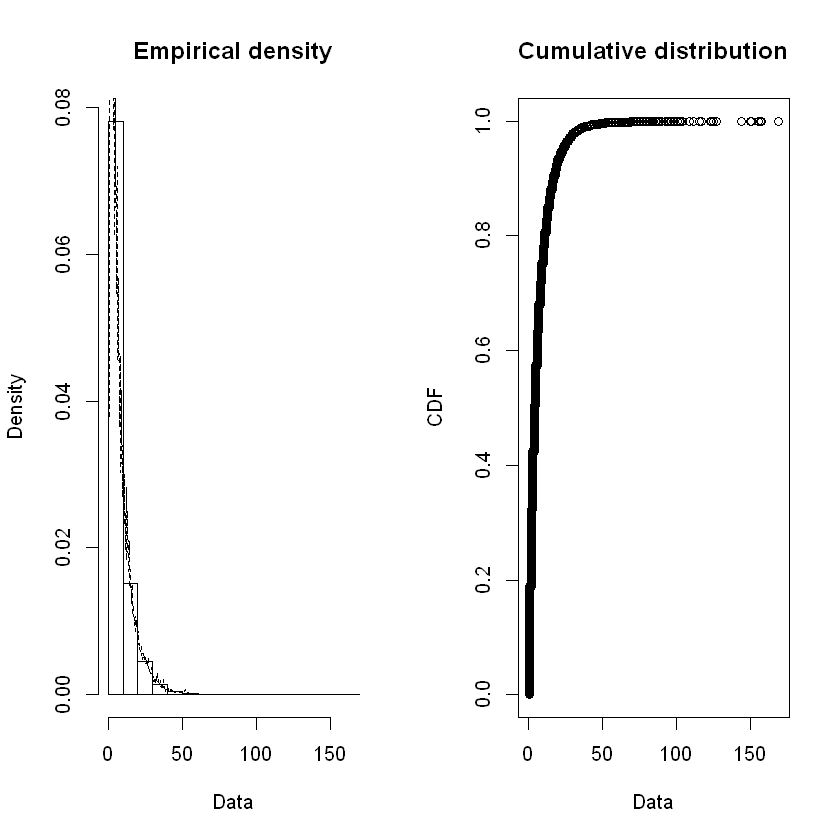

In [432]:
plotdist( dLOOct$Dry_Count, histo=TRUE, demp=TRUE )

In [433]:
LOfd_NB_dOct <- fitdist( dLOOct$Dry_Count, "nbinom" )
LOfd_GE_dOct <- fitdist( dLOOct$Dry_Count, "geom" )

In [434]:
LOfdNB_dOct_size <- LOfd_NB_dOct$estimate[["size"]]
LOfdNB_dOct_mu <- LOfd_NB_dOct$estimate[["mu"]]
cat("LOCA Oct size: ", LOfdNB_dOct_size, "\n", "LOCA Oct mu: ", LOfdNB_dOct_mu, "\n")

LOCA Oct size:  1.295796 
 LOCA Oct mu:  7.248444 


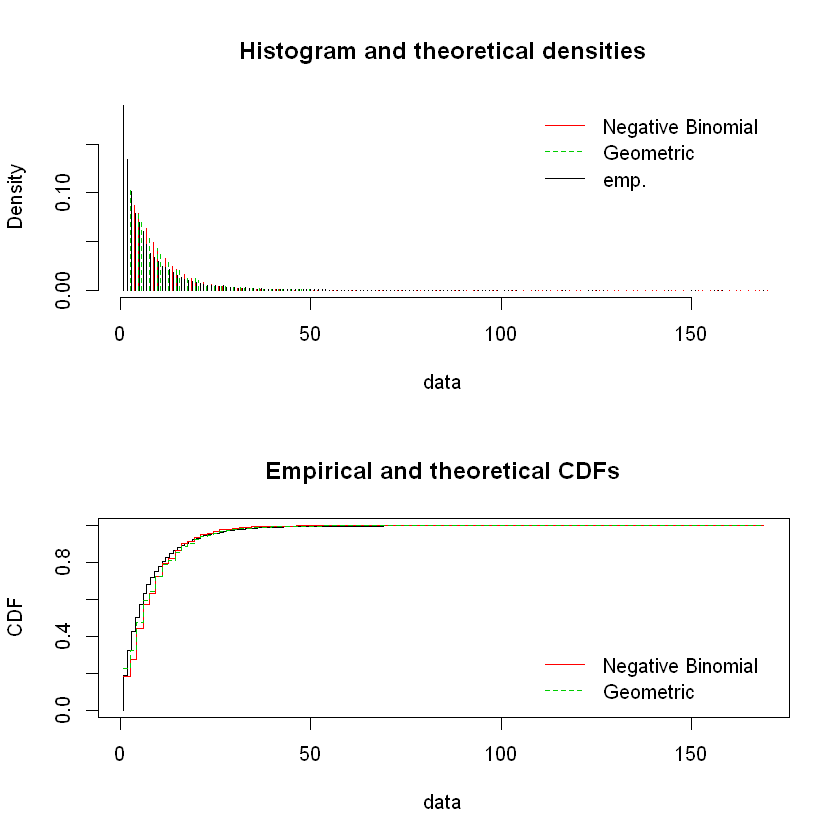

In [435]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dOct, LOfd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dOct, LOfd_GE_dOct), legendtext=plot.legend )

In [436]:
LOstatRes <- gofstat( list(LOfd_NB_dOct, LOfd_GE_dOct), fitnames=c("Negative Binomial", "Geometric") )

In [437]:
print( LOstatRes )

Chi-squared statistic:  68608.02 42377.78 
Degree of freedom of the Chi-squared distribution:  35 36 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     197903            190560.7790     238126.166
<= 2     140528             97173.0892      97881.520
<= 3     105668             90564.1756      86017.509
<= 4      82811             82510.9240      75591.509
<= 5      73109             74138.5427      66429.223
<= 6      62497             65995.5710      58377.478
<= 7      49008             58352.6763      51301.668
<= 8      39476             51333.4203      45083.502
<= 9      35265             44979.6034      39619.027
<= 10     30991             39286.8215      34816.889
<= 11     25396             34224.9161      30596.808
<= 12     23915             29750.1485      26888.234
<= 13     21738             25812.5833      23629.168
<= 14     18540             22360.5828      20765.127
<= 15     15395             19343.5100    

In [438]:
LOfdNB_dOct_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [439]:
LOfdNB_dOct_p = LOfdNB_dOct_size / (LOfdNB_dOct_size + LOfdNB_dOct_mu)
cat("LOCA prob: ", LOfdNB_dOct_p)

LOCA prob:  0.1516573

In [440]:
# add to our tracking dataframe
LOMonDistDF[10, ] <- list( 10, dLOOctMean, dLOOctBNr, LOfdNB_dOct_p, LOfdNB_dOct_mu, LOfdNB_dOct_size,
                          LOfdNB_dOct_pvalue )

In [441]:
LOgf_dOct <- goodfit( dLOOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dOct_size, prob=LOfdNB_dOct_p) )

In [442]:
summary( LOgf_dOct )


	 Goodness-of-fit test for nbinomial distribution

                          X^2  df P(> X^2)
Pearson          1614207079.4 169        0
Likelihood Ratio     321970.8 114        0


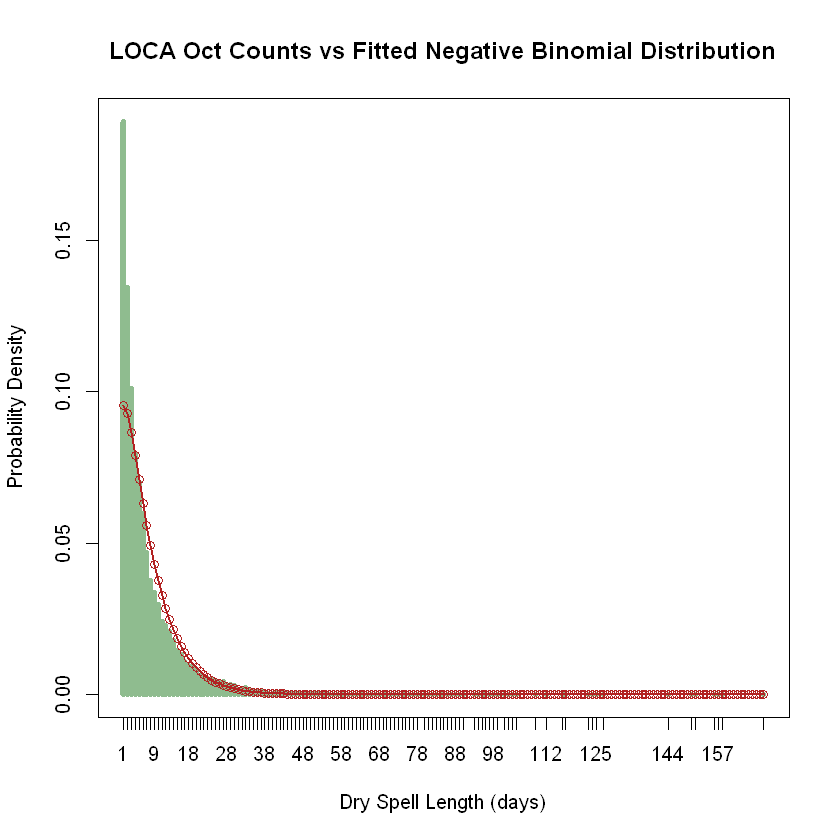

In [443]:
maxP <- max(dLOOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dOct_size, mu=LOfdNB_dOct_mu )
ttab <- table( dLOOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

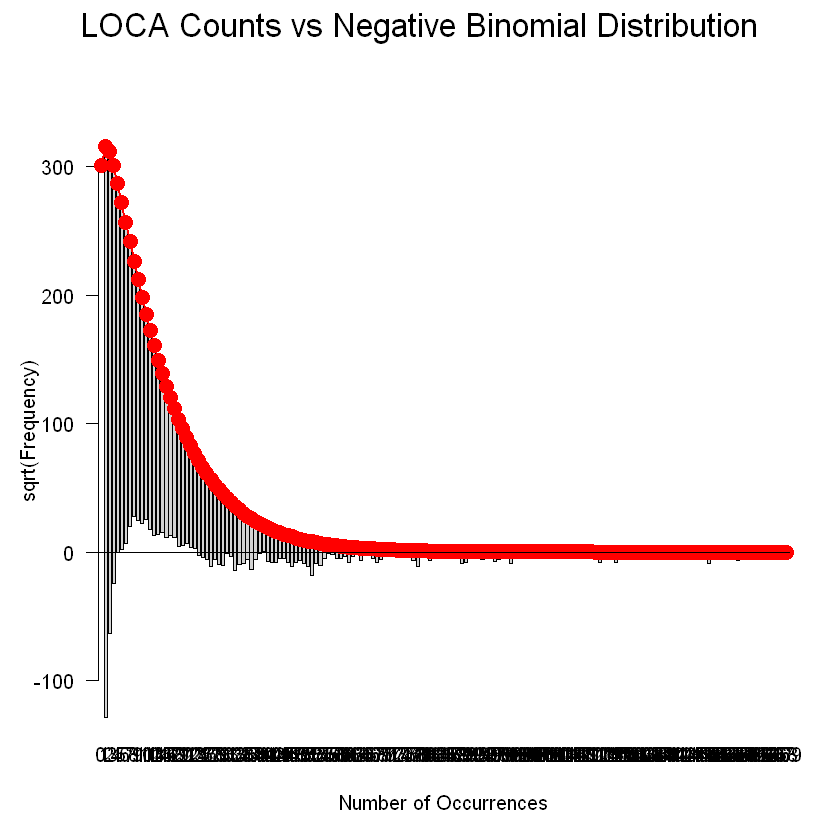

In [444]:
plot( LOgf_dOct, main="LOCA Counts vs Negative Binomial Distribution" )

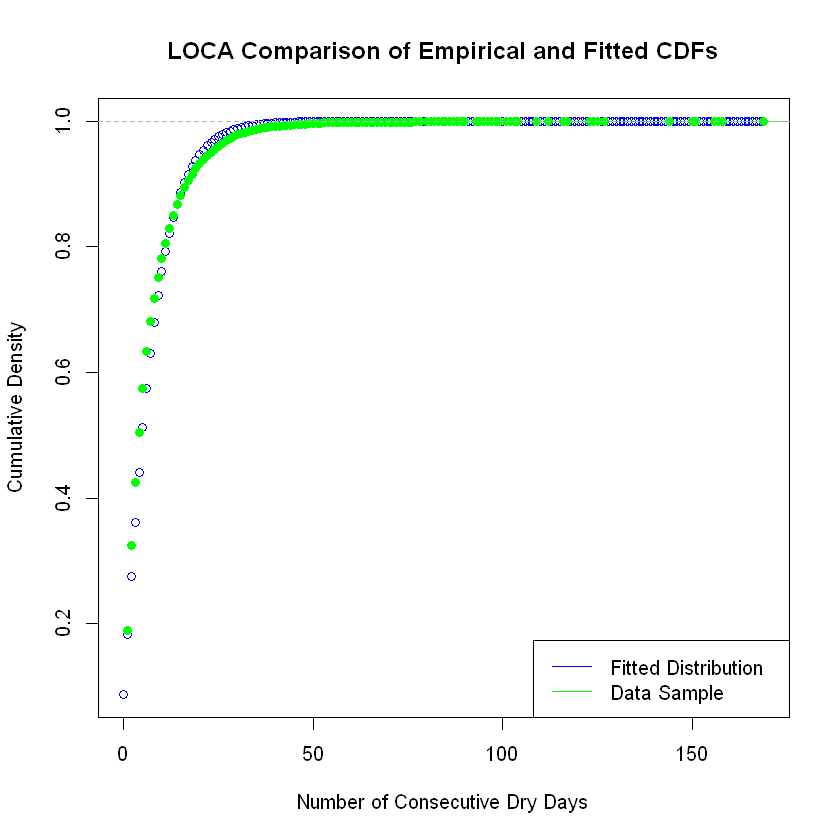

In [445]:
x <- seq(0,dLOOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dOct_mu, size=LOfdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

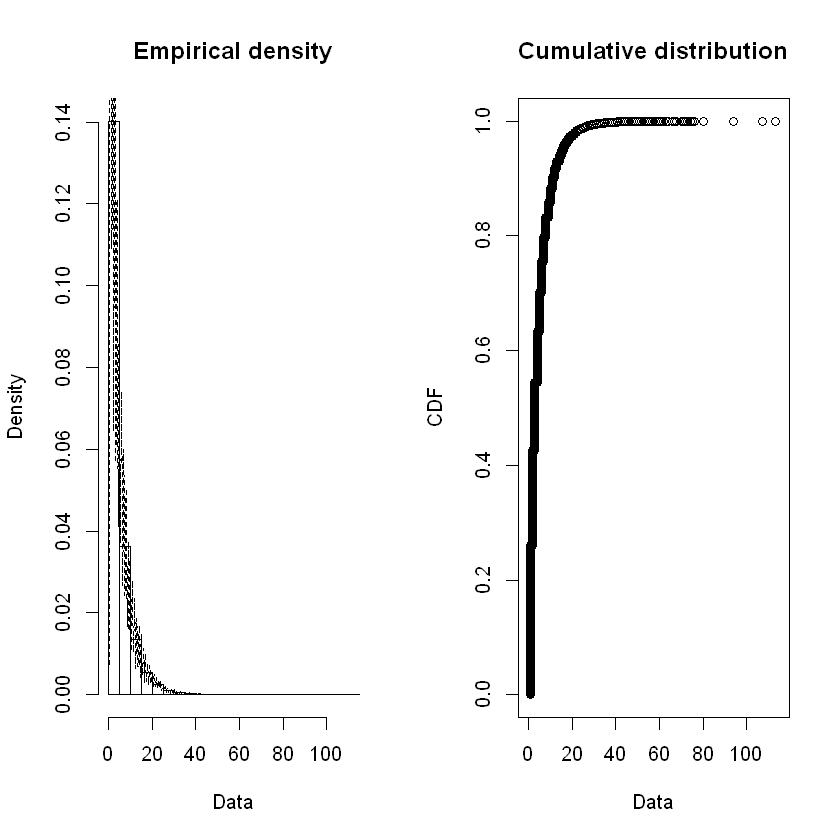

In [446]:
plotdist( dBCOct$Dry_Count, histo=TRUE, demp=TRUE )

In [447]:
BCfd_NB_dOct <- fitdist( dBCOct$Dry_Count, "nbinom" )
BCfd_GE_dOct <- fitdist( dBCOct$Dry_Count, "geom" )

In [448]:
summary( BCfd_NB_dOct )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.614040 0.003434172
mu   4.972824 0.005394981
Loglikelihood:  -1855679   AIC:  3711363   BIC:  3711386 
Correlation matrix:
              size            mu
size  1.000000e+00 -3.417223e-05
mu   -3.417223e-05  1.000000e+00


In [449]:
BCfdNB_dOct_size <- BCfd_NB_dOct$estimate[["size"]]
BCfdNB_dOct_mu <- BCfd_NB_dOct$estimate[["mu"]]
cat("BCCA Oct size: ", BCfdNB_dOct_size, "\n", "BCCA Oct mu: ", BCfdNB_dOct_mu, "\n")

BCCA Oct size:  1.61404 
 BCCA Oct mu:  4.972824 


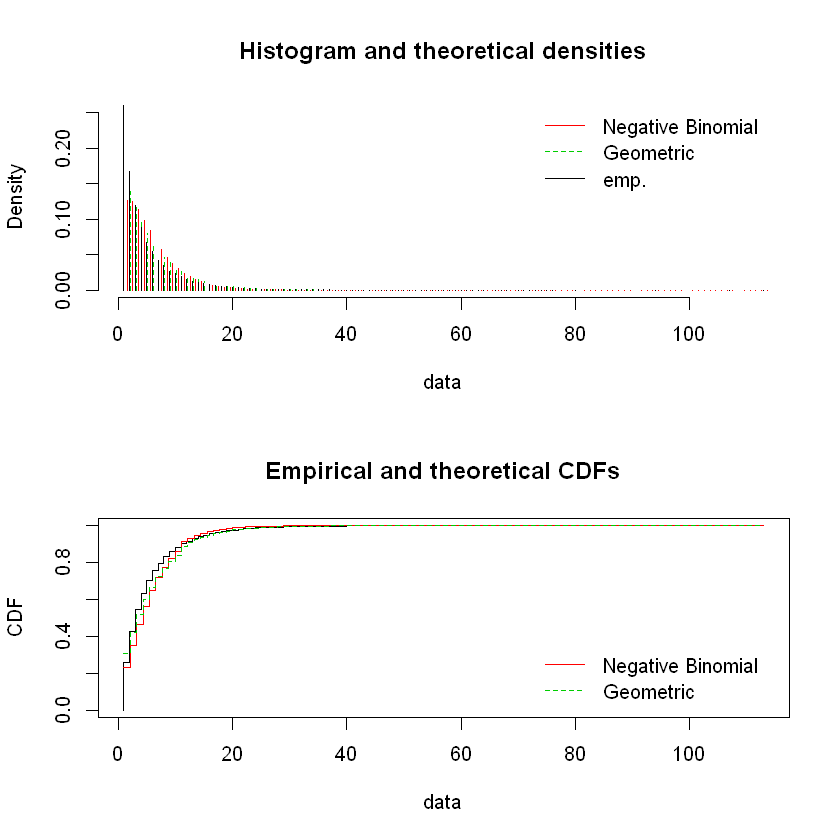

In [450]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dOct, BCfd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dOct, BCfd_GE_dOct), legendtext=plot.legend )

In [451]:
BCstatRes <- gofstat( list(BCfd_NB_dOct, BCfd_GE_dOct), fitnames=c("Negative Binomial", "Geometric") )

In [452]:
print(BCstatRes)

Chi-squared statistic:  61763.12 28643.22 
Degree of freedom of the Chi-squared distribution:  24 25 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     181018            159835.6984     213941.454
<= 2     116083             86626.8341      80924.000
<= 3      82865             78785.9077      67375.040
<= 4      61604             68611.0882      56094.559
<= 5      47249             58159.9745      46702.748
<= 6      37610             48402.0969      38883.391
<= 7      29179             39747.1225      32373.215
<= 8      24645             32310.7466      26953.026
<= 9      18558             26057.6240      22440.329
<= 10     16318             20880.4539      18683.185
<= 11     13622             16643.8952      15555.093
<= 12     10762             13208.4645      12950.732
<= 13      8563             10442.8829      10782.414
<= 14      7688              8229.7581       8977.134
<= 15      6433              6467.4860    

In [453]:
BCfdNB_dOct_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [454]:
BCfdNB_dOct_p = BCfdNB_dOct_size / (BCfdNB_dOct_size + BCfdNB_dOct_mu)
cat("BCCA prob: ", BCfdNB_dOct_p)

BCCA prob:  0.2450392

In [455]:
# add to our tracking dataframe
BCMonDistDF[10, ] <- list( 10, dBCOctMean, dBCOctBNr, BCfdNB_dOct_p, BCfdNB_dOct_mu, BCfdNB_dOct_size,
                          BCfdNB_dOct_pvalue )

In [456]:
BCgf_dOct <- goodfit( dBCOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dOct_size, prob=BCfdNB_dOct_p) )

In [457]:
summary( BCgf_dOct )


	 Goodness-of-fit test for nbinomial distribution

                         X^2  df P(> X^2)
Pearson          302440075.8 113        0
Likelihood Ratio    261369.4  77        0


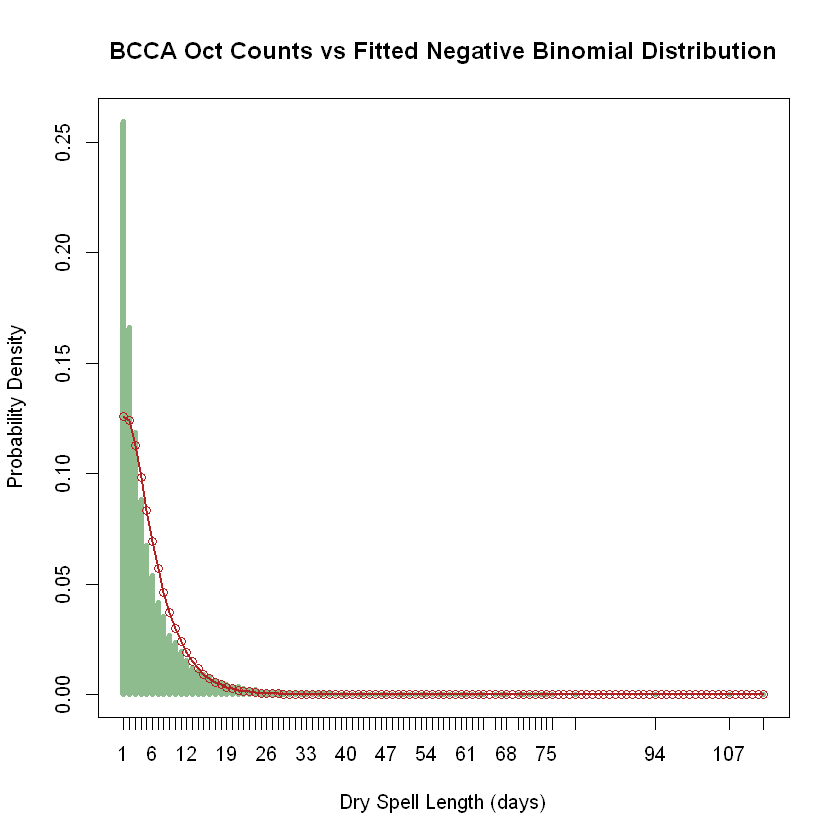

In [458]:
maxP <- max(dBCOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dOct_size, mu=BCfdNB_dOct_mu )
ttab <- table( dBCOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

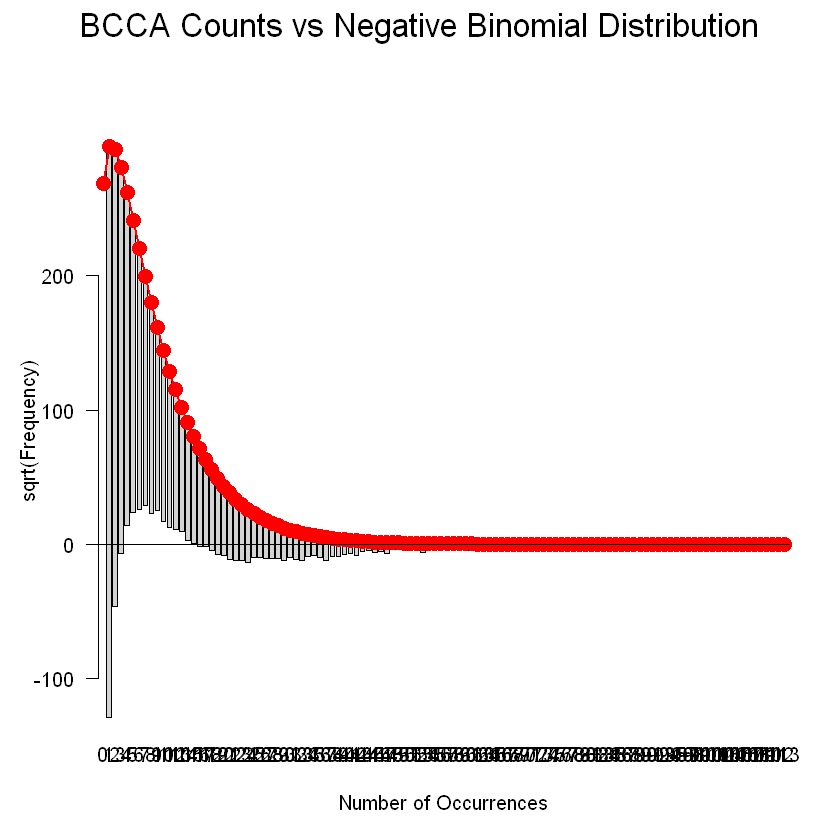

In [459]:
plot( BCgf_dOct, main="BCCA Counts vs Negative Binomial Distribution" )

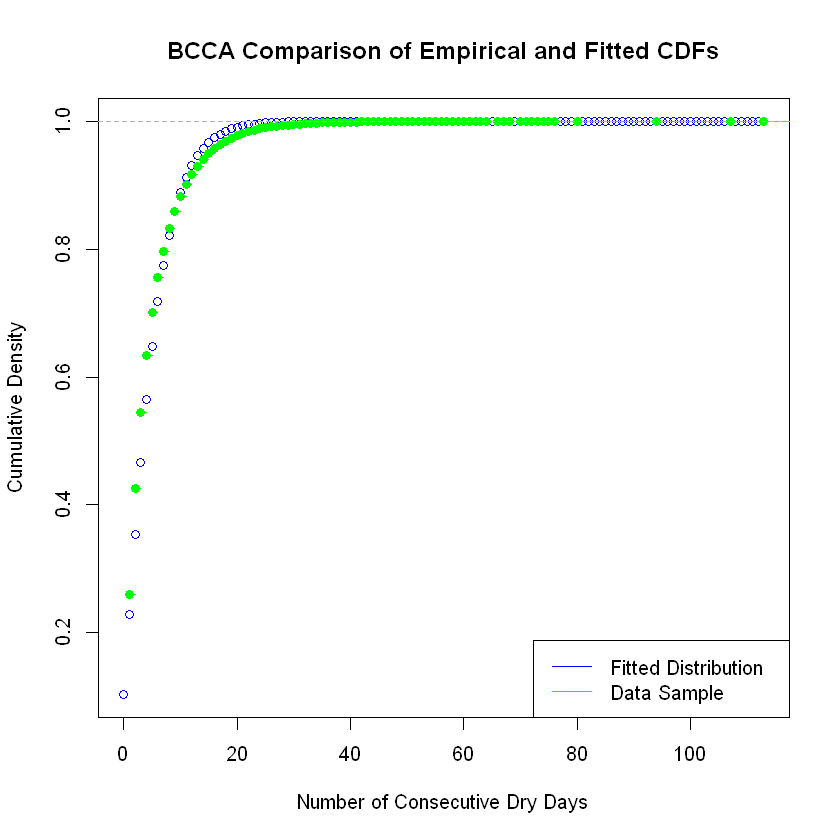

In [460]:
x <- seq(0,dBCOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dOct_mu, size=BCfdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

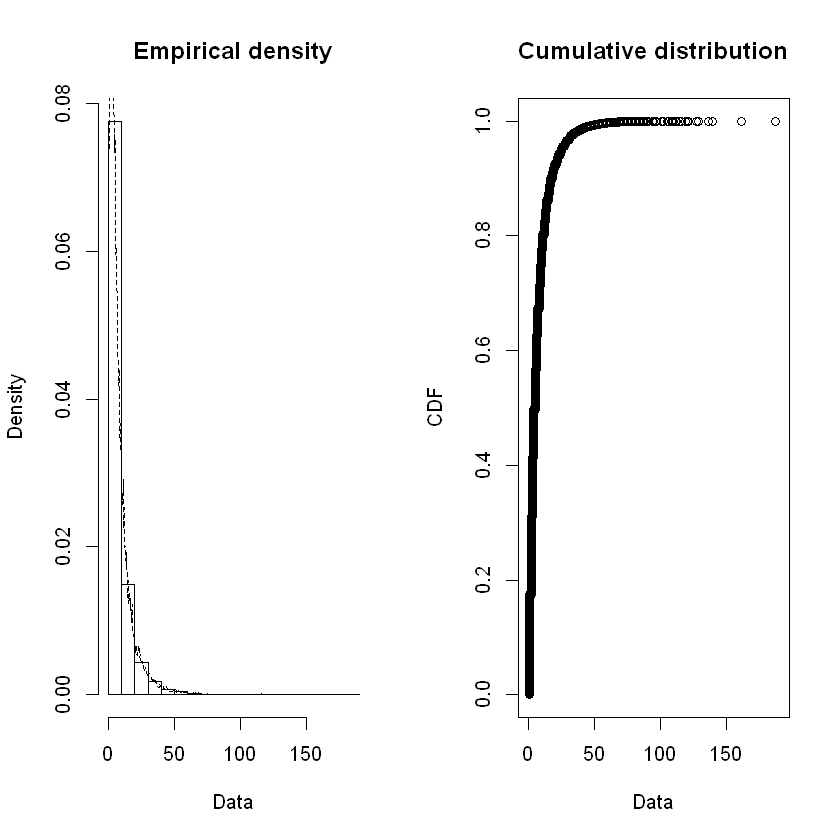

In [461]:
plotdist( dLONov$Dry_Count, histo=TRUE, demp=TRUE )

In [462]:
LOfd_NB_dNov <- fitdist( dLONov$Dry_Count, "nbinom" )
LOfd_GE_dNov <- fitdist( dLONov$Dry_Count, "geom" )

In [463]:
LOfdNB_dNov_size <- LOfd_NB_dNov$estimate[["size"]]
LOfdNB_dNov_mu <- LOfd_NB_dNov$estimate[["mu"]]
cat("LOCA Nov size: ", LOfdNB_dNov_size, "\n", "LOCA Nov mu: ", LOfdNB_dNov_mu, "\n")

LOCA Nov size:  1.252703 
 LOCA Nov mu:  7.58849 


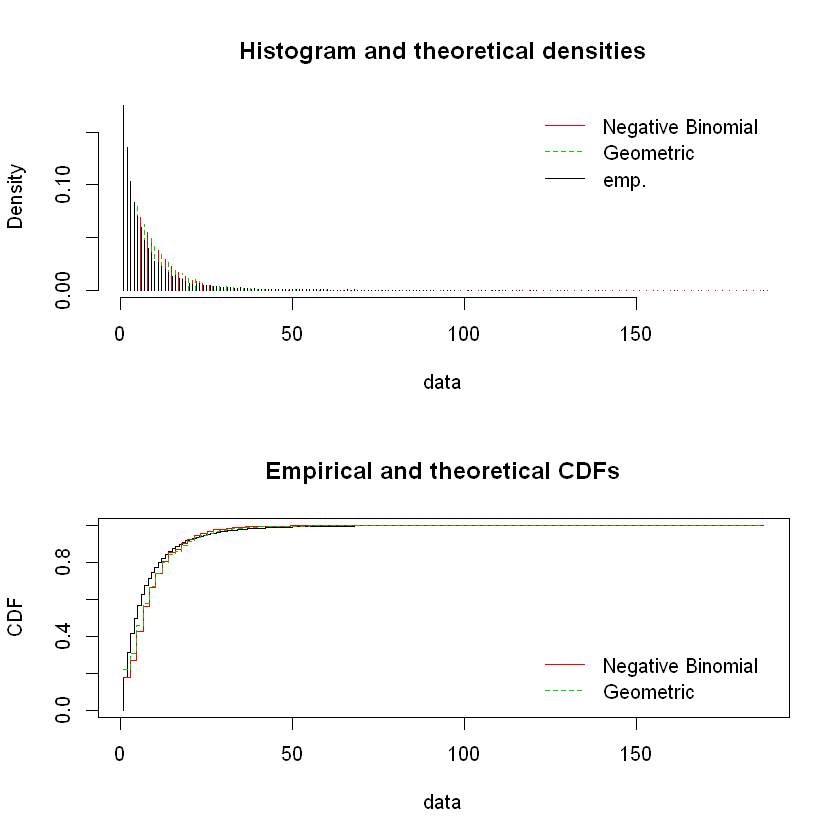

In [464]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dNov, LOfd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dNov, LOfd_GE_dNov), legendtext=plot.legend )

In [465]:
LOstatRes <- gofstat( list(LOfd_NB_dNov, LOfd_GE_dNov), fitnames=c("Negative Binomial", "Geometric") )

In [466]:
print( LOstatRes )

Chi-squared statistic:  112151.8 66301.28 
Degree of freedom of the Chi-squared distribution:  38 39 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     177092            181450.4422    221750.7229
<= 2     136699             90888.1561     91910.5253
<= 3     104403             84581.4089     81209.3884
<= 4      84132             77183.4973     71754.1842
<= 5      70423             69595.5989     63399.8488
<= 6      60672             62250.4954     56018.2083
<= 7      47808             55359.1170     49496.0116
<= 8      40056             49016.2265     43733.1940
<= 9      35504             43252.4267     38641.3408
<= 10     27975             38062.1529     34142.3319
<= 11     26214             33419.6591     30167.1422
<= 12     23210             29288.5028     26654.7837
<= 13     20025             25627.2958     23551.3688
<= 14     17052             22393.2165     20809.2844
<= 15     13418             19544.1385    

In [467]:
LOfdNB_dNov_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [468]:
LOfdNB_dNov_p = LOfdNB_dNov_size / (LOfdNB_dNov_size + LOfdNB_dNov_mu)
cat("LOCA prob: ", LOfdNB_dNov_p)

LOCA prob:  0.1416893

In [469]:
# add to our tracking dataframe
LOMonDistDF[11, ] <- list( 11, dLONovMean, dLONovBNr, LOfdNB_dNov_p, LOfdNB_dNov_mu, LOfdNB_dNov_size,
                          LOfdNB_dNov_pvalue )

In [470]:
LOgf_dNov <- goodfit( dLONov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dNov_size, prob=LOfdNB_dNov_p) )

In [471]:
summary( LOgf_dNov )


	 Goodness-of-fit test for nbinomial distribution

                       X^2  df P(> X^2)
Pearson          6465987.5 187        0
Likelihood Ratio  310236.7 113        0


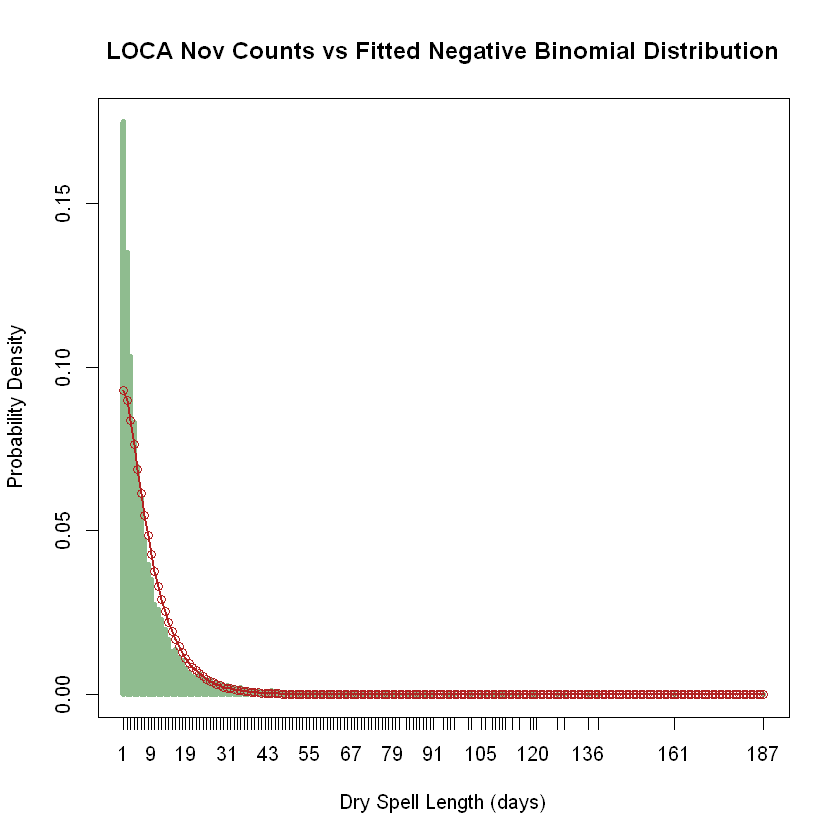

In [472]:
maxP <- max(dLONov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dNov_size, mu=LOfdNB_dNov_mu )
ttab <- table( dLONov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

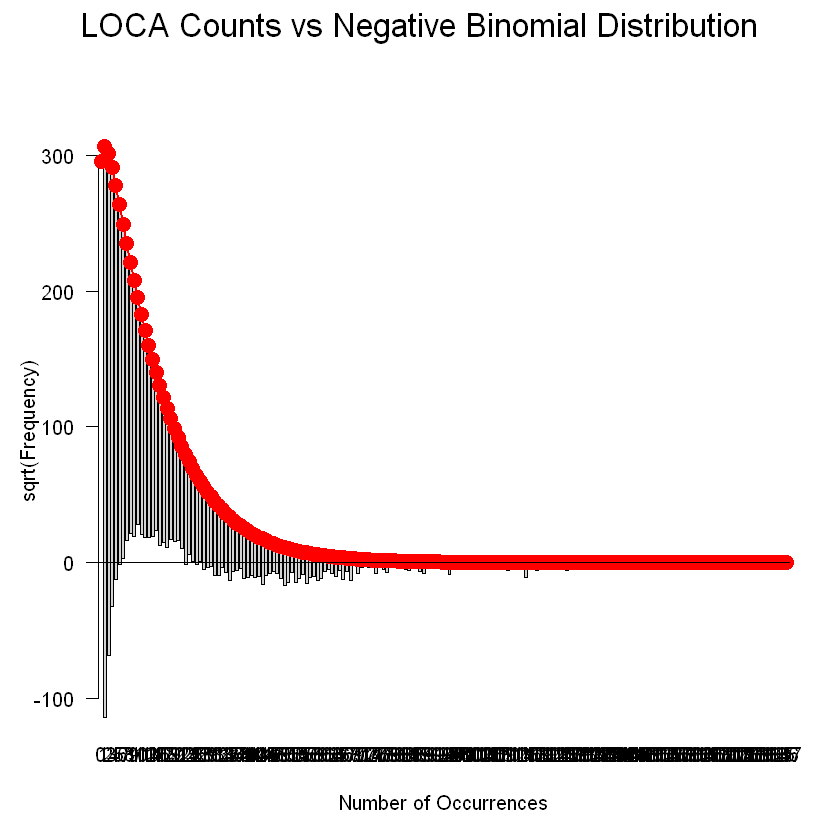

In [473]:
plot( LOgf_dNov, main="LOCA Counts vs Negative Binomial Distribution" )

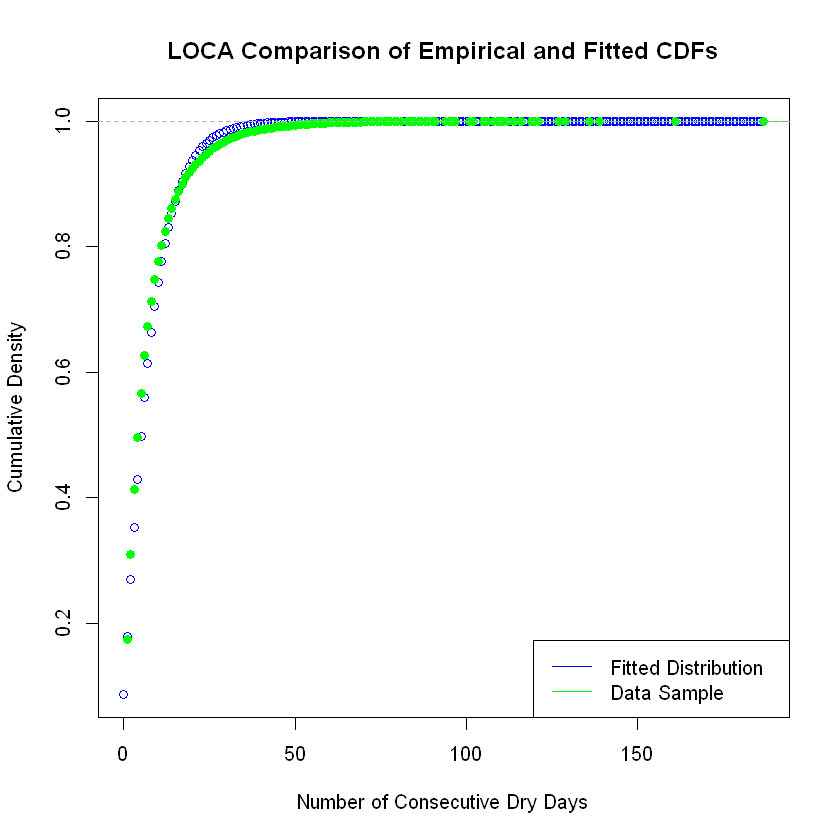

In [474]:
x <- seq(0,dLONovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dNov_mu, size=LOfdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLONov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

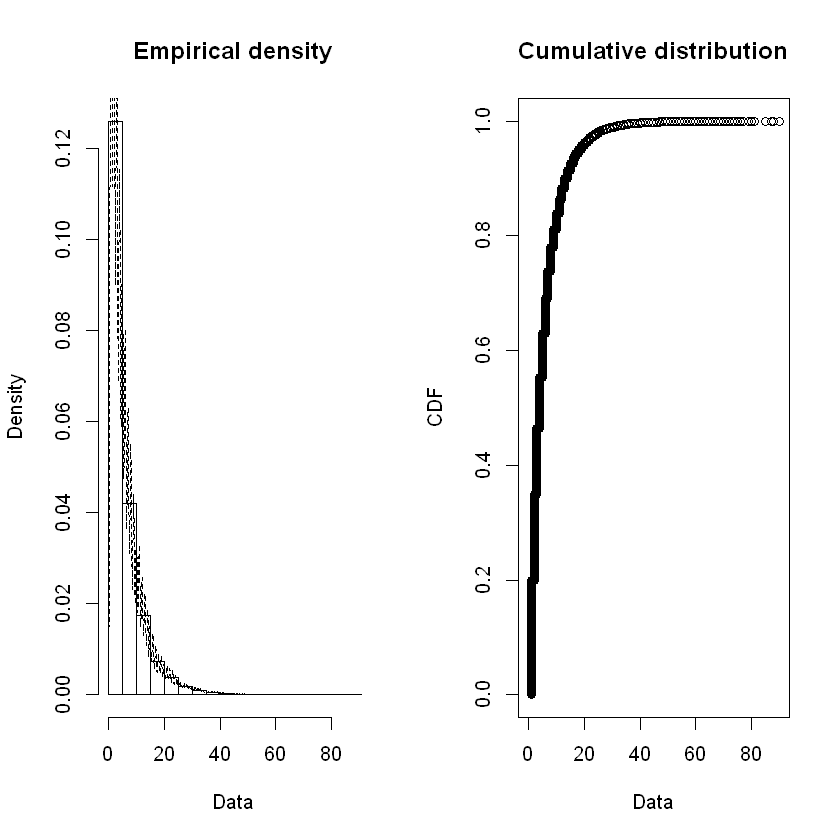

In [475]:
plotdist( dBCNov$Dry_Count, histo=TRUE, demp=TRUE )

In [476]:
BCfd_NB_dNov <- fitdist( dBCNov$Dry_Count, "nbinom" )
BCfd_GE_dNov <- fitdist( dBCNov$Dry_Count, "geom" )

In [477]:
summary( BCfd_NB_dNov )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.574472 0.003396444
mu   5.969872 0.006775322
Loglikelihood:  -1763942   AIC:  3527888   BIC:  3527911 
Correlation matrix:
              size            mu
size  1.000000e+00 -5.469745e-05
mu   -5.469745e-05  1.000000e+00


In [478]:
BCfdNB_dNov_size <- BCfd_NB_dNov$estimate[["size"]]
BCfdNB_dNov_mu <- BCfd_NB_dNov$estimate[["mu"]]
cat("BCCA Nov size: ", BCfdNB_dNov_size, "\n", "BCCA Nov mu: ", BCfdNB_dNov_mu, "\n")

BCCA Nov size:  1.574472 
 BCCA Nov mu:  5.969872 


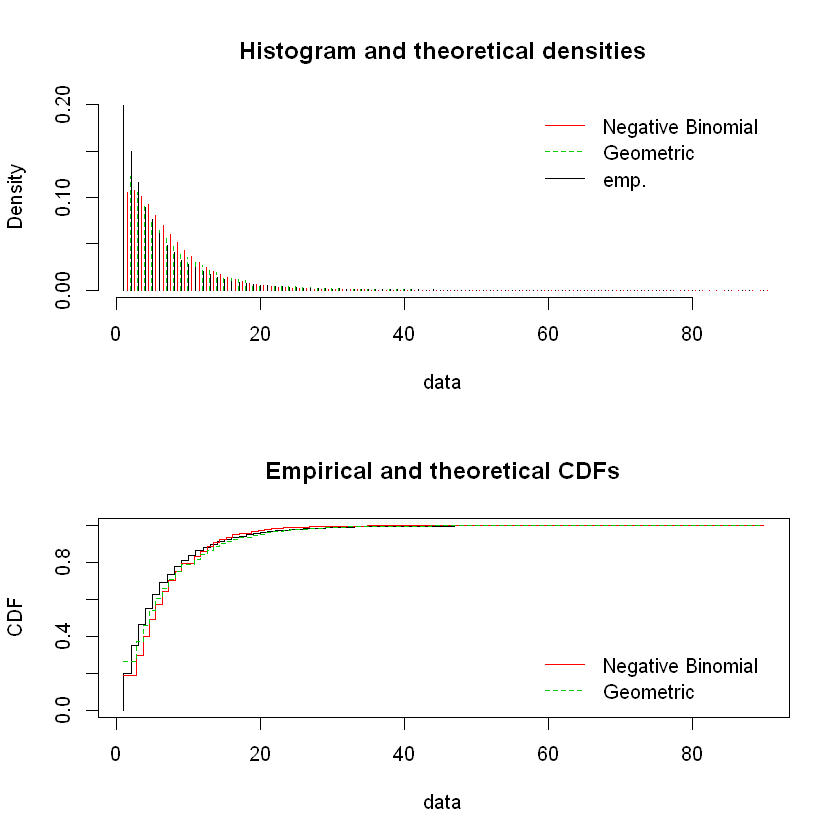

In [479]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dNov, BCfd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dNov, BCfd_GE_dNov), legendtext=plot.legend )

In [480]:
BCstatRes <- gofstat( list(BCfd_NB_dNov, BCfd_GE_dNov), fitnames=c("Negative Binomial", "Geometric") )

In [481]:
print(BCstatRes)

Chi-squared statistic:  44102.59 32001.24 
Degree of freedom of the Chi-squared distribution:  27 28 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     123890            118740.9733    166000.1179
<= 2      93210             67095.4383     65597.0708
<= 3      72081             63259.7064     56185.2590
<= 4      55707             57246.8620     48123.8460
<= 5      47411             50504.3692     41219.0776
<= 6      37907             43790.7225     35304.9995
<= 7      30001             37495.5704     30239.4683
<= 8      25408             31801.0085     25900.7352
<= 9      20150             26770.5162     22184.5198
<= 10     17115             22400.5647     19001.5038
<= 11     15433             18651.3812     16275.1843
<= 12     12291             15465.4670     13940.0347
<= 13     10644             12778.6849     11939.9304
<= 14      8774             10526.7542     10226.7994
<= 15      7222              8648.8842    

In [482]:
BCfdNB_dNov_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [483]:
BCfdNB_dNov_p = BCfdNB_dNov_size / (BCfdNB_dNov_size + BCfdNB_dNov_mu)
cat("BCCA prob: ", BCfdNB_dNov_p)

BCCA prob:  0.2086957

In [484]:
# add to our tracking dataframe
BCMonDistDF[11, ] <- list( 11, dBCNovMean, dBCNovBNr, BCfdNB_dNov_p, BCfdNB_dNov_mu, BCfdNB_dNov_size,
                          BCfdNB_dNov_pvalue )

In [485]:
BCgf_dNov <- goodfit( dBCNov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dNov_size, prob=BCfdNB_dNov_p) )

In [486]:
summary( BCgf_dNov )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          228950.0 90        0
Likelihood Ratio 179137.9 83        0


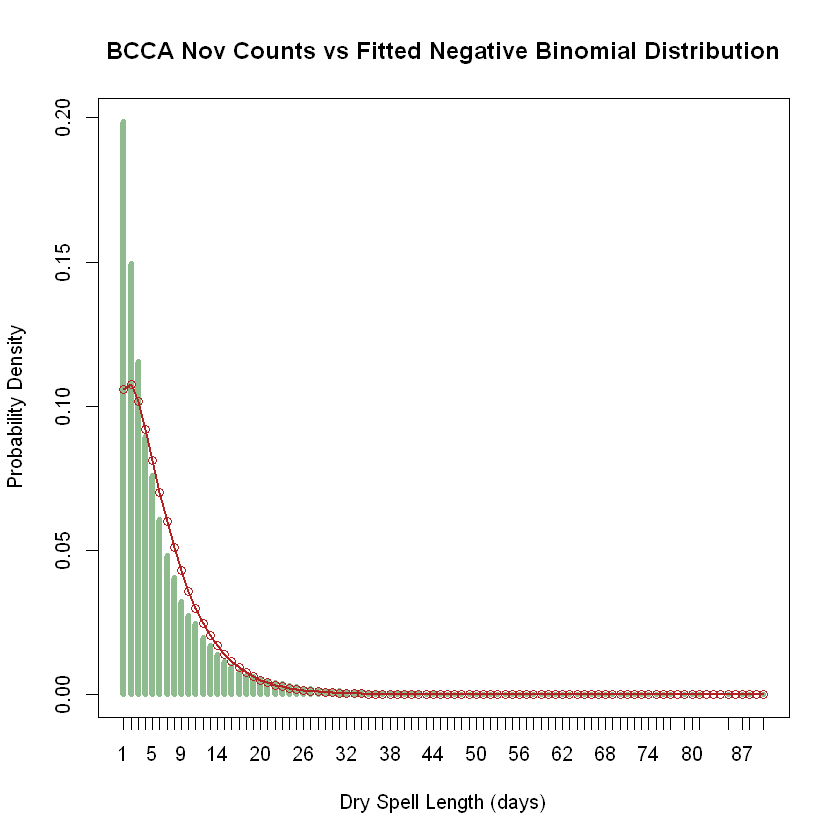

In [487]:
maxP <- max(dBCNov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dNov_size, mu=BCfdNB_dNov_mu )
ttab <- table( dBCNov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

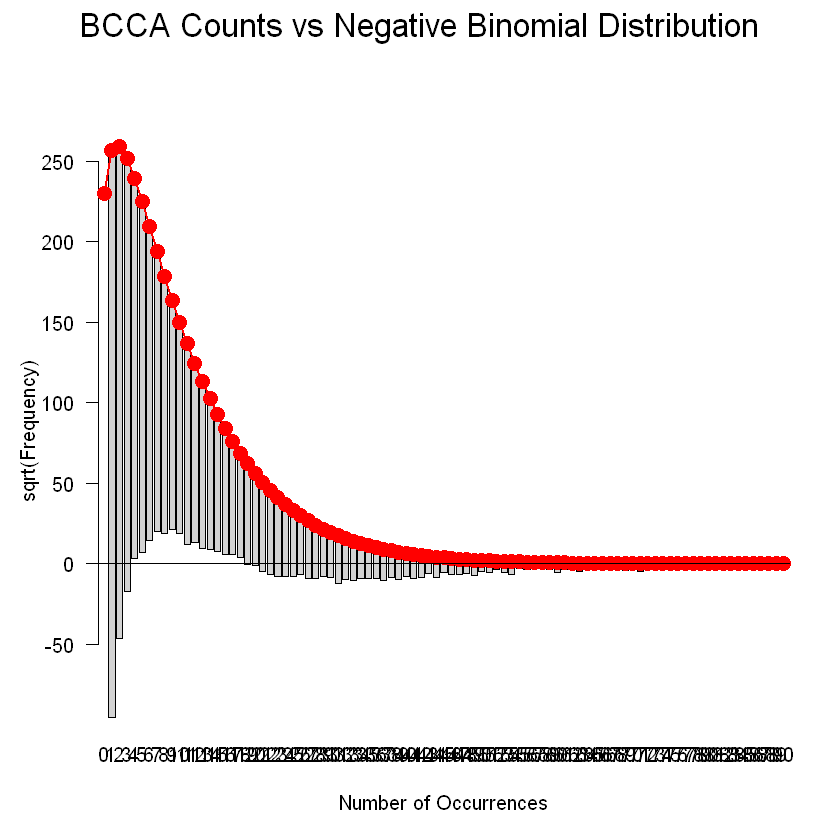

In [488]:
plot( BCgf_dNov, main="BCCA Counts vs Negative Binomial Distribution" )

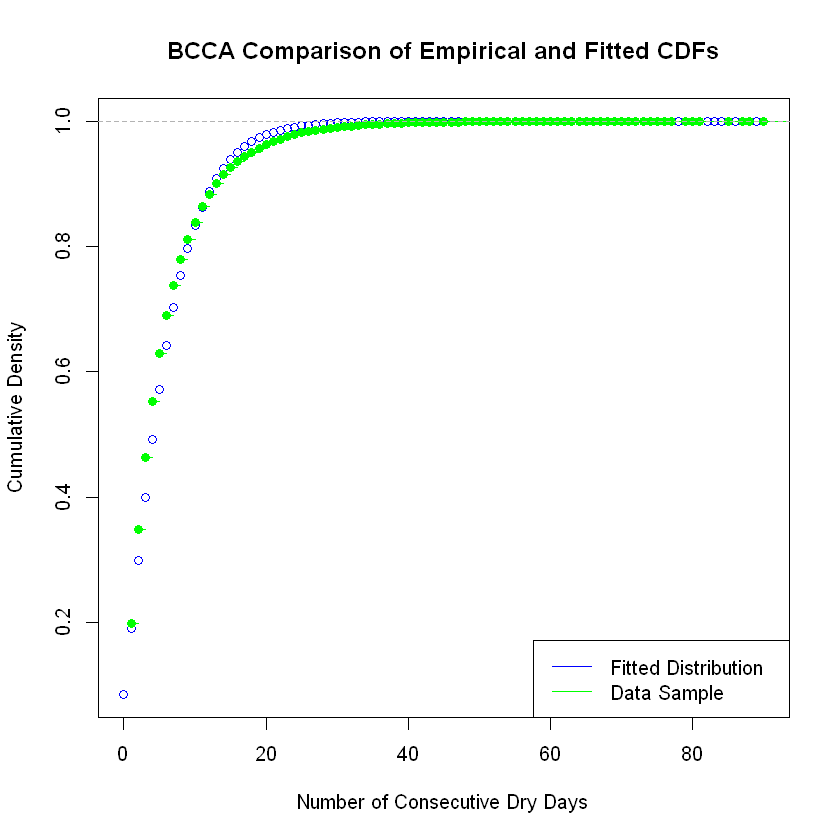

In [489]:
x <- seq(0,dBCNovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dNov_mu, size=BCfdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCNov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

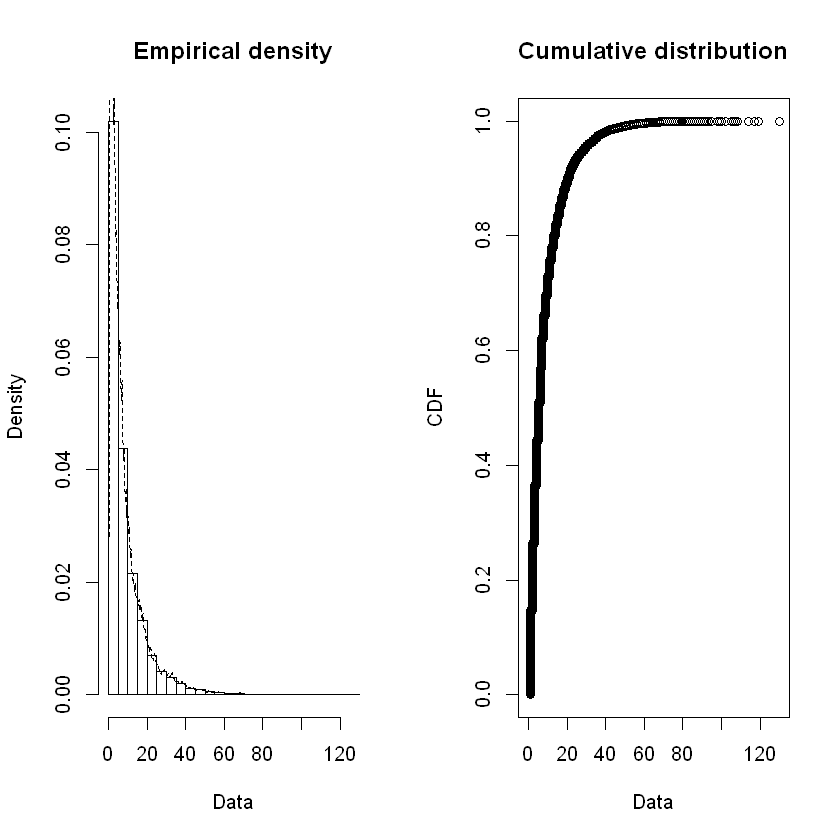

In [490]:
plotdist( dLODec$Dry_Count, histo=TRUE, demp=TRUE )

In [491]:
LOfd_NB_dDec <- fitdist( dLODec$Dry_Count, "nbinom" )
LOfd_GE_dDec <- fitdist( dLODec$Dry_Count, "geom" )

In [492]:
LOfdNB_dDec_size <- LOfd_NB_dDec$estimate[["size"]]
LOfdNB_dDec_mu <- LOfd_NB_dDec$estimate[["mu"]]
cat("LOCA Dec size: ", LOfdNB_dDec_size, "\n", "LOCA Dec mu: ", LOfdNB_dDec_mu, "\n")

LOCA Dec size:  1.254769 
 LOCA Dec mu:  8.696524 


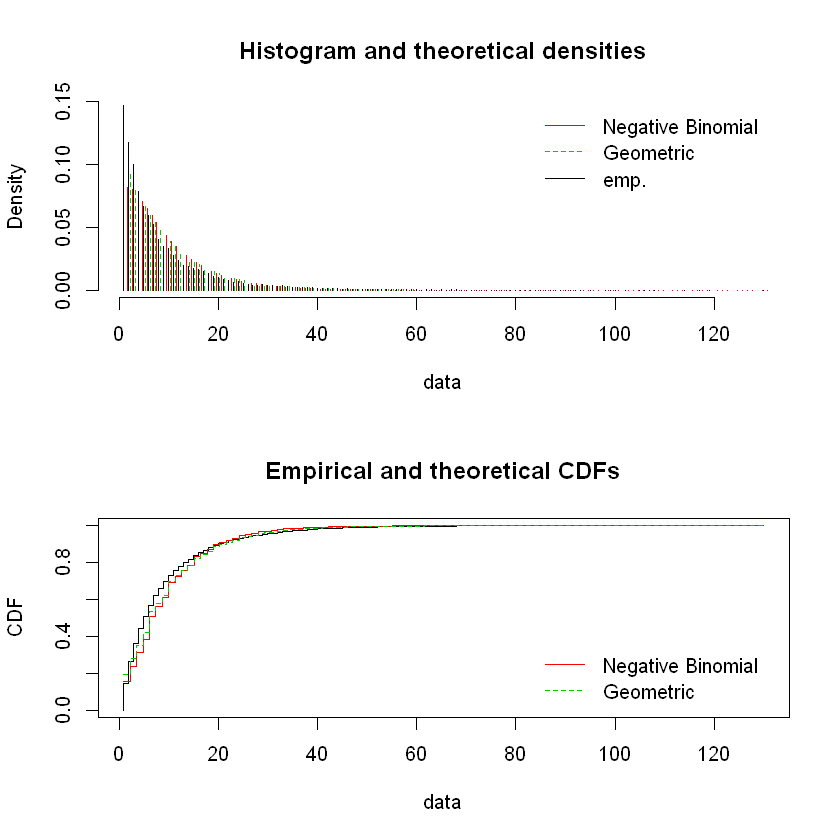

In [493]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dDec, LOfd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dDec, LOfd_GE_dDec), legendtext=plot.legend )

In [494]:
LOstatRes <- gofstat( list(LOfd_NB_dDec, LOfd_GE_dDec), fitnames=c("Negative Binomial", "Geometric") )

In [495]:
print( LOstatRes )

Chi-squared statistic:  66667.5 48898.2 
Degree of freedom of the Chi-squared distribution:  41 42 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     137210            145750.7465    182764.3145
<= 2     109798             75105.7311     77504.2915
<= 3      93511             71209.5453     69512.6282
<= 4      73178             66194.2729     62345.0055
<= 5      62505             60795.3331     55916.4545
<= 6      55664             55385.5489     50150.7677
<= 7      48701             50163.5435     44979.5953
<= 8      37420             45234.4523     40341.6356
<= 9      32367             40649.8175     36181.9077
<= 10     30711             36429.2869     32451.0998
<= 11     26166             32573.2249     29104.9849
<= 12     22143             29070.3879     26103.8964
<= 13     18409             25902.7469     23412.2577
<= 14     17759             23048.5790     20998.1607
<= 15     15872             20484.4692     1

In [496]:
LOfdNB_dDec_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [497]:
LOfdNB_dDec_p = LOfdNB_dDec_size / (LOfdNB_dDec_size + LOfdNB_dDec_mu)
cat("LOCA prob: ", LOfdNB_dDec_p)

LOCA prob:  0.1260911

In [498]:
# add to our tracking dataframe
LOMonDistDF[12, ] <- list( 12, dLODecMean, dLODecBNr, LOfdNB_dDec_p, LOfdNB_dDec_mu, LOfdNB_dDec_size,
                           LOfdNB_dDec_pvalue )

In [499]:
LOgf_dDec <- goodfit( dLODec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dDec_size, prob=LOfdNB_dDec_p) )

In [500]:
summary( LOgf_dDec )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          205924.6 130        0
Likelihood Ratio 234443.5 105        0


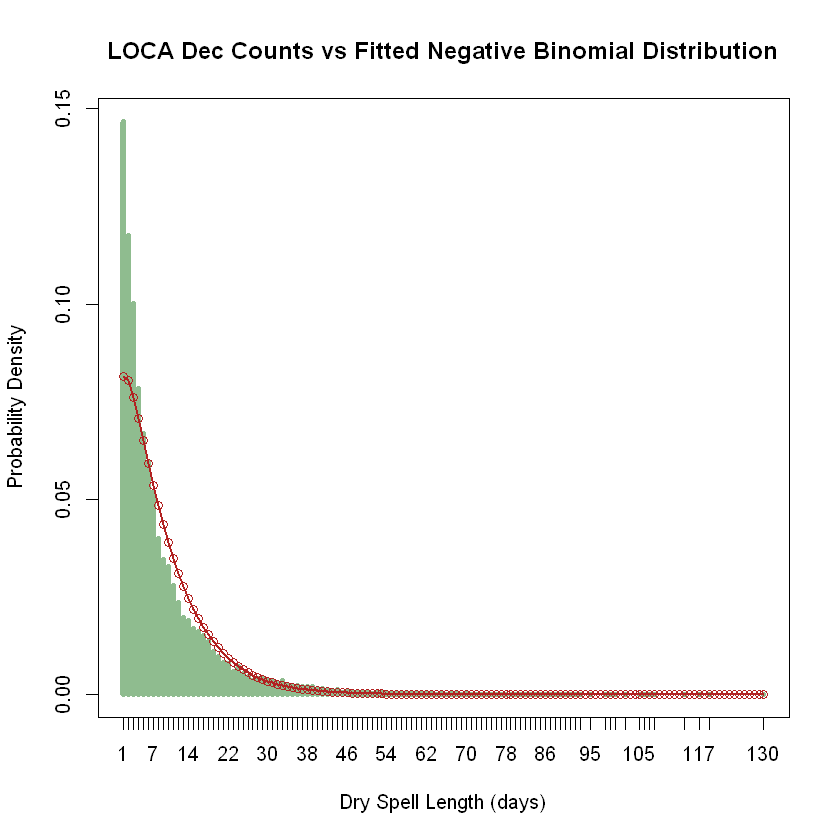

In [501]:
maxP <- max(dLODec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dDec_size, mu=LOfdNB_dDec_mu )
ttab <- table( dLODec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

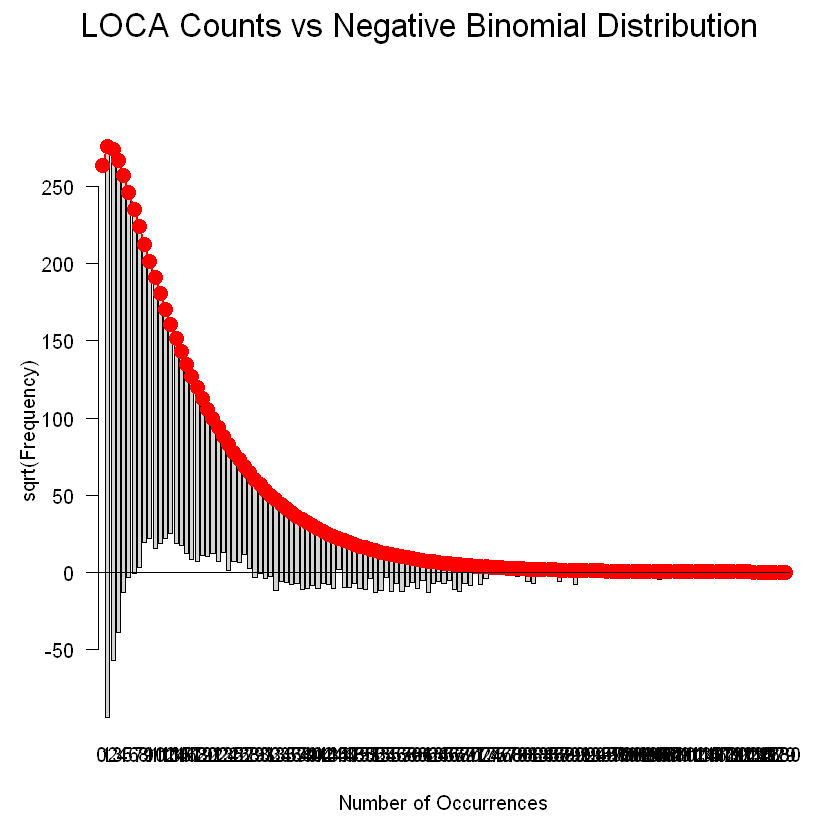

In [502]:
plot( LOgf_dDec, main="LOCA Counts vs Negative Binomial Distribution" )

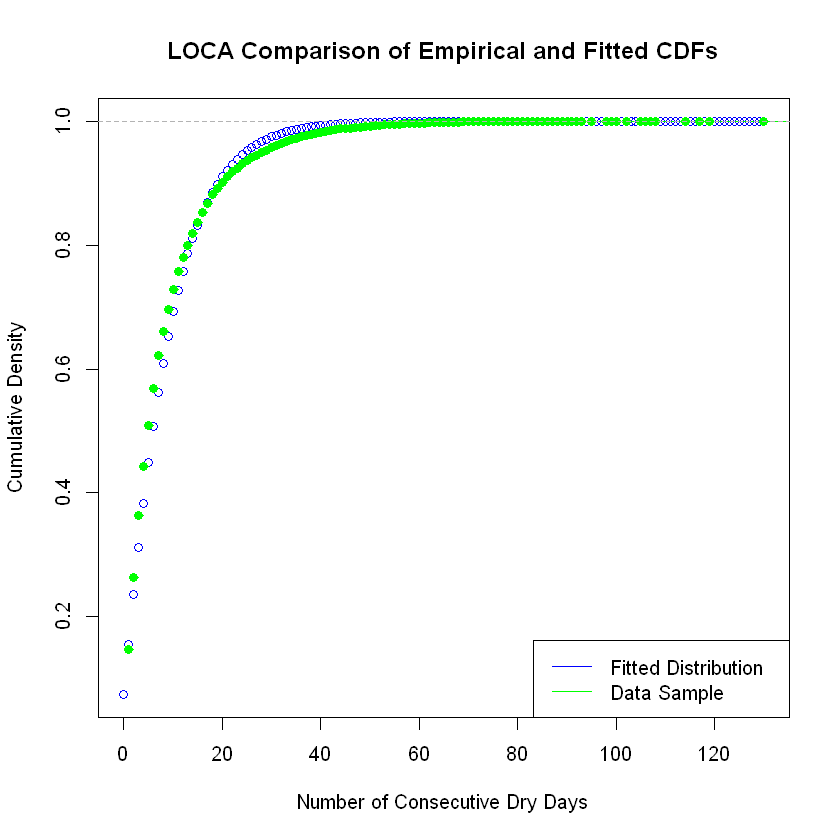

In [503]:
x <- seq(0,dLODecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dDec_mu, size=LOfdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLODec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

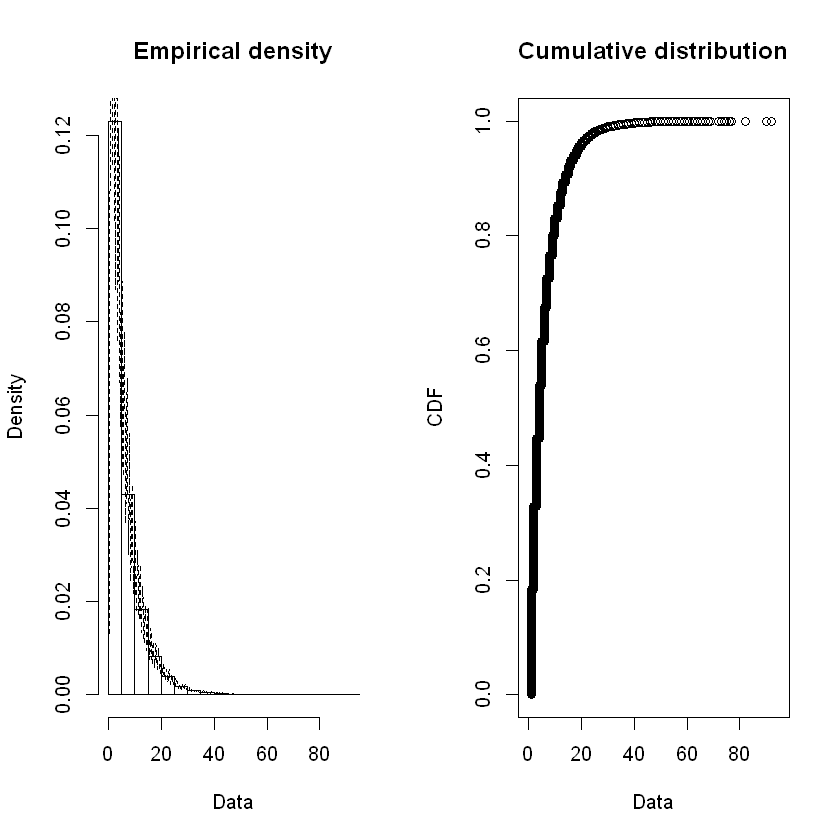

In [504]:
plotdist( dBCDec$Dry_Count, histo=TRUE, demp=TRUE )

In [505]:
BCfd_NB_dDec <- fitdist( dBCDec$Dry_Count, "nbinom" )
BCfd_GE_dDec <- fitdist( dBCDec$Dry_Count, "geom" )

In [506]:
summary( BCfd_NB_dDec )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.615130 0.003508246
mu   6.157939 0.006933290
Loglikelihood:  -1760579   AIC:  3521163   BIC:  3521185 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0001642484
mu   -0.0001642484  1.0000000000


In [507]:
BCfdNB_dDec_size <- BCfd_NB_dDec$estimate[["size"]]
BCfdNB_dDec_mu <- BCfd_NB_dDec$estimate[["mu"]]
cat("BCCA Dec size: ", BCfdNB_dDec_size, "\n", "BCCA Dec mu: ", BCfdNB_dDec_mu, "\n")

BCCA Dec size:  1.61513 
 BCCA Dec mu:  6.157939 


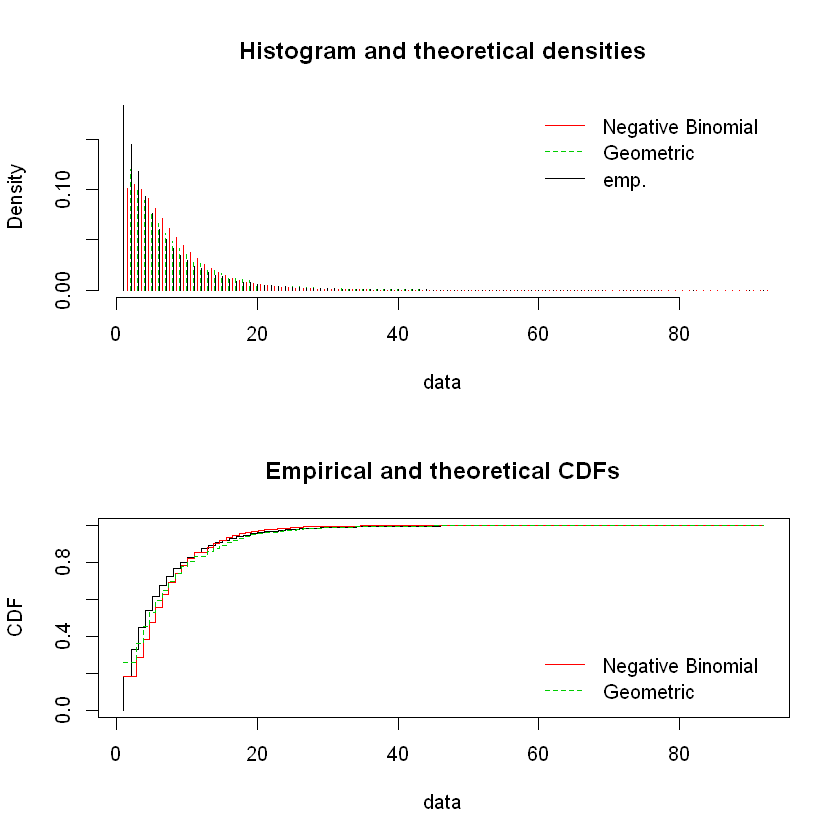

In [508]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dDec, BCfd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dDec, BCfd_GE_dDec), legendtext=plot.legend )

In [509]:
BCstatRes <- gofstat( list(BCfd_NB_dDec, BCfd_GE_dDec), fitnames=c("Negative Binomial", "Geometric") )

In [510]:
print(BCstatRes)

Chi-squared statistic:  40490.25 35557 
Degree of freedom of the Chi-squared distribution:  28 29 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     112927            111104.1150    160271.5050
<= 2      89390             64601.3082     63761.6068
<= 3      72850             61671.8263     54852.9667
<= 4      57507             56370.7223     47189.0234
<= 5      46693             50151.7693     40595.8704
<= 6      37013             43804.2497     34923.8992
<= 7      30949             37751.8626     30044.4041
<= 8      25319             32207.2090     25846.6619
<= 9      21123             27258.9174     22235.4197
<= 10     17898             22923.2813     19128.7327
<= 11     14783             19175.6917     16456.1057
<= 12     13291             15969.9806     14156.8925
<= 13     10820             13250.2995     12178.9207
<= 14      9129             10958.3006     10477.3071
<= 15      8409              9037.3359      9

In [511]:
BCfdNB_dDec_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [512]:
BCfdNB_dDec_p = BCfdNB_dDec_size / (BCfdNB_dDec_size + BCfdNB_dDec_mu)
cat("BCCA prob: ", BCfdNB_dDec_p)

BCCA prob:  0.2077853

In [513]:
# add to our tracking dataframe
BCMonDistDF[12, ] <- list( 12, dBCDecMean, dBCDecBNr, BCfdNB_dDec_p, BCfdNB_dDec_mu, BCfdNB_dDec_size,
                           BCfdNB_dDec_pvalue )

In [514]:
BCgf_dDec <- goodfit( dBCDec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dDec_size, prob=BCfdNB_dDec_p) )

In [515]:
summary( BCgf_dDec )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          151456.7 92        0
Likelihood Ratio 160946.4 77        0


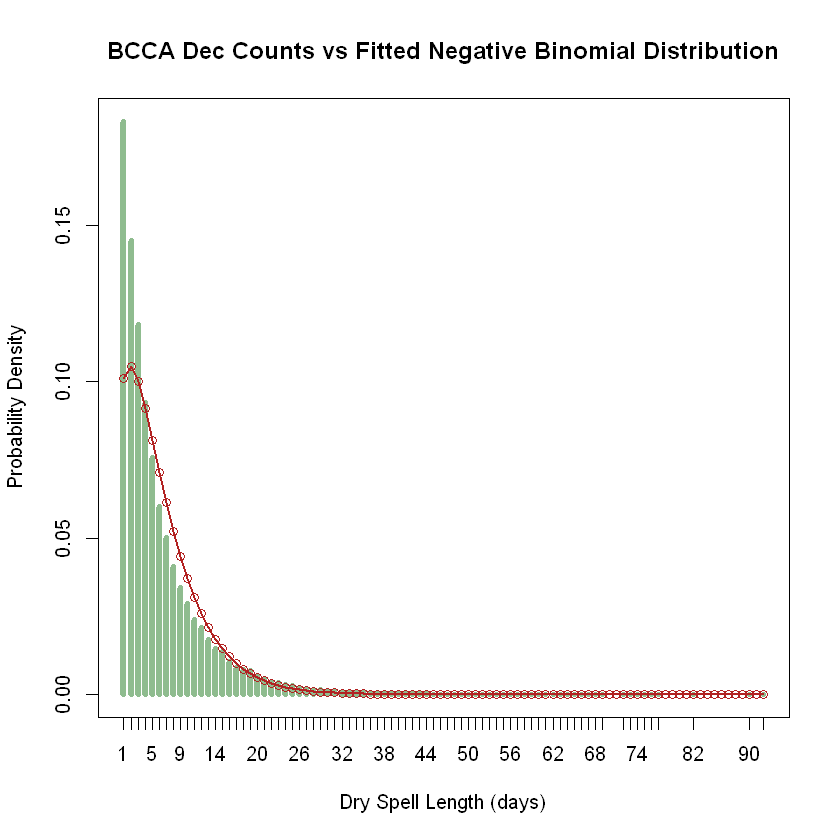

In [516]:
maxP <- max(dBCDec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dDec_size, mu=BCfdNB_dDec_mu )
ttab <- table( dBCDec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

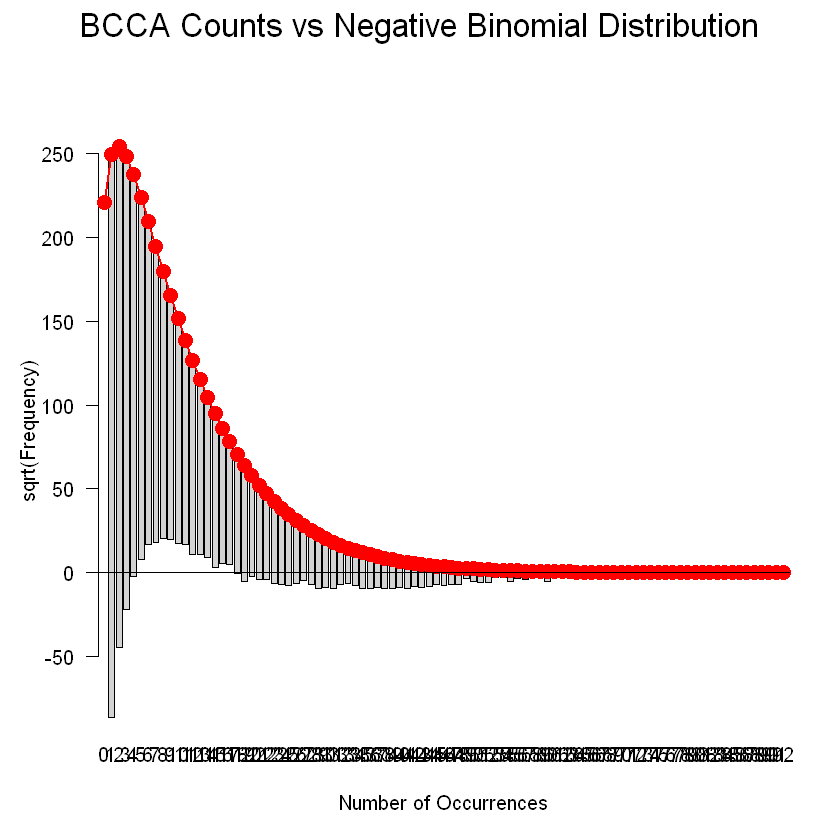

In [517]:
plot( BCgf_dDec, main="BCCA Counts vs Negative Binomial Distribution" )

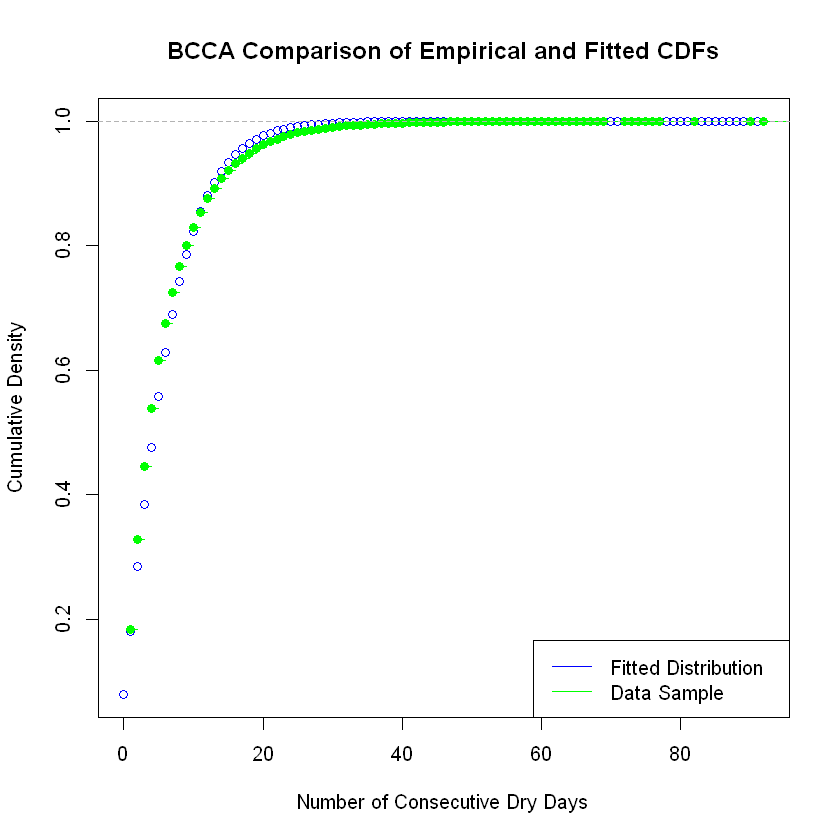

In [518]:
x <- seq(0,dBCDecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dDec_mu, size=BCfdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCDec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

Look at our summary DataFrame

In [519]:
print( LOMonDistDF, quote=FALSE, row.names=FALSE )

 month      smu     ssize     sprob      tmu    tsize pvalue
     1 8.870689 1.0475943 0.1361446 8.869891 1.397904      0
     2 7.900725 0.9142459 0.1487459 7.900841 1.380572      0
     3 7.687056 1.1775804 0.1685067 7.687401 1.557894      0
     4 5.609954 1.3229742 0.2462494 5.610468 1.832933      0
     5 4.771671 0.9856597 0.2627005 4.771077 1.699939      0
     6 6.362480 0.6640679 0.1535964 6.363726 1.154822      0
     7 7.636244 0.8333414 0.1381070 7.635392 1.223472      0
     8 7.011906 1.1610075 0.1719215 7.010766 1.455540      0
     9 5.583111 0.8774293 0.2080846 5.582600 1.466890      0
    10 7.250290 0.8232807 0.1516573 7.248444 1.295796      0
    11 7.588856 0.7835556 0.1416893 7.588490 1.252703      0
    12 8.698143 0.8835990 0.1260911 8.696524 1.254769      0


In [520]:
print( BCMonDistDF, quote=FALSE, row.names=FALSE )

 month      smu    ssize     sprob      tmu    tsize pvalue
     1 5.707018 1.277090 0.2386875 5.706342 1.789059      0
     2 5.102432 1.343605 0.2794387 5.101655 1.978457      0
     3 4.772517 1.489611 0.3070599 4.772212 2.114692      0
     4 3.772460 1.770871 0.4051278 3.772563 2.569241      0
     5 2.929108 1.990622 0.5287700 2.929493 3.287202      0
     6 3.402497 1.458378 0.4170088 3.402366 2.433685      0
     7 3.382122 1.558998 0.4254210 3.381664 2.503800      0
     8 3.031854 1.978162 0.5099047 3.031561 3.154095      0
     9 3.268013 1.168163 0.4057851 3.268371 2.231947      0
    10 4.972710 1.041018 0.2450392 4.972824 1.614040      0
    11 5.969654 1.069253 0.2086957 5.969872 1.574472      0
    12 6.157277 1.138252 0.2077853 6.157939 1.615130      0


### Output to a Spreadsheet

Output the stats and distribution fits to a spreadsheet

In [521]:
outputDF_xlsx <- createWorkbook()

In [522]:
LOsumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="LOCA_Summary_Stats")
BCsumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="BCCA_Summary_Stats")
LOmondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="LOCA_Dist_Properties")
BCmondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="BCCA_Dist_Properties")

In [523]:
addDataFrame( x=MonLOSumStatDF, sheet=LOsumstat_xlsx )
addDataFrame( x=MonBCSumStatDF, sheet=BCsumstat_xlsx )
addDataFrame( x=LOMonDistDF, sheet=LOmondist_xlsx )
addDataFrame( x=BCMonDistDF, sheet=BCmondist_xlsx )

In [524]:
saveWorkbook( outputDF_xlsx, file="CMIP5_Dry_RSummary_2071-2100.xlsx" )

## Check that No Grid Cell Outliers

Check that there are not any grid cell outliers. This part will take a long time so may need to split it out to a standalone R script. This also does not make sense so removed.

In [525]:
options(warn = oldw)